# Final Project Submission

Please fill out:
* Student name: **Raymond Willey**
* Student pace: **Self Paced**
* Scheduled project review date/time: **November 1, 2019 5:45pm EST**
* Instructor name: **Eli Thomas**
* Non-Technical Presentation: **[Information Overload](https://www.overloadblog.info/projects/what-can-machine-learning-tell-us-about-americas-gun-laws)**
* Blog post URL: **[Toward Data Science](https://towardsdatascience.com/what-can-machine-learning-tell-us-about-americas-gun-laws-da01d9fb7413?source=friends_link&sk=c193a45986acccc58699464fd31dfeb5)**

# Measuring the Effectiveness of Gun Laws in the United States
Many arguments and counterarguments are often made with regard to gun control laws. Gun control advocates argue for the necessity of stronger laws to reduce gun violence, while gun rights advocates believe such laws are not only ineffective, but are dangerous in that disarmament of law-abiding citizens takes away their right to protect themselves. Rather than treat all gun laws as equal, this project seeks to understand which types of laws are effective in hopes of finding some sort of commond ground.

## Giffords Law Center
[Giffords Law Center](https://lawcenter.giffords.org) is a non-profit organizaton whose mission is to reduce gun violence. They provide [annual rankings](https://lawcenter.giffords.org/scorecard/) of state gun laws and measure the rankings against firearm mortality rates. Though the site has some nice looking visuals, it does not provide statistical measurements which would allow us to determine the statistical significance of the data. We will start by scraping data from Giffords Law Center to perform an assessment ourselves.

### Web Scraping
The site contains a table of rankings by state, including number of firearm deaths per 100k people (this data has been verified against CDC data). We will grab 2018 data from this table and parse it into a dataframe. In addition, grades will be translated to a traditional grade points (A = 4, B = 3, etc.) scale so that correlation and p-values can be calculated later.

The grades were calculated in 2018, but most recent firearm death rates available were 2017. For now, it is assumed that 2018 gun laws do not significantly deviate from 2017 laws.

**Note: All code involving web scraping has been commented out as data has already been saved to csv. No need to scrape again.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# from bs4 import BeautifulSoup

# url = 'https://lawcenter.giffords.org/scorecard/#rankings'

# #Make a get request to retrieve the page
# html_page = requests.get(url) 

# #Pass the page contents to beautiful soup for parsing
# soup = BeautifulSoup(html_page.content, 'html.parser') 

# # States use the 'strong' tag
# tables = soup.find_all('table')

In [2]:
# # Create Dictionary for parsing values
# state_rankings_2018 = {'Year': [], 'State':[], 'Grade': [], 'State_GPA': [], 'Gun_Death_Rate': []}

# # Define grading scale
# grades = {'A':4, 'A-': 3.7, 
#           'B+': 3.3, 'B': 3, 'B-':2.7, 
#           'C+': 2.3, 'C': 2, 'C-': 1.7, 
#           'D+': 1.3, 'D': 1, 'D-': .7, 'F': 0}

# # Iterate through each row of table and save to dictionary
# for i in range(50):
#     state_rankings_2018['Year'].append(2017)
#     state_rankings_2018['State'].append(tables[0].find_all('td')[5 * i + 1].text)
#     state_rankings_2018['Grade'].append(tables[0].find_all('td')[5 * i + 2].text)
#     state_rankings_2018['State_GPA'].append(grades[state_rankings_2018['Grade'][-1]])
#     state_rankings_2018['Gun_Death_Rate'].append(float(tables[0].find_all('td')[5 * i + 4].text))

# # Create dataframe from dictionary
# pd.DataFrame.from_dict(state_rankings_2018).to_csv('giffords/giffords_2018.csv')

# Preview dataframe
giffords_df_2018 = pd.read_csv('giffords/giffords_2018.csv', index_col=0)
giffords_df_2018.head()

Year       State Grade  State_GPA  Gun_Death_Rate
0  2017     Alabama     F        0.0            22.9
1  2017      Alaska     F        0.0            24.5
2  2017     Arizona     F        0.0            15.7
3  2017    Arkansas     F        0.0            20.2
4  2017  California     A        4.0             7.8

In [3]:
giffords_df_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
Year              50 non-null int64
State             50 non-null object
Grade             50 non-null object
State_GPA         50 non-null float64
Gun_Death_Rate    50 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.3+ KB


In [4]:
giffords_df_2018.describe()

Year  State_GPA  Gun_Death_Rate
count    50.0  50.000000       50.000000
mean   2017.0   1.296000       13.514000
std       0.0   1.441649        5.371163
min    2017.0   0.000000        2.400000
25%    2017.0   0.000000       11.125000
50%    2017.0   0.850000       12.800000
75%    2017.0   2.300000       17.075000
max    2017.0   4.000000       24.500000

The mean grade is approximately a D+, and mean number of deaths per 100k is 13.5. Presumably, a state with an A+ grade can expect a firearm homicide rate near 2.4 per 100k.

### Quantify and Visualize Results
Build a simple linear regression with *Gun_Death_Rate* as the target variable and *State_GPA* as the independent variable. Print results and plot regression.

R-Square: 0.6207020030717032
Intercept: 17.318130935828243
Slope: -2.9352862159168582
P-Value: 1.129765290532049e-11


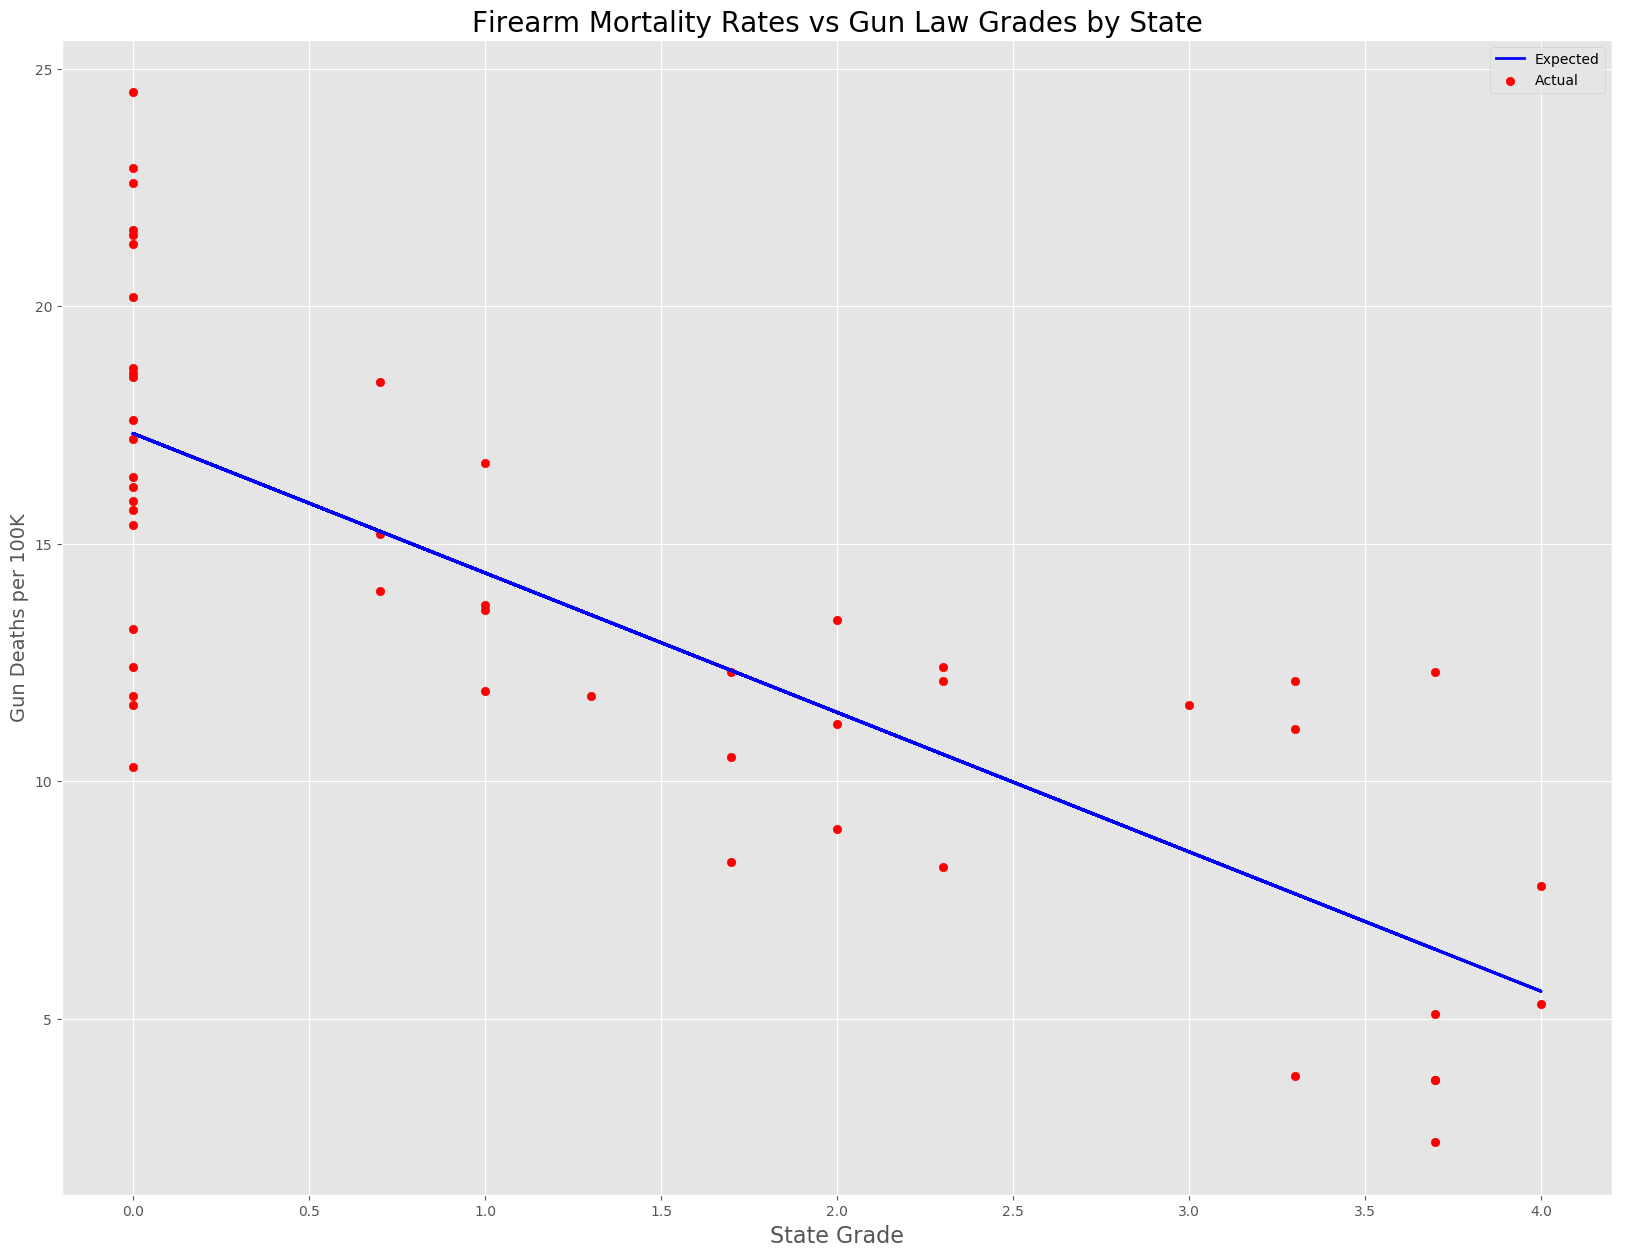

In [176]:
import statsmodels.formula.api as smf
import sklearn as sk
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plt.style.use('ggplot')

# Set define variables and build model
f = 'Gun_Death_Rate~State_GPA'
model = smf.ols(formula=f, data=giffords_df_2018).fit()

# Display results
print(f'R-Square: {model.rsquared}') 
print(f'Intercept: {model.params[0]}')
print(f'Slope: {model.params[1]}')
print(f'P-Value: {model.pvalues[1]}')

# Plot regression
y_pred = model.predict()
plt.figure(figsize=(20, 15))
plt.title('Firearm Mortality Rates vs Gun Law Grades by State', fontsize=20)
plt.xlabel('State Grade', fontsize=16)
plt.ylabel('Gun Deaths per 100K', fontsize=14)
plt.scatter(giffords_df_2018['State_GPA'], giffords_df_2018['Gun_Death_Rate'], marker='o', label='Actual', color='r')
plt.plot(giffords_df_2018['State_GPA'], y_pred, color='b', lw=2, label='Expected')
plt.legend()
plt.show()

A p-value substantially lower than .0001 and r-squared value of .62 makes clear that a negative correlation exists between the strength of gun laws and the number of firearm-related deaths. However, the strength of laws (as defined by Giffords) only accounts for 62% of the variation in gun-related mortality rates. The implication is that the effectiveness of gun laws on these rates is limited.

## Overall & Firearm Homicide & Suicide Rates
It is not enough to simply look at firearm mortality when assessing the effectiveness of gun laws. If a homicide or suicide with a firearm is simply substituted with some other mode of mortality, it would be difficult to argue that gun laws actually impact anything. Therefore, we want to measure the effect of gun laws on overall homicide and suicide rates, which will be contrasted with gun-related rates. The Center for Disease Control (CDC) has a tool called [WONDER](https://wonder.cdc.gov/mortSQL.html) which allows for the querying of such data. 

The data was downloaded separately and saved to csv in multiple files. For each target (overall & gun-related homicides & suicides), two files were downloaded. One for the 1979-1998 time period, and 1999-2016 time period. For now, we are only concerned with data from 2014-2016 because those are the years for which both grades and mortality rates are readily available.

For privacy reasons, when the total number of deaths is less than 10, the results are "suppressed." In these instances, the value of 10 is substituted as a floor value. 

When the number of deaths is less than 20, the death rate is flagged as "unreliable." Because results will later be examined in aggregate across a 25-year period, the level of variance for any single year and state is expected to have minimal impact on overall results. Furthermore, there is no reason to expect the addition of such noise will improve results, which means any findings will be conservatively biased. In other words, it will be more difficult to prove a relationship, making it extremely unlikely to result in an artificial improvement of results.

### Creating a Function to Read Saved CDC Data

In [3]:
# Set categories for downloading data
# Same process will be required for homicide & suicide data
cats = ['homicide', 'suicide']

def get_cdc_data(cat):
    
    # Define columns to import
    cols = ['State', 'Year', 'Deaths', 'Population', 'Age Adjusted Rate']
    
    # Set variables for csv paths to download
    a = f'cdc_data/{cat}/all_1979-1998.txt'
    b = f'cdc_data/{cat}/all_1999-2016.txt'
    gun_a = f'cdc_data/{cat}/firearm_1979-1998.txt'
    gun_b = f'cdc_data/{cat}/firearm_1999-2016.txt'
    
    # Save data to separate dataframes
    df_a = pd.read_csv(a, sep='\t', usecols=cols).dropna()
    df_b = pd.read_csv(b, sep='\t', usecols=cols).dropna()
    gun_df_a = pd.read_csv(gun_a, sep='\t', usecols=cols).dropna()
    gun_df_b = pd.read_csv(gun_b, sep='\t', usecols=cols).dropna()
    
    # Combine dataframes to capture full date range
    df = df_a.append(df_b).reset_index(drop=True)
    gun_df = gun_df_a.append(gun_df_b).reset_index(drop=True)
    
    
    
    # Rename target column to reflect target
    cat_col = f'{cat.title()} Rate'
    df = df.rename(columns={'Age Adjusted Rate': cat_col})
    
    # Replace "suppressed" data with 10
    df[cat_col] = df[cat_col].astype('str')
    df['Year'] = df['Year'].astype('int')
    df = df[df.Year>=1991].reset_index(drop=True)
    df['Deaths'] = df['Deaths'].replace('Suppressed', '10').astype('int')
    
    # Create uniform index based on state & year
    df['State-Year'] = df['State'] + ' ' + df['Year'].astype('str')
    df = df.set_index('State-Year')
    
    # Repeat last 3 steps for gun-related target
    
    # Rename target column to reflect target
    gun_cat_col = f'Gun {cat.title()} Rate'
    gun_df = gun_df.rename(columns={'Age Adjusted Rate': gun_cat_col})
    
    # Replace "suppressed" data with 10
    gun_df[gun_cat_col] = gun_df[gun_cat_col].astype('str')
    gun_df['Year'] = gun_df['Year'].astype('int')
    gun_df = gun_df[gun_df.Year>=1991].reset_index(drop=True)
    gun_df['Deaths'] = gun_df['Deaths'].replace('Suppressed', '10').astype('int')
    
    # Create uniform index based on state & year
    gun_df['State-Year'] = gun_df['State'] + ' ' + gun_df['Year'].astype('str')
    gun_df = gun_df.set_index('State-Year')
    
    # Remove "unreliable" flag in each dataframe
    for ix in df.index:
        if ('Unreliable' in df.loc[ix, cat_col]) or (df.loc[ix, cat_col] == 'Suppressed'):
            deaths = df.loc[ix, 'Deaths']
            pop = df.loc[ix, 'Population']
            df.loc[ix, cat_col] = np.round(100000 * deaths/pop, 1)
            
    for ix in gun_df.index:
        if ('Unreliable' in gun_df.loc[ix, gun_cat_col]) or (gun_df.loc[ix, gun_cat_col] == 'Suppressed'):
            deaths = gun_df.loc[ix, 'Deaths']
            pop = gun_df.loc[ix, 'Population']
            gun_df.loc[ix, gun_cat_col] = np.round(100000 * deaths/pop, 1)
    
    # Combine dataframes
    final_df = df.join(gun_df[gun_cat_col]).drop(['Deaths', 'Population'], axis=1)
    for col in [cat_col, gun_cat_col]:
        final_df[col] = final_df[col].astype('float')
    
    # Create column to calculate ratio between target and gun-related target rates
    final_df[f'Other {cat.title()}'] = final_df[cat_col] - final_df[gun_cat_col]
    final_df[f'{cat.title()} Pct Difference'] = final_df[f'Other {cat.title()}'] / final_df[gun_cat_col]
    return final_df

### Create Dataframe from Saved CDC Data

In [7]:
# Create single dataframe combining homicide & suicide data
homicide_df = get_cdc_data('homicide')
suicide_df = get_cdc_data('suicide')
gun_mortality = homicide_df.join(suicide_df[suicide_df.columns[2:]])
gun_mortality.head()

State  Year  Homicide Rate  Gun Homicide Rate  Other Homicide  \
State-Year                                                                      
Alabama 1991  Alabama  1991           13.8               10.0             3.8   
Alabama 1992  Alabama  1992           12.7                9.1             3.6   
Alabama 1993  Alabama  1993           13.4                9.5             3.9   
Alabama 1994  Alabama  1994           13.7                9.9             3.8   
Alabama 1995  Alabama  1995           12.0                9.1             2.9   

              Homicide Pct Difference  Suicide Rate  Gun Suicide Rate  \
State-Year                                                              
Alabama 1991                 0.380000          13.2              10.4   
Alabama 1992                 0.395604          12.6               9.5   
Alabama 1993                 0.410526          13.0              10.1   
Alabama 1994                 0.383838          12.6               9.4   
Alabama 1995                 0.318681          13.0               9.9   

              Other Suicide  Suicide Pct Difference  
State-Year                                           
Alabama 1991            2.8                0.269231  
Alabama 1992            3.1                0.326316  
Alabama 1993            2.9                0.287129  
Alabama 1994            3.2                0.340426  
Alabama 1995            3.1                0.313131

In [8]:
gun_mortality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, Alabama 1991 to Wyoming 2016
Data columns (total 10 columns):
State                      1300 non-null object
Year                       1300 non-null int64
Homicide Rate              1300 non-null float64
Gun Homicide Rate          1300 non-null float64
Other Homicide             1300 non-null float64
Homicide Pct Difference    1300 non-null float64
Suicide Rate               1300 non-null float64
Gun Suicide Rate           1300 non-null float64
Other Suicide              1300 non-null float64
Suicide Pct Difference     1300 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 151.7+ KB


In [9]:
gun_mortality.describe()

Year  Homicide Rate  Gun Homicide Rate  Other Homicide  \
count  1300.000000    1300.000000        1300.000000     1300.000000   
mean   2003.500000       5.652154           3.797615        1.854538   
std       7.502886       3.141650           2.406314        0.919853   
min    1991.000000       0.800000           0.600000        0.000000   
25%    1997.000000       3.100000           1.800000        1.200000   
50%    2003.500000       5.200000           3.400000        1.700000   
75%    2010.000000       7.400000           5.200000        2.400000   
max    2016.000000      20.200000          16.300000        8.200000   

       Homicide Pct Difference  Suicide Rate  Gun Suicide Rate  Other Suicide  \
count              1300.000000   1300.000000       1300.000000    1300.000000   
mean                  0.592021     13.263077          7.496231       5.766846   
std                   0.328410      3.728909          3.069492       1.680289   
min                   0.000000      5.900000          1.100000       2.000000   
25%                   0.391641     11.000000          5.600000       4.600000   
50%                   0.500000     12.700000          7.500000       5.600000   
75%                   0.714286     15.200000          9.400000       6.725000   
max                   2.625000     29.600000         17.400000      12.400000   

       Suicide Pct Difference  
count             1300.000000  
mean                 0.987018  
std                  0.754160  
min                  0.183486  
25%                  0.558006  
50%                  0.781250  
75%                  1.050255  
max                  6.000000

Many of the columns created will be unnecessary, however the additional data was incorporated just in case any need for it arises later. The true targets of interest are overall homicide and suicide rates. If we look at the mean gun homicide and total homicide rates, we can see that gun homicides represent about 67.3% of all homicides. Similarly, gun-related suicides represent roughly 56.5% of all homicides. These numbers can be used as benchmarks for the maximum potential for reduction in rates. Any scores above this level would suggest that strong gun laws not only reduce gun violence, but reduce other forms of violent crimes as well. Some have argued that more guns in a population result elevated levels of crime and homicide overall, and such a result might provide some evidence to support that point.

### Law Grades 2015-2017
The Gifford's Law Center provides historical grades and rankings for prior years as well, and this can be used to compare against CDC data. Because 2018 grades were compared against 2017 rates, the same approach will be used here. Grades for 2017 will be compared against 2016 rates and so on. To properly merge data, 2017 grade labels will be changed to 2016, etc.

In [10]:
# cols = ['State', 'Year', 'Deaths', 'Population', 'Age Adjusted Rate']

# accident_a = pd.read_csv('cdc_data/accidents/firearm_1979-1998.txt', sep='\t', usecols=cols).dropna()
# accident_b = pd.read_csv('cdc_data/accidents/firearm_1999-2016.txt', sep='\t', usecols=cols).dropna()
# accident_df = accident_a.append(accident_b)

# accident_df = accident_df.rename(columns={'Age Adjusted Rate': 'Gun Accident Rate'})
# accident_df['Year'] = accident_df['Year'].astype('int')
# accident_df = accident_df[accident_df.Year>=1991].reset_index(drop=True)

# accident_df['Deaths'] = accident_df['Deaths'].replace('Suppressed', '10').astype('int')
# accident_df['State-Year'] = accident_df['State'] + ' ' + accident_df['Year'].astype('str')
# accident_df = accident_df.set_index('State-Year')

# for ix in accident_df.index:
#     if ('Unreliable' in accident_df.loc[ix, 'Gun Accident Rate']) or (accident_df.loc[ix, 'Gun Accident Rate'] == 'Suppressed'):
#         deaths = accident_df.loc[ix, 'Deaths']
#         pop = accident_df.loc[ix, 'Population']
#         accident_df.loc[ix, 'Gun Accident Rate'] = np.round(100000 * deaths/pop, 1)

# accident_df['Gun Accident Rate'] = accident_df['Gun Accident Rate'].astype('float')

# gun_mortality = gun_mortality_df.join(accident_df['Gun Accident Rate'])
# gun_mortality.head()

In [11]:
# # Get results for all other years
# state_rankings = {'Year':[], 'State':[], 'Grade':[], 'State Grade':[]}

# for yr in range(2015, 2018):
#     url = f'https://lawcenter.giffords.org/scorecard{int(yr)}/#rankings'

#     #Make a get request to retrieve the page
#     html_page = requests.get(url) 

#     #Pass the page contents to beautiful soup for parsing
#     soup = BeautifulSoup(html_page.content, 'html.parser') 

#     # States use the 'strong' tag
#     tables = soup.find_all('table')

#     # Define grading scale
#     grades = {'A':4, 'A-': 3.7, 
#               'B+': 3.3, 'B': 3, 'B-':2.7, 
#               'C+': 2.3, 'C': 2, 'C-': 1.7, 
#               'D+': 1.3, 'D': 1, 'D-': .7, 'F': 0}

#     # Iterate through each row of table and save to dictionary
#     for i in range(50):
#         state_rankings['Year'].append(yr-1)
#         state_rankings['State'].append(tables[0].find_all('td')[5 * i + 1].text.strip())
#         state_rankings['Grade'].append(tables[0].find_all('td')[5 * i + 2].text.strip())
#         state_rankings['State Grade'].append(grades[state_rankings['Grade'][-1]])

# # Create dataframe from dictionary
# pd.DataFrame.from_dict(state_rankings).to_csv('giffords/giffords.csv')


giffords_df = pd.read_csv('giffords/giffords.csv', index_col=0)
giffords_df['State-Year'] = giffords_df.State + ' ' + giffords_df.Year.astype('str')
giffords_df = giffords_df.set_index('State-Year').sort_index()
giffords_df.head(15)

Year       State Grade  State Grade
State-Year                                          
Alabama 2014     2014     Alabama     F          0.0
Alabama 2015     2015     Alabama     F          0.0
Alabama 2016     2016     Alabama     F          0.0
Alaska 2014      2014      Alaska     F          0.0
Alaska 2015      2015      Alaska     F          0.0
Alaska 2016      2016      Alaska     F          0.0
Arizona 2014     2014     Arizona     F          0.0
Arizona 2015     2015     Arizona     F          0.0
Arizona 2016     2016     Arizona     F          0.0
Arkansas 2014    2014    Arkansas     F          0.0
Arkansas 2015    2015    Arkansas     F          0.0
Arkansas 2016    2016    Arkansas     F          0.0
California 2014  2014  California    A-          3.7
California 2015  2015  California     A          4.0
California 2016  2016  California     A          4.0

In [12]:
giffords_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, Alabama 2014 to Wyoming 2016
Data columns (total 4 columns):
Year           150 non-null int64
State          150 non-null object
Grade          150 non-null object
State Grade    150 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.9+ KB


In [13]:
giffords_df.describe()

Year  State Grade
count   150.000000   150.000000
mean   2015.000000     1.160667
std       0.819232     1.421829
min    2014.000000     0.000000
25%    2014.000000     0.000000
50%    2015.000000     0.000000
75%    2016.000000     2.000000
max    2016.000000     4.000000

### Join Data
Combine grades and mortality-rate data into single dataframe.

In [14]:
# death_rates['Year'] = death_rates.Year.astype(int)
death_rates = gun_mortality[gun_mortality['Year'] >= 2014]
death_rates['Year'].unique()

array([2014, 2015, 2016])

In [15]:
df = giffords_df.join(death_rates[death_rates.columns[2:]])
# df = df.reset_index(drop=True)
df.head()

Year    State Grade  State Grade  Homicide Rate  \
State-Year                                                      
Alabama 2014  2014  Alabama     F          0.0            8.1   
Alabama 2015  2015  Alabama     F          0.0           10.2   
Alabama 2016  2016  Alabama     F          0.0           11.8   
Alaska 2014   2014   Alaska     F          0.0            4.7   
Alaska 2015   2015   Alaska     F          0.0            8.0   

              Gun Homicide Rate  Other Homicide  Homicide Pct Difference  \
State-Year                                                                 
Alabama 2014                6.4             1.7                 0.265625   
Alabama 2015                8.5             1.7                 0.200000   
Alabama 2016                9.8             2.0                 0.204082   
Alaska 2014                 2.6             2.1                 0.807692   
Alaska 2015                 5.4             2.6                 0.481481   

              Suicide Rate  Gun Suicide Rate  Other Suicide  \
State-Year                                                    
Alabama 2014          14.5               9.6            4.9   
Alabama 2015          14.9              10.4            4.5   
Alabama 2016          15.6              10.7            4.9   
Alaska 2014           22.1              15.4            6.7   
Alaska 2015           26.9              16.5           10.4   

              Suicide Pct Difference  
State-Year                            
Alabama 2014                0.510417  
Alabama 2015                0.432692  
Alabama 2016                0.457944  
Alaska 2014                 0.435065  
Alaska 2015                 0.630303

### Get Grades of Neighboring States
It is often argued that weak gun laws in neighboring states can undermine strict gun laws in target states. To test this theory, we will create a dictionary that uses state names as keys, with values as lists of boardering states. With this created, grades can be mapped to neighbor states by year. The average grade of neighboring states will be calculated and a new column will be added to the dataframe called ***Neighbor State GPAs***.

For Hawaii & Alaska, the actual state grade will be substituted.

For a description of how state neighbors were identified, please refer to [this post](https://towardsdatascience.com/which-u-s-states-have-the-most-neighbors-2b4f24c68ad9).

In [16]:
import urllib.request
# url = 'https://github.com/ritvikmath/StarbucksStoreScraping/raw/master/us_states.geojson'

# urllib.request.urlretrieve(url, 'national_data/us_states.geojson')

#manipulate complex shapes
from shapely.geometry import Polygon, MultiPolygon

#manipulate json objects
import json

#open up the US States Geojson
with open('us_states.geojson') as f:
    states = json.load(f)

#initialize a dictionary to store the state shape info
statePolygons = {}

#for each state ...
for stateInfo in states['features']:
    #get the state name
    stateName = stateInfo['properties']['NAME']
    
    #the state geography is either a Polygon (some shape) or a MultiPolygon (a collection of polygons)
    stateGeographyType = stateInfo['geometry']['type']
    
    #if it's a Polygon, convert the coordinates to a shapely Polygon object
    if stateGeographyType == 'Polygon':
        stateGeometry = Polygon(stateInfo['geometry']['coordinates'][0])
        
    #if its a MultiPolygon, convert each contained polygon into a shapely Polygon object ...
    #and then store the list of Polygons in a shapely MultiPolygon object
    elif stateGeographyType == 'MultiPolygon':
        polygonsInMultipolygon = [Polygon(p[0]) for p in stateInfo['geometry']['coordinates']]
        stateGeometry = MultiPolygon(polygonsInMultipolygon)
    
    #store the state geography info in the dictionary
    statePolygons[stateName] = stateGeometry

In [17]:
neighbors = {}

#for each state ...
for k1,v1 in statePolygons.items():
    neighbors[k1] = []
    #iterate over each other state
    for k2,v2 in statePolygons.items():
        #if the states touch, then add this state to the list of neighboring states
        if v1.touches(v2):
            neighbors[k1].append(k2)
            
for state in sorted(neighbors.keys())[:5]:
    print(f'{state}: {neighbors[state]}')

Alabama: ['Tennessee', 'Florida', 'Georgia', 'Mississippi']
Alaska: []
Arizona: ['Nevada', 'Utah', 'California', 'Colorado', 'New Mexico']
Arkansas: ['Tennessee', 'Texas', 'Louisiana', 'Mississippi', 'Missouri', 'Oklahoma']
California: ['Nevada', 'Arizona', 'Oregon']


With neighbor states listed, we want to nest the dictionary futher with years. This will allow us to calculate average results to any given state at any given year.

In [18]:
# Create nested dictionaries to map grades to year and neighbor states
neighbor_grades = {}

for year in df.Year.unique():
    neighbor_grades[year] = {}
    
    for state in df.State.unique():
        # Default score is state score if no neighboring state (i.e. Alaska)
        default_score = df[(df.State==state) & (df.Year==year)]['State Grade'].values[0]
        scores = []
        
        for neighbor in neighbors[state]:
            
            if neighbor != 'District of Columbia':
                # Look up score based on year and state, add to scores list
                scores.append(df[(df.State==neighbor) & (df.Year==year)]['State Grade'].values[0])
        
        # Add appropriate score to dictionary; mean of scores or default score
        neighbor_grades[year][state] = np.mean(scores) if len(scores)>0 else default_score
        
neighbor_grades[2016]

{'Alabama': 0.175,
 'Alaska': 0.0,
 'Arizona': 1.4,
 'Arkansas': 0.11666666666666665,
 'California': 1.0,
 'Colorado': 0.14285714285714285,
 'Connecticut': 3.5666666666666664,
 'Delaware': 3.1333333333333333,
 'Florida': 0.0,
 'Georgia': 0.27999999999999997,
 'Hawaii': 3.7,
 'Idaho': 1.0,
 'Illinois': 0.82,
 'Indiana': 1.575,
 'Iowa': 1.3833333333333335,
 'Kansas': 0.75,
 'Kentucky': 0.9571428571428572,
 'Louisiana': 0.0,
 'Maine': 0.0,
 'Maryland': 1.5,
 'Massachusetts': 2.1399999999999997,
 'Michigan': 1.1333333333333335,
 'Minnesota': 0.85,
 'Mississippi': 0.175,
 'Missouri': 0.8375,
 'Montana': 0.0,
 'Nebraska': 0.6166666666666667,
 'Nevada': 1.2,
 'New Hampshire': 1.2333333333333334,
 'New Jersey': 2.9,
 'New Mexico': 0.4,
 'New York': 2.62,
 'North Carolina': 0.425,
 'North Dakota': 0.7666666666666666,
 'Ohio': 0.9400000000000001,
 'Oklahoma': 0.3333333333333333,
 'Oregon': 2.0,
 'Pennsylvania': 2.516666666666667,
 'Rhode Island': 3.7,
 'South Carolina': 0.35,
 'South Dakota': 0.

### Join Neighbor State Grade Points Averages with Primary Dataframe

In [19]:
# Create ordered list of scores based on df.index
GPAs = []
for ix in df.index:
    state = df.loc[ix, 'State']
    year = df.loc[ix, 'Year']
    GPAs.append(neighbor_grades[year][state])

# Create new column from list
df['Neighbor State GPA'] = GPAs
df.head()

Year    State Grade  State Grade  Homicide Rate  \
State-Year                                                      
Alabama 2014  2014  Alabama     F          0.0            8.1   
Alabama 2015  2015  Alabama     F          0.0           10.2   
Alabama 2016  2016  Alabama     F          0.0           11.8   
Alaska 2014   2014   Alaska     F          0.0            4.7   
Alaska 2015   2015   Alaska     F          0.0            8.0   

              Gun Homicide Rate  Other Homicide  Homicide Pct Difference  \
State-Year                                                                 
Alabama 2014                6.4             1.7                 0.265625   
Alabama 2015                8.5             1.7                 0.200000   
Alabama 2016                9.8             2.0                 0.204082   
Alaska 2014                 2.6             2.1                 0.807692   
Alaska 2015                 5.4             2.6                 0.481481   

              Suicide Rate  Gun Suicide Rate  Other Suicide  \
State-Year                                                    
Alabama 2014          14.5               9.6            4.9   
Alabama 2015          14.9              10.4            4.5   
Alabama 2016          15.6              10.7            4.9   
Alaska 2014           22.1              15.4            6.7   
Alaska 2015           26.9              16.5           10.4   

              Suicide Pct Difference  Neighbor State GPA  
State-Year                                                
Alabama 2014                0.510417               0.000  
Alabama 2015                0.432692               0.000  
Alabama 2016                0.457944               0.175  
Alaska 2014                 0.435065               0.000  
Alaska 2015                 0.630303               0.000

## Data Distributions

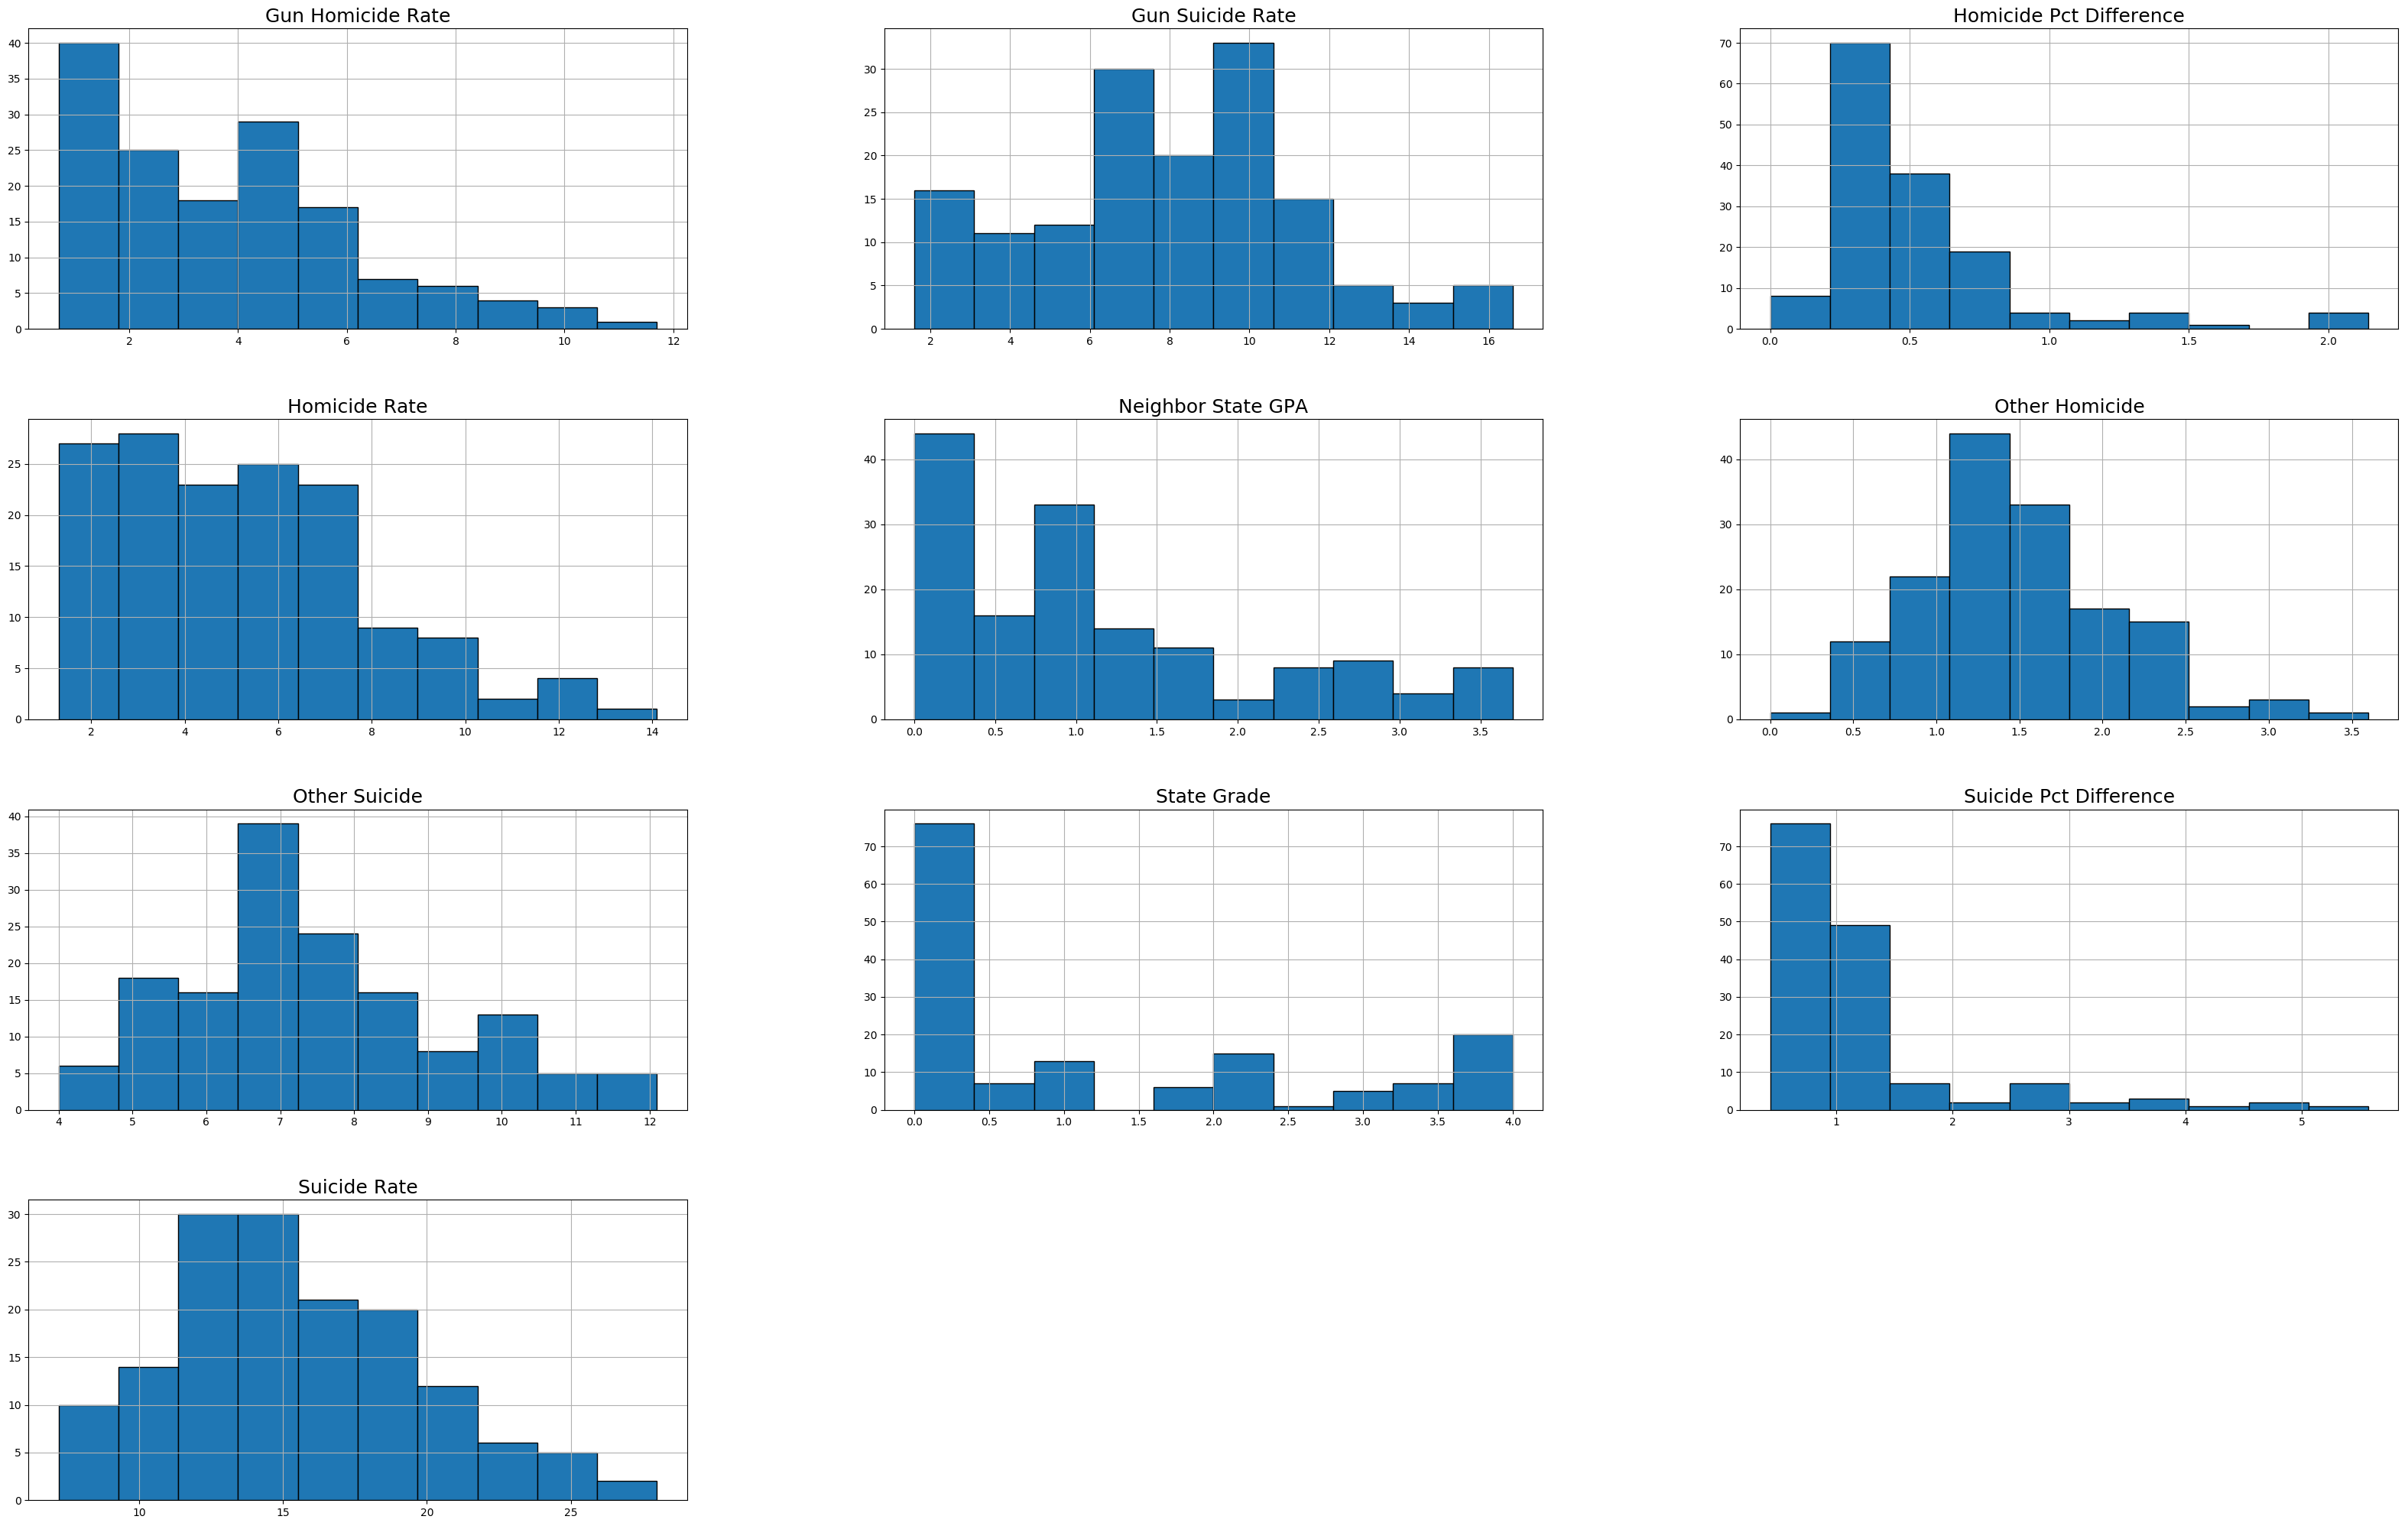

In [20]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Remove extraneous data from dataframe
df = df[df.columns[3:]]

# View feature distributions
fig = df.hist(figsize = (40, 25), ec='k')
[x.title.set_size(18) for x in fig.ravel()]
plt.show()

The most interesting thing to observe here is the distribution of state grades. A vast majority have F grades, and the next highest grade is an A. There is very little representation in the in-between space.

## Correlation Heat Map

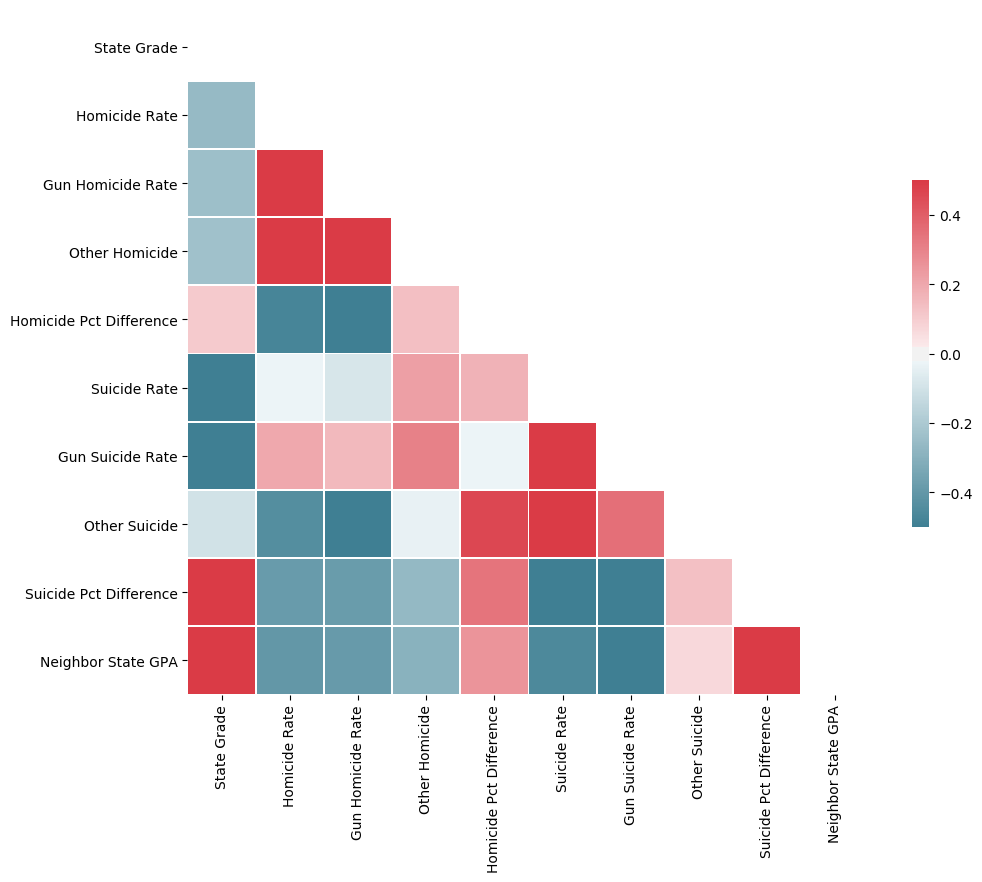

In [21]:
import seaborn as sns

def coll_check(data, win=1, size=(11,9)):
    mpl.rcParams.update(mpl.rcParamsDefault)
    
    # Create a covariance matrix
    corr = data.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize = size)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=win, vmin=-win, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    

coll_check(df, win=.5)

State gun law grades seem to have a strong, negative correlation with suicide rates (gun-related and otherwise), and a weak, negative relationship with homicide rates. However, neighbor state grades have a more uniform, negative correlation with both homicide and suicide rates, though the actual correlation rates seem to be a bit lower.

## Data Transformation
It was decided to not perform any transformations on the data because of the fact that there is no clarity on how grades themselves are calculated. If grades already represent percentage increases, a log transformation wouldn't make any sense. Right now, the goal is simply to determine whether or not further investigation is warranted, and if so, in what areas?

## Regression Analysis
Run simple, linear regressions for each target with state and neighbor grades independently. 

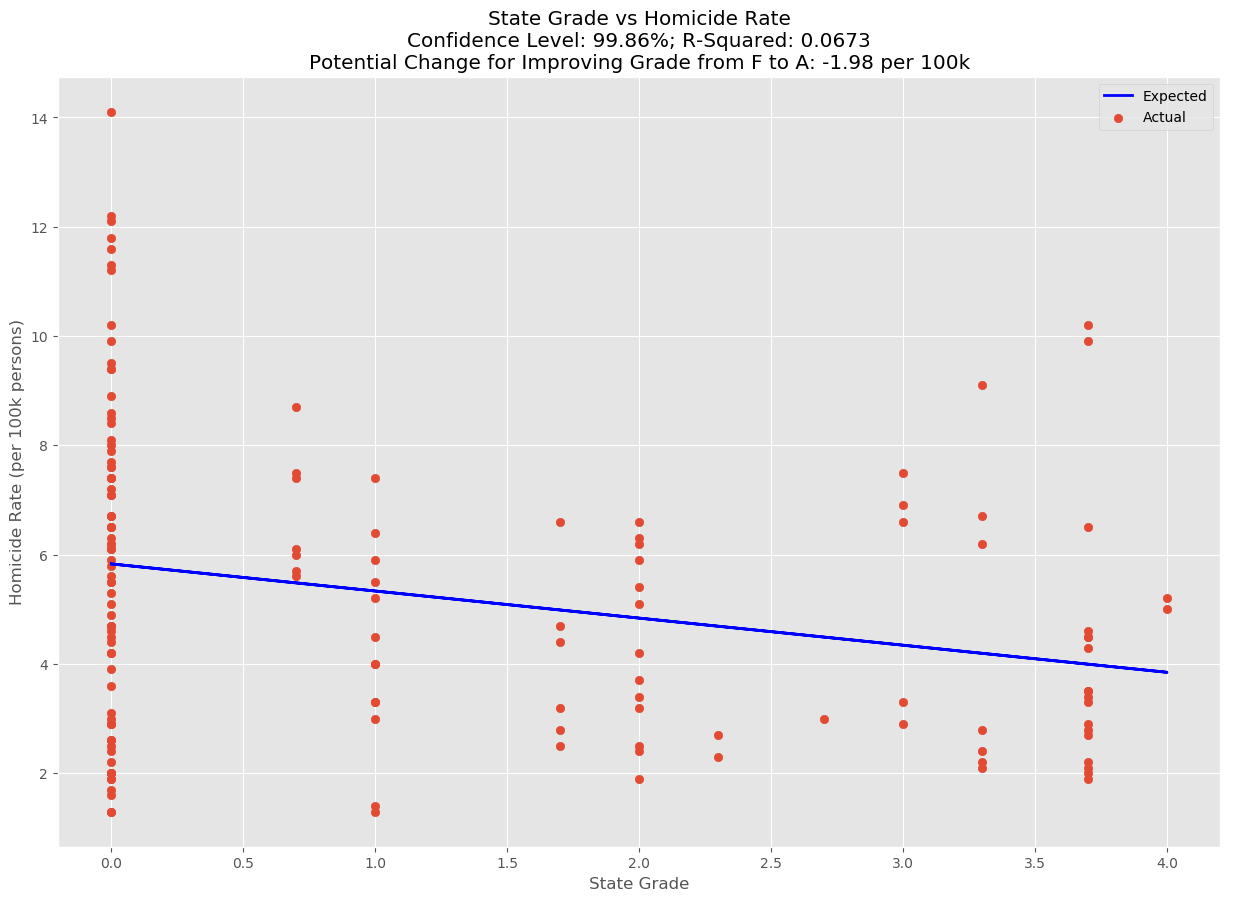

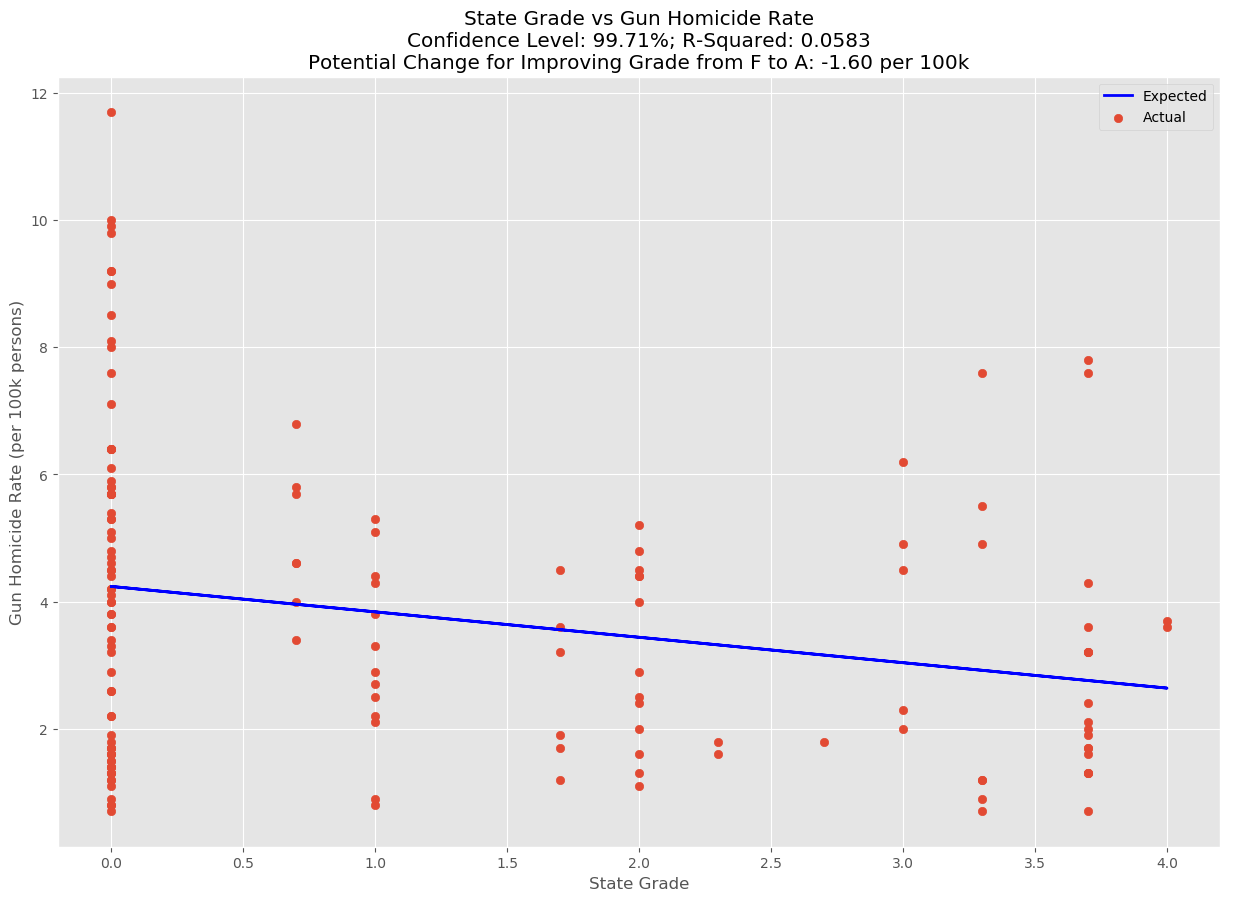

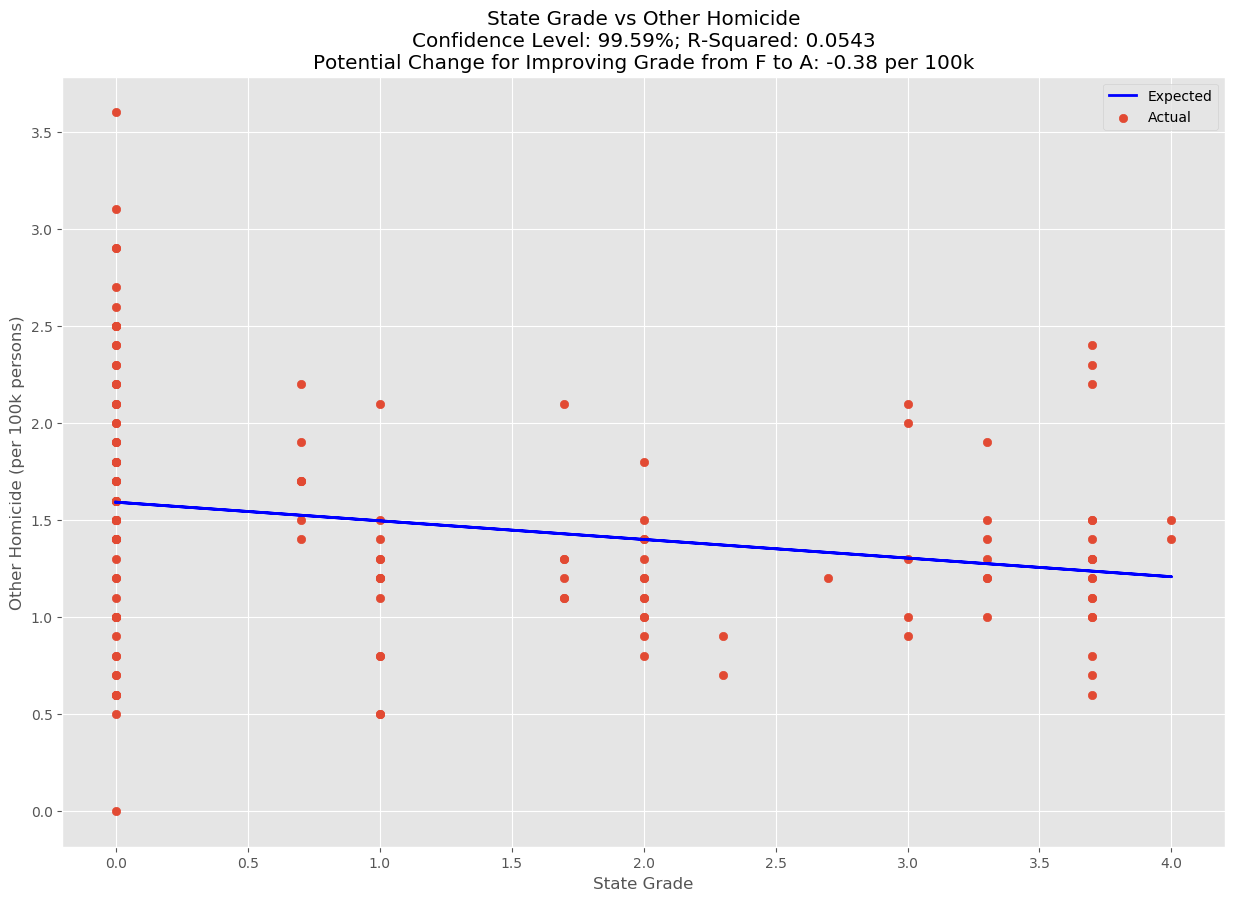

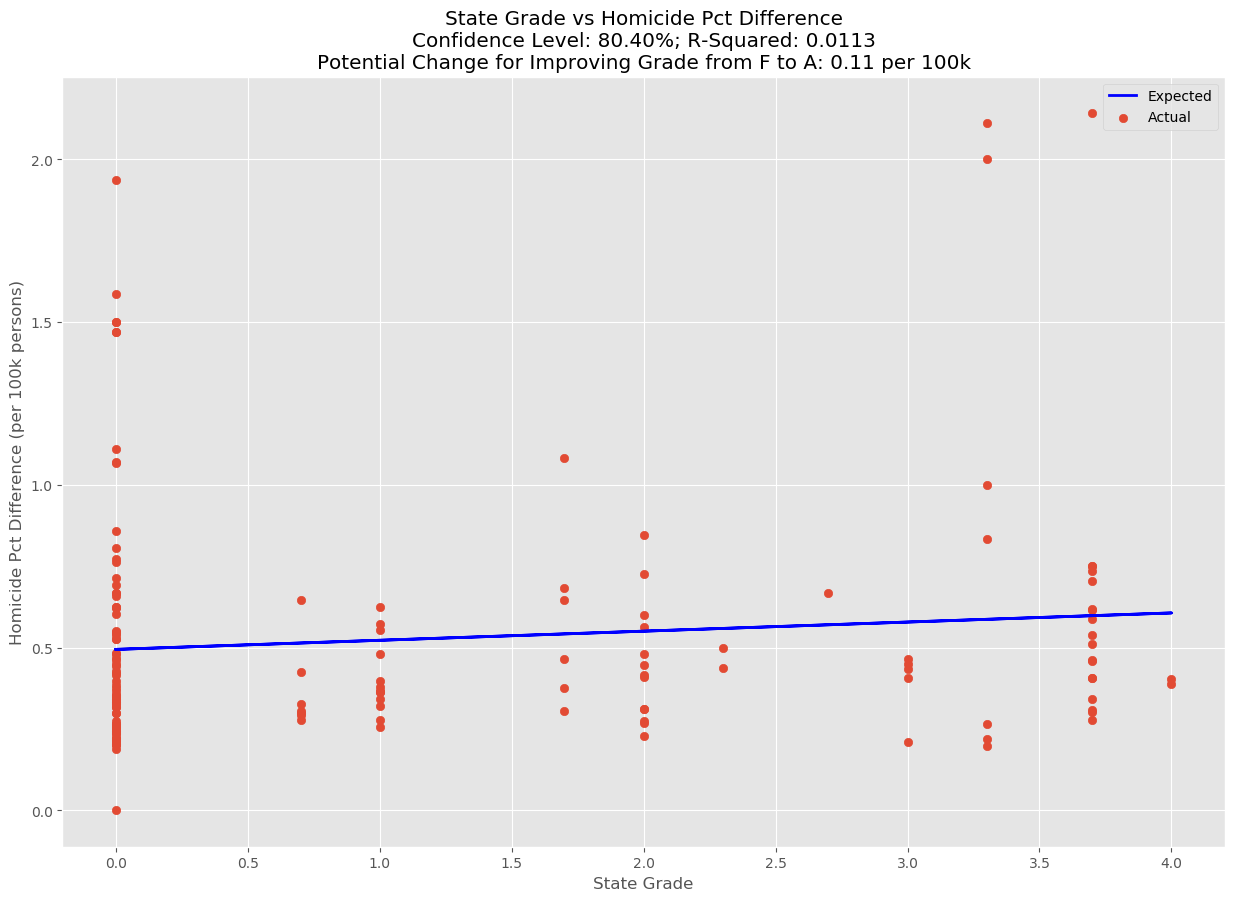

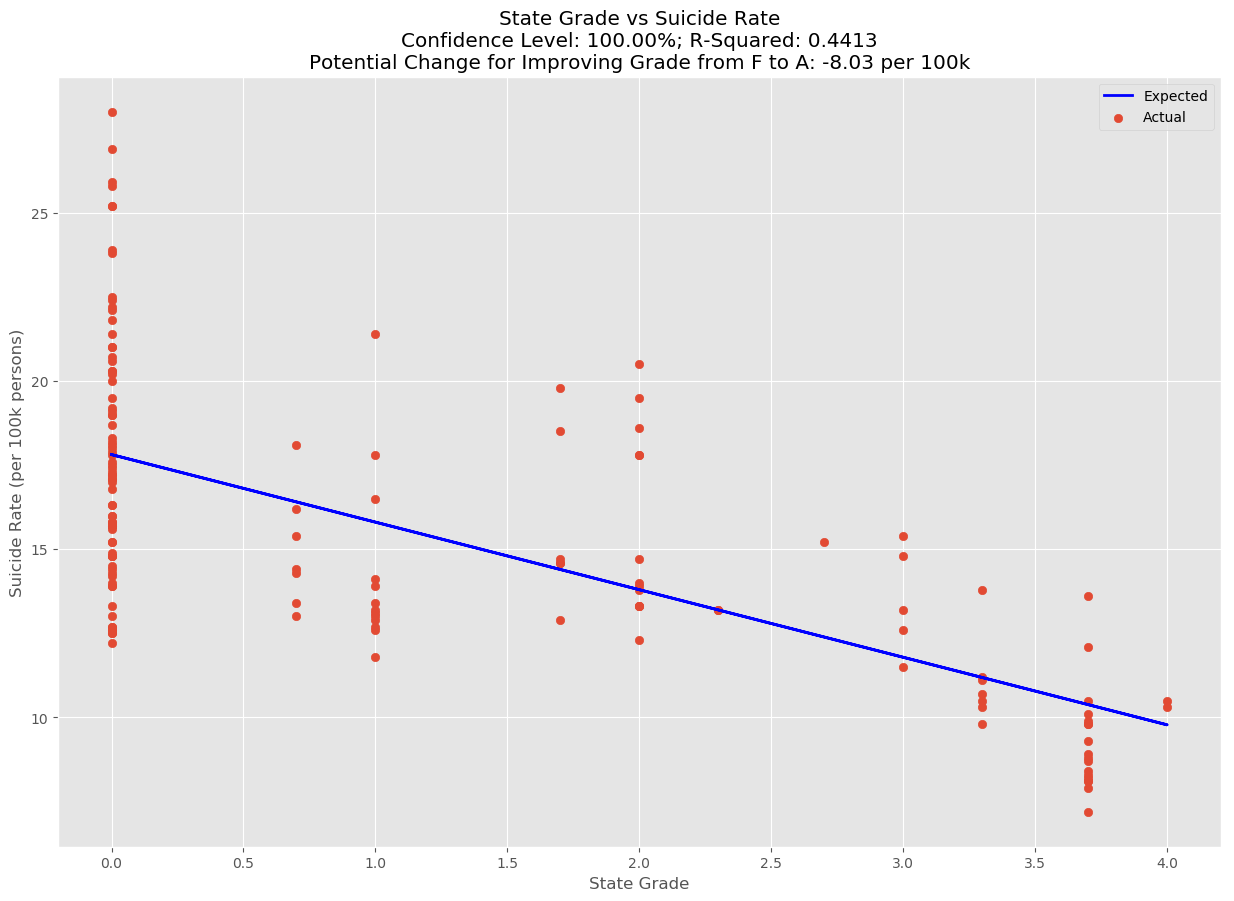

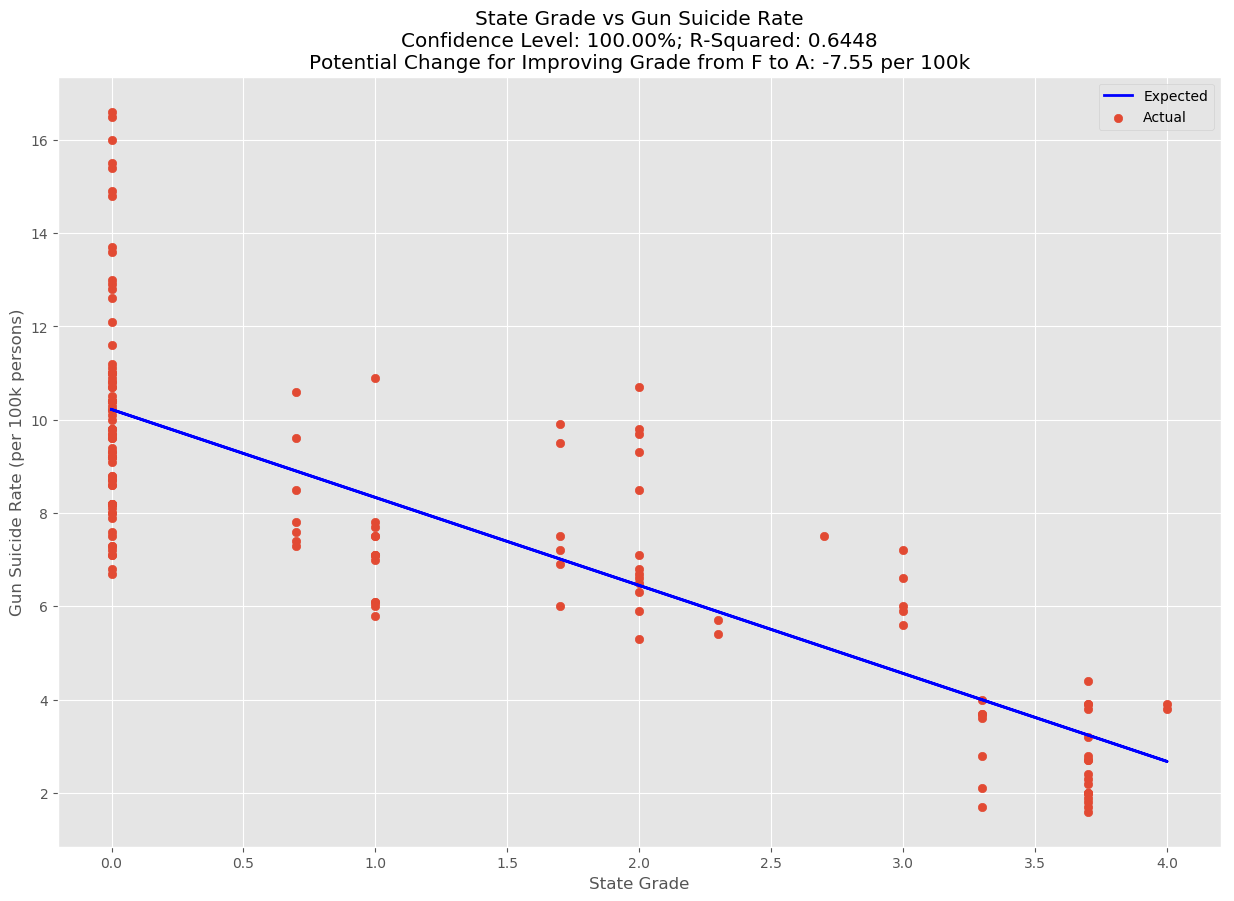

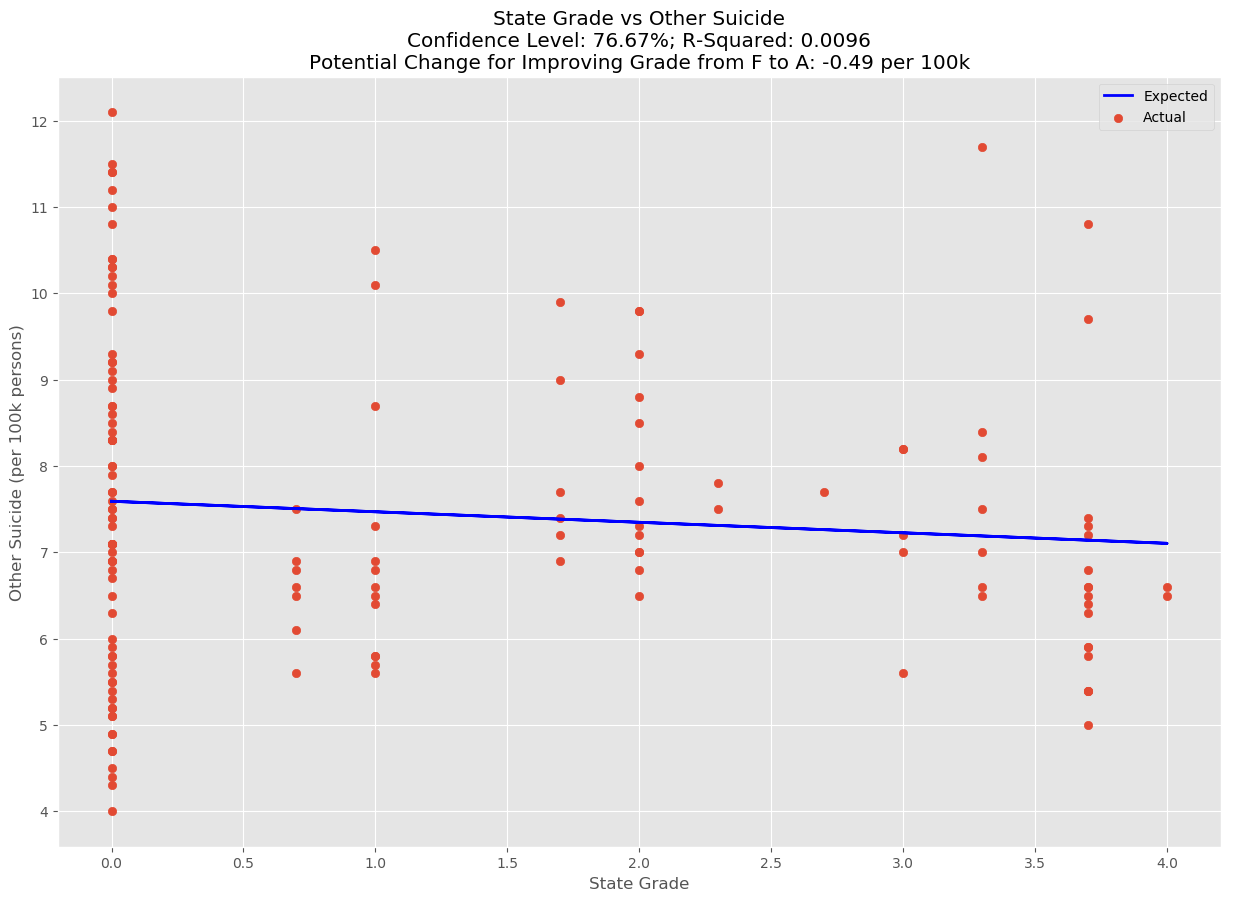

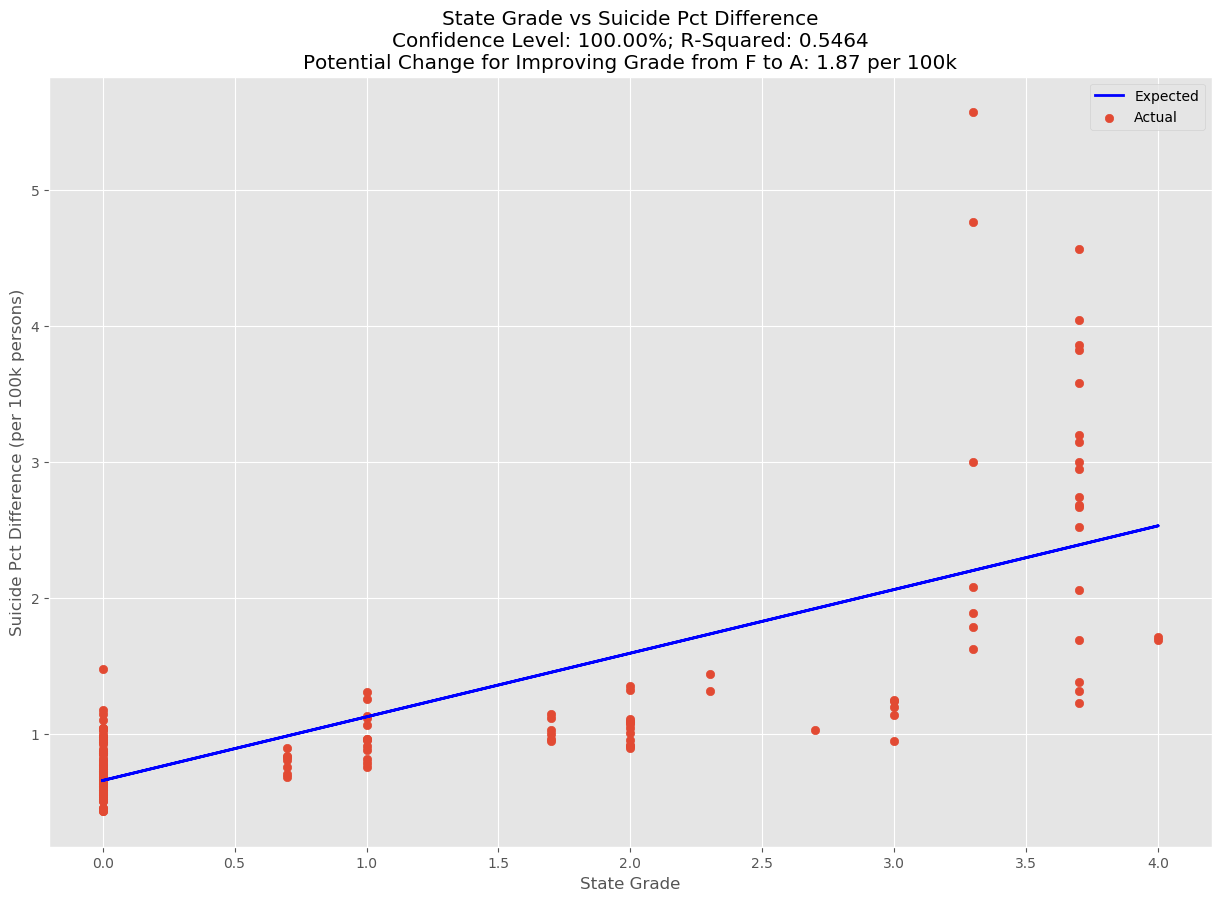

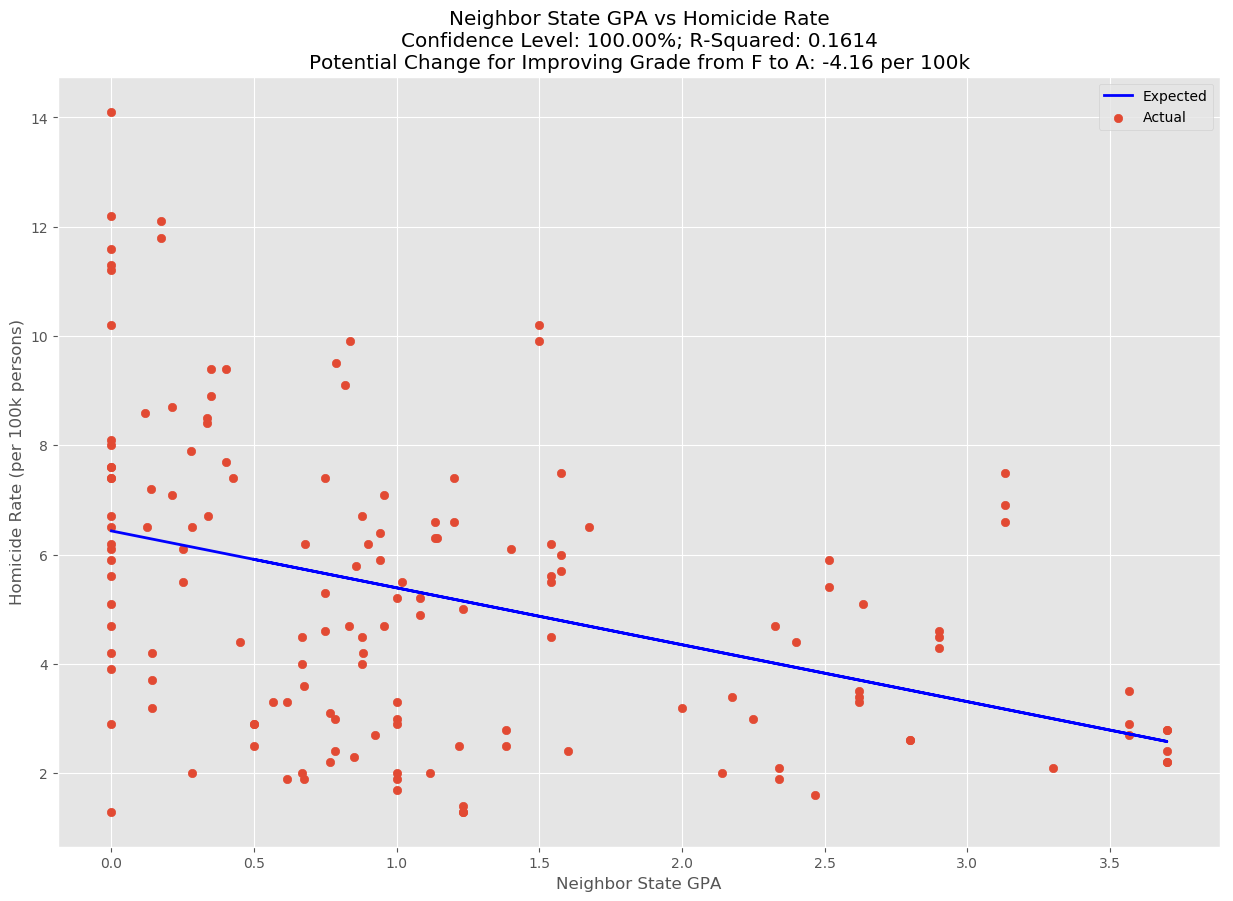

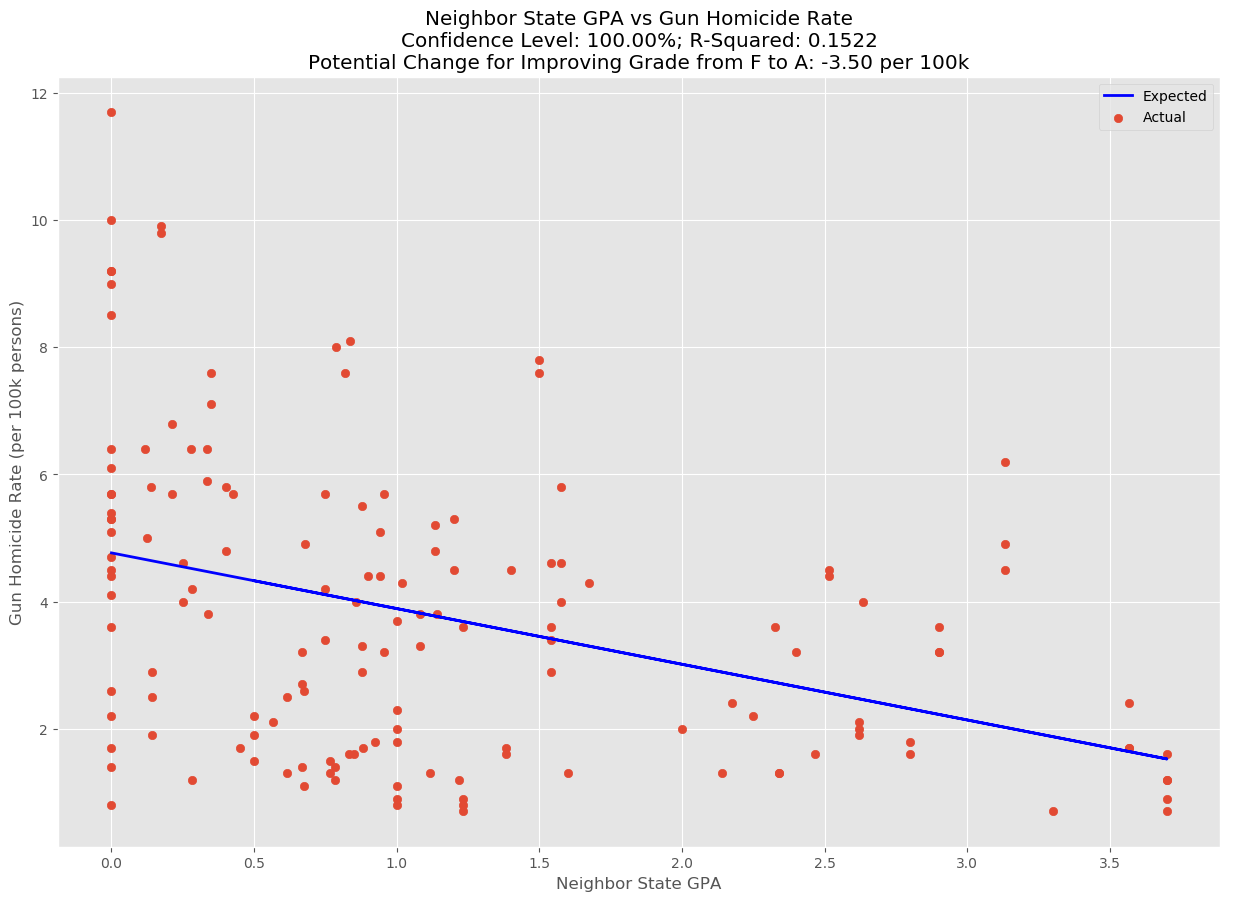

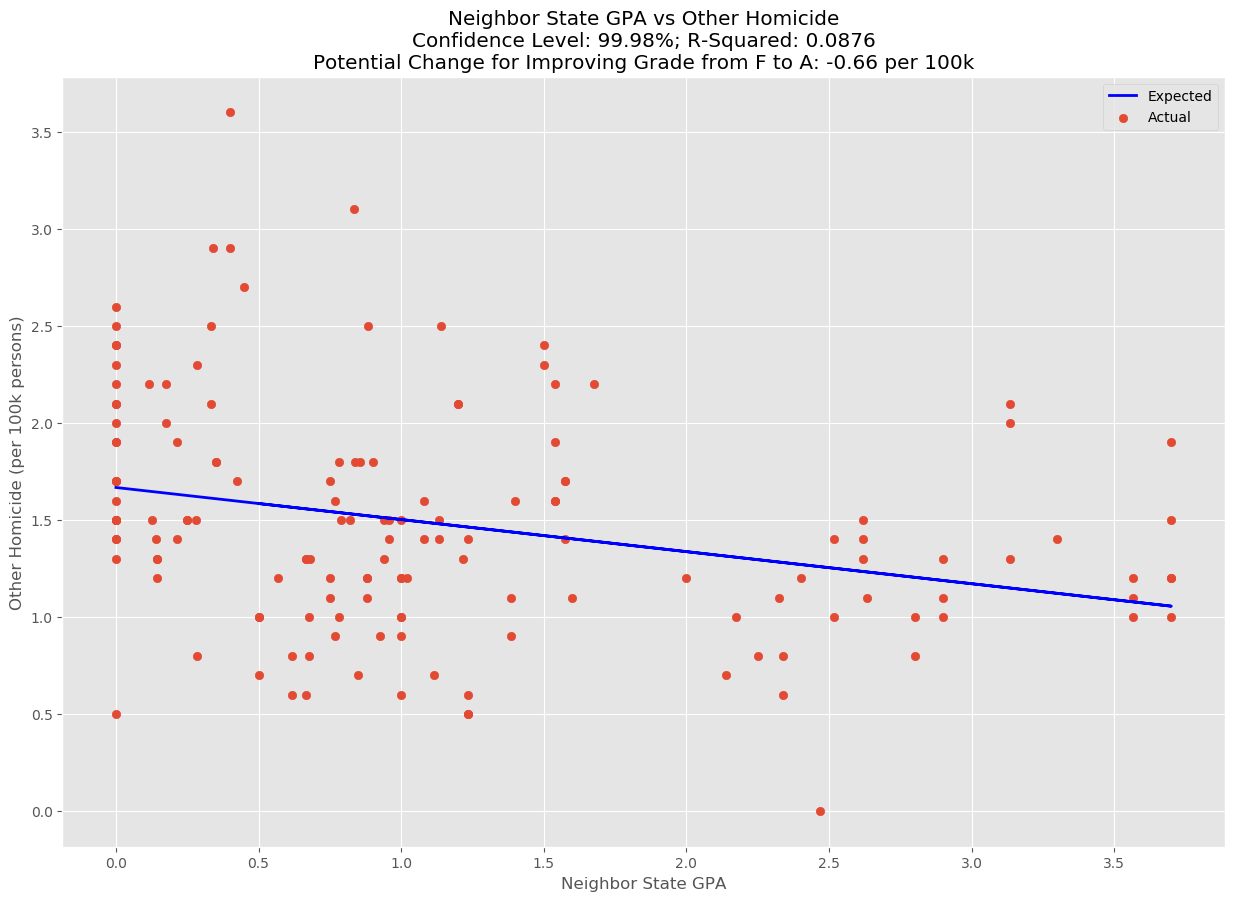

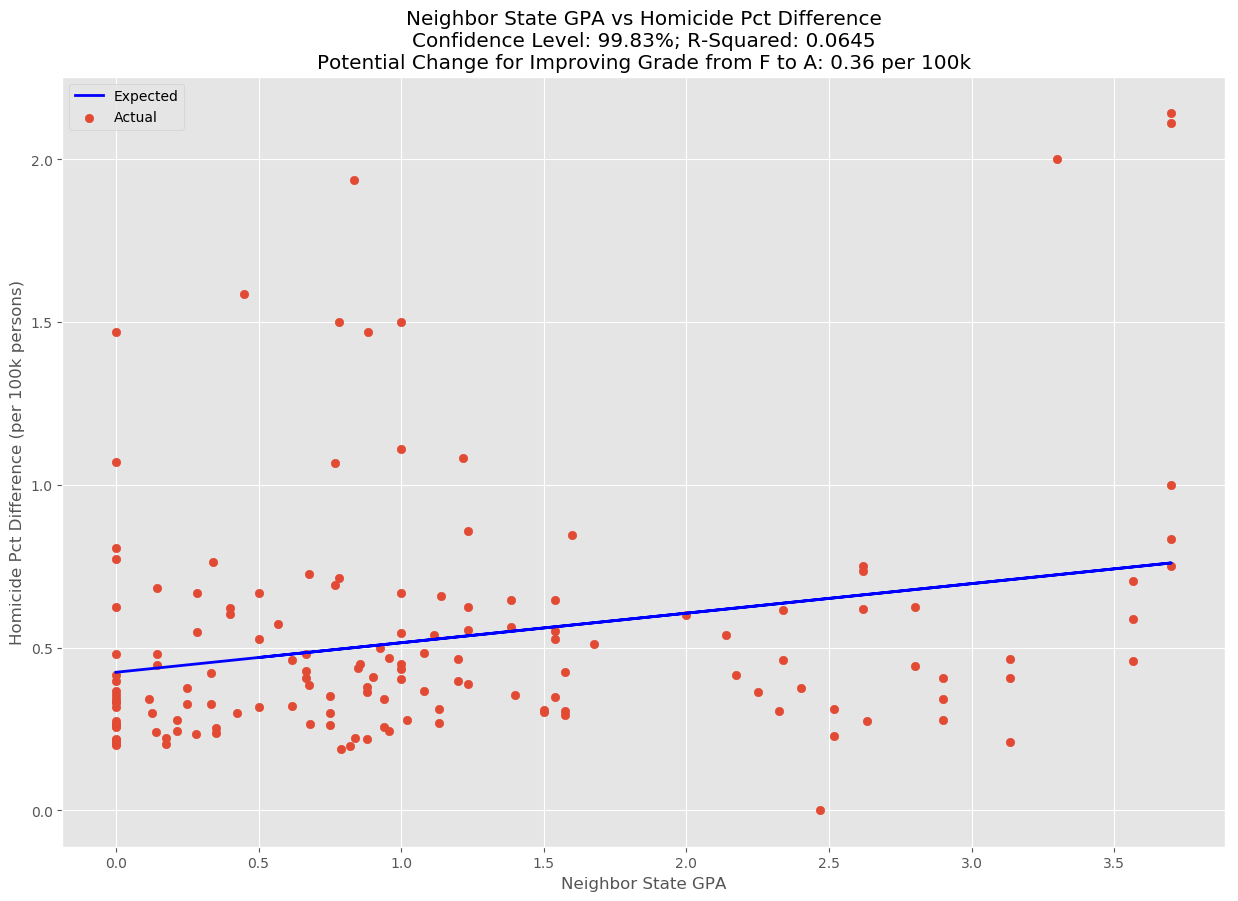

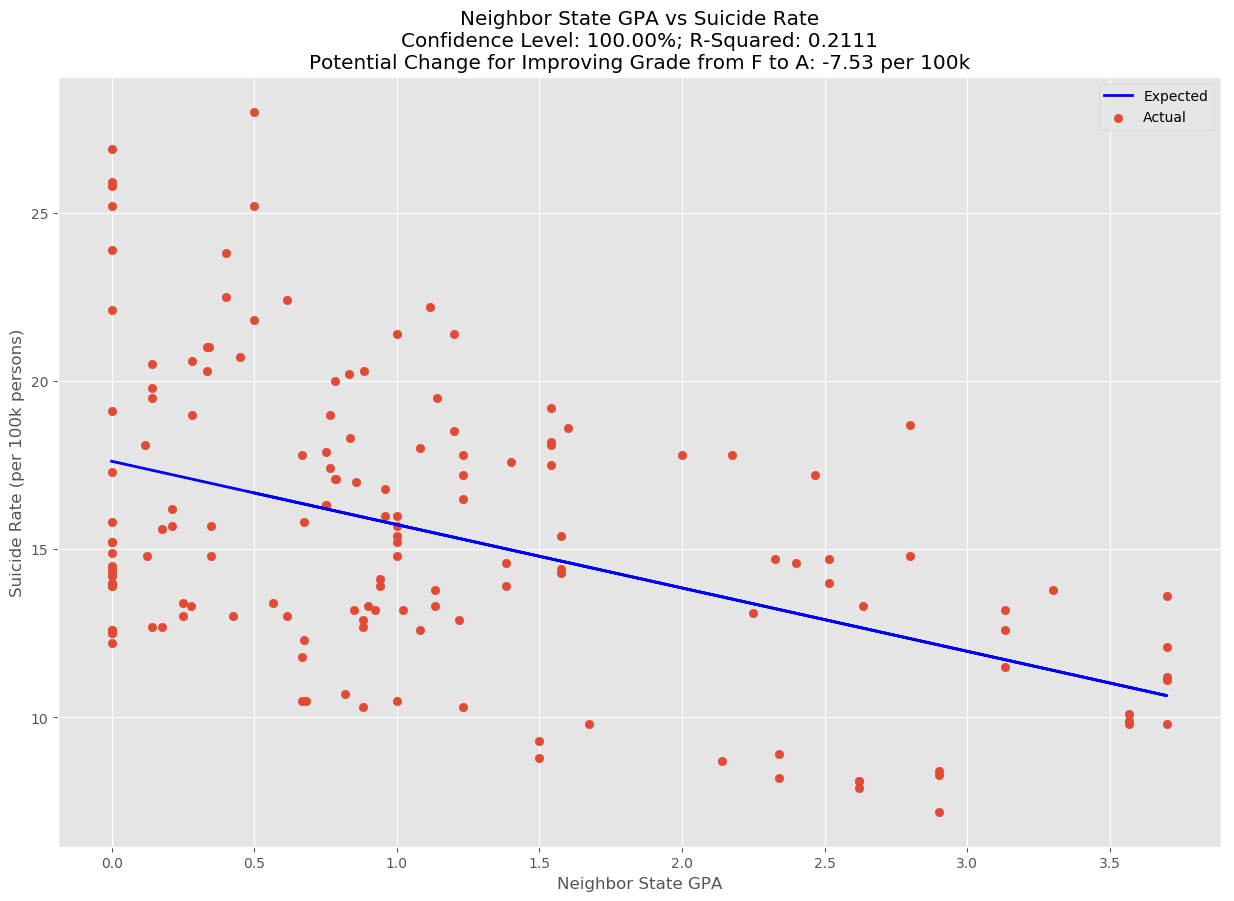

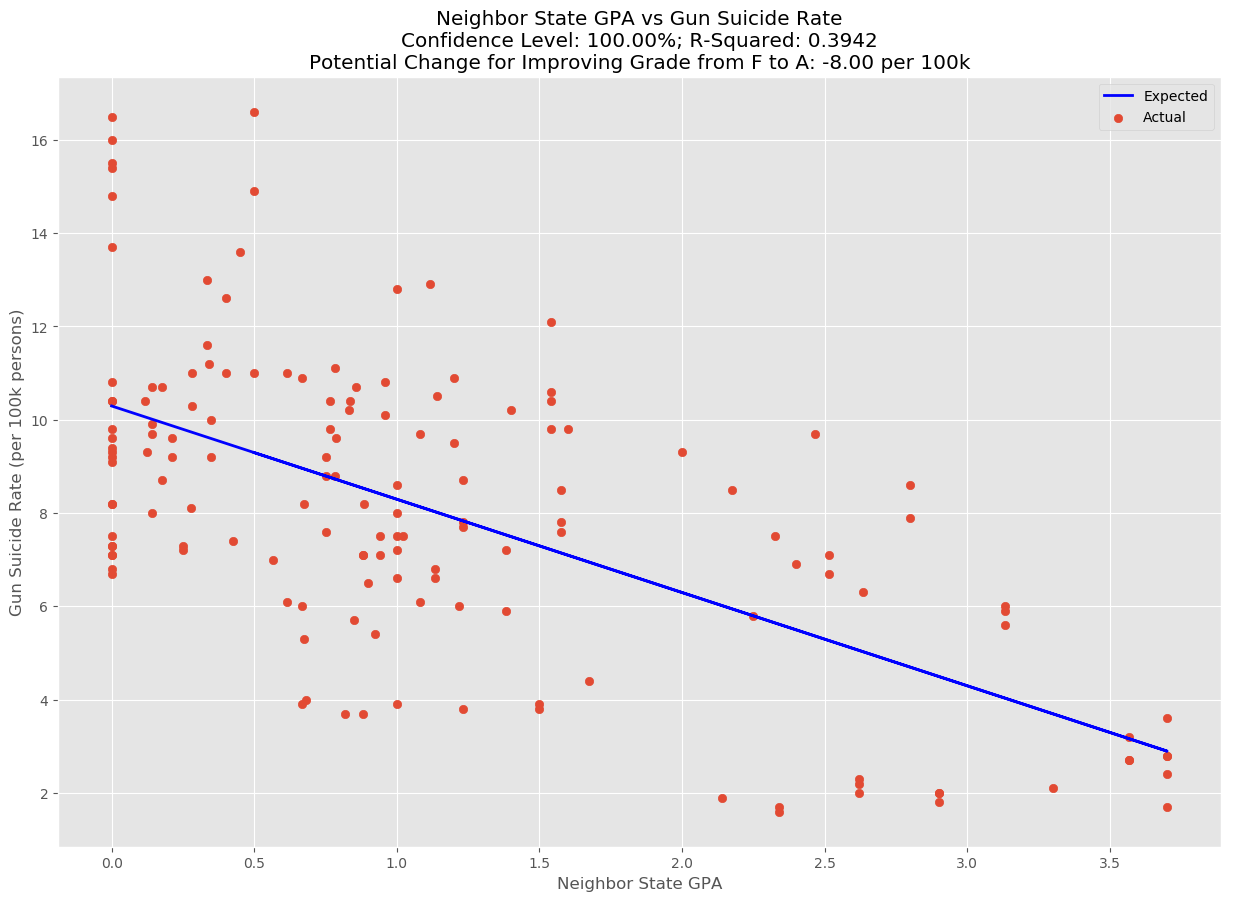

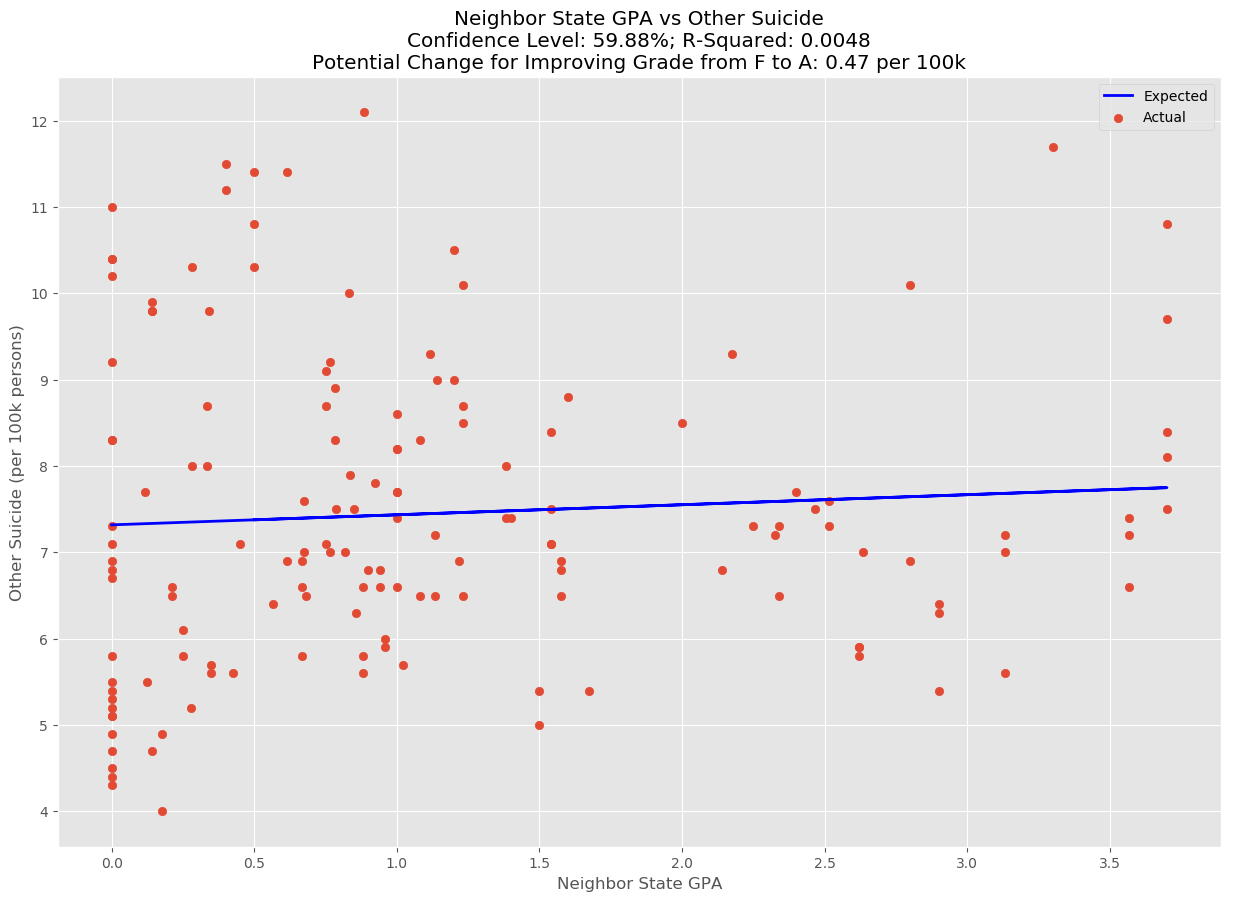

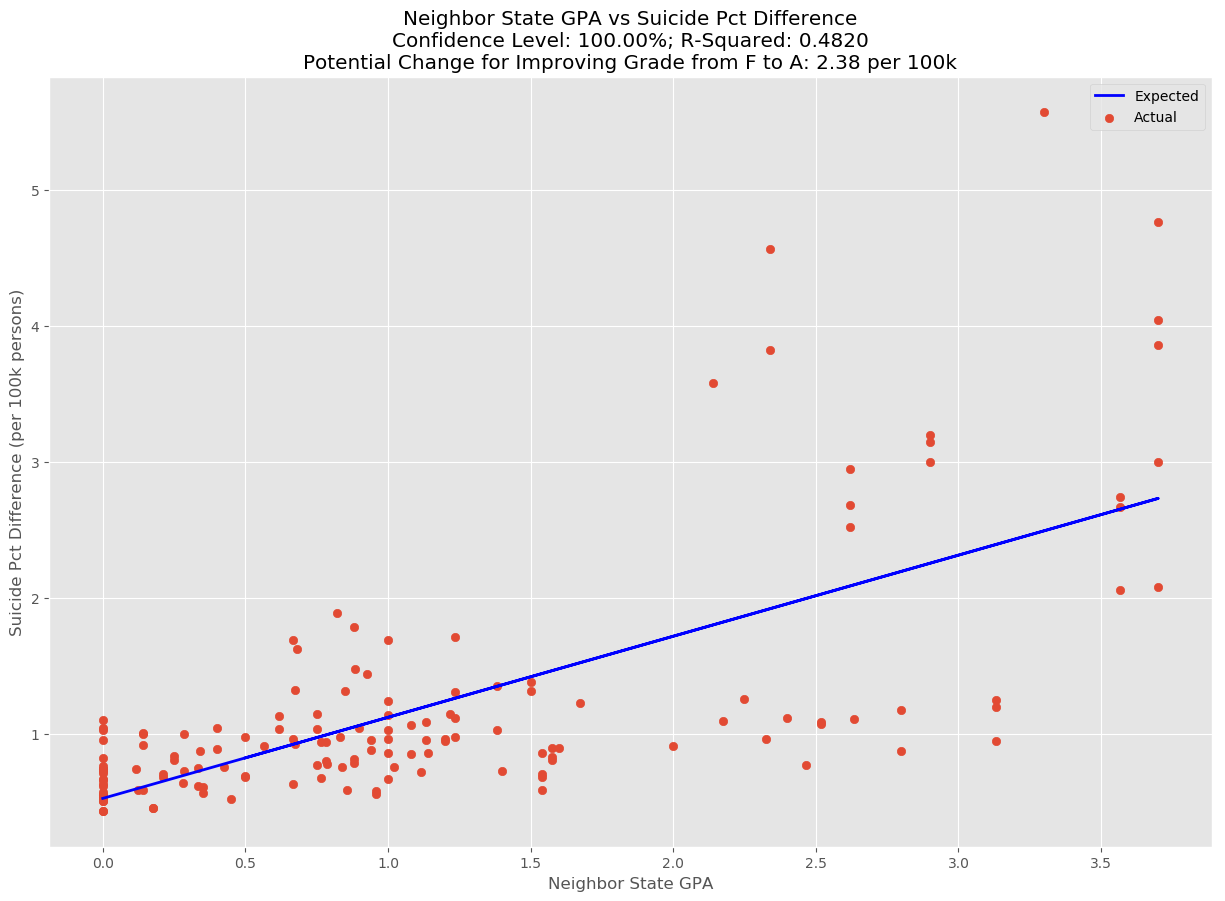

Target           Predictor  R Squared  Intercept   Slope  \
0             Homicide_Rate         State_Grade     0.0673     5.8299 -0.4956   
1         Gun_Homicide_Rate         State_Grade     0.0583     4.2384 -0.3996   
2            Other_Homicide         State_Grade     0.0543     1.5915 -0.0960   
3   Homicide_Pct_Difference         State_Grade     0.0113     0.4949  0.0280   
4              Suicide_Rate         State_Grade     0.4413    17.8122 -2.0082   
5          Gun_Suicide_Rate         State_Grade     0.6448    10.2201 -1.8864   
6             Other_Suicide         State_Grade     0.0096     7.5920 -0.1218   
7    Suicide_Pct_Difference         State_Grade     0.5464     0.6584  0.4681   
8             Homicide_Rate  Neighbor_State_GPA     0.1614     6.4335 -1.0410   
9         Gun_Homicide_Rate  Neighbor_State_GPA     0.1522     4.7663 -0.8757   
10           Other_Homicide  Neighbor_State_GPA     0.0876     1.6672 -0.1653   
11  Homicide_Pct_Difference  Neighbor_State_GPA     0.0645     0.4245  0.0908   
12             Suicide_Rate  Neighbor_State_GPA     0.2111    17.6142 -1.8834   
13         Gun_Suicide_Rate  Neighbor_State_GPA     0.3942    10.2954 -1.9999   
14            Other_Suicide  Neighbor_State_GPA     0.0048     7.3188  0.1165   
15   Suicide_Pct_Difference  Neighbor_State_GPA     0.4820     0.5266  0.5961   

    P Value  
0    0.0014  
1    0.0029  
2    0.0041  
3    0.1960  
4    0.0000  
5    0.0000  
6    0.2333  
7    0.0000  
8    0.0000  
9    0.0000  
10   0.0002  
11   0.0017  
12   0.0000  
13   0.0000  
14   0.4012  
15   0.0000

In [22]:
# Rename columns for regression model
for col in df.columns:
    df = df.rename(columns={col: col.replace(' ', '_')})

# Set target & predictor variables
targets = list(df.columns[1:-1])
predictors = ['State_Grade', 'Neighbor_State_GPA']

def regression(df, predictors, targets):
    # Run simple linear regressions for each predictor and each target
    results = [['Target', 'Predictor', 'R Squared', 'Intercept', 'Slope', 'P Value']]
    
    # Create display-friendly predictor variable names
    for predictor in predictors:
        Predictor = predictor.replace('_', ' ')
        
        # Create display-friendly target variable names
        for target in targets:
            Target = target.replace('_', ' ')

            # Create regression model as long as target & predictor are not same
            if predictor != target:
                # Fit & predict model
                f = f'{target}~{predictor}'
                model = smf.ols(formula=f, data=df).fit()
                y_pred = model.predict()

                # Append list of summary statistics to results
                results.append([target, 
                                predictor, 
                                np.round(model.rsquared, 4), 
                                np.round(model.params[0], 4), 
                                np.round(model.params[1], 4), 
                                np.round(model.pvalues[1], 4)])

                # Plot results
                plt.figure(figsize=(15, 10))
                plt.style.use('ggplot')
                plt.title(f'{Predictor} vs {Target}\n'
                          f'Confidence Level: {100*(1 - model.pvalues[1]):.2f}%; R-Squared: {model.rsquared:.4f}\n'
                          f'Potential Change for Improving Grade from F to A: {model.params[1]*4:.2f} per 100k')
                plt.xlabel(Predictor)
                plt.ylabel(f'{Target} (per 100k persons)')
                plt.scatter(df[predictor], df[target], marker='o', label='Actual')
                plt.plot(df[predictor], y_pred, color='b', lw=2, label='Expected')
                plt.legend()
                plt.show()

        # Create dataframe from results
        result_df = pd.DataFrame(results[1:],columns=results[0])

    return result_df

# Run regression for each predictor and target
# Return and display dataframe of results for each combination
regression(df, predictors, targets)

### Observations
Neighbor state laws seem to have a greater impact on homicide rates than laws within the target state. The opposite is true for suicide rates. Perhaps most interesting is that the strength of laws for both neighboring states and target states seem to have a much greater impact on suicide rates than homicide rates. 

## Test Initial Observations
Split data into train & test sets to observe the predictability of grade on overall suicide and homicide rates, thereby testing the validity of observations. To ensure data isn't biased by a randomly selected skewed split of the data, 1000 interations will be performed and results will be aggregated to get an average score with confidence interval.

The following functions will be created to perform this task:
- Calculate Mean Confidence Interval
- Split, Train, and Test the Model
- Create Visualization of Aggregated Results

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    # Calculate confidence interval for a range of data
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

warnings.filterwarnings('ignore')

def train_linreg(X, y, predictor, target, rand_state=123):    
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.2, 
                                                        random_state=rand_state)

    predictions_df = X_test[['State-Year']]
    X_train = X_train[[predictor]]
    X_test = X_test[[predictor]]
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    score = r2_score(y_test, y_hat_test)
    
    predictions_df['Predicted'] = np.round(y_hat_test, 1)
    predictions_df['Actual'] = y_test
    predictions_df = predictions_df.set_index('State-Year')
    
    return predictions_df, score


def results_distribution(X, y, predictor, target, n=100):
    scores = []
    Predictor = predictor.replace('_', ' ')
    Target = target.replace('_', ' ')
    
    print(f'\nCalculating Average Score for {Predictor} vs {Target}')
    for i in range(n):
        pred_df, score = train_linreg(X, y, predictor, target, rand_state=i)
        scores.append(score)

        if (100 * ((i+1) / n)) % 25 == 0:
            print(f'{int(100 * (i+1)/n)}% Complete')
    
    m, h = mean_confidence_interval(y, confidence=0.95)
    
    plt.figure(figsize=(20, 5))
    sns.distplot(scores)
    plt.title(f'{Predictor} vs {Target} R-Square Scores Distribution\nMean R-Squared: {np.mean(scores)*100:.2f}% (+/– {h:.2f}%)')
    plt.xlabel('R-Square Value')
    plt.ylabel('Frequency')
    plt.show()


Calculating Average Score for State Grade vs Suicide Rate
25% Complete
50% Complete
75% Complete
100% Complete


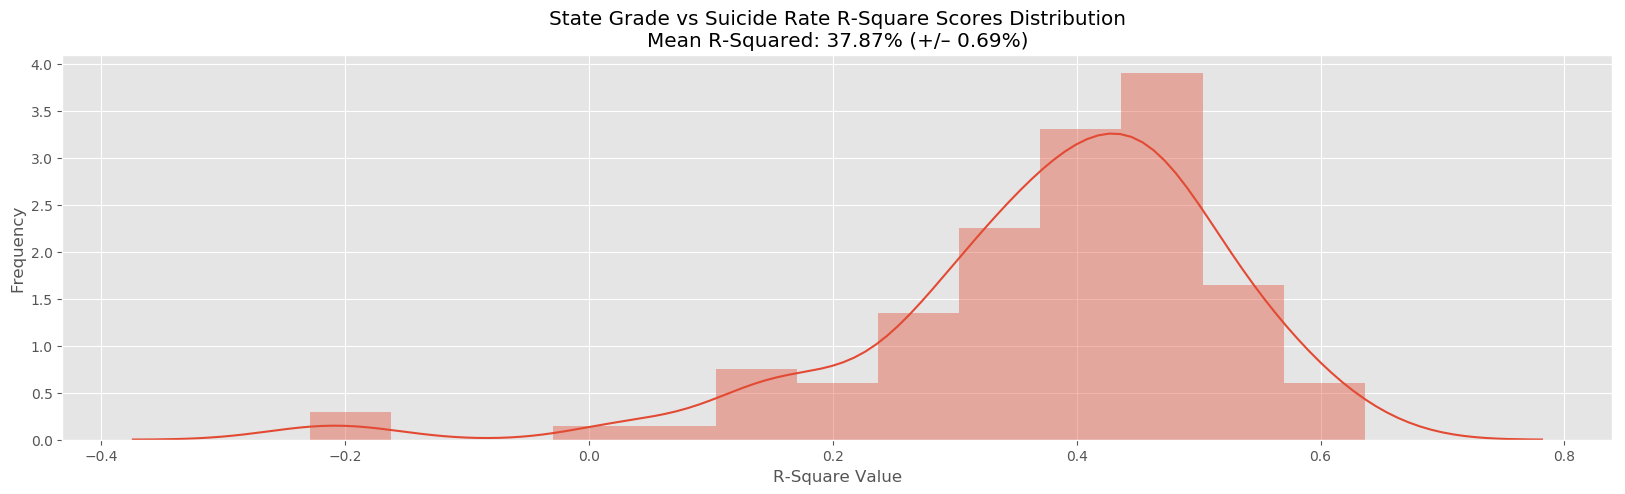


Calculating Average Score for State Grade vs Homicide Rate
25% Complete
50% Complete
75% Complete
100% Complete


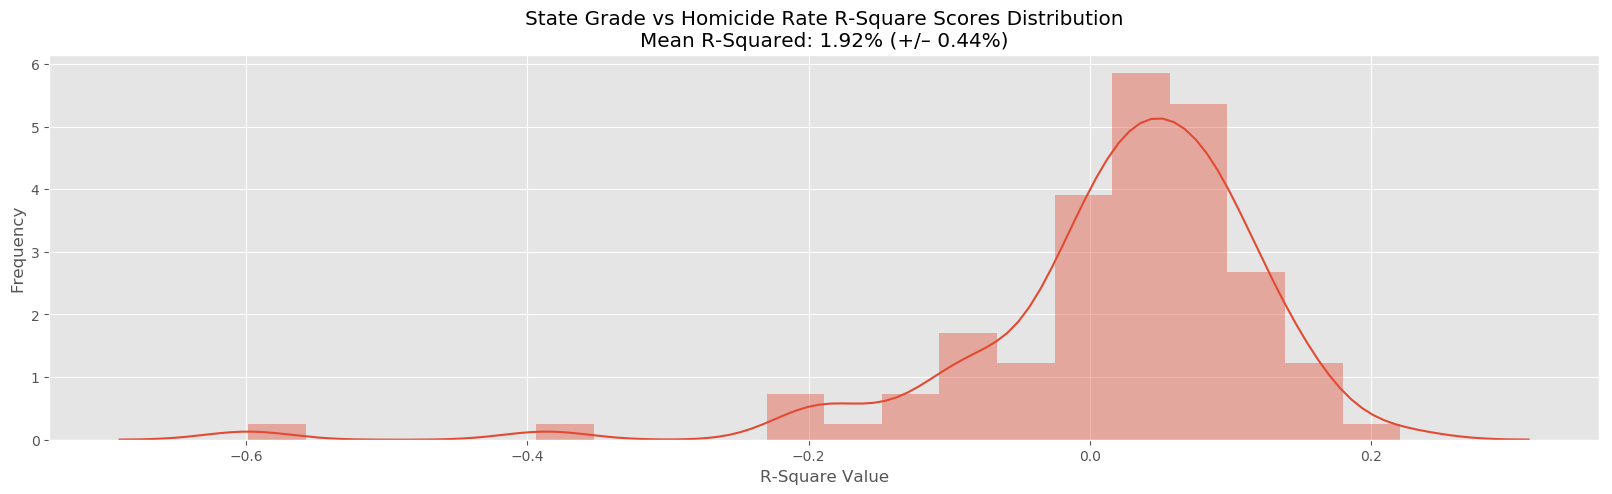


Calculating Average Score for Neighbor State GPA vs Suicide Rate
25% Complete
50% Complete
75% Complete
100% Complete


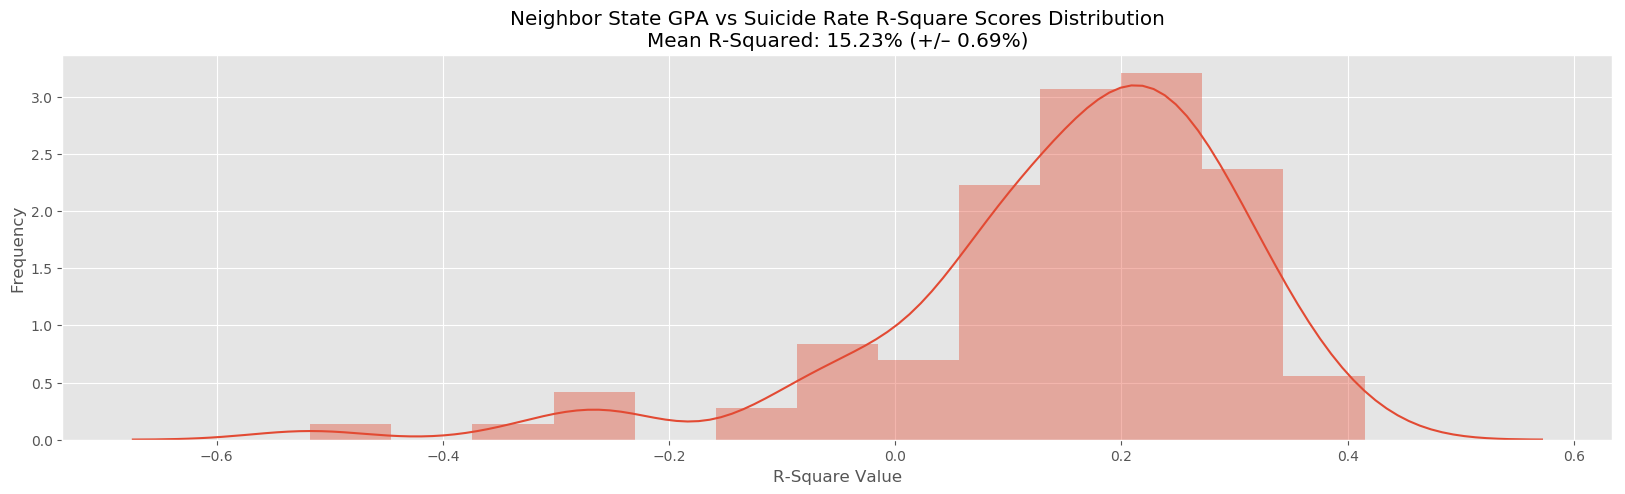


Calculating Average Score for Neighbor State GPA vs Homicide Rate
25% Complete
50% Complete
75% Complete
100% Complete


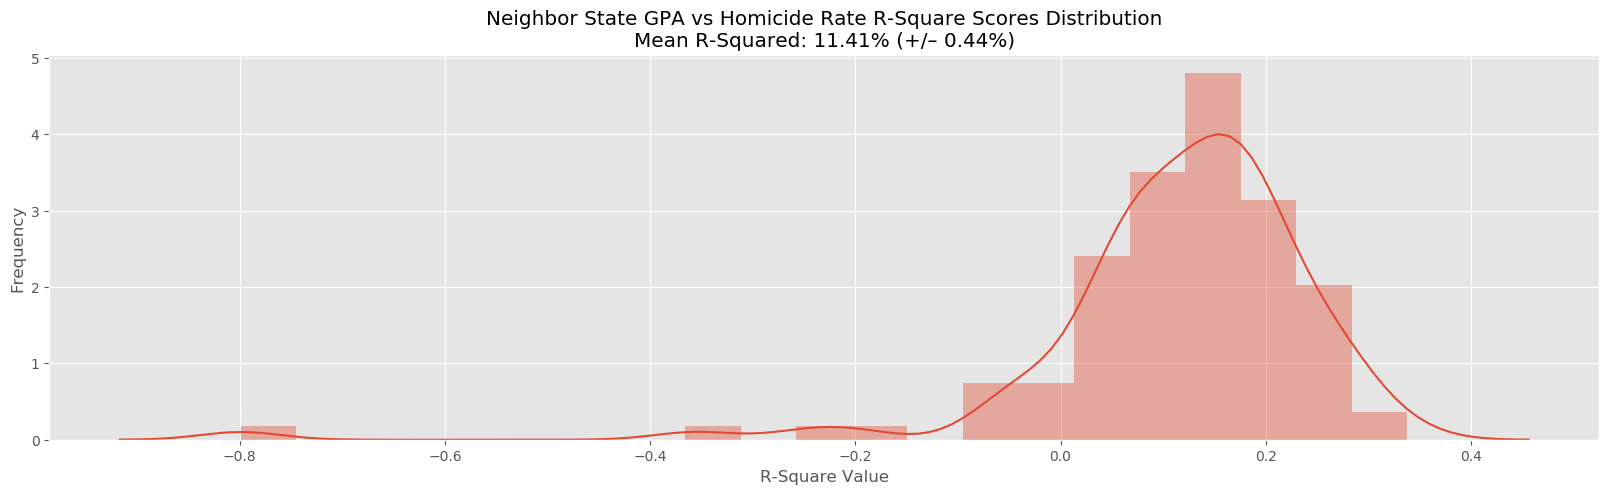

In [24]:
predictors = ['State_Grade', 'Neighbor_State_GPA']
targets = ['Suicide_Rate', 'Homicide_Rate']

for predictor in predictors:
    for target in targets:
        X = df.reset_index()[['State-Year', predictor]]
        y = df.reset_index()[target]
        results_distribution(X, y, predictor, target, 100)

Performing 100 random train/test splits, we find that state law grades can explain 37.87% of the variance in suicide rates and 1.92% of the variance in homicide rates. By contrast, Neighbor State GPA can explain only 15.23% of the variance in suicide rates (less than 50% of the variance that can be explained by in-state laws), yet can explain 11.41% of the variance in homicide rates (a 600% increase).

## Multilinear Regression
Rather than looking at each variable in isolation, let's see if accuracy can be improved by looking at in-state law grades in tandem with neighbor averages.

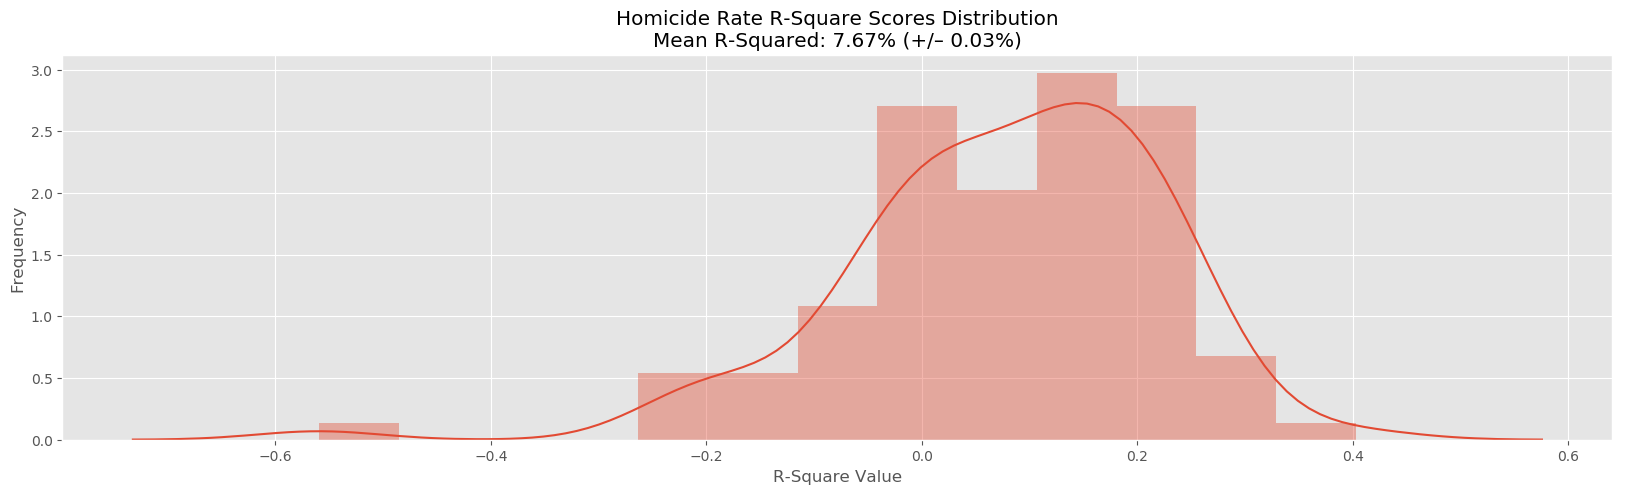

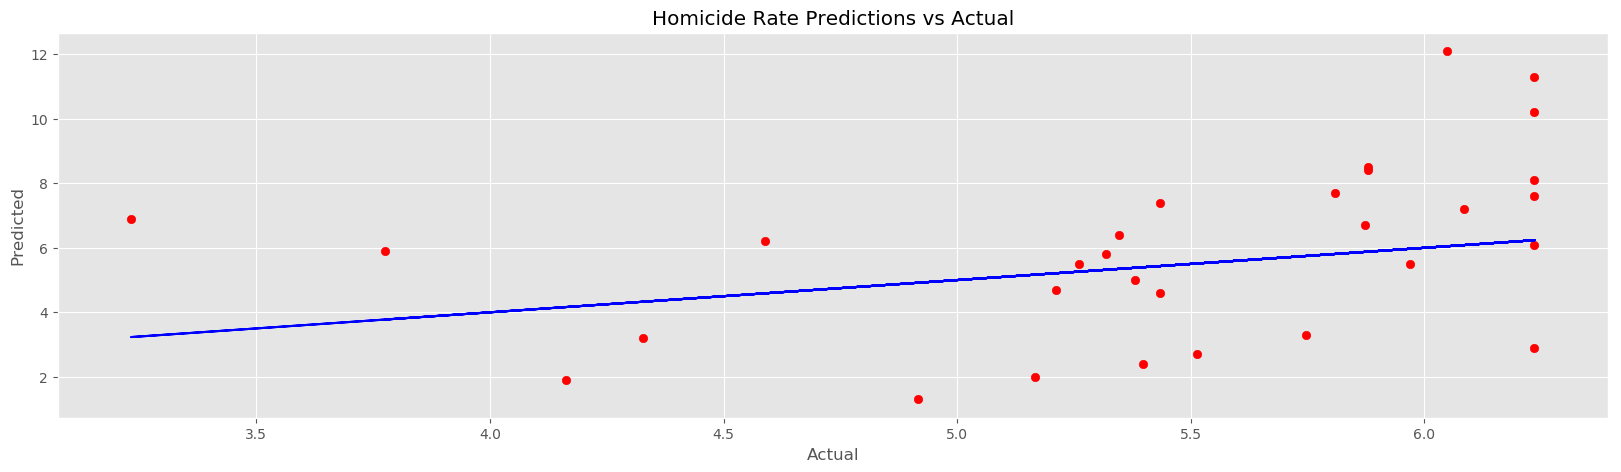

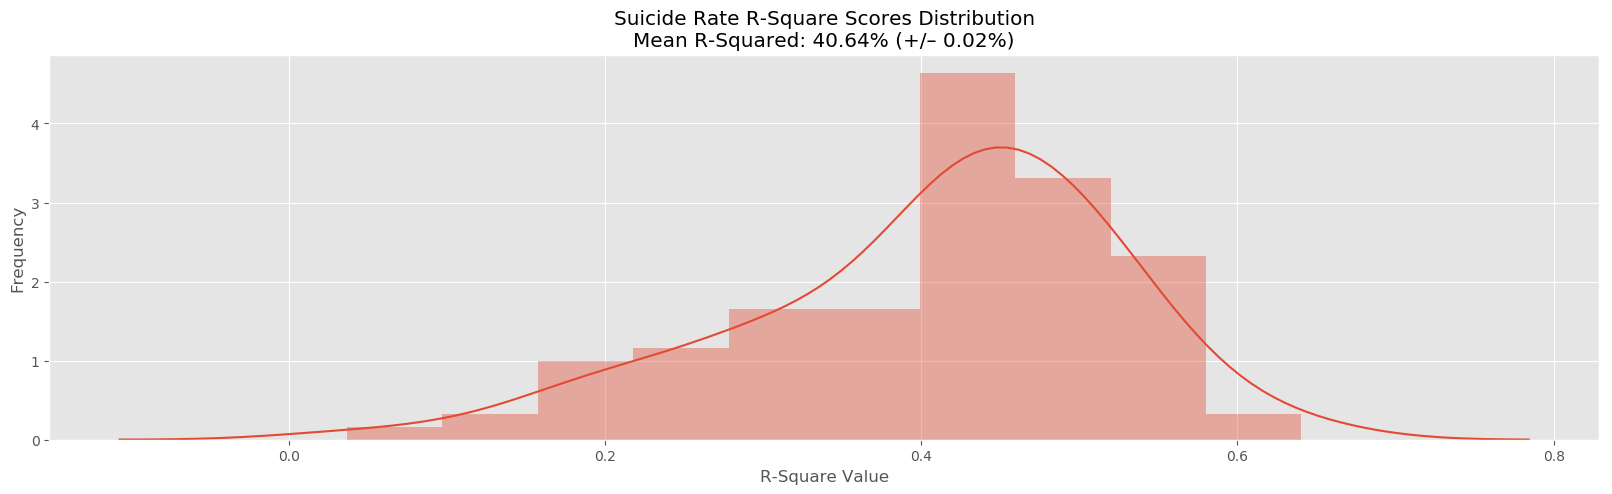

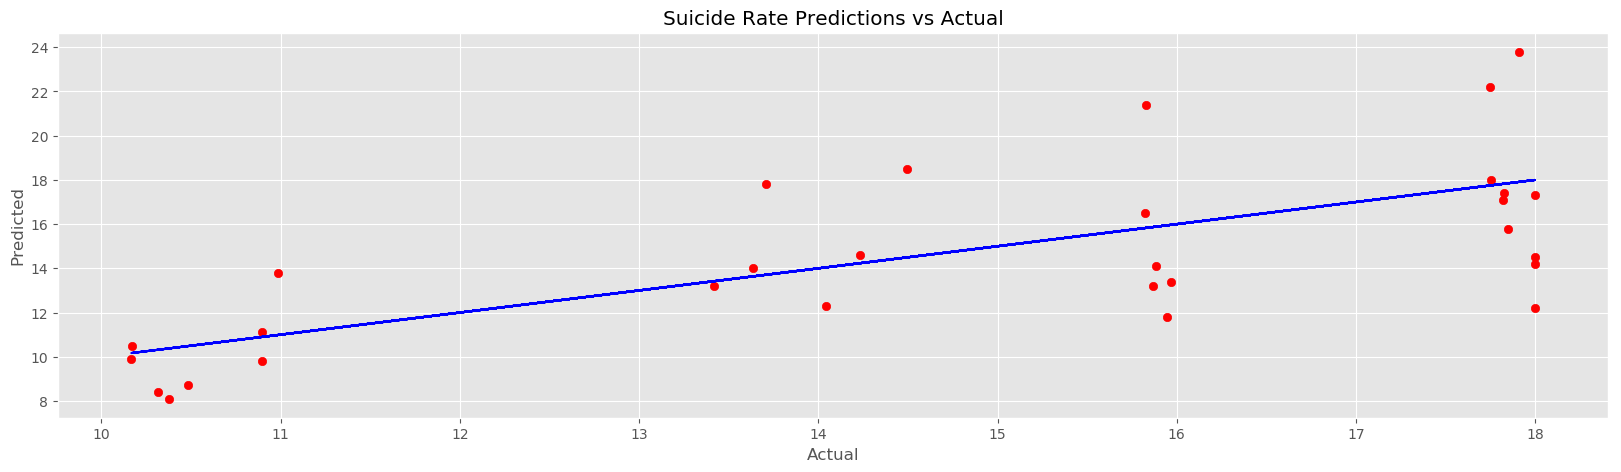

In [25]:
targets = ['Homicide_Rate', 'Suicide_Rate']
predictors = ['State_Grade', 'Neighbor_State_GPA']

for target in targets:
    X = df[predictors]
    y = df[target]
    
    scores = []
    
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)

        y_hat_test = linreg.predict(X_test)
        score = r2_score(y_test, y_hat_test)
        scores.append(score)
    
    Target = target.replace('_', ' ')
    
    m, h = mean_confidence_interval(scores)
    
    plt.figure(figsize=(20, 5))
    sns.distplot(scores)
    plt.title(f'{Target} R-Square Scores Distribution\nMean R-Squared: {np.mean(scores)*100:.2f}% (+/– {h:.2f}%)')
    plt.xlabel('R-Square Value')
    plt.ylabel('Frequency')
    plt.show()
    
    plt.figure(figsize=(20, 5))
    plt.plot(y_hat_test, y_hat_test, color='b', label='Predicted')
    plt.scatter(y_hat_test, y_test, color='r', label='Actual')
    plt.title(f'{Target} Predictions vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

Taking both neighbor and in-state laws into account slightly improved predictability of homicide rates when compared to predictability using only neighbor state gpa. Suicide rate predictability suffered slightly. Initial results do not provide compelling evidence to suggest gun laws have a significant impact on overall homicide rates, though they do seem to have a substantial impact on suicide rates.

The overall results may suggest that strong gun laws are effective at preventing impulive type of actions, though have little impact when more determination and premeditation is in effect. Though there are multiple paths that can be followed from this data, greater emphasis from here will be focused on homicide rates.

## Expanding Research
Ultimately, looking at only 3 years of data using an arbitrary grading scale with ambiguous criterion cannot provide the desired level of insight, though it does help give as a good starting point. We will want to expand our data search by expanding our timeline, looking at specific features of state law, and exporing a subset of homicide rates: mass shootings & mass murders.

## Mass Murders
Dataset downloaded from the University of Maryland's [Global Terrorism Database](https://www.start.umd.edu/gtd). Mass shootings are defined as those where the total number of fatalities is 6 or more. Filters were applied to gather data only in the United States where firearms was a weapon of choice. All weapons types were considered, with the exception of CBN (Chemical, Biological, Nuclear). In addition, failed attemps will also be considered, so instances where injuries are 10+ or fatalities exceed 5 will be included.

In [26]:
# url = str('https://www.start.umd.edu/gtd/search/ResultsCSV.aspx?csv=1&'
#           'casualties_type=b&'
#           'casualties_max=&'
#           'start_yearonly=1991&'
#           'end_yearonly=2017&dtp2=all&'
#           'success=no&'
#           'country=217&'
#           'weapon=6,7,5,8,9,11,13,10')

# mass_shooting_data = pd.read_csv(url, usecols=np.arange(20))
# mass_shooting_data.to_csv('national_data/mass_shootings.csv')

mass_shooting_data = pd.read_csv('global_terrorism_database/mass_shootings.csv')

cols = [2, 4, 12, 11, -1]
mass_shooting_data = mass_shooting_data[mass_shooting_data.columns[cols]]
mass_shooting_data.head()

DATE           CITY INJURED FATALITIES              WEAPON TYPE 1
0  2017-12-22     Harrisburg       1          1                   Firearms
1  2017-12-22     Harrisburg       0          0                   Firearms
2  2017-12-11  New York City       4          0  Explosives/Bombs/Dynamite
3  2017-12-07          Aztec       0          3                   Firearms
4  2017-11-13           Vale       0          0                 Incendiary

In most instances, injured and fatality is an integer. However, in some cases, the number of casualties is listed as unknown, or is some sort of categorical value, such as "business." In these instances, the string will be replaced with 0 so that the columns can be converted to integer.

In [27]:
# Replace strings with 0 value
for col in ['FATALITIES', 'INJURED']:
    clean_col = []
    for item in mass_shooting_data[col]:
        try:
            clean_col.append(int(item))
        except:
            clean_col.append(0)
      
    mass_shooting_data[col] = clean_col
    mass_shooting_data = mass_shooting_data.rename(columns={col:col.title()})

# Filter dataframe to include only items classified as mass shooting
mass_shooting_data = mass_shooting_data[(mass_shooting_data['Fatalities']>5) | (mass_shooting_data['Injured'] >= 10)]

# Create column to identify year based on date
mass_shooting_data['Year'] = [int(date[:4]) for date in mass_shooting_data['DATE']]
mass_shooting_data = mass_shooting_data.reset_index(drop=True)

mass_shooting_data

DATE             CITY  Injured  Fatalities  \
0   2017-10-31    New York City       13           8   
1   2017-10-01        Las Vegas      851          59   
2   2017-08-12  Charlottesville       19           1   
3   2016-11-28         Columbus       11           1   
4   2016-09-17        St. Cloud       10           1   
5   2016-09-17    New York City       29           0   
6   2016-07-07           Dallas        9           6   
7   2016-06-12          Orlando       53          50   
8   2015-12-02   San Bernardino       17          16   
9   2015-10-01         Roseburg        7          10   
10  2015-07-16      Chattanooga        2           6   
11  2015-06-17       Charleston        0           9   
12  2014-05-23       Isla Vista       13           4   
13  2013-04-19        Watertown       16           2   
14  2013-04-17             West      151          15   
15  2013-04-15           Boston      132           2   
16  2013-04-15           Boston      132           1   
17  2012-08-05        Oak Creek        4           7   
18  2010-02-18           Austin       15           2   
19  2009-11-05          Killeen       32          13   
20  2001-09-11      Shanksville        6          44   
21  2001-09-11        Arlington      106         190   
22  2001-09-11    New York City     8191        1383   
23  2001-09-11    New York City     8190        1384   
24  1999-04-20        Littleton       24          15   
25  1996-07-27          Atlanta      110           1   
26  1995-12-08    New York City        4           8   
27  1995-10-09            Hyder       78           1   
28  1995-04-19    Oklahoma City      650         168   

                                       WEAPON TYPE 1  Year  
0   Vehicle (not to include vehicle-borne explosives  2017  
1                                           Firearms  2017  
2   Vehicle (not to include vehicle-borne explosives  2017  
3                                              Melee  2016  
4                                              Melee  2016  
5                          Explosives/Bombs/Dynamite  2016  
6                                           Firearms  2016  
7                                           Firearms  2016  
8                          Explosives/Bombs/Dynamite  2015  
9                                           Firearms  2015  
10                                          Firearms  2015  
11                                          Firearms  2015  
12                                          Firearms  2014  
13                         Explosives/Bombs/Dynamite  2013  
14                                        Incendiary  2013  
15                         Explosives/Bombs/Dynamite  2013  
16                         Explosives/Bombs/Dynamite  2013  
17                                          Firearms  2012  
18  Vehicle (not to include vehicle-borne explosives  2010  
19                                          Firearms  2009  
20  Vehicle (not to include vehicle-borne explosives  2001  
21  Vehicle (not to include vehicle-borne explosives  2001  
22  Vehicle (not to include vehicle-borne explosives  2001  
23  Vehicle (not to include vehicle-borne explosives  2001  
24                                          Firearms  1999  
25                         Explosives/Bombs/Dynamite  1996  
26                                          Firearms  1995  
27                                Sabotage Equipment  1995  
28                         Explosives/Bombs/Dynamite  1995

### Manual Inspection of Data
We are interested only in instances where a firearm was used, or if the mode could have been a viable alternative to firearms if restrictions prevented firearm access. Incidents using weapons that would not be seen as an effective substitute for unavailability of guns will be dropped. For example, use of planes on 9/11 could hardly be seen as an alternative weapon of choice because of gun restrictions. A list of index numbers will be used to clearly identify which items will be dropped.

A list named *to_drop* will be created to indicate which incidents will be dropped. Each incident was exhaustively researched to make a determination, but the process is highly subjective, though a very conservative approach was taken. Of the 8 incidents removed, 4 accounted for the attacks on 9/11. 

In several incidents, multiple weapon types were used. In instances where firearms are not listed as the primary weapon type, but a very substantial weapon used (based on review of the incident), attack type is changed to firearms.

Remaining incidents were mapped to states rather than cities so that they can be combined with additional state data later.

In [28]:
to_drop = [5, 15, 16, 20, 21, 22, 23, 28]
mass_shooting_data = mass_shooting_data.drop(to_drop)

# Change San Bernardino to firearm
mass_shooting_data.loc[8,'WEAPON TYPE 1'] = 'Firearms'

# Shootout 4 days after Boston bombing
mass_shooting_data.loc[13,'WEAPON TYPE 1'] = 'Firearms'

mass_shooting_data['State'] = ['New York', 
                               'Nevada', 
                               'Virginia', 
                               'Ohio', 
                               'Minnesota', 
                               'Texas', 
                               'Florida', 
                               'California', 
                               'Oregon', 
                               'Tennessee', 
                               'South Carolina', 
                               'California', 
                               'Massachusetts',
                               'Texas', 
                               'Wisconsin', 
                               'Texas', 
                               'Texas', 
                               'Colorado', 
                               'Georgia', 
                               'New York', 
                               'Arizona']

# Create column for state-year
mass_shooting_data['State-Year'] = mass_shooting_data.State + ' ' + mass_shooting_data.Year.astype('str')

# Basic cleaning of dataframe for display purposes
mass_shooting_data = mass_shooting_data.rename(columns={'WEAPON TYPE 1': 'Attack Type', 'CITY': 'City'})
mass_shooting_data = mass_shooting_data[['State-Year', 'City', 'Injured', 'Fatalities', 'Attack Type']].set_index('State-Year')

# Convert attack type to binary category (Mass Shooting or Other Attack Type)
mass_shooting_data['Attack Type'] = ['Mass Shooting' if weapon=='Firearms' else 'Other Attack' for weapon in mass_shooting_data['Attack Type']]

mass_shooting_data

City  Injured  Fatalities    Attack Type
State-Year                                                              
New York 2017          New York City       13           8   Other Attack
Nevada 2017                Las Vegas      851          59  Mass Shooting
Virginia 2017        Charlottesville       19           1   Other Attack
Ohio 2016                   Columbus       11           1   Other Attack
Minnesota 2016             St. Cloud       10           1   Other Attack
Texas 2016                    Dallas        9           6  Mass Shooting
Florida 2016                 Orlando       53          50  Mass Shooting
California 2015       San Bernardino       17          16  Mass Shooting
Oregon 2015                 Roseburg        7          10  Mass Shooting
Tennessee 2015           Chattanooga        2           6  Mass Shooting
South Carolina 2015       Charleston        0           9  Mass Shooting
California 2014           Isla Vista       13           4  Mass Shooting
Massachusetts 2013         Watertown       16           2  Mass Shooting
Texas 2013                      West      151          15   Other Attack
Wisconsin 2012             Oak Creek        4           7  Mass Shooting
Texas 2010                    Austin       15           2   Other Attack
Texas 2009                   Killeen       32          13  Mass Shooting
Colorado 1999              Littleton       24          15  Mass Shooting
Georgia 1996                 Atlanta      110           1   Other Attack
New York 1995          New York City        4           8  Mass Shooting
Arizona 1995                   Hyder       78           1   Other Attack

## Mortality Rate per Incident
Even though filters included situations where there were at least 10 injuries, fatality data is the only item of interest. Though other types of attacks may be attempted, differences in survivability are of interest as well.

In [29]:
# Join attack types & fatalities
mass_kill_df = gun_mortality.join(mass_shooting_data[['Fatalities']]).fillna(0)
mass_kill_df = mass_kill_df.join(mass_shooting_data['Attack Type']).fillna('None')

# Get dummies for shooting vs other attacks
mass_kill_df = mass_kill_df.join(pd.get_dummies(mass_kill_df['Attack Type'])).drop(['None', 'Attack Type'], axis=1)
mass_kill_df[mass_kill_df.Fatalities>0]

State  Year  Homicide Rate  Gun Homicide Rate  \
State-Year                                                                    
Arizona 1995                Arizona  1995           11.4                8.4   
Georgia 1996                Georgia  1996            9.3                6.6   
New York 1995              New York  1995            8.3                5.6   
California 2014          California  2014            4.5                3.2   
California 2015          California  2015            5.0                3.6   
Colorado 1999              Colorado  1999            4.5                2.7   
Florida 2016                Florida  2016            6.7                5.3   
Massachusetts 2013    Massachusetts  2013            2.1                1.3   
Minnesota 2016            Minnesota  2016            2.3                1.6   
Ohio 2016                      Ohio  2016            6.4                5.1   
Oregon 2015                  Oregon  2015            3.4                2.4   
South Carolina 2015  South Carolina  2015            9.4                7.6   
Tennessee 2015            Tennessee  2015            7.1                5.7   
Texas 2009                    Texas  2009            6.0                4.0   
Texas 2010                    Texas  2010            5.3                3.6   
Texas 2013                    Texas  2013            5.0                3.4   
Texas 2016                    Texas  2016            5.9                4.4   
Wisconsin 2012            Wisconsin  2012            3.5                2.4   

                     Other Homicide  Homicide Pct Difference  Suicide Rate  \
State-Year                                                                   
Arizona 1995                    3.0                 0.357143          18.2   
Georgia 1996                    2.7                 0.409091          11.8   
New York 1995                   2.7                 0.482143           7.4   
California 2014                 1.3                 0.406250          10.5   
California 2015                 1.4                 0.388889          10.3   
Colorado 1999                   1.8                 0.666667          13.7   
Florida 2016                    1.4                 0.264151          13.9   
Massachusetts 2013              0.8                 0.615385           8.1   
Minnesota 2016                  0.7                 0.437500          13.2   
Ohio 2016                       1.3                 0.254902          14.1   
Oregon 2015                     1.0                 0.416667          17.8   
South Carolina 2015             1.8                 0.236842          14.8   
Tennessee 2015                  1.4                 0.245614          15.7   
Texas 2009                      2.0                 0.500000          11.5   
Texas 2010                      1.7                 0.472222          11.7   
Texas 2013                      1.6                 0.470588          11.7   
Texas 2016                      1.5                 0.340909          12.6   
Wisconsin 2012                  1.1                 0.458333          12.3   

                     Gun Suicide Rate  Other Suicide  Suicide Pct Difference  \
State-Year                                                                     
Arizona 1995                     12.4            5.8                0.467742   
Georgia 1996                      8.8            3.0                0.340909   
New York 1995                     2.8            4.6                1.642857   
California 2014                   3.9            6.6                1.692308   
California 2015                   3.8            6.5                1.710526   
Colorado 1999                     7.5            6.2                0.826667   
Florida 2016                      7.1            6.8                0.957746   
Massachusetts 2013                1.6            6.5                4.062500   
Minnesota 2016                    5.7            7.5                1.315789   
Ohio 201

### Hypothesis Test Comparing Mortality Rates
A key item of interest is determining whether mass shootings result in more fatalities than other forms of mass murder.

In [30]:
for attack in ['Mass Shooting', 'Other Attack']:
    atck_df = mass_kill_df[mass_kill_df[attack]==1]['Fatalities']
    avg, ct = atck_df.mean(), atck_df.count()
    print(f'Total {attack}s:\t{ct}\nDeaths per Incident:\t{avg:.2f}\n')    

Total Mass Shootings:	12
Deaths per Incident:	12.17

Total Other Attacks:	6
Deaths per Incident:	3.50



In [31]:
from scipy.stats import ttest_ind

# Perform t-test to determine if differences are statistically significant
group_1 = mass_kill_df[mass_kill_df['Mass Shooting']==1]['Fatalities']
group_2 = mass_kill_df[mass_kill_df['Other Attack']==1]['Fatalities']
ttest_ind(group_1, group_2)

Ttest_indResult(statistic=1.5826531055513133, pvalue=0.13306444948793048)

Despite the fact that that mass shootings result in nearly 350% more deaths than other mass murders, the small sample size results in a p-value of 0.133, meaning we can't be confident of these results at even the 90% level. 

Because the Global Terrorism Database only provides data through 2016 and the definition of mass shooting fits a narrow description, it may be a good idea to see if additional information can be found elsewhere. For now, however, we will continue the analysis with overall homicide rates.

## Gun Law Features Over Time
[Everytown Research](https://everytownresearch.org/navigator/trends.html?dataset=background_checks) is a gun control advocacy group that maintains a database of questions related to gun laws by state since 1991. Most questions are in yes/no format, though some are formated with categorical and freeform responses. A cross-sectional analysis will be performed by comparing changes in state laws to changes in homicide rates. Each response represents a particular feature of law, each of which falls into one of 8 categories:

1. Background Checks
2. Criminals
3. Domestic Violence
4. Drugs and Alcohol
5. Mental Illness
6. Minimum Age
7. Permitting Process
8. Other

All answers will be mapped to numerical rankings, with higher numbers representing stricter laws, and low numbers representing looser ones. A traditional mapping of yes and no responses to 1 and 0 respectively will not be applied because the appropriate mapping will depend on the nature of the question being asked. For example: if a "yes" response results in a weaker gun law, it will be mapped to 0, but a 1 if the result is a stricter law.

A similar approach is taken for the treatment of null values. Because of this, it was infeasible to simply use a loop to import data for each question, and each set of responses was imported one at a time with a significant amount of manual inspection.

Each question will be identified by a topic and question number, each of which is mapped to a dictionary which holds the text of the question for retrieval later.

Each question will be displayed with accompanying information to provide context to responses. This data was taken directly from Everytown's site to help the reader better understand all decisions.

In [32]:
# Create dictionary for storing question text
question_index = {}
topics = ['background_checks', 'criminals', 'domestic_violence', 
          'drugs_and_alcohol', 'mental_illness', 'minimum_age', 
          'permitting_process', 'other']

for topic in topics:
    question_index[topic] = {}

# Create initial dataframe with a state-year index
init_dict = {'State': [], 'Year': []}
for year in range(1991, 2020):
    for state in list(gun_mortality.State.unique()):
        init_dict['State'].append(state)
        init_dict['Year'].append(year)
        
init_q = pd.DataFrame.from_dict(init_dict)
init_q['State-Year'] = init_q['State'] + ' ' + init_q['Year'].astype('str')
init_q = init_q.set_index('State-Year')

# Create dataframe based on init_q for storing question results
questions_df = init_q
questions_df.head()

State  Year
State-Year                       
Alabama 1991        Alabama  1991
Alaska 1991          Alaska  1991
Arizona 1991        Arizona  1991
Arkansas 1991      Arkansas  1991
California 1991  California  1991

Data questions are linked to states by state abbreviation rather than name. Abbreviations must be mapped to actual state names in order to properly link responses to other data.

In [33]:
# Create dictionary to link state abbreviations to state names
state_abbrs = {
            'AK': 'Alaska',
            'AL': 'Alabama',
            'AR': 'Arkansas',
            'AS': 'American Samoa',
            'AZ': 'Arizona',
            'CA': 'California',
            'CO': 'Colorado',
            'CT': 'Connecticut',
            'DC': 'District of Columbia',
            'DE': 'Delaware',
            'FL': 'Florida',
            'GA': 'Georgia',
            'GU': 'Guam',
            'HI': 'Hawaii',
            'IA': 'Iowa',
            'ID': 'Idaho',
            'IL': 'Illinois',
            'IN': 'Indiana',
            'KS': 'Kansas',
            'KY': 'Kentucky',
            'LA': 'Louisiana',
            'MA': 'Massachusetts',
            'MD': 'Maryland',
            'ME': 'Maine',
            'MI': 'Michigan',
            'MN': 'Minnesota',
            'MO': 'Missouri',
            'MP': 'Northern Mariana Islands',
            'MS': 'Mississippi',
            'MT': 'Montana',
            'NA': 'National',
            'NC': 'North Carolina',
            'ND': 'North Dakota',
            'NE': 'Nebraska',
            'NH': 'New Hampshire',
            'NJ': 'New Jersey',
            'NM': 'New Mexico',
            'NV': 'Nevada',
            'NY': 'New York',
            'OH': 'Ohio',
            'OK': 'Oklahoma',
            'OR': 'Oregon',
            'PA': 'Pennsylvania',
            'PR': 'Puerto Rico',
            'RI': 'Rhode Island',
            'SC': 'South Carolina',
            'SD': 'South Dakota',
            'TN': 'Tennessee',
            'TX': 'Texas',
            'UT': 'Utah',
            'VA': 'Virginia',
            'VI': 'Virgin Islands',
            'VT': 'Vermont',
            'WA': 'Washington',
            'WI': 'Wisconsin',
            'WV': 'West Virginia',
            'WY': 'Wyoming'
}

Two functions will be created to more efficiently gather the data. The first reads the data from csv, and the other will join the data with data already imported. Custom code will be required to clean and map the data between the calling of each function for each question.

In [34]:
def get_data(topic, q_num):
    # Function to read data from csv and save to dataframe
    q = pd.read_csv(f'everytown_questions/{topic}/q{q_num}.csv')
    
    # Drop DC & focus on 1991-2017
    q = q[q.columns[:5]][(q.state != 'DC') & (q.year >= 1991)]
    
    # Get state name from state abbreviation
    q['State'] = [state_abbrs[st] for st in q['state']]
    
    # Create state-year column for merging data
    q['State-Year'] = q.State + ' ' + q.year.astype('str')

    return q

In [35]:
def simple_add(q, to_add, questions_df, question_index):
    # Function for joining question df to main df
    # Other function to add question text to question_index dictionary
    
    # Add columnn to questions_df
    updated_questions_df = questions_df.join(q[to_add])
    
    # Add question text to question index
    question_index[topic][f'q{q_num}'] = q.loc['Hawaii 1991', 'question']
    
    return updated_questions_df, question_index

### Background Checks
#### Question 1: Does state law require criminal background checks for gun sales by unlicensed sellers?
*Federal law, which applies in all states, requires criminal background checks for all firearm sales and transfers by licensed dealers, but does not require background checks or any process for sales or transfers by unlicensed sellers.*

In [36]:
topic = 'background_checks'
q_num = 1

# Get Data
q = get_data(topic, q_num)

# Clean Data
col_title = f'{topic}_q{q_num}'
q[col_title] = q['response'].replace({'Yes': 1, 'No': 0})
to_add = [col_title]
q = q.set_index('State-Year')

# Add data to questions_df
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.head()

State  Year  background_checks_q1
State-Year                                             
Alabama 1991        Alabama  1991                     0
Alaska 1991          Alaska  1991                     0
Arizona 1991        Arizona  1991                     0
Arkansas 1991      Arkansas  1991                     0
California 1991  California  1991                     1

#### Question 2: Is a criminal background check required for the sale of all firearms, or only the sale of all handguns?
*An answer of N/A means the state does not require criminal background checks for gun sales by unlicensed sellers.*

This provides the same answer as question 1 and includes additional information. Drop prior question in favor of this one.

In [37]:
q_num = 2

# Get Data
q = get_data(topic, q_num)

# Clean Data
col_title = f'{topic}_q{q_num}'
q[col_title] = q['response'].replace({'All Firearms': 2, 
                                      'Only Handguns': 1, 
                                      np.nan:0})
to_add = [col_title]
q = q.set_index('State-Year')

# Add data to questions_df
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)

# Drop question 1
questions_df = questions_df.drop('background_checks_q1', axis=1)
questions_df.head()

State  Year  background_checks_q2
State-Year                                             
Alabama 1991        Alabama  1991                     0
Alaska 1991          Alaska  1991                     0
Arizona 1991        Arizona  1991                     0
Arkansas 1991      Arkansas  1991                     0
California 1991  California  1991                     2

**DATA FOR ALL OTHER QUESTIONS RELATED TO BACKGROUND CHECKS WAS FOUND TO BE UNRELIABLE. NUMEROUS STATES LISTED WITH MULTIPLE VALUES FOR SAME YEAR AND MANY YEARS MISSING FOR THESE STATES. DETERMINING APPROACH FOR FILLING IN UNKNOWN VALUES IS INFEASIBLE WITHOUT SUBSTANTIAL ASSUMPTIONS AND MODIFICATIONS TO THE DATA, SO THESE QUESTIONS WILL NOT BE BE INCLUDED IN THE ANALYSIS.**

### Criminals
Questions related to criminals have more variety in response types, particularly with regard to what the question applies to (Does the law apply to all types of firearms or a subset? Does it apply to purchases or possession in general?). Therefore, a function will be created that allows for customization of how data is imported. Specifically, null values will be replaced with 1, and yes responses will be interpreted as 1 as default functionality. However, in instances where exceptions need to be applied, this can be easily be adjusted.

The minimum possible score in all instances is 0, and depending on the number of possible applications, the highest can be anywhere from 1 to 8. All data will be min_max_scaled later to ensure no question is improperly weighted.

The function created below was originally intended to be used explicitly for responses to criminal questions, but was later found to be applicable for all other responses. Because the function name had already been called so many times, updating it was not found to be practical, nor would it add any value to analysis.

In [38]:
def crim_question(topic, q_num, nan_repl = 1, yes=1):
    # Get Data
    q = get_data(topic, q_num)

    # Clean Data
    col_title = f'{topic}_q{q_num}'
    to_add = [col_title]
    question = q.loc[12, 'question']
    
    # Set interpretation of yes responses
    if yes == 1:
        no=0
        q['response'] = q['response'].replace({1: 'yes', 0: 'no'})
    else:
        yes=0
        no=1
        q['response'] = q['response'].replace({0: 'yes', 1: 'no'})
    
    # Replace responses with appropriate numerical values
    q['response'] = [val.lower() if type(val)==str else val for val in q['response']]
    q['response'] = q.response.replace({'yes': yes, 'no': no, 
                                        np.nan: nan_repl})
    
    # Handgun & long gun applications treated as equals
    # 4 possible combinations & score set accordingly
    q['applies to'] = [val.lower().replace('guns', 'gun') for val in q['applies to']]
    q['applies to'] = q['applies to'].replace({'possession': 2, 
                                               'purchase': 2, 
                                               'handgun possession': 1, 
                                               'long gun possession': 1, 
                                               'handgun purchase': 1, 
                                               'long gun purchase': 1, 
                                               'all': 4, 
                                               'initial': 1})
    
    # Strictness rating defined as product of response value and number of applications  
    q[col_title] = q['response'] * q['applies to']
    
    # Add up all results by grouping
    q = q.groupby(by='State-Year').sum()
    q['question'] = [question for ix in q.index]
    return q, to_add

#### Question 1: Does state law generally prohibit all people convicted of felonies from having firearms?
Federal law, which applies in all states, generally prohibits all convicted felons from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against felons. In fact, the federal prohibition includes all people convicted of crimes punishable by more than 1 year in prison, except misdemeanor offenders, whose crimes must be punishable by more than 2 years. It does not include certain white-collar crimes.

In [39]:
topic = 'criminals'
q_num = 1

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q1
State-Year                                                             
Mississippi 2016  Mississippi  2016                     0             4
Wisconsin 2010      Wisconsin  2010                     0             4
Colorado 2005        Colorado  2005                     0             4
Maryland 1994        Maryland  1994                     0             0
Louisiana 1995      Louisiana  1995                     0             0

#### Question 2: In states that do not generally prohibit all convicted felons from having firearms, does state law prohibit people convicted of certain specified felonies from having guns?
*An answer of N/A means the state generally prohibits all convicted felons from having firearms.*

Criminal questions 1 & 2 can be combined to represent an overal strictness score of prohibitions on convicted felons.

In [40]:
q_num = 2

q, to_add = crim_question(topic, q_num)

questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df['criminals_q2'] = questions_df['criminals_q1'] + questions_df['criminals_q2']
questions_df = questions_df.drop(['criminals_q1'], axis=1)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2
State-Year                                                           
Iowa 1992              Iowa  1992                     1             6
New York 2000      New York  2000                     1             4
Utah 2019              Utah  2019                     0             8
New Mexico 2013  New Mexico  2013                     0             8
Oklahoma 2018      Oklahoma  2018                     0             8

#### Question 3: Does the state prohibit people under felony indictment from having firearms?
Federal law prohibits people under felony indictment from buying firearms, but does not prohibit them from keeping firearms already in their possession. But without analogous state laws, state and local officials cannot enforce the purchase prohibition against these people.

State law or policy may prohibit a person from having firearms only as a condition of pretrial release. This dataset does not survey this feature of state law or policy.

In [41]:
q_num = 3

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
Washington 2005        Washington  2005                     0             8   
Iowa 2015                    Iowa  2015                     1             6   
West Virginia 2013  West Virginia  2013                     0             8   
Rhode Island 2011    Rhode Island  2011                     2             4   
California 2012        California  2012                     2             8   

                    criminals_q3  
State-Year                        
Washington 2005                4  
Iowa 2015                      1  
West Virginia 2013             0  
Rhode Island 2011              0  
California 2012                0

#### Question 4: Other than domestic violence offenders, does the state prohibit any people convicted of misdemeanors from having firearms?
Other than domestic violence offenders, federal law does not prohibit any people convicted of misdemeanors from having firearms. See separate page for state laws on domestic violence offenders.

As opposed to felonies, misdemeanors are generally crimes punishable by less than one year in prison.

State law or policy may prohibit a given misdemeanor offender from having firearms only as a condition of probation. This dataset does not survey this feature of state law or policy.

In [42]:
q_num = 4

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Pennsylvania 2014  Pennsylvania  2014                     1             2   
Utah 1992                  Utah  1992                     0             4   
Mississippi 2000    Mississippi  2000                     0             8   
Alabama 1995            Alabama  1995                     0             1   
Texas 2011                Texas  2011                     0             8   

                   criminals_q3  criminals_q4  
State-Year                                     
Pennsylvania 2014             0             4  
Utah 1992                     0             0  
Mississippi 2000              0             0  
Alabama 1995                  0             1  
Texas 2011                    0             0

#### Question 5: Does the state prohibit people under misdemeanor indictment from having firearms?
Federal law does not prohibit any people under misdemeanor indictment from having firearms.

State law or policy may prohibit a person from having firearms only as a condition of pretrial release. This dataset does not survey this feature of state law or policy.

In [43]:
q_num = 5

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
Tennessee 2014    Tennessee  2014                     0             8   
New Jersey 2000  New Jersey  2000                     2             6   
Nevada 1994          Nevada  1994                     0             8   
Alabama 2001        Alabama  2001                     0             1   
Louisiana 1991    Louisiana  1991                     0             4   

                 criminals_q3  criminals_q4  criminals_q5  
State-Year                                                 
Tennessee 2014              0             0             0  
New Jersey 2000             2             2             0  
Nevada 1994                 0             0             0  
Alabama 2001                0             1             0  
Louisiana 1991              0             0             0

#### Question 6: Does state law prohibit any people from having firearms based on other criminal history?
**DATA FOR THIS QUESTION WAS FOUND TO BE UNRELIABLE. NUMEROUS STATES LISTED WITH MULTIPLE VALUES FOR SAME YEAR AND MANY YEARS MISSING FOR THESE STATES. DETERMINING APPROACH FOR FILLING IN UNKNOWN VALUES IS INFEASIBLE WITHOUT SUBSTANTIAL ASSUMPTIONS AND MODIFICATIONS TO THE DATA, SO QUESTION WILL NOT BE BE INCLUDED IN THE ANALYSIS.**
<br><br>
#### Questions 7: Other than domestic violence offenders, does state law disqualify any people convicted of misdemeanors from carrying concealed guns in public?

Under federal law, people convicted of felonies or domestic violence misdemeanors are prohibited from having firearms -- and therefore cannot get state permits. But federal law does not prohibit people convicted of misdemeanors that are not domestic violence-related.

An answer of N/A means the state does not issue concealed carry permits.

In [44]:
q_num = 7

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
Louisiana 1998    Louisiana  1998                     0             4   
New Mexico 1995  New Mexico  1995                     0             8   
Arizona 2007        Arizona  2007                     0             8   
Hawaii 2010          Hawaii  2010                     2             8   
Maryland 2003      Maryland  2003                     1             2   

                 criminals_q3  criminals_q4  criminals_q5  criminals_q7  
State-Year                                                               
Louisiana 1998              0             0             0             4  
New Mexico 1995             0             0             0             4  
Arizona 2007                0             0             0             0  
Hawaii 2010                 4             4             4             4  
Maryland 2003               0             0             0             4

#### Question 8: In states that do not disqualify people from getting concealed carry permits based on misdemeanor convictions that are not domestic violence-related, can law enforcement opt to deny concealed carry permits to these offenders?
While all states (other than Vermont) issue concealed carry permits, twelve states do not require that a person obtain a permit to carry a concealed gun in public. This question shows the standard to obtain a concealed carry permit in each state -- regardless of whether the given state requires a person to obtain the permit to carry in public.

An answer of N/A means the state either disqualifies people convicted of non-domestic violence misdemeanors from getting concealed carry permits or does not issue concealed carry permits.

In [45]:
q_num = 8

q, to_add = crim_question(topic, q_num, nan_repl=2)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
West Virginia 2016  West Virginia  2016                     0             8   
Texas 2018                  Texas  2018                     0             8   
Florida 2007              Florida  2007                     0             8   
Michigan 2002            Michigan  2002                     1             6   
Louisiana 2008          Louisiana  2008                     0             4   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
West Virginia 2016             0             0             0             0   
Texas 2018                     0             0             0             4   
Florida 2007                   0             0             0             4   
Michigan 2002                  3             0             3             4   
Louisiana 2008                 0             4             0             4   

                    criminals_q8  
State-Year                        
West Virginia 2016             8  
Texas 2018                     8  
Florida 2007                   8  
Michigan 2002                  8  
Louisiana 2008                 8

#### Question 9: Does state law disqualify people from getting concealed carry permits based on other criminal history?
While all states (other than Vermont) issue concealed carry permits, twelve states do not require that a person obtain a permit to carry a concealed gun in public. This question shows the standard to obtain a concealed carry permit in each state -- regardless of whether the given state requires a person to obtain the permit to carry in public.

An answer of N/A means the state does not issue concealed carry permits.

In [46]:
q_num = 9

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df['criminals_q9'] = questions_df.criminals_q9.replace({4: 1})
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                            
Florida 2016      Florida  2016                     0             8   
Wisconsin 2008  Wisconsin  2008                     0             8   
Missouri 2003    Missouri  2003                     1             4   
Delaware 2003    Delaware  2003                     0             8   
Kentucky 1991    Kentucky  1991                     0             2   

                criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                               
Florida 2016               0             0             0             4   
Wisconsin 2008             0             0             0             4   
Missouri 2003              0             0             0             4   
Delaware 2003              0             4             0             4   
Kentucky 1991              0             0             0             4   

                criminals_q8  criminals_q9  
State-Year                                  
Florida 2016               8             0  
Wisconsin 2008             8             1  
Missouri 2003              8             0  
Delaware 2003              8             0  
Kentucky 1991              8             1

### Domestic Violence
#### Question 1: Does state law prohibit people who have been convicted of domestic violence misdemeanors from having firearms?
Federal law, which applies in all states, prohibits spouses (and certain boyfriends and girlfriends) who have been convicted of misdemeanor domestic violence crimes from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibitions against domestic abusers.

State law or policy may prohibit a given domestic violence offender from having firearms only as a condition of probation. This dataset does not survey this feature of state law or policy.

In [47]:
topic = 'domestic_violence'
q_num = 1

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                          
Vermont 2017    Vermont  2017                     0             4   
New York 2007  New York  2007                     1             4   
Texas 2014        Texas  2014                     0             8   
Colorado 1995  Colorado  1995                     0             8   
Missouri 2018  Missouri  2018                     0             8   

               criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                              
Vermont 2017              0             4             0             4   
New York 2007             1             2             0             4   
Texas 2014                0             0             0             4   
Colorado 1995             0             0             0             0   
Missouri 2018             0             0             0             0   

               criminals_q8  criminals_q9  domestic_violence_q1  
State-Year                                                       
Vermont 2017              8             1                     4  
New York 2007             8             1                     2  
Texas 2014                8             1                     4  
Colorado 1995             0             0                     0  
Missouri 2018             8             0                     0

#### Question 2: Does state law require abusers convicted of domestic violence misdemeanors to turn in their firearms when they become prohibited from having them?
Federal law does not specifically require surrender for any people prohibited from having firearms. Domestic violence convictions generally occur in state courts, where states set their own policy.

An answer of N/A means state law does not prohibit people who have been convicted of domestic violence misdemeanors from having firearms.

In [48]:
q_num = 2

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
North Carolina 2006  North Carolina  2006                     1             6   
Pennsylvania 2018      Pennsylvania  2018                     1             2   
Mississippi 2004        Mississippi  2004                     0             8   
Indiana 2015                Indiana  2015                     0             4   
Washington 2018          Washington  2018                     2             8   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
North Carolina 2006             1             0             0             4   
Pennsylvania 2018               0             4             0             4   
Mississippi 2004                0             0             0             0   
Indiana 2015                    0             0             0             4   
Washington 2018                 4             0             0             0   

                     criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                              
North Carolina 2006             8             1                     0   
Pennsylvania 2018               8             0                     4   
Mississippi 2004                4             0                     0   
Indiana 2015                    8             0                     4   
Washington 2018                 0             1                     4   

                     domestic_violence_q2  
State-Year                                 
North Carolina 2006                     0  
Pennsylvania 2018                       4  
Mississippi 2004                        0  
Indiana 2015                            0  
Washington 2018                         0

#### Question 3: Does state law prohibit all people under final domestic violence restraining orders from having firearms?
**DATA FOR THIS QUESTION WAS FOUND TO BE UNRELIABLE. NUMEROUS STATES LISTED WITH MULTIPLE VALUES FOR SAME YEAR AND MANY YEARS MISSING FOR THESE STATES. DETERMINING APPROACH FOR FILLING IN UNKNOWN VALUES IS INFEASIBLE WITHOUT SUBSTANTIAL ASSUMPTIONS AND MODIFICATIONS TO THE DATA, SO QUESTION WILL NOT BE BE INCLUDED IN THE ANALYSIS.**
<br><br>
#### Question 4: In states that do not prohibit firearm possession by all people under final domestic violence restraining orders, does state law explicitly allow judges, at their discretion, to prohibit people under these orders?

An answer of N/A means the state prohibits firearm possession by all people under final domestic violence restraining orders.

In [49]:
q_num = 4

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
Hawaii 2018                  Hawaii  2018                     2             8   
North Dakota 2004      North Dakota  2004                     0             8   
Missouri 2000              Missouri  2000                     1             4   
New York 2015              New York  2015                     2             4   
North Carolina 2011  North Carolina  2011                     1             6   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
Hawaii 2018                     4             4             4             4   
North Dakota 2004               0             4             0             4   
Missouri 2000                   0             0             0             4   
New York 2015                   1             2             0             4   
North Carolina 2011             1             0             0             4   

                     criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                              
Hawaii 2018                     8             0                     4   
North Dakota 2004               8             0                     0   
Missouri 2000                   8             1                     0   
New York 2015                   8             1                     2   
North Carolina 2011             8             1                     0   

                     domestic_violence_q2  domestic_violence_q4  
State-Year                                                       
Hawaii 2018                             2                     4  
North Dakota 2004                       0                     0  
Missouri 2000                           0                     0  
New York 2015                           2                     1  
North Carolina 2011                     0                     3

#### Question 5: Does state law require all people under final domestic violence restraining orders to turn in their firearms when they become prohibited from having them?

Federal law does not require surrender for any people prohibited from having firearms. Domestic violence restraining orders are generally issued by state courts, where states set their own policy.

An answer of N/A means the state does not prohibit all people under final domestic violence restraining orders from having firearms.

In [50]:
q_num = 5

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
Delaware 2004              Delaware  2004                     0             8   
North Carolina 2006  North Carolina  2006                     1             6   
South Dakota 2014      South Dakota  2014                     0             4   
West Virginia 1994    West Virginia  1994                     0             8   
Alaska 2004                  Alaska  2004                     0             2   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
Delaware 2004                   0             4             0             4   
North Carolina 2006             1             0             0             4   
South Dakota 2014               0             0             0             4   
West Virginia 1994              0             0             0             0   
Alaska 2004                     0             0             0             0   

                     criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                              
Delaware 2004                   8             0                     4   
North Carolina 2006             8             1                     0   
South Dakota 2014               8             1                     4   
West Virginia 1994              0             0                     0   
Alaska 2004                     8             0                     0   

                     domestic_violence_q2  domestic_violence_q4  \
State-Year                                                        
Delaware 2004                           0                     4   
North Carolina 2006                     0                     3   
South Dakota 2014                       0                     0   
West Virginia 1994                      0                     0   
Alaska 2004                             0                     4   

                     domestic_violence_q5  
State-Year                                 
Delaware 2004                           0  
North Carolina 2006                     2  
South Dakota 2014                       0  
West Virginia 1994                      0  
Alaska 2004                             0

#### Question 6: In states that do not require all people under final domestic violence restraining orders to turn in firearms, does state law explicitly allow judges, at their discretion, to order people under these orders to turn in firearms?
An answer of N/A means the state requires all people under final domestic violence restraining orders to turn in firearms when they become prohibited from having them.

*Domestic violence questions 5 & 6 can be combined to represent an overal strictness score of prohibitions on domestic violence restraining orders.*

In [51]:
q_num = 6

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df['domestic_violence_q5'] = questions_df['domestic_violence_q5'] + questions_df['domestic_violence_q6']
questions_df = questions_df.drop(['domestic_violence_q6'], axis=1)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
Louisiana 2013    Louisiana  2013                     0             4   
Delaware 2018      Delaware  2018                     2             8   
Oregon 1993          Oregon  1993                     0             8   
Montana 2015        Montana  2015                     0             4   
New Mexico 2000  New Mexico  2000                     0             8   

                 criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                
Louisiana 2013              0             4             0             4   
Delaware 2018               0             4             0             4   
Oregon 1993                 0             0             0             4   
Montana 2015                0             0             0             4   
New Mexico 2000             0             0             0             4   

                 criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                          
Louisiana 2013              8             1                     0   
Delaware 2018               8             0                     4   
Oregon 1993                 8             1                     0   
Montana 2015                8             1                     0   
New Mexico 2000             8             1                     0   

                 domestic_violence_q2  domestic_violence_q4  \
State-Year                                                    
Louisiana 2013                      0                     0   
Delaware 2018                       0                     4   
Oregon 1993                         0                     0   
Montana 2015                        0                     0   
New Mexico 2000                     0                     0   

                 domestic_violence_q5  
State-Year                             
Louisiana 2013                      0  
Delaware 2018                       4  
Oregon 1993                         0  
Montana 2015                        0  
New Mexico 2000                     0

#### Question 7: Does state law prohibit all people under temporary domestic violence restraining orders from having firearms?
**DATA FOR THIS QUESTION WAS FOUND TO BE UNRELIABLE. NUMEROUS STATES LISTED WITH MULTIPLE VALUES FOR SAME YEAR AND MANY YEARS MISSING FOR THESE STATES. DETERMINING APPROACH FOR FILLING IN UNKNOWN VALUES IS INFEASIBLE WITHOUT SUBSTANTIAL ASSUMPTIONS AND MODIFICATIONS TO THE DATA, SO QUESTION WILL NOT BE BE INCLUDED IN THE ANALYSIS.**
<br><br>
#### Question 8: In states that do not prohibit firearm possession by all people under temporary domestic violence restraining orders, does state law explicitly allow judges, at their discretion, to prohibit people under these orders?
An answer of N/A means the state prohibits all people under temporary domestic violence restraining orders from having firearms.

*N/A values can be used as a proxy to estimate answers for question 7. Answers to question 8 can be interpreted to represent a combined answer to questions 7 & 8 by replacing null values with 2 rather than 1.*

In [52]:
q_num = 8

q, to_add = crim_question(topic, q_num, nan_repl=2)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df = questions_df.rename(columns={'domestic_violence_q8': 'domestic_violence_q7'})
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
Arizona 2005              Arizona  2005                     0             8   
Montana 2001              Montana  2001                     0             4   
New Hampshire 1993  New Hampshire  1993                     0             4   
Massachusetts 1998  Massachusetts  1998                     2             4   
New Hampshire 2000  New Hampshire  2000                     0             4   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
Arizona 2005                   0             0             0             0   
Montana 2001                   0             0             0             4   
New Hampshire 1993             0             0             0             0   
Massachusetts 1998             2             2             0             4   
New Hampshire 2000             0             0             0             0   

                    criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                             
Arizona 2005                   0             0                     0   
Montana 2001                   8             1                     0   
New Hampshire 1993             0             0                     0   
Massachusetts 1998             8             1                     2   
New Hampshire 2000             0             0                     0   

                    domestic_violence_q2  domestic_violence_q4  \
State-Year                                                       
Arizona 2005                           0                     4   
Montana 2001                           0                     0   
New Hampshire 1993                     0                     0   
Massachusetts 1998                     2                     2   
New Hampshire 2000                     0                     4   

                    domestic_violence_q5  domestic_violence_q7  
State-Year                                                      
Arizona 2005                           4                     4  
Montana 2001                           0                     0  
New Hampshire 1993                     0                     0  
Massachusetts 1998                     4                     4  
New Hampshire 2000                     8                     4

#### Question 9: Does state law require all people under temporary domestic violence restraining orders to turn in their firearms when they become prohibited from having them?
Federal law does not prohibit people under temporary DVROs from having firearms and does not require surrender for people prohibited from having firearms.

An answer of N/A means the state does not prohibit all people under temporary domestic violence restraining orders from having firearms.

In [53]:
q_num = 9

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
Illinois 1998              Illinois  1998                     2             8   
New York 2005              New York  2005                     1             4   
Pennsylvania 2010      Pennsylvania  2010                     1             2   
North Carolina 1993  North Carolina  1993                     1             4   
South Dakota 2014      South Dakota  2014                     0             4   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
Illinois 1998                   4             4             0             4   
New York 2005                   1             2             0             4   
Pennsylvania 2010               0             4             0             4   
North Carolina 1993             1             0             0             4   
South Dakota 2014               0             0             0             4   

                     criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                              
Illinois 1998                   8             1                     4   
New York 2005                   8             1                     2   
Pennsylvania 2010               8             0                     4   
North Carolina 1993             8             1                     0   
South Dakota 2014               8             1                     4   

                     domestic_violence_q2  domestic_violence_q4  \
State-Year                                                        
Illinois 1998                           0                     4   
New York 2005                           0                     1   
Pennsylvania 2010                       4                     4   
North Carolina 1993                     0                     0   
South Dakota 2014                       0                     0   

                     domestic_violence_q5  domestic_violence_q7  \
State-Year                                                        
Illinois 1998                           8                     0   
New York 2005                           2                     2   
Pennsylvania 2010                       4                     4   
North Carolina 1993                     0                     0   
South Dakota 2014                       4                     0   

                     domestic_violence_q9  
State-Year                                 
Illinois 1998                           0  
New York 2005                           1  
Pennsylvania 2010                       0  
North Carolina 1993                     0  
South Dakota 2014                       0

#### Question 10: In states that do not require all people under temporary domestic violence restraining orders to turn in firearms, does state law explicitly allow judges, at their discretion, to order these people to turn in firearms?
An answer of N/A means the state requires all people under temporary domestic violence restraining orders to turn in their firearms when they become prohibited from having them.

*Domestic violence questions 9 & 10 can be combined to represent an overal strictness score of prohibitions on temporary domestic violence restraining orders.*

In [54]:
q_num = 10

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df['domestic_violence_q9'] = questions_df['domestic_violence_q9'] + questions_df['domestic_violence_q10']
questions_df = questions_df.drop(['domestic_violence_q10'], axis=1)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
North Dakota 2016  North Dakota  2016                     0             8   
Mississippi 2018    Mississippi  2018                     0             8   
Oregon 2008              Oregon  2008                     0             8   
Minnesota 2004        Minnesota  2004                     0             4   
Hawaii 2010              Hawaii  2010                     2             8   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
North Dakota 2016             0             4             0             4   
Mississippi 2018              0             0             0             0   
Oregon 2008                   0             0             0             4   
Minnesota 2004                1             2             0             4   
Hawaii 2010                   4             4             4             4   

                   criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                            
North Dakota 2016             8             0                     0   
Mississippi 2018              4             0                     0   
Oregon 2008                   8             1                     0   
Minnesota 2004                8             1                     4   
Hawaii 2010                   8             0                     4   

                   domestic_violence_q2  domestic_violence_q4  \
State-Year                                                      
North Dakota 2016                     0                     0   
Mississippi 2018                      0                     0   
Oregon 2008                           0                     0   
Minnesota 2004                        4                     0   
Hawaii 2010                           2                     4   

                   domestic_violence_q5  domestic_violence_q7  \
State-Year                                                      
North Dakota 2016                     4                     0   
Mississippi 2018                      0                     0   
Oregon 2008                           0                     0   
Minnesota 2004                        0                     0   
Hawaii 2010                           8                     8   

                   domestic_violence_q9  
State-Year                               
North Dakota 2016                     4  
Mississippi 2018                      0  
Oregon 2008                           0  
Minnesota 2004                        0  
Hawaii 2010                           8

#### Question 11: Are all convicted stalkers in the state prohibited from having firearms?
State law or policy may prohibit a given stalking offender from having firearms only as a condition of probation. This dataset does not survey this feature of state law or policy.

An answer of N/A means the state did not have a stalking crime at that time.

In [55]:
q_num = 11

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
Kansas 2017          Kansas  2017                     0             6   
Arkansas 1998      Arkansas  1998                     0             8   
California 1997  California  1997                     2             8   
Utah 2009              Utah  2009                     0             8   
Illinois 2000      Illinois  2000                     2             8   

                 criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                
Kansas 2017                 0             0             0             0   
Arkansas 1998               0             0             0             0   
California 1997             0             4             0             4   
Utah 2009                   4             0             0             4   
Illinois 2000               4             4             0             4   

                 criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                          
Kansas 2017                 0             0                     0   
Arkansas 1998               4             0                     0   
California 1997             8             0                     4   
Utah 2009                   8             0                     0   
Illinois 2000               8             1                     4   

                 domestic_violence_q2  domestic_violence_q4  \
State-Year                                                    
Kansas 2017                         0                     0   
Arkansas 1998                       0                     0   
California 1997                     0                     4   
Utah 2009                           0                     4   
Illinois 2000                       0                     4   

                 domestic_violence_q5  domestic_violence_q7  \
State-Year                                                    
Kansas 2017                         0                     0   
Arkansas 1998                       0                     0   
California 1997                     2                     6   
Utah 2009                           0                     4   
Illinois 2000                       8                     0   

                 domestic_violence_q9  domestic_violence_q11  
State-Year                                                    
Kansas 2017                         0                      0  
Arkansas 1998                       0                      4  
California 1997                     0                      4  
Utah 2009                           0                      0  
Illinois 2000                       0                      4

#### Questions 12: Does state law disqualify people with convictions for abusing their boyfriends and girlfriends from carrying concealed guns in public?

Under federal law, people convicted of domestic violence misdemeanors against their spouses are prohibited from having firearms -- and therefore cannot carry in public. But federal law does not generally prohibit people convicted of misdemeanor abuse against their boyfriends and girlfriends -- unless they lived together or had a child in common.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [56]:
q_num = 12

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                            
Oklahoma 2008    Oklahoma  2008                     0             8   
Tennessee 2002  Tennessee  2002                     0             1   
Minnesota 2014  Minnesota  2014                     0             4   
Montana 2008      Montana  2008                     0             4   
Virginia 2005    Virginia  2005                     0             8   

                criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                               
Oklahoma 2008              0             0             0             4   
Tennessee 2002             0             0             0             0   
Minnesota 2014             1             2             0             4   
Montana 2008               0             0             0             4   
Virginia 2005              0             0             0             4   

                criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                         
Oklahoma 2008              8             0                     0   
Tennessee 2002             0             0                     0   
Minnesota 2014             8             1                     4   
Montana 2008               8             1                     0   
Virginia 2005              8             1                     0   

                domestic_violence_q2  domestic_violence_q4  \
State-Year                                                   
Oklahoma 2008                      0                     0   
Tennessee 2002                     0                     0   
Minnesota 2014                     4                     4   
Montana 2008                       0                     0   
Virginia 2005                      0                     2   

                domestic_violence_q5  domestic_violence_q7  \
State-Year                                                   
Oklahoma 2008                      0                     0   
Tennessee 2002                     0                     0   
Minnesota 2014                     8                     0   
Montana 2008                       0                     0   
Virginia 2005                      0                     4   

                domestic_violence_q9  domestic_violence_q11  \
State-Year                                                    
Oklahoma 2008                      0                      0   
Tennessee 2002                     0                      0   
Minnesota 2014                     0                      2   
Montana 2008                       0                      0   
Virginia 2005                      0                      2   

                domestic_violence_q12  
State-Year                             
Oklahoma 2008                       4  
Tennessee 2002                      0  
Minnesota 2014                      4  
Montana 2008                        0  
Virginia 2005                       0

#### Questions 13: Does state law disqualify boyfriends and girlfriends under final domestic violence restraining orders from carrying concealed guns in public?

Under federal law, people convicted of domestic violence misdemeanors against their spouses are prohibited from having firearms -- and therefore cannot carry in public. But federal law does not generally prohibit people convicted of misdemeanor abuse against their boyfriends and girlfriends -- unless they lived together or had a child in common.

"Final" orders are issued after the restrained person has had an opportunity to appear in court.

Some states allow judges, at their discretion, to prohibit people under final domestic violence restraining orders from having firearms, and in some states this may include boyfriends and girlfriends. A person who is ordered prohibited from having firearms may not carry in public.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [57]:
q_num = 13

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                            
Hawaii 2005        Hawaii  2005                     2             8   
Tennessee 1997  Tennessee  1997                     1             1   
Texas 1991          Texas  1991                     0             4   
Nebraska 1999    Nebraska  1999                     1             6   
Illinois 1995    Illinois  1995                     2             8   

                criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                               
Hawaii 2005                4             4             4             4   
Tennessee 1997             0             0             0             0   
Texas 1991                 0             0             0             4   
Nebraska 1999              1             0             0             4   
Illinois 1995              0             4             0             4   

                criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                         
Hawaii 2005                8             0                     4   
Tennessee 1997             0             0                     0   
Texas 1991                 8             1                     0   
Nebraska 1999              8             1                     1   
Illinois 1995              8             1                     0   

                domestic_violence_q2  domestic_violence_q4  \
State-Year                                                   
Hawaii 2005                        2                     4   
Tennessee 1997                     0                     0   
Texas 1991                         0                     0   
Nebraska 1999                      0                     1   
Illinois 1995                      0                     0   

                domestic_violence_q5  domestic_violence_q7  \
State-Year                                                   
Hawaii 2005                        8                     8   
Tennessee 1997                     0                     0   
Texas 1991                         0                     0   
Nebraska 1999                      0                     0   
Illinois 1995                      0                     0   

                domestic_violence_q9  domestic_violence_q11  \
State-Year                                                    
Hawaii 2005                        8                      0   
Tennessee 1997                     0                      0   
Texas 1991                         0                      0   
Nebraska 1999                      0                      0   
Illinois 1995                      0                      4   

                domestic_violence_q12  domestic_violence_q13  
State-Year                                                    
Hawaii 2005                         4                      4  
Tennessee 1997                      0                      4  
Texas 1991                          4                      4  
Nebraska 1999                       4                      4  
Illinois 1995                       4                      4

#### Questions 14: Does state law disqualify people under temporary domestic violence restraining orders from carrying concealed guns in public?

Under federal law, people under final domestic violence restraining orders are prohibited from having firearms -- and cannot carry in public. But people under temporary orders are not covered by federal law.

"Temporary" orders are issued before the restrained person has had an opportunity to appear in court.

Some states allow judges, at their discretion, to prohibit people under temporary domestic violence restraining orders from having firearms, and in some states this may include boyfriends and girlfriends. A person who is ordered prohibited from having firearms may not carry concealed handguns in public. See questions above for further details.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [58]:
q_num = 14

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                
Indiana 2001          Indiana  2001                     0             4   
Tennessee 2014      Tennessee  2014                     0             8   
Connecticut 2017  Connecticut  2017                     2             8   
Georgia 2013          Georgia  2013                     0             8   
Kentucky 2000        Kentucky  2000                     0             8   

                  criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                 
Indiana 2001                 0             0             0             4   
Tennessee 2014               0             0             0             0   
Connecticut 2017             2             4             0             4   
Georgia 2013                 0             0             0             4   
Kentucky 2000                0             0             0             0   

                  criminals_q8  criminals_q9  domestic_violence_q1  \
State-Year                                                           
Indiana 2001                 8             0                     0   
Tennessee 2014               0             0                     4   
Connecticut 2017             8             1                     4   
Georgia 2013                 8             1                     0   
Kentucky 2000                4             0                     0   

                  domestic_violence_q2  domestic_violence_q4  \
State-Year                                                     
Indiana 2001                         0                     0   
Tennessee 2014                       4                     4   
Connecticut 2017                     2                     4   
Georgia 2013                         0                     0   
Kentucky 2000                        0                     0   

                  domestic_violence_q5  domestic_violence_q7  \
State-Year                                                     
Indiana 2001                         0                     0   
Tennessee 2014                       8                     0   
Connecticut 2017                     4                     8   
Georgia 2013                         0                     0   
Kentucky 2000                        0                     0   

                  domestic_violence_q9  domestic_violence_q11  \
State-Year                                                      
Indiana 2001                         0                      4   
Tennessee 2014                       0                      0   
Connecticut 2017                     8                      0   
Georgia 2013                         0                      0   
Kentucky 2000                        0                      0   

                  domestic_violence_q12  domestic_violence_q13  \
State-Year                                                       
Indiana 2001                          0                      0   
Tennessee 2014                        0                      4   
Connecticut 2017                      4                      4   
Georgia 2013                          0                      0   
Kentucky 2000                         0                      0   

                  domestic_violence_q14  
State-Year                               
Indiana 2001                          0  
Tennessee 2014                        4  
Connecticut 2017                      4  
Georgia 2013                          0  
Kentucky 2000                         0

#### Questions 15: Are all convicted stalkers disqualified from carrying concealed guns in public?

An answer of N/A means the state either does not allow the carrying of concealed handguns in public or does not have a stalking crime.

**Null values to be replaced with 0.5, representing the median of 0 and 1, representing no stalking crime and no allowance of concealed carry respectively. It may be possible to replace null values based on the result in an adjoining column, but for a high level analysis, the value of such an approach is limited. For deeper dives in this specific area, it may be worth the additional effort.**

In [59]:
q_num = 15

q, to_add = crim_question(topic, q_num, nan_repl=0.5)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
North Carolina 2017  North Carolina  2017                     1             6   
Alabama 2016                Alabama  2016                     0             2   
Kansas 1994                  Kansas  1994                     0             6   
Hawaii 2007                  Hawaii  2007                     2             8   
Kansas 2003                  Kansas  2003                     0             6   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
North Carolina 2017             1             0             0             4   
Alabama 2016                    0             2             0             4   
Kansas 1994                     0             0             0             4   
Hawaii 2007                     4             4             4             4   
Kansas 2003                     0             0             0             4   

                     criminals_q8  criminals_q9          ...            \
State-Year                                               ...             
North Carolina 2017             8             1          ...             
Alabama 2016                    8             0          ...             
Kansas 1994                     8             1          ...             
Hawaii 2007                     8             0          ...             
Kansas 2003                     8             1          ...             

                     domestic_violence_q2  domestic_violence_q4  \
State-Year                                                        
North Carolina 2017                     0                     3   
Alabama 2016                            0                     4   
Kansas 1994                             0                     0   
Hawaii 2007                             2                     4   
Kansas 2003                             0                     0   

                     domestic_violence_q5  domestic_violence_q7  \
State-Year                                                        
North Carolina 2017                     4                     8   
Alabama 2016                            0                     0   
Kansas 1994                             0                     0   
Hawaii 2007                             8                     8   
Kansas 2003                             0                     0   

                     domestic_violence_q9  domestic_violence_q11  \
State-Year                                                         
North Carolina 2017                     8                      0   
Alabama 2016                            0                      0   
Kansas 1994                             0                      4   
Hawaii 2007                             8                      0   
Kansas 2003                             0                      4   

                     domestic_violence_q12  domestic_violence_q13  \
State-Year                                                          
North Carolina 2017                      0                      4   
Alabama 2016                             0                      0   
Kansas 1994                              4                      4   
Hawaii 2007                              4                      4   
Kansas 2003                              4                      4   

                     domestic_violence_q14  domestic_violence_q15  
State-Year                                                         
North Carolina 2017                      4                    4.0  
Alabama 2016                             0                    0.0  
Kansas 1994                              4                    2.0  
Hawaii 2007                              4                    0.0  
Kansas 2003                              4                    2.0  

[5 rows x 2

#### Questions 16: Does state law require law enforcement to remove firearms from the scene of a domestic violence incident?

Federal law does not address removal of firearms by law enforcement.

*Data related to North Carolina and Vermont have missing values due to mislabeling of years. However, all answers for both states are "No", so null values can be replaced with 0.*

In [60]:
q_num = 16

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df['domestic_violence_q16'] = questions_df['domestic_violence_q16'].fillna(0)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Arizona 2005            Arizona  2005                     0             8   
South Dakota 2019  South Dakota  2019                     0             4   
Delaware 1996          Delaware  1996                     0             8   
Rhode Island 1997  Rhode Island  1997                     2             4   
South Dakota 2016  South Dakota  2016                     0             4   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
Arizona 2005                  0             0             0             0   
South Dakota 2019             0             0             0             0   
Delaware 1996                 0             4             0             4   
Rhode Island 1997             0             0             0             0   
South Dakota 2016             0             0             0             4   

                   criminals_q8  criminals_q9          ...            \
State-Year                                             ...             
Arizona 2005                  0             0          ...             
South Dakota 2019             8             1          ...             
Delaware 1996                 8             0          ...             
Rhode Island 1997             0             0          ...             
South Dakota 2016             8             1          ...             

                   domestic_violence_q4  domestic_violence_q5  \
State-Year                                                      
Arizona 2005                          4                     4   
South Dakota 2019                     0                     4   
Delaware 1996                         4                     4   
Rhode Island 1997                     0                     0   
South Dakota 2016                     0                     4   

                   domestic_violence_q7  domestic_violence_q9  \
State-Year                                                      
Arizona 2005                          4                     0   
South Dakota 2019                     0                     4   
Delaware 1996                         4                     4   
Rhode Island 1997                     0                     0   
South Dakota 2016                     0                     4   

                   domestic_violence_q11  domestic_violence_q12  \
State-Year                                                        
Arizona 2005                           4                      0   
South Dakota 2019                      0                      0   
Delaware 1996                          4                      0   
Rhode Island 1997                      0                      0   
South Dakota 2016                      0                      0   

                   domestic_violence_q13  domestic_violence_q14  \
State-Year                                                        
Arizona 2005                           0                      0   
South Dakota 2019                      0                      0   
Delaware 1996                          0                      0   
Rhode Island 1997                      0                      0   
South Dakota 2016                      0                      0   

                   domestic_violence_q15  domestic_violence_q16  
State-Year                                                       
Arizona 2005                         4.0                      0  
South Dakota 2019                    0.0                      0  
Delaware 1996                        4.0                      0  
Rhode Island 1997                    0.0                      0  
South Dakota 2016                    0.0                      0  

[5 rows x 22 columns]

#### Questions 17: In states that do not require law enforcement to remove firearms from the scene of a domestic violence incident, does state law explicitly allow law enforcement to do so?

An answer of N/A means the state requires law enforcement to remove firearms from the scene of a domestic violence incident.

In [61]:
q_num = 17

q, to_add = crim_question(topic, q_num)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
Wyoming 1992        Wyoming  1992                     0             4   
Alaska 2017          Alaska  2017                     0             2   
Virginia 1991      Virginia  1991                     0             8   
New Jersey 2018  New Jersey  2018                     2             6   
Iowa 2006              Iowa  2006                     1             6   

                 criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                
Wyoming 1992                0             0             0             0   
Alaska 2017                 0             0             0             0   
Virginia 1991               0             0             0             0   
New Jersey 2018             2             2             0             4   
Iowa 2006                   0             0             0             4   

                 criminals_q8  criminals_q9          ...            \
State-Year                                           ...             
Wyoming 1992                0             0          ...             
Alaska 2017                 8             0          ...             
Virginia 1991               0             0          ...             
New Jersey 2018             8             1          ...             
Iowa 2006                   8             0          ...             

                 domestic_violence_q5  domestic_violence_q7  \
State-Year                                                    
Wyoming 1992                        0                     0   
Alaska 2017                         4                     0   
Virginia 1991                       0                     0   
New Jersey 2018                     8                     4   
Iowa 2006                           0                     0   

                 domestic_violence_q9  domestic_violence_q11  \
State-Year                                                     
Wyoming 1992                        0                      0   
Alaska 2017                         0                      0   
Virginia 1991                       0                      0   
New Jersey 2018                     4                      4   
Iowa 2006                           0                      0   

                 domestic_violence_q12  domestic_violence_q13  \
State-Year                                                      
Wyoming 1992                         0                      0   
Alaska 2017                          0                      0   
Virginia 1991                        0                      0   
New Jersey 2018                      4                      4   
Iowa 2006                            0                      0   

                 domestic_violence_q14  domestic_violence_q15  \
State-Year                                                      
Wyoming 1992                         0                    2.0   
Alaska 2017                          0                    0.0   
Virginia 1991                        0                    1.0   
New Jersey 2018                      0                    4.0   
Iowa 2006                            0                    4.0   

                 domestic_violence_q16  domestic_violence_q17  
State-Year                                                     
Wyoming 1992                         0                      0  
Alaska 2017                          0                      4  
Virginia 1991                        0                      0  
New Jersey 2018                      4                      4  
Iowa 2006                            0                      0  

[5 rows x 23 columns]

### Drugs and Alcohol
#### Question 1: Does state law prohibit any people convicted of drug-related misdemeanors from having firearms?
Federal law, which applies in all 50 states, prohibits all convicted felons from having firearms, but does not generally cover misdemeanor offenders. Federal law does, however, prohibit unlawful drug users, and an inference of unlawful use can be made from a possession crime in the past year or from multiple recent arrests. Without analogous state laws, state and local officials cannot enforce the prohibition against drug users.

State law or policy may prohibit a given offender from having firearms only as a condition of probation. This dataset does not survey this feature of state law or policy.

*No guidance is provided for interpreting null values. Assumption will be that no prohibition exists.*

In [62]:
topic = 'drugs_and_alcohol'
q_num = 1

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Tennessee 2009        Tennessee  2009                     0             8   
South Dakota 2006  South Dakota  2006                     0             4   
Rhode Island 2008  Rhode Island  2008                     2             4   
South Dakota 2019  South Dakota  2019                     0             4   
Kansas 1995              Kansas  1995                     0             6   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
Tennessee 2009                0             0             0             0   
South Dakota 2006             0             0             0             4   
Rhode Island 2008             0             0             0             0   
South Dakota 2019             0             0             0             0   
Kansas 1995                   0             0             0             4   

                   criminals_q8  criminals_q9          ...           \
State-Year                                             ...            
Tennessee 2009                0             0          ...            
South Dakota 2006             8             1          ...            
Rhode Island 2008             0             0          ...            
South Dakota 2019             8             1          ...            
Kansas 1995                   8             1          ...            

                   domestic_violence_q7  domestic_violence_q9  \
State-Year                                                      
Tennessee 2009                        0                     0   
South Dakota 2006                     0                     4   
Rhode Island 2008                     0                     0   
South Dakota 2019                     0                     4   
Kansas 1995                           0                     0   

                   domestic_violence_q11  domestic_violence_q12  \
State-Year                                                        
Tennessee 2009                         0                      0   
South Dakota 2006                      0                      0   
Rhode Island 2008                      4                      0   
South Dakota 2019                      0                      0   
Kansas 1995                            4                      4   

                   domestic_violence_q13  domestic_violence_q14  \
State-Year                                                        
Tennessee 2009                         4                      4   
South Dakota 2006                      0                      0   
Rhode Island 2008                      0                      0   
South Dakota 2019                      0                      0   
Kansas 1995                            4                      4   

                   domestic_violence_q15  domestic_violence_q16  \
State-Year                                                        
Tennessee 2009                       4.0                      4   
South Dakota 2006                    0.0                      0   
Rhode Island 2008                    4.0                      0   
South Dakota 2019                    0.0                      0   
Kansas 1995                          2.0                      0   

                   domestic_violence_q17  drugs_and_alcohol_q1  
State-Year                                                      
Tennessee 2009                         4                     4  
South Dakota 2006                      0                     0  
Rhode Island 2008                      0                     0  
South Dakota 2019                      0                     0  
Kansas 1995                            0                     4  

[5 rows x 24 columns]

#### Question 2: Does state law prohibit firearm possession based on recent treatment for drug-related reasons?
Federal law prohibits people who have been treated for drug abuse only if these people have been involuntarily committed to a psychiatric hospital for such abuse. This question does not survey treatment that qualifies as a commitment to a psychiatric hospital.

*No guidance is provided for interpreting null values. Assumption will be that no prohibition exists.*

In [63]:
q_num = 2

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
Minnesota 2013            Minnesota  2013                     0             4   
North Carolina 2008  North Carolina  2008                     1             6   
South Carolina 2013  South Carolina  2013                     0             2   
Arizona 1997                Arizona  1997                     0             8   
Georgia 1999                Georgia  1999                     0             8   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
Minnesota 2013                  1             2             0             4   
North Carolina 2008             1             0             0             4   
South Carolina 2013             0             0             0             0   
Arizona 1997                    0             0             0             0   
Georgia 1999                    0             0             0             4   

                     criminals_q8  criminals_q9          ...           \
State-Year                                               ...            
Minnesota 2013                  8             1          ...            
North Carolina 2008             8             1          ...            
South Carolina 2013             0             0          ...            
Arizona 1997                    0             0          ...            
Georgia 1999                    8             1          ...            

                     domestic_violence_q9  domestic_violence_q11  \
State-Year                                                         
Minnesota 2013                          0                      1   
North Carolina 2008                     8                      0   
South Carolina 2013                     0                      4   
Arizona 1997                            0                      4   
Georgia 1999                            0                      0   

                     domestic_violence_q12  domestic_violence_q13  \
State-Year                                                          
Minnesota 2013                           4                      0   
North Carolina 2008                      0                      4   
South Carolina 2013                      0                      0   
Arizona 1997                             0                      0   
Georgia 1999                             0                      0   

                     domestic_violence_q14  domestic_violence_q15  \
State-Year                                                          
Minnesota 2013                           0                    1.0   
North Carolina 2008                      4                    4.0   
South Carolina 2013                      0                    4.0   
Arizona 1997                             0                    4.0   
Georgia 1999                             0                    0.0   

                     domestic_violence_q16  domestic_violence_q17  \
State-Year                                                          
Minnesota 2013                           0                      0   
North Carolina 2008                      0                      0   
South Carolina 2013                      0                      0   
Arizona 1997                             0                      4   
Georgia 1999                             0                      0   

                     drugs_and_alcohol_q1  drugs_and_alcohol_q2  
State-Year                                                       
Minnesota 2013                          2                     2  
North Carolina 2008                     1                     0  
South Carolina 2013                     0                     2  
Arizona 1997                            0                     0  
Georgia 1999                            0                     0  

[5 r

#### Question 3: Does state law prohibit any other categories of unlawful drug users from having firearms?
Federal law, which applies in all 50 states, prohibits all convicted felons from having firearms, but does not generally cover misdemeanor offenders. Federal law does, however, prohibit unlawful drug users, and an inference of unlawful use can be made from a possession crime in the past year or from multiple recent arrests. Without analogous state laws, state and local officials cannot enforce the prohibition against drug users.

*No guidance is provided for interpreting null values. Assumption will be that no prohibition exists.*

In [64]:
q_num = 3

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
North Carolina 2007  North Carolina  2007                     1             6   
Montana 2017                Montana  2017                     0             4   
Mississippi 2019        Mississippi  2019                     0             8   
Kansas 2013                  Kansas  2013                     0             6   
Delaware 2003              Delaware  2003                     0             8   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
North Carolina 2007             1             0             0             4   
Montana 2017                    0             0             0             4   
Mississippi 2019                0             0             0             0   
Kansas 2013                     0             0             0             0   
Delaware 2003                   0             4             0             4   

                     criminals_q8  criminals_q9          ...           \
State-Year                                               ...            
North Carolina 2007             8             1          ...            
Montana 2017                    8             1          ...            
Mississippi 2019                4             0          ...            
Kansas 2013                     0             0          ...            
Delaware 2003                   8             0          ...            

                     domestic_violence_q11  domestic_violence_q12  \
State-Year                                                          
North Carolina 2007                      0                      0   
Montana 2017                             0                      0   
Mississippi 2019                         0                      0   
Kansas 2013                              0                      0   
Delaware 2003                            0                      0   

                     domestic_violence_q13  domestic_violence_q14  \
State-Year                                                          
North Carolina 2007                      4                      4   
Montana 2017                             0                      0   
Mississippi 2019                         0                      0   
Kansas 2013                              0                      0   
Delaware 2003                            0                      0   

                     domestic_violence_q15  domestic_violence_q16  \
State-Year                                                          
North Carolina 2007                    4.0                      0   
Montana 2017                           0.0                      4   
Mississippi 2019                       0.0                      0   
Kansas 2013                            0.0                      0   
Delaware 2003                          0.0                      0   

                     domestic_violence_q17  drugs_and_alcohol_q1  \
State-Year                                                         
North Carolina 2007                      0                     1   
Montana 2017                             4                     0   
Mississippi 2019                         0                     0   
Kansas 2013                              0                     4   
Delaware 2003                            0                     4   

                     drugs_and_alcohol_q2  drugs_and_alcohol_q3  
State-Year                                                       
North Carolina 2007                     0                     1  
Montana 2017                            0                     0  
Mississippi 2019                        0                     0  
Kansas 2013                             4                     4  
Delaware 2003                           0                     0  

[5 r

#### Question 4: Does state law prohibit any people convicted of alcohol-related misdemeanors from having firearms?
Federal law, which applies in all 50 states, prohibits all convicted felons from having firearms, but does not prohibit any people convicted of alcohol-related misdemeanors.

Misdemeanors are generally crimes punishable by less than one year in prison.

State law or policy may prohibit a given offender from having firearms only as a condition of probation. This dataset does not survey this feature of state law or policy.

Multiple convictions of certain alcohol-related misdemeanors may constitute a felony in a state. This question does survey this feature of state law.

*No guidance is provided for interpreting null values. Assumption will be that no prohibition exists.*

In [65]:
q_num = 4

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Mississippi 2013    Mississippi  2013                     0             8   
Pennsylvania 2009  Pennsylvania  2009                     1             2   
Maryland 1994          Maryland  1994                     0             1   
California 1993      California  1993                     2             8   
Washington 1997      Washington  1997                     0             8   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
Mississippi 2013              0             0             0             0   
Pennsylvania 2009             0             4             0             4   
Maryland 1994                 0             0             0             4   
California 1993               0             4             0             4   
Washington 1997               4             0             0             0   

                   criminals_q8  criminals_q9          ...           \
State-Year                                             ...            
Mississippi 2013              4             0          ...            
Pennsylvania 2009             8             0          ...            
Maryland 1994                 8             1          ...            
California 1993               8             0          ...            
Washington 1997               0             1          ...            

                   domestic_violence_q12  domestic_violence_q13  \
State-Year                                                        
Mississippi 2013                       0                      0   
Pennsylvania 2009                      0                      0   
Maryland 1994                          0                      0   
California 1993                        4                      0   
Washington 1997                        4                      4   

                   domestic_violence_q14  domestic_violence_q15  \
State-Year                                                        
Mississippi 2013                       0                    0.0   
Pennsylvania 2009                      0                    4.0   
Maryland 1994                          0                    1.0   
California 1993                        0                    0.0   
Washington 1997                        4                    0.0   

                   domestic_violence_q16  domestic_violence_q17  \
State-Year                                                        
Mississippi 2013                       0                      0   
Pennsylvania 2009                      4                      4   
Maryland 1994                          0                      0   
California 1993                        0                      4   
Washington 1997                        0                      0   

                   drugs_and_alcohol_q1  drugs_and_alcohol_q2  \
State-Year                                                      
Mississippi 2013                      0                     0   
Pennsylvania 2009                     4                     0   
Maryland 1994                         0                     0   
California 1993                       0                     0   
Washington 1997                       0                     0   

                   drugs_and_alcohol_q3  drugs_and_alcohol_q4  
State-Year                                                     
Mississippi 2013                      0                     0  
Pennsylvania 2009                     0                     4  
Maryland 1994                         1                     0  
California 1993                       4                     0  
Washington 1997                       0                     0  

[5 rows x 27 columns]

#### Question 5: Does state law prohibit firearm possession based on recent treatment for alcohol-related reasons?
This question does not survey adjudications that qualify as commitments to a psychiatric hospital.

#### Question 6: Does the state prohibit firearm possession based on any other reason related to alcohol abuse?
**DATA FOR QUESTIONS 5 AND 6 WAS FOUND TO BE UNRELIABLE. NUMEROUS STATES LISTED WITH MULTIPLE VALUES FOR SAME YEAR AND MANY YEARS MISSING FOR THESE STATES. DETERMINING APPROACH FOR FILLING IN UNKNOWN VALUES IS INFEASIBLE WITHOUT SUBSTANTIAL ASSUMPTIONS AND MODIFICATIONS TO THE DATA, SO QUESTIONS WILL NOT BE BE INCLUDED IN THE ANALYSIS.**
<br><br>
#### Question 7: Does state law disqualify any people convicted of drug-related misdemeanors from carrying concealed guns in public?
Under federal law, felons and other unlawful drug users are prohibited from having firearms -- and therefore cannot carry in public. An inference of unlawful use can be made from a possession crime in the past year or from multiple recent arrests.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [66]:
q_num = 7

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                
Kentucky 2007        Kentucky  2007                     0             8   
Connecticut 2019  Connecticut  2019                     2             8   
New Jersey 2010    New Jersey  2010                     2             6   
Florida 1994          Florida  1994                     0             8   
Minnesota 1996      Minnesota  1996                     0             4   

                  criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                 
Kentucky 2007                0             0             0             4   
Connecticut 2019             2             4             0             4   
New Jersey 2010              2             2             0             4   
Florida 1994                 0             0             0             0   
Minnesota 1996               1             0             0             0   

                  criminals_q8  criminals_q9          ...           \
State-Year                                            ...            
Kentucky 2007                8             0          ...            
Connecticut 2019             8             1          ...            
New Jersey 2010              8             1          ...            
Florida 1994                 4             0          ...            
Minnesota 1996               0             0          ...            

                  domestic_violence_q13  domestic_violence_q14  \
State-Year                                                       
Kentucky 2007                         0                      0   
Connecticut 2019                      4                      4   
New Jersey 2010                       4                      0   
Florida 1994                          0                      0   
Minnesota 1996                        0                      0   

                  domestic_violence_q15  domestic_violence_q16  \
State-Year                                                       
Kentucky 2007                       0.0                      0   
Connecticut 2019                    0.0                      0   
New Jersey 2010                     4.0                      4   
Florida 1994                        0.0                      0   
Minnesota 1996                      1.0                      0   

                  domestic_violence_q17  drugs_and_alcohol_q1  \
State-Year                                                      
Kentucky 2007                         0                     0   
Connecticut 2019                      4                     4   
New Jersey 2010                       4                     2   
Florida 1994                          0                     0   
Minnesota 1996                        0                     2   

                  drugs_and_alcohol_q2  drugs_and_alcohol_q3  \
State-Year                                                     
Kentucky 2007                        0                     0   
Connecticut 2019                     0                     2   
New Jersey 2010                      0                     2   
Florida 1994                         0                     0   
Minnesota 1996                       2                     2   

                  drugs_and_alcohol_q4  drugs_and_alcohol_q7  
State-Year                                                    
Kentucky 2007                        0                     4  
Connecticut 2019                     0                     4  
New Jersey 2010                      0                     0  
Florida 1994                         0                     4  
Minnesota 1996                       0                     4  

[5 rows x 28 columns]

#### Question 8: Does state law disqualify any people recently treated for drug-related reasons from carrying concealed guns in public?
An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [67]:
q_num = 8

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
West Virginia 2008  West Virginia  2008                     0             8   
Virginia 2004            Virginia  2004                     0             8   
Rhode Island 2002    Rhode Island  2002                     2             4   
Texas 2009                  Texas  2009                     0             8   
Connecticut 2014      Connecticut  2014                     2             8   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
West Virginia 2008             0             0             0             0   
Virginia 2004                  0             0             0             4   
Rhode Island 2002              0             0             0             0   
Texas 2009                     0             0             0             4   
Connecticut 2014               2             4             0             4   

                    criminals_q8  criminals_q9          ...           \
State-Year                                              ...            
West Virginia 2008             0             1          ...            
Virginia 2004                  8             1          ...            
Rhode Island 2002              0             0          ...            
Texas 2009                     8             1          ...            
Connecticut 2014               8             1          ...            

                    domestic_violence_q14  domestic_violence_q15  \
State-Year                                                         
West Virginia 2008                      4                    0.0   
Virginia 2004                           4                    2.0   
Rhode Island 2002                       0                    4.0   
Texas 2009                              4                    4.0   
Connecticut 2014                        0                    0.0   

                    domestic_violence_q16  domestic_violence_q17  \
State-Year                                                         
West Virginia 2008                      4                      4   
Virginia 2004                           0                      0   
Rhode Island 2002                       0                      0   
Texas 2009                              0                      0   
Connecticut 2014                        0                      4   

                    drugs_and_alcohol_q1  drugs_and_alcohol_q2  \
State-Year                                                       
West Virginia 2008                     0                     0   
Virginia 2004                          1                     0   
Rhode Island 2002                      0                     4   
Texas 2009                             0                     0   
Connecticut 2014                       4                     0   

                    drugs_and_alcohol_q3  drugs_and_alcohol_q4  \
State-Year                                                       
West Virginia 2008                     4                     0   
Virginia 2004                          0                     0   
Rhode Island 2002                      0                     0   
Texas 2009                             0                     0   
Connecticut 2014                       2                     0   

                    drugs_and_alcohol_q7  drugs_and_alcohol_q8  
State-Year                                                      
West Virginia 2008                     0                     0  
Virginia 2004                          4                     4  
Rhode Island 2002                      0                     4  
Texas 2009                             4                     4  
Connecticut 2014                       4                     0  

[5 rows x 29 columns]

#### Question 9: Does state law disqualify any other categories of unlawful drug users from getting concealed carry permits?
Under federal law, unlawful drug users are prohibited from having firearms -- and therefore cannot get state concealed carry permits. However, state and federal law may define "unlawful user" differently. Under federal law, an inference of unlawful use can be made from a possession crime in the past year or from multiple recent arrests.

Because federal regulations do not define the drug-related prohibition in full and because state laws in this area are often vague, this question surveys all state permitting laws that address drug use (not only those that extend beyond federal law).

An answer of N/A means the state does not issue concealed carry permits. 

*Vermont does not issue permits, but allows carrying of concealed weapons. Null values to be replaced with 0.*

In [68]:
q_num = 9

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Maine 1999                Maine  1999                     0             8   
Arkansas 2012          Arkansas  2012                     0             8   
Pennsylvania 2005  Pennsylvania  2005                     1             2   
North Dakota 2009  North Dakota  2009                     0             8   
Montana 2009            Montana  2009                     0             4   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
Maine 1999                    0             4             0             4   
Arkansas 2012                 0             0             0             0   
Pennsylvania 2005             0             4             0             4   
North Dakota 2009             0             4             0             4   
Montana 2009                  0             0             0             4   

                   criminals_q8  criminals_q9          ...           \
State-Year                                             ...            
Maine 1999                    8             0          ...            
Arkansas 2012                 4             0          ...            
Pennsylvania 2005             8             0          ...            
North Dakota 2009             8             0          ...            
Montana 2009                  8             1          ...            

                   domestic_violence_q15  domestic_violence_q16  \
State-Year                                                        
Maine 1999                           0.0                      0   
Arkansas 2012                        4.0                      0   
Pennsylvania 2005                    4.0                      4   
North Dakota 2009                    0.0                      0   
Montana 2009                         0.0                      4   

                   domestic_violence_q17  drugs_and_alcohol_q1  \
State-Year                                                       
Maine 1999                             0                     0   
Arkansas 2012                          0                     0   
Pennsylvania 2005                      4                     4   
North Dakota 2009                      0                     0   
Montana 2009                           4                     0   

                   drugs_and_alcohol_q2  drugs_and_alcohol_q3  \
State-Year                                                      
Maine 1999                            0                     0   
Arkansas 2012                         0                     0   
Pennsylvania 2005                     0                     0   
North Dakota 2009                     0                     0   
Montana 2009                          0                     0   

                   drugs_and_alcohol_q4  drugs_and_alcohol_q7  \
State-Year                                                      
Maine 1999                            0                     0   
Arkansas 2012                         0                     4   
Pennsylvania 2005                     4                     4   
North Dakota 2009                     0                     0   
Montana 2009                          0                     4   

                   drugs_and_alcohol_q8  drugs_and_alcohol_q9  
State-Year                                                     
Maine 1999                            0                     4  
Arkansas 2012                         4                     4  
Pennsylvania 2005                     0                     4  
North Dakota 2009                     0                     0  
Montana 2009                          0                     4  

[5 rows x 30 columns]

#### Question 10: Does state law disqualify any people convicted of alcohol-related misdemeanors from carrying concealed guns in public?
Under federal law, felons are prohibited from having firearms -- and therefore cannot carry in public. But federal law does not cover people convicted of alcohol-related misdemeanors.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

Multiple convictions of certain alcohol-related misdemeanors may constitute a felony in a state. This question does survey this feature of state law.

In [69]:
q_num = 10

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
Idaho 1998                  Idaho  1998                     0             4   
Florida 1993              Florida  1993                     0             8   
West Virginia 1998  West Virginia  1998                     0             8   
Nevada 1997                Nevada  1997                     0             8   
Georgia 2018              Georgia  2018                     0             8   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
Idaho 1998                     0             0             0             4   
Florida 1993                   0             0             0             0   
West Virginia 1998             0             0             0             0   
Nevada 1997                    0             0             0             4   
Georgia 2018                   0             0             0             4   

                    criminals_q8  criminals_q9          ...            \
State-Year                                              ...             
Idaho 1998                     8             1          ...             
Florida 1993                   4             0          ...             
West Virginia 1998             0             1          ...             
Nevada 1997                    8             1          ...             
Georgia 2018                   8             1          ...             

                    domestic_violence_q16  domestic_violence_q17  \
State-Year                                                         
Idaho 1998                              0                      0   
Florida 1993                            0                      0   
West Virginia 1998                      4                      4   
Nevada 1997                             0                      0   
Georgia 2018                            0                      0   

                    drugs_and_alcohol_q1  drugs_and_alcohol_q2  \
State-Year                                                       
Idaho 1998                             0                     0   
Florida 1993                           0                     0   
West Virginia 1998                     0                     0   
Nevada 1997                            0                     0   
Georgia 2018                           0                     0   

                    drugs_and_alcohol_q3  drugs_and_alcohol_q4  \
State-Year                                                       
Idaho 1998                             0                     0   
Florida 1993                           0                     0   
West Virginia 1998                     4                     0   
Nevada 1997                            0                     0   
Georgia 2018                           0                     0   

                    drugs_and_alcohol_q7  drugs_and_alcohol_q8  \
State-Year                                                       
Idaho 1998                             0                     0   
Florida 1993                           4                     4   
West Virginia 1998                     0                     0   
Nevada 1997                            4                     4   
Georgia 2018                           4                     0   

                    drugs_and_alcohol_q9  drugs_and_alcohol_q10  
State-Year                                                       
Idaho 1998                             4                      0  
Florida 1993                           0                      4  
West Virginia 1998                     4                      0  
Nevada 1997                            4                      4  
Georgia 2018                           0                      0  

[5 rows x 31 columns]

#### Question 11: Does state law disqualify any people recently treated for alcohol-related reasons from carrying concealed guns in public?
This question does not survey adjudications that qualify as commitments to a psychiatric hospital.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [70]:
q_num = 11

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Montana 2016            Montana  2016                     0             4   
Alaska 1991              Alaska  1991                     0             2   
South Dakota 2006  South Dakota  2006                     0             4   
Idaho 2006                Idaho  2006                     0             4   
Ohio 1992                  Ohio  1992                     0             4   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
Montana 2016                  0             0             0             4   
Alaska 1991                   0             0             0             4   
South Dakota 2006             0             0             0             4   
Idaho 2006                    0             0             0             4   
Ohio 1992                     4             0             0             4   

                   criminals_q8  criminals_q9          ...            \
State-Year                                             ...             
Montana 2016                  8             1          ...             
Alaska 1991                   8             1          ...             
South Dakota 2006             8             1          ...             
Idaho 2006                    8             1          ...             
Ohio 1992                     8             1          ...             

                   domestic_violence_q17  drugs_and_alcohol_q1  \
State-Year                                                       
Montana 2016                           4                     0   
Alaska 1991                            0                     0   
South Dakota 2006                      0                     0   
Idaho 2006                             0                     0   
Ohio 1992                              0                     4   

                   drugs_and_alcohol_q2  drugs_and_alcohol_q3  \
State-Year                                                      
Montana 2016                          0                     0   
Alaska 1991                           0                     0   
South Dakota 2006                     0                     0   
Idaho 2006                            0                     0   
Ohio 1992                             0                     4   

                   drugs_and_alcohol_q4  drugs_and_alcohol_q7  \
State-Year                                                      
Montana 2016                          0                     4   
Alaska 1991                           0                     4   
South Dakota 2006                     0                     4   
Idaho 2006                            0                     0   
Ohio 1992                             0                     4   

                   drugs_and_alcohol_q8  drugs_and_alcohol_q9  \
State-Year                                                      
Montana 2016                          0                     4   
Alaska 1991                           4                     0   
South Dakota 2006                     0                     4   
Idaho 2006                            0                     4   
Ohio 1992                             4                     0   

                   drugs_and_alcohol_q10  drugs_and_alcohol_q11  
State-Year                                                       
Montana 2016                           4                      0  
Alaska 1991                            4                      4  
South Dakota 2006                      4                      0  
Idaho 2006                             0                      0  
Ohio 1992                              4                      4  

[5 rows x 32 columns]

#### Question 12: Does state law disqualify people from getting concealed carry permits based on any other reason related to alcohol abuse?
An answer of N/A means the state does not issue concealed carry permits.

In [71]:
q_num = 12

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
New Mexico 1999          New Mexico  1999                     0             8   
Maine 1991                    Maine  1991                     0             8   
Delaware 2002              Delaware  2002                     0             8   
Iowa 2006                      Iowa  2006                     1             6   
South Carolina 2019  South Carolina  2019                     0             2   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
New Mexico 1999                 0             0             0             4   
Maine 1991                      0             4             0             4   
Delaware 2002                   0             4             0             4   
Iowa 2006                       0             0             0             4   
South Carolina 2019             0             0             0             0   

                     criminals_q8  criminals_q9          ...            \
State-Year                                               ...             
New Mexico 1999                 8             1          ...             
Maine 1991                      8             0          ...             
Delaware 2002                   8             0          ...             
Iowa 2006                       8             0          ...             
South Carolina 2019             0             0          ...             

                     drugs_and_alcohol_q1  drugs_and_alcohol_q2  \
State-Year                                                        
New Mexico 1999                         0                     0   
Maine 1991                              0                     0   
Delaware 2002                           4                     0   
Iowa 2006                               0                     0   
South Carolina 2019                     0                     2   

                     drugs_and_alcohol_q3  drugs_and_alcohol_q4  \
State-Year                                                        
New Mexico 1999                         0                     0   
Maine 1991                              0                     0   
Delaware 2002                           0                     0   
Iowa 2006                               0                     0   
South Carolina 2019                     1                     0   

                     drugs_and_alcohol_q7  drugs_and_alcohol_q8  \
State-Year                                                        
New Mexico 1999                         4                     4   
Maine 1991                              0                     0   
Delaware 2002                           4                     0   
Iowa 2006                               0                     0   
South Carolina 2019                     0                     4   

                     drugs_and_alcohol_q9  drugs_and_alcohol_q10  \
State-Year                                                         
New Mexico 1999                         0                      4   
Maine 1991                              4                      4   
Delaware 2002                           0                      0   
Iowa 2006                               4                      0   
South Carolina 2019                     4                      0   

                     drugs_and_alcohol_q11  drugs_and_alcohol_q12  
State-Year                                                         
New Mexico 1999                          4                      0  
Maine 1991                               0                      0  
Delaware 2002                            0                      0  
Iowa 2006                                0                      4  
South Carolina 2019                      0                      4  

[5 rows x 33 columns]

### Mental Illness
#### Question 1: Does state law prohibit people who have been involuntarily committed to a psychiatric hospital from having firearms?
Federal law, which applies in all states, prohibits people who have been involuntarily committed to a psychiatric hospital from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against these people.

Federal law does not cover commitments for emergency or observational care and does not cover voluntary commitments.

*Data for this question required significant alteration to clean inaccurate year listings. In most cases, corrections were due to years repeated and were simple to correctly, or make educated assumptions. Because much of this required visual inspection, it was easier to make adjustments in Excel. However, an original copy of the data can be found in the folder labeled "originals_of_modified" if a detailed review of changes is required. This approach was required for multiple datasets, with all relevant originals in the same location. This notice will not be posted for each instance when such adjustments are required, however inspection of files the aformentioned folder should provide sufficient information to allow an appropriate review of changes if so desired.*

In [72]:
topic = 'mental_illness'
q_num = 1

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df['mental_illness_q1'] = questions_df['mental_illness_q1'].fillna(0)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                
Maryland 1992        Maryland  1992                     0             1   
Oklahoma 2011        Oklahoma  2011                     0             8   
Idaho 2013              Idaho  2013                     0             4   
New Mexico 2000    New Mexico  2000                     0             8   
Connecticut 2000  Connecticut  2000                     1             6   

                  criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                 
Maryland 1992                0             0             0             4   
Oklahoma 2011                0             0             0             4   
Idaho 2013                   0             0             0             4   
New Mexico 2000              0             0             0             4   
Connecticut 2000             1             2             0             4   

                  criminals_q8  criminals_q9        ...          \
State-Year                                          ...           
Maryland 1992                8             1        ...           
Oklahoma 2011                8             0        ...           
Idaho 2013                   8             1        ...           
New Mexico 2000              8             1        ...           
Connecticut 2000             8             1        ...           

                  drugs_and_alcohol_q2  drugs_and_alcohol_q3  \
State-Year                                                     
Maryland 1992                        0                     1   
Oklahoma 2011                        0                     0   
Idaho 2013                           0                     0   
New Mexico 2000                      0                     0   
Connecticut 2000                     0                     1   

                  drugs_and_alcohol_q4  drugs_and_alcohol_q7  \
State-Year                                                     
Maryland 1992                        0                     4   
Oklahoma 2011                        0                     4   
Idaho 2013                           0                     0   
New Mexico 2000                      0                     4   
Connecticut 2000                     0                     4   

                  drugs_and_alcohol_q8  drugs_and_alcohol_q9  \
State-Year                                                     
Maryland 1992                        0                     4   
Oklahoma 2011                        4                     0   
Idaho 2013                           0                     4   
New Mexico 2000                      4                     0   
Connecticut 2000                     0                     0   

                  drugs_and_alcohol_q10  drugs_and_alcohol_q11  \
State-Year                                                       
Maryland 1992                         0                      0   
Oklahoma 2011                         4                      4   
Idaho 2013                            0                      0   
New Mexico 2000                       4                      4   
Connecticut 2000                      0                      0   

                  drugs_and_alcohol_q12  mental_illness_q1  
State-Year                                                  
Maryland 1992                         4                  2  
Oklahoma 2011                         0                  0  
Idaho 2013                            0                  0  
New Mexico 2000                       0                  0  
Connecticut 2000                      0                  2  

[5 rows x 34 columns]

#### Question 2: Does state law prohibit firearm possession by people who are found to be a danger to themselves or others?
Federal law, which applies in all states, prohibits people from having firearms if they have been found to be a danger to self or others. But without analogous state laws, state and local officials cannot enforce the prohibition against these dangerous people.

Dangerousness findings are covered if made by an appropriate board, commission, or other lawful authority.

*No clarity given on how to interpret null responses. Assumption will be that no prohibitions exist in these instances.*

In [73]:
q_num = 2

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
Delaware 2006      Delaware  2006                     0             8   
Arizona 1994        Arizona  1994                     0             8   
Alaska 1994          Alaska  1994                     0             2   
California 1994  California  1994                     2             8   
Alabama 2006        Alabama  2006                     0             1   

                 criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                
Delaware 2006               0             4             0             4   
Arizona 1994                0             0             0             0   
Alaska 1994                 0             0             0             4   
California 1994             0             4             0             4   
Alabama 2006                0             1             0             4   

                 criminals_q8  criminals_q9        ...          \
State-Year                                         ...           
Delaware 2006               8             0        ...           
Arizona 1994                0             0        ...           
Alaska 1994                 8             0        ...           
California 1994             8             0        ...           
Alabama 2006                8             0        ...           

                 drugs_and_alcohol_q3  drugs_and_alcohol_q4  \
State-Year                                                    
Delaware 2006                       0                     0   
Arizona 1994                        0                     0   
Alaska 1994                         0                     0   
California 1994                     4                     0   
Alabama 2006                        1                     0   

                 drugs_and_alcohol_q7  drugs_and_alcohol_q8  \
State-Year                                                    
Delaware 2006                       4                     0   
Arizona 1994                        0                     0   
Alaska 1994                         4                     4   
California 1994                     0                     0   
Alabama 2006                        0                     0   

                 drugs_and_alcohol_q9  drugs_and_alcohol_q10  \
State-Year                                                     
Delaware 2006                       0                      0   
Arizona 1994                        0                      0   
Alaska 1994                         4                      4   
California 1994                     4                      0   
Alabama 2006                        4                      0   

                 drugs_and_alcohol_q11  drugs_and_alcohol_q12  \
State-Year                                                      
Delaware 2006                        0                      0   
Arizona 1994                         0                      0   
Alaska 1994                          4                      0   
California 1994                      0                      4   
Alabama 2006                         0                      4   

                 mental_illness_q1  mental_illness_q2  
State-Year                                             
Delaware 2006                    4                  4  
Arizona 1994                     4                  4  
Alaska 1994                      0                  0  
California 1994                  4                  4  
Alabama 2006                     0                  0  

[5 rows x 35 columns]

### Question 3: Does state law prohibit people from having firearms because they are found incapable of managing their affairs due to mental illness?
Federal law, which applies in all states, prohibits people from having firearms if they have been found incapable of managing their affairs due to mental illness. But without analogous state laws, state and local officials cannot enforce the prohibition against these people.

In [74]:
q_num = 3

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Nevada 2003              Nevada  2003                     0             8   
Rhode Island 2008  Rhode Island  2008                     2             4   
North Dakota 2002  North Dakota  2002                     0             8   
New Mexico 1997      New Mexico  1997                     0             8   
Wyoming 1995            Wyoming  1995                     0             4   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
Nevada 2003                   0             0             0             4   
Rhode Island 2008             0             0             0             0   
North Dakota 2002             0             4             0             4   
New Mexico 1997               0             0             0             4   
Wyoming 1995                  0             0             0             0   

                   criminals_q8  criminals_q9        ...          \
State-Year                                           ...           
Nevada 2003                   8             1        ...           
Rhode Island 2008             0             0        ...           
North Dakota 2002             8             0        ...           
New Mexico 1997               8             1        ...           
Wyoming 1995                  4             0        ...           

                   drugs_and_alcohol_q4  drugs_and_alcohol_q7  \
State-Year                                                      
Nevada 2003                           0                     4   
Rhode Island 2008                     0                     0   
North Dakota 2002                     0                     0   
New Mexico 1997                       0                     4   
Wyoming 1995                          0                     4   

                   drugs_and_alcohol_q8  drugs_and_alcohol_q9  \
State-Year                                                      
Nevada 2003                           4                     4   
Rhode Island 2008                     4                     4   
North Dakota 2002                     0                     0   
New Mexico 1997                       4                     0   
Wyoming 1995                          4                     0   

                   drugs_and_alcohol_q10  drugs_and_alcohol_q11  \
State-Year                                                        
Nevada 2003                            4                      4   
Rhode Island 2008                      0                      4   
North Dakota 2002                      0                      0   
New Mexico 1997                        4                      4   
Wyoming 1995                           0                      4   

                   drugs_and_alcohol_q12  mental_illness_q1  \
State-Year                                                    
Nevada 2003                            4                  4   
Rhode Island 2008                      4                  4   
North Dakota 2002                      0                  4   
New Mexico 1997                        0                  0   
Wyoming 1995                           4                  0   

                   mental_illness_q2  mental_illness_q3  
State-Year                                               
Nevada 2003                        0                  0  
Rhode Island 2008                  4                  0  
North Dakota 2002                  4                  4  
New Mexico 1997                    0                  0  
Wyoming 1995                       0                  0  

[5 rows x 36 columns]

#### Question 4: Does state law prohibit people found not guilty of a crime by reason of insanity from having firearms?
Federal law, which applies in all states, prohibits people found not guilty of a crime by reason of insanity, or guilty but mentally ill, from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against these people.

In [75]:
q_num = 4

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
New Mexico 2015      New Mexico  2015                     0             8   
Virginia 2001          Virginia  2001                     0             8   
Michigan 1996          Michigan  1996                     1             6   
Maine 1992                Maine  1992                     0             8   
North Dakota 2007  North Dakota  2007                     0             8   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
New Mexico 2015               0             0             0             4   
Virginia 2001                 0             0             0             4   
Michigan 1996                 3             0             3             0   
Maine 1992                    0             4             0             4   
North Dakota 2007             0             4             0             4   

                   criminals_q8  criminals_q9        ...          \
State-Year                                           ...           
New Mexico 2015               8             1        ...           
Virginia 2001                 8             1        ...           
Michigan 1996                 0             0        ...           
Maine 1992                    8             0        ...           
North Dakota 2007             8             0        ...           

                   drugs_and_alcohol_q7  drugs_and_alcohol_q8  \
State-Year                                                      
New Mexico 2015                       4                     0   
Virginia 2001                         4                     4   
Michigan 1996                         0                     0   
Maine 1992                            0                     0   
North Dakota 2007                     0                     0   

                   drugs_and_alcohol_q9  drugs_and_alcohol_q10  \
State-Year                                                       
New Mexico 2015                       4                      4   
Virginia 2001                         4                      4   
Michigan 1996                         0                      0   
Maine 1992                            4                      4   
North Dakota 2007                     0                      0   

                   drugs_and_alcohol_q11  drugs_and_alcohol_q12  \
State-Year                                                        
New Mexico 2015                        0                      4   
Virginia 2001                          4                      4   
Michigan 1996                          0                      0   
Maine 1992                             0                      0   
North Dakota 2007                      0                      0   

                   mental_illness_q1  mental_illness_q2  mental_illness_q3  \
State-Year                                                                   
New Mexico 2015                    0                  0                  0   
Virginia 2001                      4                  4                  4   
Michigan 1996                      1                  0                  1   
Maine 1992                         0                  0                  0   
North Dakota 2007                  4                  4                  4   

                   mental_illness_q4  
State-Year                            
New Mexico 2015                    0  
Virginia 2001                      4  
Michigan 1996                      1  
Maine 1992                         0  
North Dakota 2007                  0  

[5 rows x 37 columns]

#### Question 5: Does state law prohibit people found incompetent to stand trial from having firearms?
Federal law, which applies in all states, prohibits people found incompetent to stand trial from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against these people.

In [76]:
q_num = 5

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
Oklahoma 1999      Oklahoma  1999                     0             8   
Ohio 2013              Ohio  2013                     0             4   
Arkansas 2009      Arkansas  2009                     0             8   
Illinois 2003      Illinois  2003                     2             8   
New Mexico 1999  New Mexico  1999                     0             8   

                 criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                
Oklahoma 1999               0             0             0             4   
Ohio 2013                   4             0             0             4   
Arkansas 2009               0             0             0             0   
Illinois 2003               4             4             0             4   
New Mexico 1999             0             0             0             4   

                 criminals_q8  criminals_q9        ...          \
State-Year                                         ...           
Oklahoma 1999               8             0        ...           
Ohio 2013                   8             1        ...           
Arkansas 2009               4             0        ...           
Illinois 2003               8             1        ...           
New Mexico 1999             8             1        ...           

                 drugs_and_alcohol_q8  drugs_and_alcohol_q9  \
State-Year                                                    
Oklahoma 1999                       4                     0   
Ohio 2013                           0                     4   
Arkansas 2009                       4                     4   
Illinois 2003                       4                     0   
New Mexico 1999                     4                     0   

                 drugs_and_alcohol_q10  drugs_and_alcohol_q11  \
State-Year                                                      
Oklahoma 1999                        4                      4   
Ohio 2013                            0                      0   
Arkansas 2009                        4                      4   
Illinois 2003                        4                      4   
New Mexico 1999                      4                      4   

                 drugs_and_alcohol_q12  mental_illness_q1  mental_illness_q2  \
State-Year                                                                     
Oklahoma 1999                        0                  0                  0   
Ohio 2013                            4                  4                  4   
Arkansas 2009                        4                  4                  4   
Illinois 2003                        0                  4                  4   
New Mexico 1999                      0                  0                  0   

                 mental_illness_q3  mental_illness_q4  mental_illness_q5  
State-Year                                                                
Oklahoma 1999                    0                  0                  0  
Ohio 2013                        4                  4                  4  
Arkansas 2009                    0                  4                  4  
Illinois 2003                    4                  4                  4  
New Mexico 1999                  0                  0                  0  

[5 rows x 38 columns]

#### Question 6: Does state law prohibit people who have had a guardian appointed because of mental illness from having firearms?
Federal law, which applies in all states, prohibits people who have had a guardian appointed because of mental illness from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against these people.

In [77]:
q_num = 6

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
Vermont 2006                Vermont  2006                     0             0   
Maine 1995                    Maine  1995                     0             8   
Texas 1991                    Texas  1991                     0             4   
North Carolina 2010  North Carolina  2010                     1             6   
Tennessee 1994            Tennessee  1994                     1             1   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
Vermont 2006                    0             0             0             0   
Maine 1995                      0             4             0             4   
Texas 1991                      0             0             0             4   
North Carolina 2010             1             0             0             4   
Tennessee 1994                  0             0             0             0   

                     criminals_q8  criminals_q9        ...          \
State-Year                                             ...           
Vermont 2006                    8             1        ...           
Maine 1995                      8             0        ...           
Texas 1991                      8             1        ...           
North Carolina 2010             8             1        ...           
Tennessee 1994                  0             0        ...           

                     drugs_and_alcohol_q9  drugs_and_alcohol_q10  \
State-Year                                                         
Vermont 2006                            0                      0   
Maine 1995                              4                      4   
Texas 1991                              0                      4   
North Carolina 2010                     4                      4   
Tennessee 1994                          0                      0   

                     drugs_and_alcohol_q11  drugs_and_alcohol_q12  \
State-Year                                                          
Vermont 2006                             0                      0   
Maine 1995                               0                      0   
Texas 1991                               4                      0   
North Carolina 2010                      0                      4   
Tennessee 1994                           0                      0   

                     mental_illness_q1  mental_illness_q2  mental_illness_q3  \
State-Year                                                                     
Vermont 2006                         0                  0                  0   
Maine 1995                           0                  0                  0   
Texas 1991                           0                  0                  0   
North Carolina 2010                  1                  1                  1   
Tennessee 1994                       0                  0                  0   

                     mental_illness_q4  mental_illness_q5  mental_illness_q6  
State-Year                                                                    
Vermont 2006                         0                  0                  0  
Maine 1995                           0                  0                  0  
Texas 1991                           0                  0                  0  
North Carolina 2010                  3                  3                  1  
Tennessee 1994                       0                  0                  0  

[5 rows x 39 columns]

#### Question 7: Does state law prohibit people who have been involuntarily committed to outpatient treatment from having firearms?
Federal law, which applies in all states, prohibits people who have been involuntarily committed to outpatient treatment from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against these people.

Commitments for emergency or observational care are not covered by federal law.

In [78]:
q_num = 7

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
South Dakota 2008    South Dakota  2008                     0             4   
Massachusetts 2014  Massachusetts  2014                     2             4   
Missouri 1993            Missouri  1993                     1             4   
Vermont 2003              Vermont  2003                     0             0   
Nevada 1993                Nevada  1993                     0             8   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
South Dakota 2008              0             0             0             4   
Massachusetts 2014             2             2             0             4   
Missouri 1993                  0             0             0             4   
Vermont 2003                   0             0             0             0   
Nevada 1993                    0             0             0             0   

                    criminals_q8  criminals_q9        ...          \
State-Year                                            ...           
South Dakota 2008              8             1        ...           
Massachusetts 2014             8             1        ...           
Missouri 1993                  8             1        ...           
Vermont 2003                   8             1        ...           
Nevada 1993                    0             0        ...           

                    drugs_and_alcohol_q10  drugs_and_alcohol_q11  \
State-Year                                                         
South Dakota 2008                       4                      0   
Massachusetts 2014                      4                      4   
Missouri 1993                           4                      4   
Vermont 2003                            0                      0   
Nevada 1993                             0                      0   

                    drugs_and_alcohol_q12  mental_illness_q1  \
State-Year                                                     
South Dakota 2008                       4                  0   
Massachusetts 2014                      0                  2   
Missouri 1993                           0                  0   
Vermont 2003                            0                  0   
Nevada 1993                             0                  0   

                    mental_illness_q2  mental_illness_q3  mental_illness_q4  \
State-Year                                                                    
South Dakota 2008                   0                  0                  0   
Massachusetts 2014                  2                  2                  2   
Missouri 1993                       0                  0                  0   
Vermont 2003                        0                  0                  0   
Nevada 1993                         0                  0                  0   

                    mental_illness_q5  mental_illness_q6  mental_illness_q7  
State-Year                                                                   
South Dakota 2008                   0                  0                  0  
Massachusetts 2014                  2                  2                  2  
Missouri 1993                       0                  4                  0  
Vermont 2003                        0                  0                  0  
Nevada 1993                         0                  0                  0  

[5 rows x 40 columns]

#### Question 8: Does state law empower immediate family members or law enforcement to petition a court for temporary removal of guns from a person who poses a danger to self or others (sometimes called an "extreme risk protection order")?

In [79]:
q_num = 8

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
Montana 1999              Montana  1999                     0             4   
North Dakota 2011    North Dakota  2011                     0             8   
New Hampshire 2005  New Hampshire  2005                     0             4   
Colorado 2018            Colorado  2018                     2             8   
New Hampshire 2015  New Hampshire  2015                     0             4   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
Montana 1999                   0             0             0             4   
North Dakota 2011              0             4             0             4   
New Hampshire 2005             0             0             0             0   
Colorado 2018                  0             0             0             0   
New Hampshire 2015             0             0             0             0   

                    criminals_q8  criminals_q9        ...          \
State-Year                                            ...           
Montana 1999                   8             1        ...           
North Dakota 2011              8             0        ...           
New Hampshire 2005             0             0        ...           
Colorado 2018                  0             1        ...           
New Hampshire 2015             0             0        ...           

                    drugs_and_alcohol_q11  drugs_and_alcohol_q12  \
State-Year                                                         
Montana 1999                            0                      0   
North Dakota 2011                       4                      0   
New Hampshire 2005                      0                      0   
Colorado 2018                           4                      0   
New Hampshire 2015                      0                      0   

                    mental_illness_q1  mental_illness_q2  mental_illness_q3  \
State-Year                                                                    
Montana 1999                        0                  0                  0   
North Dakota 2011                   4                  4                  4   
New Hampshire 2005                  0                  0                  0   
Colorado 2018                       0                  0                  0   
New Hampshire 2015                  0                  0                  0   

                    mental_illness_q4  mental_illness_q5  mental_illness_q6  \
State-Year                                                                    
Montana 1999                        0                  0                  0   
North Dakota 2011                   0                  0                  0   
New Hampshire 2005                  0                  0                  0   
Colorado 2018                       0                  0                  0   
New Hampshire 2015                  0                  0                  0   

                    mental_illness_q7  mental_illness_q8  
State-Year                                                
Montana 1999                        0                  0  
North Dakota 2011                   0                  0  
New Hampshire 2005                  0                  0  
Colorado 2018                       0                  0  
New Hampshire 2015                  0                  0  

[5 rows x 41 columns]

#### Question 9: Does state law prohibit people from having firearms for any other reason related to mental illness?

In [80]:
q_num = 9

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
Nevada 2013          Nevada  2013                     0             8   
Missouri 2008      Missouri  2008                     0             8   
California 2019  California  2019                     2             8   
Vermont 2017        Vermont  2017                     0             4   
Minnesota 2019    Minnesota  2019                     0             4   

                 criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                
Nevada 2013                 0             0             0             4   
Missouri 2008               0             0             0             4   
California 2019             0             4             0             4   
Vermont 2017                0             4             0             4   
Minnesota 2019              1             2             0             4   

                 criminals_q8  criminals_q9        ...          \
State-Year                                         ...           
Nevada 2013                 8             1        ...           
Missouri 2008               8             0        ...           
California 2019             8             1        ...           
Vermont 2017                8             1        ...           
Minnesota 2019              8             1        ...           

                 drugs_and_alcohol_q12  mental_illness_q1  mental_illness_q2  \
State-Year                                                                     
Nevada 2013                          4                  4                  0   
Missouri 2008                        0                  0                  0   
California 2019                      4                  4                  4   
Vermont 2017                         0                  0                  0   
Minnesota 2019                       0                  2                  2   

                 mental_illness_q3  mental_illness_q4  mental_illness_q5  \
State-Year                                                                 
Nevada 2013                      0                  4                  4   
Missouri 2008                    0                  0                  0   
California 2019                  4                  4                  4   
Vermont 2017                     0                  0                  0   
Minnesota 2019                   0                  2                  2   

                 mental_illness_q6  mental_illness_q7  mental_illness_q8  \
State-Year                                                                 
Nevada 2013                      4                  4                  0   
Missouri 2008                    4                  0                  0   
California 2019                  4                  0                  4   
Vermont 2017                     0                  0                  0   
Minnesota 2019                   0                  0                  0   

                 mental_illness_q9  
State-Year                          
Nevada 2013                      0  
Missouri 2008                    0  
California 2019                  4  
Vermont 2017                     0  
Minnesota 2019                   0  

[5 rows x 42 columns]

#### Question 10: Does state law disqualify people who have been committed to a psychiatric hospital for emergency care from carrying concealed guns in public?
Under federal law, people who have been committed to a psychiatric hospital are prohibited from having firearms -- and therefore cannot carry in public. But commitments for emergency or observational care are not covered by federal law.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [81]:
q_num = 10

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
North Dakota 2016      North Dakota  2016                     0             8   
North Carolina 2013  North Carolina  2013                     1             6   
Florida 1994                Florida  1994                     0             8   
Massachusetts 1991    Massachusetts  1991                     2             4   
Connecticut 1994        Connecticut  1994                     1             3   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
North Dakota 2016               0             4             0             4   
North Carolina 2013             1             0             0             4   
Florida 1994                    0             0             0             0   
Massachusetts 1991              0             0             0             0   
Connecticut 1994                0             1             0             4   

                     criminals_q8  criminals_q9         ...          \
State-Year                                              ...           
North Dakota 2016               8             0         ...           
North Carolina 2013             8             1         ...           
Florida 1994                    4             0         ...           
Massachusetts 1991              0             0         ...           
Connecticut 1994                8             1         ...           

                     mental_illness_q1  mental_illness_q2  mental_illness_q3  \
State-Year                                                                     
North Dakota 2016                    4                  4                  4   
North Carolina 2013                  1                  1                  1   
Florida 1994                         0                  0                  0   
Massachusetts 1991                   2                  2                  0   
Connecticut 1994                     1                  0                  0   

                     mental_illness_q4  mental_illness_q5  mental_illness_q6  \
State-Year                                                                     
North Dakota 2016                    0                  0                  0   
North Carolina 2013                  3                  3                  1   
Florida 1994                         0                  0                  0   
Massachusetts 1991                   2                  2                  0   
Connecticut 1994                     1                  0                  0   

                     mental_illness_q7  mental_illness_q8  mental_illness_q9  \
State-Year                                                                     
North Dakota 2016                    0                  0                  0   
North Carolina 2013                  1                  0                  0   
Florida 1994                         0                  0                  0   
Massachusetts 1991                   0                  0                  1   
Connecticut 1994                     0                  0                  1   

                     mental_illness_q10  
State-Year                               
North Dakota 2016                     0  
North Carolina 2013                   0  
Florida 1994                          0  
Massachusetts 1991                    0  
Connecticut 1994                      4  

[5 rows x 43 columns]

#### Question 11: Does state law disqualify people who have been voluntarily committed from carrying concealed guns in public?
Under federal law, people who have been involuntarily committed to a psychiatric hospital are prohibited from having firearms -- and therefore cannot carry in public. But voluntary commitments are not covered by federal law.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [82]:
q_num = 11

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
North Dakota 2013  North Dakota  2013                     0             8   
Oklahoma 1992          Oklahoma  1992                     0             8   
Vermont 2002            Vermont  2002                     0             0   
Arkansas 2018          Arkansas  2018                     0             8   
Kansas 1993              Kansas  1993                     0             3   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
North Dakota 2013             0             4             0             4   
Oklahoma 1992                 0             0             0             4   
Vermont 2002                  0             0             0             0   
Arkansas 2018                 0             0             0             0   
Kansas 1993                   0             0             0             4   

                   criminals_q8  criminals_q9         ...          \
State-Year                                            ...           
North Dakota 2013             8             0         ...           
Oklahoma 1992                 8             1         ...           
Vermont 2002                  8             1         ...           
Arkansas 2018                 4             0         ...           
Kansas 1993                   8             1         ...           

                   mental_illness_q2  mental_illness_q3  mental_illness_q4  \
State-Year                                                                   
North Dakota 2013                  4                  4                  0   
Oklahoma 1992                      0                  0                  0   
Vermont 2002                       0                  0                  0   
Arkansas 2018                      4                  0                  4   
Kansas 1993                        0                  0                  0   

                   mental_illness_q5  mental_illness_q6  mental_illness_q7  \
State-Year                                                                   
North Dakota 2013                  0                  0                  0   
Oklahoma 1992                      0                  0                  0   
Vermont 2002                       0                  0                  0   
Arkansas 2018                      4                  0                  0   
Kansas 1993                        0                  0                  0   

                   mental_illness_q8  mental_illness_q9  mental_illness_q10  \
State-Year                                                                    
North Dakota 2013                  0                  0                   0   
Oklahoma 1992                      0                  0                   4   
Vermont 2002                       0                  0                   0   
Arkansas 2018                      0                  0                   4   
Kansas 1993                        0                  0                   4   

                   mental_illness_q11  
State-Year                             
North Dakota 2013                   0  
Oklahoma 1992                       4  
Vermont 2002                        0  
Arkansas 2018                       4  
Kansas 1993                         4  

[5 rows x 44 columns]

#### Question 12: Does state law disqualify people from getting concealed carry permits for any other reason related to mental illness?
An answer of N/A means the state does not issue concealed carry permits.

In [83]:
q_num = 12

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
Nevada 2017                Nevada  2017                     2             8   
Arkansas 1998            Arkansas  1998                     0             8   
South Dakota 1992    South Dakota  1992                     0             4   
Montana 2010              Montana  2010                     0             4   
West Virginia 2005  West Virginia  2005                     0             8   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
Nevada 2017                    0             0             0             4   
Arkansas 1998                  0             0             0             0   
South Dakota 1992              0             0             0             4   
Montana 2010                   0             0             0             4   
West Virginia 2005             0             0             0             0   

                    criminals_q8  criminals_q9         ...          \
State-Year                                             ...           
Nevada 2017                    8             1         ...           
Arkansas 1998                  4             0         ...           
South Dakota 1992              8             1         ...           
Montana 2010                   8             1         ...           
West Virginia 2005             0             1         ...           

                    mental_illness_q3  mental_illness_q4  mental_illness_q5  \
State-Year                                                                    
Nevada 2017                         4                  4                  4   
Arkansas 1998                       0                  4                  4   
South Dakota 1992                   0                  0                  0   
Montana 2010                        0                  0                  0   
West Virginia 2005                  0                  4                  4   

                    mental_illness_q6  mental_illness_q7  mental_illness_q8  \
State-Year                                                                    
Nevada 2017                         4                  4                  0   
Arkansas 1998                       0                  0                  0   
South Dakota 1992                   0                  0                  0   
Montana 2010                        0                  0                  0   
West Virginia 2005                  0                  4                  0   

                    mental_illness_q9  mental_illness_q10  mental_illness_q11  \
State-Year                                                                      
Nevada 2017                         0                   0                   4   
Arkansas 1998                       0                   4                   4   
South Dakota 1992                   0                   0                   0   
Montana 2010                        0                   0                   0   
West Virginia 2005                  0                   0                   0   

                    mental_illness_q12  
State-Year                              
Nevada 2017                          0  
Arkansas 1998                        4  
South Dakota 1992                    0  
Montana 2010                         4  
West Virginia 2005                   4  

[5 rows x 45 columns]

### Minimum Age
#### Question 1: Does the state have a minimum age requirement for possessing a handgun?
Federal law, which applies in all states, requires a person be 18 years old to possess a handgun, with limited exceptions.* But without analogous state laws, state and local officials cannot enforce the prohibition against underage people.

*Exceptions include for possession in the course of employment or military service, target practice, hunting, and ranching. Similar exceptions may apply in the states and are not detailed in this survey.

In [84]:
topic='minimum_age'
q_num = 1

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Nevada 2003              Nevada  2003                     0             8   
South Dakota 2003  South Dakota  2003                     0             4   
New Mexico 2001      New Mexico  2001                     0             8   
Tennessee 2006        Tennessee  2006                     0             1   
Nebraska 2005          Nebraska  2005                     1             6   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
Nevada 2003                   0             0             0             4   
South Dakota 2003             0             0             0             4   
New Mexico 2001               0             0             0             4   
Tennessee 2006                0             0             0             0   
Nebraska 2005                 1             0             0             4   

                   criminals_q8  criminals_q9       ...        \
State-Year                                          ...         
Nevada 2003                   8             1       ...         
South Dakota 2003             8             1       ...         
New Mexico 2001               8             1       ...         
Tennessee 2006                0             0       ...         
Nebraska 2005                 8             1       ...         

                   mental_illness_q4  mental_illness_q5  mental_illness_q6  \
State-Year                                                                   
Nevada 2003                        4                  4                  0   
South Dakota 2003                  0                  0                  0   
New Mexico 2001                    0                  0                  0   
Tennessee 2006                     0                  0                  0   
Nebraska 2005                      1                  1                  1   

                   mental_illness_q7  mental_illness_q8  mental_illness_q9  \
State-Year                                                                   
Nevada 2003                        4                  0                  0   
South Dakota 2003                  0                  0                  0   
New Mexico 2001                    0                  0                  0   
Tennessee 2006                     0                  0                  0   
Nebraska 2005                      1                  0                  0   

                   mental_illness_q10  mental_illness_q11  mental_illness_q12  \
State-Year                                                                      
Nevada 2003                         0                   4                   0   
South Dakota 2003                   0                   0                   0   
New Mexico 2001                     4                   4                   0   
Tennessee 2006                      0                   0                   0   
Nebraska 2005                       4                   4                   0   

                   minimum_age_q1  
State-Year                         
Nevada 2003                     4  
South Dakota 2003               4  
New Mexico 2001                 4  
Tennessee 2006                  4  
Nebraska 2005                   4  

[5 rows x 46 columns]

#### Question 2: Does the state have a minimum age requirement for purchasing a handgun from a federally licensed dealer?
Federal law, which applies in all states, requires a person be 21 years old to buy a handgun from a federally licensed firearms dealer. State law may provide a younger age, but the dealer will deny a handgun sale to a person under 21.

In [85]:
q_num = 2

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
Massachusetts 2017  Massachusetts  2017                     2             4   
Connecticut 1999      Connecticut  1999                     1             6   
New York 2004            New York  2004                     1             4   
Rhode Island 2005    Rhode Island  2005                     2             4   
Missouri 2014            Missouri  2014                     0             8   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
Massachusetts 2017             2             2             0             4   
Connecticut 1999               1             2             0             4   
New York 2004                  1             2             0             4   
Rhode Island 2005              0             0             0             0   
Missouri 2014                  0             0             0             4   

                    criminals_q8  criminals_q9       ...        \
State-Year                                           ...         
Massachusetts 2017             8             1       ...         
Connecticut 1999               8             1       ...         
New York 2004                  8             1       ...         
Rhode Island 2005              0             0       ...         
Missouri 2014                  8             0       ...         

                    mental_illness_q5  mental_illness_q6  mental_illness_q7  \
State-Year                                                                    
Massachusetts 2017                  2                  2                  2   
Connecticut 1999                    1                  1                  1   
New York 2004                       2                  1                  2   
Rhode Island 2005                   4                  4                  4   
Missouri 2014                       0                  4                  0   

                    mental_illness_q8  mental_illness_q9  mental_illness_q10  \
State-Year                                                                     
Massachusetts 2017                  0                  0                   0   
Connecticut 1999                    4                  2                   4   
New York 2004                       0                  2                   4   
Rhode Island 2005                   0                  4                   4   
Missouri 2014                       0                  0                   0   

                    mental_illness_q11  mental_illness_q12  minimum_age_q1  \
State-Year                                                                   
Massachusetts 2017                   0                   0               4   
Connecticut 1999                     0                   0               0   
New York 2004                        4                   4               4   
Rhode Island 2005                    4                   0               4   
Missouri 2014                        0                   0               0   

                    minimum_age_q2  
State-Year                          
Massachusetts 2017               4  
Connecticut 1999                 4  
New York 2004                    4  
Rhode Island 2005                4  
Missouri 2014                    4  

[5 rows x 47 columns]

#### Question 3: Does the state have a minimum age requirement for possessing a rifle or shotgun?
Federal law does not have a minimum age requirement to possess a rifle or a shotgun.

In [86]:
q_num = 3

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
Maryland 1996      Maryland  1996                     1             2   
Ohio 2008              Ohio  2008                     0             4   
Illinois 2003      Illinois  2003                     2             8   
Delaware 2010      Delaware  2010                     0             8   
New Jersey 1999  New Jersey  1999                     2             6   

                 criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                
Maryland 1996               0             0             0             4   
Ohio 2008                   4             0             0             4   
Illinois 2003               4             4             0             4   
Delaware 2010               0             4             0             4   
New Jersey 1999             2             2             0             4   

                 criminals_q8  criminals_q9       ...        \
State-Year                                        ...         
Maryland 1996               8             1       ...         
Ohio 2008                   8             1       ...         
Illinois 2003               8             1       ...         
Delaware 2010               8             0       ...         
New Jersey 1999             8             1       ...         

                 mental_illness_q6  mental_illness_q7  mental_illness_q8  \
State-Year                                                                 
Maryland 1996                    0                  0                  0   
Ohio 2008                        0                  0                  0   
Illinois 2003                    4                  4                  0   
Delaware 2010                    0                  0                  0   
New Jersey 1999                  2                  4                  0   

                 mental_illness_q9  mental_illness_q10  mental_illness_q11  \
State-Year                                                                   
Maryland 1996                    0                   0                   0   
Ohio 2008                        0                   0                   0   
Illinois 2003                    0                   4                   4   
Delaware 2010                    4                   4                   0   
New Jersey 1999                  2                   4                   4   

                 mental_illness_q12  minimum_age_q1  minimum_age_q2  \
State-Year                                                            
Maryland 1996                     0               4               4   
Ohio 2008                         0               0               4   
Illinois 2003                     0               4               4   
Delaware 2010                     0               4               4   
New Jersey 1999                   0               4               4   

                 minimum_age_q3  
State-Year                       
Maryland 1996                 0  
Ohio 2008                     0  
Illinois 2003                 4  
Delaware 2010                 0  
New Jersey 1999               4  

[5 rows x 48 columns]

#### Question 4: Does the state have a minimum age requirement for purchasing a rifle or shotgun from a federally licensed dealer?
Federal law, which applies in all states, requires a person be 18 years old to buy a rifle or a shotgun from a federally licensed firearm dealer. State law may provide a younger age, but the dealer will deny a rifle or shotgun sale to a person under 18.

In [87]:
q_num = 4

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                
New York 1991        New York  1991                     1             4   
Alabama 2002          Alabama  2002                     0             1   
Colorado 2010        Colorado  2010                     0             8   
New Jersey 2010    New Jersey  2010                     2             6   
Mississippi 2000  Mississippi  2000                     0             8   

                  criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                 
New York 1991                0             2             0             4   
Alabama 2002                 0             1             0             4   
Colorado 2010                0             0             0             0   
New Jersey 2010              2             2             0             4   
Mississippi 2000             0             0             0             0   

                  criminals_q8  criminals_q9       ...        \
State-Year                                         ...         
New York 1991                8             0       ...         
Alabama 2002                 8             0       ...         
Colorado 2010                0             1       ...         
New Jersey 2010              8             1       ...         
Mississippi 2000             4             0       ...         

                  mental_illness_q7  mental_illness_q8  mental_illness_q9  \
State-Year                                                                  
New York 1991                     0                  0                  2   
Alabama 2002                      0                  0                  0   
Colorado 2010                     0                  0                  0   
New Jersey 2010                   4                  0                  2   
Mississippi 2000                  0                  0                  0   

                  mental_illness_q10  mental_illness_q11  mental_illness_q12  \
State-Year                                                                     
New York 1991                      4                   4                   4   
Alabama 2002                       0                   0                   0   
Colorado 2010                      0                   0                   0   
New Jersey 2010                    4                   4                   0   
Mississippi 2000                   0                   4                   0   

                  minimum_age_q1  minimum_age_q2  minimum_age_q3  \
State-Year                                                         
New York 1991                  4               4               4   
Alabama 2002                   0               4               0   
Colorado 2010                  4               4               0   
New Jersey 2010                4               4               4   
Mississippi 2000               4               4               0   

                  minimum_age_q4  
State-Year                        
New York 1991                  4  
Alabama 2002                   0  
Colorado 2010                  4  
New Jersey 2010                4  
Mississippi 2000               4  

[5 rows x 49 columns]

### Permitting Process
#### Question 1: Does the state allow the concealed carry of handguns in public?
All 50 states and the District of Columbia currently allow the concealed carry of handguns. Federal law does not generally address or impact the public carry of firearms in public. State and local lawmakers set the standards for concealed carry, including whether carry is allowed, under what conditions, and in which places.

In [88]:
topic='permitting_process'
q_num = 1

q, to_add = crim_question(topic, q_num, nan_repl=0, yes=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
Iowa 1993                    Iowa  1993                     1             6   
Wyoming 2011              Wyoming  2011                     0             4   
Mississippi 1998      Mississippi  1998                     0             8   
Tennessee 1999          Tennessee  1999                     0             1   
Massachusetts 2003  Massachusetts  2003                     2             4   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
Iowa 1993                      0             0             0             4   
Wyoming 2011                   0             0             0             0   
Mississippi 1998               0             0             0             0   
Tennessee 1999                 0             0             0             0   
Massachusetts 2003             2             2             0             4   

                    criminals_q8  criminals_q9          ...            \
State-Year                                              ...             
Iowa 1993                      8             0          ...             
Wyoming 2011                   4             0          ...             
Mississippi 1998               4             0          ...             
Tennessee 1999                 0             0          ...             
Massachusetts 2003             8             1          ...             

                    mental_illness_q8  mental_illness_q9  mental_illness_q10  \
State-Year                                                                     
Iowa 1993                           0                  0                   0   
Wyoming 2011                        0                  0                   0   
Mississippi 1998                    0                  0                   0   
Tennessee 1999                      0                  0                   0   
Massachusetts 2003                  0                  0                   0   

                    mental_illness_q11  mental_illness_q12  minimum_age_q1  \
State-Year                                                                   
Iowa 1993                            0                   0               0   
Wyoming 2011                         0                   0               0   
Mississippi 1998                     4                   0               4   
Tennessee 1999                       0                   0               4   
Massachusetts 2003                   0                   0               4   

                    minimum_age_q2  minimum_age_q3  minimum_age_q4  \
State-Year                                                           
Iowa 1993                        4               0               4   
Wyoming 2011                     0               0               0   
Mississippi 1998                 4               0               4   
Tennessee 1999                   4               0               4   
Massachusetts 2003               4               4               4   

                    permitting_process_q1  
State-Year                                 
Iowa 1993                               0  
Wyoming 2011                            0  
Mississippi 1998                        0  
Tennessee 1999                          0  
Massachusetts 2003                      0  

[5 rows x 50 columns]

#### Question 2: Does the state require a permit in order to carry a concealed handgun in public?
An answer of N/A means the state does not allow the concealed carry of handguns in public.

In [89]:
q_num = 2

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Washington 2012      Washington  2012                     0             8   
Michigan 1998          Michigan  1998                     1             6   
Colorado 2018          Colorado  2018                     2             8   
South Dakota 1996  South Dakota  1996                     0             4   
Utah 2011                  Utah  2011                     0             8   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
Washington 2012               4             0             0             0   
Michigan 1998                 3             0             3             0   
Colorado 2018                 0             0             0             0   
South Dakota 1996             0             0             0             4   
Utah 2011                     4             0             0             4   

                   criminals_q8  criminals_q9          ...            \
State-Year                                             ...             
Washington 2012               0             1          ...             
Michigan 1998                 0             0          ...             
Colorado 2018                 0             1          ...             
South Dakota 1996             8             1          ...             
Utah 2011                     8             0          ...             

                   mental_illness_q9  mental_illness_q10  mental_illness_q11  \
State-Year                                                                     
Washington 2012                    0                   0                   0   
Michigan 1998                      0                   0                   0   
Colorado 2018                      0                   0                   0   
South Dakota 1996                  0                   0                   0   
Utah 2011                          0                   0                   0   

                   mental_illness_q12  minimum_age_q1  minimum_age_q2  \
State-Year                                                              
Washington 2012                     0               4               4   
Michigan 1998                       0               4               4   
Colorado 2018                       0               4               4   
South Dakota 1996                   0               4               4   
Utah 2011                           0               4               4   

                   minimum_age_q3  minimum_age_q4  permitting_process_q1  \
State-Year                                                                 
Washington 2012                 4               4                      0   
Michigan 1998                   4               4                      0   
Colorado 2018                   0               4                      0   
South Dakota 1996               0               0                      0   
Utah 2011                       4               4                      0   

                   permitting_process_q2  
State-Year                                
Washington 2012                        4  
Michigan 1998                          4  
Colorado 2018                          4  
South Dakota 1996                      4  
Utah 2011                              4  

[5 rows x 51 columns]

#### Question 3: Does the state require firearm training in order to carry concealed guns in public?
An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [90]:
q_num = 3

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                            
Georgia 2009      Georgia  2009                     0             8   
Arkansas 2017    Arkansas  2017                     0             8   
Louisiana 2009  Louisiana  2009                     0             4   
New York 2002    New York  2002                     1             4   
Michigan 1996    Michigan  1996                     1             6   

                criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                               
Georgia 2009               0             0             0             4   
Arkansas 2017              0             0             0             0   
Louisiana 2009             0             4             0             4   
New York 2002              1             2             0             4   
Michigan 1996              3             0             3             0   

                criminals_q8  criminals_q9          ...            \
State-Year                                          ...             
Georgia 2009               8             1          ...             
Arkansas 2017              4             0          ...             
Louisiana 2009             8             1          ...             
New York 2002              8             1          ...             
Michigan 1996              0             0          ...             

                mental_illness_q10  mental_illness_q11  mental_illness_q12  \
State-Year                                                                   
Georgia 2009                     0                   4                   0   
Arkansas 2017                    4                   4                   4   
Louisiana 2009                   0                   0                   4   
New York 2002                    4                   4                   4   
Michigan 1996                    0                   0                   0   

                minimum_age_q1  minimum_age_q2  minimum_age_q3  \
State-Year                                                       
Georgia 2009                 4               4               0   
Arkansas 2017                4               4               0   
Louisiana 2009               4               4               0   
New York 2002                4               4               4   
Michigan 1996                4               4               4   

                minimum_age_q4  permitting_process_q1  permitting_process_q2  \
State-Year                                                                     
Georgia 2009                 0                      0                      4   
Arkansas 2017                4                      0                      4   
Louisiana 2009               4                      0                      4   
New York 2002                4                      0                      4   
Michigan 1996                4                      0                      4   

                permitting_process_q3  
State-Year                             
Georgia 2009                        0  
Arkansas 2017                       4  
Louisiana 2009                      4  
New York 2002                       0  
Michigan 1996                       0  

[5 rows x 52 columns]

#### Question 4: What law enforcement agency or other official may issue concealed carry permits in the state?
Incorporation of the question into the analysis has proven to be prohibitively difficult, with limited value to add. Therefore, it was not included in the analysis.
<br><br>
#### Queston 5: Does law enforcement have the authority to prohibit people from carrying a concealed gun on the basis that they pose a danger or threaten public safety?
Local authorities may know if a given person has a red flag in their history -- for example, domestic disturbances, assault arrests, or dangerous mental health issues.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [91]:
q_num = 5

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
North Carolina 2018  North Carolina  2018                     1             6   
Kentucky 2013              Kentucky  2013                     0             8   
Vermont 2017                Vermont  2017                     0             4   
Maryland 1991              Maryland  1991                     0             1   
New Mexico 1999          New Mexico  1999                     0             8   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
North Carolina 2018             1             0             0             4   
Kentucky 2013                   0             0             0             4   
Vermont 2017                    0             4             0             4   
Maryland 1991                   0             0             0             4   
New Mexico 1999                 0             0             0             4   

                     criminals_q8  criminals_q9          ...            \
State-Year                                               ...             
North Carolina 2018             8             1          ...             
Kentucky 2013                   8             0          ...             
Vermont 2017                    8             1          ...             
Maryland 1991                   8             1          ...             
New Mexico 1999                 8             1          ...             

                     mental_illness_q11  mental_illness_q12  minimum_age_q1  \
State-Year                                                                    
North Carolina 2018                   0                   0               4   
Kentucky 2013                         0                   0               4   
Vermont 2017                          0                   0               4   
Maryland 1991                         0                   0               0   
New Mexico 1999                       4                   0               4   

                     minimum_age_q2  minimum_age_q3  minimum_age_q4  \
State-Year                                                            
North Carolina 2018               4               0               0   
Kentucky 2013                     4               0               0   
Vermont 2017                      4               0               4   
Maryland 1991                     4               0               4   
New Mexico 1999                   4               0               0   

                     permitting_process_q1  permitting_process_q2  \
State-Year                                                          
North Carolina 2018                      0                      4   
Kentucky 2013                            0                      4   
Vermont 2017                             0                      0   
Maryland 1991                            0                      4   
New Mexico 1999                          4                      4   

                     permitting_process_q3  permitting_process_q5  
State-Year                                                         
North Carolina 2018                      4                      0  
Kentucky 2013                            4                      0  
Vermont 2017                             0                      0  
Maryland 1991                            0                      4  
New Mexico 1999                          4                      4  

[5 rows x 53 columns]

#### Question 6: Does law enforcement otherwise have the authority to prohibit a person from carrying a concealed gun at their discretion?
Local authorities may know if a given person has a red flag in their history -- for example, domestic disturbances, assault arrests, or dangerous mental health issues.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [92]:
q_num = 6

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                  
Virginia 2008          Virginia  2008                     0             8   
Alabama 1998            Alabama  1998                     0             1   
Georgia 2013            Georgia  2013                     0             8   
South Dakota 2002  South Dakota  2002                     0             4   
Vermont 2007            Vermont  2007                     0             0   

                   criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                  
Virginia 2008                 0             0             0             4   
Alabama 1998                  0             1             0             4   
Georgia 2013                  0             0             0             4   
South Dakota 2002             0             0             0             4   
Vermont 2007                  0             0             0             0   

                   criminals_q8  criminals_q9          ...            \
State-Year                                             ...             
Virginia 2008                 8             1          ...             
Alabama 1998                  8             0          ...             
Georgia 2013                  8             1          ...             
South Dakota 2002             8             1          ...             
Vermont 2007                  8             1          ...             

                   mental_illness_q12  minimum_age_q1  minimum_age_q2  \
State-Year                                                              
Virginia 2008                       4               4               4   
Alabama 1998                        0               0               4   
Georgia 2013                        0               4               4   
South Dakota 2002                   0               4               4   
Vermont 2007                        0               4               4   

                   minimum_age_q3  minimum_age_q4  permitting_process_q1  \
State-Year                                                                 
Virginia 2008                   0               0                      0   
Alabama 1998                    0               0                      0   
Georgia 2013                    0               0                      0   
South Dakota 2002               0               0                      0   
Vermont 2007                    0               4                      0   

                   permitting_process_q2  permitting_process_q3  \
State-Year                                                        
Virginia 2008                          4                      4   
Alabama 1998                           4                      0   
Georgia 2013                           4                      0   
South Dakota 2002                      4                      0   
Vermont 2007                           0                      0   

                   permitting_process_q5  permitting_process_q6  
State-Year                                                       
Virginia 2008                          4                      0  
Alabama 1998                           4                      4  
Georgia 2013                           4                      0  
South Dakota 2002                      4                      0  
Vermont 2007                           0                      0  

[5 rows x 54 columns]

#### Question 7: Does the state law require a person to show good cause or a special need in order to carry a concealed gun in public?
An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [93]:
q_num = 7

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                              
California 2009  California  2009                     2             8   
Alaska 1996          Alaska  1996                     0             2   
Michigan 2009      Michigan  2009                     1             6   
Kansas 2004          Kansas  2004                     0             6   
Maryland 2002      Maryland  2002                     1             2   

                 criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                
California 2009             0             4             0             4   
Alaska 1996                 0             0             0             4   
Michigan 2009               3             0             3             4   
Kansas 2004                 0             0             0             4   
Maryland 2002               0             0             0             4   

                 criminals_q8  criminals_q9          ...            \
State-Year                                           ...             
California 2009             8             0          ...             
Alaska 1996                 8             0          ...             
Michigan 2009               8             0          ...             
Kansas 2004                 8             1          ...             
Maryland 2002               8             1          ...             

                 minimum_age_q1  minimum_age_q2  minimum_age_q3  \
State-Year                                                        
California 2009               4               4               0   
Alaska 1996                   4               4               4   
Michigan 2009                 4               4               4   
Kansas 2004                   4               4               0   
Maryland 2002                 4               4               0   

                 minimum_age_q4  permitting_process_q1  permitting_process_q2  \
State-Year                                                                      
California 2009               4                      0                      4   
Alaska 1996                   4                      0                      4   
Michigan 2009                 4                      0                      4   
Kansas 2004                   0                      4                      4   
Maryland 2002                 4                      0                      4   

                 permitting_process_q3  permitting_process_q5  \
State-Year                                                      
California 2009                      4                      4   
Alaska 1996                          4                      0   
Michigan 2009                        4                      4   
Kansas 2004                          4                      4   
Maryland 2002                        0                      4   

                 permitting_process_q6  permitting_process_q7  
State-Year                                                     
California 2009                      4                      4  
Alaska 1996                          0                      0  
Michigan 2009                        0                      0  
Kansas 2004                          4                      4  
Maryland 2002                        0                      4  

[5 rows x 55 columns]

#### Question 8: Does the state require people to pass a background check in order to get concealed carry permits (in states that require a permit to carry a concealed handgun in public)?
An answer of N/A means the state either does not issue concealed carry permits or does not require the permit to carry a concealed handgun in public.

In [94]:
q_num = 8

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                            
Louisiana 2001  Louisiana  2001                     0             4   
Maryland 2008    Maryland  2008                     1             2   
Arizona 2004      Arizona  2004                     0             8   
Alabama 2019      Alabama  2019                     0             2   
New York 2006    New York  2006                     1             4   

                criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                               
Louisiana 2001             0             0             0             4   
Maryland 2008              0             0             0             4   
Arizona 2004               0             0             0             0   
Alabama 2019               0             2             0             4   
New York 2006              1             2             0             4   

                criminals_q8  criminals_q9          ...            \
State-Year                                          ...             
Louisiana 2001             8             1          ...             
Maryland 2008              8             1          ...             
Arizona 2004               0             0          ...             
Alabama 2019               8             0          ...             
New York 2006              8             1          ...             

                minimum_age_q2  minimum_age_q3  minimum_age_q4  \
State-Year                                                       
Louisiana 2001               4               0               4   
Maryland 2008                4               0               4   
Arizona 2004                 4               4               4   
Alabama 2019                 4               0               0   
New York 2006                4               4               4   

                permitting_process_q1  permitting_process_q2  \
State-Year                                                     
Louisiana 2001                      0                      4   
Maryland 2008                       0                      4   
Arizona 2004                        0                      4   
Alabama 2019                        0                      4   
New York 2006                       0                      4   

                permitting_process_q3  permitting_process_q5  \
State-Year                                                     
Louisiana 2001                      4                      4   
Maryland 2008                       0                      4   
Arizona 2004                        4                      0   
Alabama 2019                        0                      4   
New York 2006                       0                      4   

                permitting_process_q6  permitting_process_q7  \
State-Year                                                     
Louisiana 2001                      0                      0   
Maryland 2008                       0                      4   
Arizona 2004                        0                      0   
Alabama 2019                        0                      0   
New York 2006                       4                      4   

                permitting_process_q8  
State-Year                             
Louisiana 2001                      4  
Maryland 2008                       4  
Arizona 2004                        4  
Alabama 2019                        4  
New York 2006                       4  

[5 rows x 56 columns]

#### Quesion 9: Must applicants be state residents in order to get concealed carry permits (In states that require a permit to carry a concealed handgun in public)?
An answer of N/A means the state either does not issue concealed carry permits or does not require the permit to carry a concealed handgun in public.

In [95]:
q_num = 9

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                
Mississippi 1994  Mississippi  1994                     0             8   
Oregon 2003            Oregon  2003                     0             8   
Minnesota 1995      Minnesota  1995                     0             4   
Arizona 2006          Arizona  2006                     0             8   
Oregon 2018            Oregon  2018                     2             8   

                  criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                 
Mississippi 1994             0             0             0             0   
Oregon 2003                  0             0             0             4   
Minnesota 1995               1             0             0             0   
Arizona 2006                 0             0             0             0   
Oregon 2018                  0             0             0             4   

                  criminals_q8  criminals_q9          ...            \
State-Year                                            ...             
Mississippi 1994             4             0          ...             
Oregon 2003                  8             1          ...             
Minnesota 1995               0             0          ...             
Arizona 2006                 0             0          ...             
Oregon 2018                  8             1          ...             

                  minimum_age_q3  minimum_age_q4  permitting_process_q1  \
State-Year                                                                
Mississippi 1994               0               4                      0   
Oregon 2003                    4               4                      0   
Minnesota 1995                 4               4                      0   
Arizona 2006                   4               4                      0   
Oregon 2018                    4               4                      0   

                  permitting_process_q2  permitting_process_q3  \
State-Year                                                       
Mississippi 1994                      4                      0   
Oregon 2003                           4                      4   
Minnesota 1995                        4                      4   
Arizona 2006                          4                      4   
Oregon 2018                           4                      4   

                  permitting_process_q5  permitting_process_q6  \
State-Year                                                       
Mississippi 1994                      0                      0   
Oregon 2003                           4                      0   
Minnesota 1995                        0                      4   
Arizona 2006                          0                      0   
Oregon 2018                           4                      0   

                  permitting_process_q7  permitting_process_q8  \
State-Year                                                       
Mississippi 1994                      0                      4   
Oregon 2003                           0                      4   
Minnesota 1995                        4                      4   
Arizona 2006                          0                      4   
Oregon 2018                           0                      4   

                  permitting_process_q9  
State-Year                               
Mississippi 1994                      4  
Oregon 2003                           4  
Minnesota 1995                        4  
Arizona 2006                          0  
Oregon 2018                           4  

[5 rows x 57 columns]

#### Question 10: Does the state require revocation of concealed carry permits under certain circumstances (in states that require a permit to carry a concealed handgun in public)?
An answer of N/A means the state either does not issue concealed carry permits or does not require the permit to carry a concealed handgun in public.

In [96]:
q_num = 10

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                
Delaware 2010        Delaware  2010                     0             8   
Connecticut 2011  Connecticut  2011                     1             6   
Nevada 1993            Nevada  1993                     0             8   
Virginia 2000        Virginia  2000                     0             8   
Oregon 2016            Oregon  2016                     2             8   

                  criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                 
Delaware 2010                0             4             0             4   
Connecticut 2011             1             2             0             4   
Nevada 1993                  0             0             0             0   
Virginia 2000                0             0             0             4   
Oregon 2016                  0             0             0             4   

                  criminals_q8  criminals_q9           ...            \
State-Year                                             ...             
Delaware 2010                8             0           ...             
Connecticut 2011             8             1           ...             
Nevada 1993                  0             0           ...             
Virginia 2000                8             1           ...             
Oregon 2016                  8             1           ...             

                  minimum_age_q4  permitting_process_q1  \
State-Year                                                
Delaware 2010                  4                      0   
Connecticut 2011               0                      0   
Nevada 1993                    4                      0   
Virginia 2000                  0                      0   
Oregon 2016                    4                      0   

                  permitting_process_q2  permitting_process_q3  \
State-Year                                                       
Delaware 2010                         4                      4   
Connecticut 2011                      4                      4   
Nevada 1993                           4                      0   
Virginia 2000                         4                      0   
Oregon 2016                           4                      4   

                  permitting_process_q5  permitting_process_q6  \
State-Year                                                       
Delaware 2010                         4                      4   
Connecticut 2011                      4                      4   
Nevada 1993                           0                      4   
Virginia 2000                         0                      0   
Oregon 2016                           4                      0   

                  permitting_process_q7  permitting_process_q8  \
State-Year                                                       
Delaware 2010                         4                      4   
Connecticut 2011                      0                      4   
Nevada 1993                           4                      0   
Virginia 2000                         0                      4   
Oregon 2016                           0                      4   

                  permitting_process_q9  permitting_process_q10  
State-Year                                                       
Delaware 2010                         4                       0  
Connecticut 2011                      4                       0  
Nevada 1993                           4                       0  
Virginia 2000                         0                       4  
Oregon 2016                           4                       4  

[5 rows x 58 columns]

#### Question 11: How long does a concealed carry permit last before it must be renewed (in states that require a permit to carry a concealed handgun in public)?
Incorporation of the question into the analysis has proven to be prohibitively difficult, with limited value to add. Therefore, it was not included in the analysis.
<br><br>
#### Question 12: Does the state require concealed carry permit holders to apply for renewal in order for permits to be renewed (in states that require a permit to carry a concealed handgun in public)?
An answer of N/A means the state does not require the permit to be renewed, does not issue permits, or does not require the permit to carry a concealed handgun in public.

**Null values to be replaced with 0.5, representing the median between 0 and 1, due to ambiguity in the definition of null values.**

In [97]:
q_num = 12

q, to_add = crim_question(topic, q_num, nan_repl=0.5)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
New Mexico 2005        New Mexico  2005                     0             8   
New Hampshire 2003  New Hampshire  2003                     0             4   
New York 2001            New York  2001                     1             4   
Hawaii 1994                Hawaii  1994                     2             8   
Oregon 2006                Oregon  2006                     0             8   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
New Mexico 2005                0             0             0             4   
New Hampshire 2003             0             0             0             0   
New York 2001                  1             2             0             4   
Hawaii 1994                    4             4             4             4   
Oregon 2006                    0             0             0             4   

                    criminals_q8  criminals_q9           ...            \
State-Year                                               ...             
New Mexico 2005                8             1           ...             
New Hampshire 2003             0             0           ...             
New York 2001                  8             1           ...             
Hawaii 1994                    8             0           ...             
Oregon 2006                    8             1           ...             

                    permitting_process_q1  permitting_process_q2  \
State-Year                                                         
New Mexico 2005                         0                      4   
New Hampshire 2003                      0                      4   
New York 2001                           0                      4   
Hawaii 1994                             0                      4   
Oregon 2006                             0                      4   

                    permitting_process_q3  permitting_process_q5  \
State-Year                                                         
New Mexico 2005                         4                      0   
New Hampshire 2003                      0                      4   
New York 2001                           0                      4   
Hawaii 1994                             4                      4   
Oregon 2006                             4                      4   

                    permitting_process_q6  permitting_process_q7  \
State-Year                                                         
New Mexico 2005                         0                      0   
New Hampshire 2003                      0                      0   
New York 2001                           4                      4   
Hawaii 1994                             4                      4   
Oregon 2006                             0                      0   

                    permitting_process_q8  permitting_process_q9  \
State-Year                                                         
New Mexico 2005                         4                      4   
New Hampshire 2003                      0                      0   
New York 2001                           4                      4   
Hawaii 1994                             0                      0   
Oregon 2006                             4                      4   

                    permitting_process_q10  permitting_process_q12  
State-Year                                                          
New Mexico 2005                          4                     4.0  
New Hampshire 2003                       0                     4.0  
New York 2001                            4                     4.0  
Hawaii 1994                              0                     4.0  
Oregon 2006                              4                     4.0  

[5 rows x 59 col

#### Question 13: Does the state require a new background check to be conducted on the person during the renewal process (In states that require a permit to carry a concealed handgun in public)?
An answer of N/A means the state does not require the permit to be renewed, does not issue permits, or does not require the permit to carry a concealed handgun in public.

**Null values to be replaced with 0.5, representing the median between 0 and 1, due to ambiguity in the definition of null values.**

In [98]:
q_num = 13

q, to_add = crim_question(topic, q_num, nan_repl=0.5)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                    
Connecticut 2014      Connecticut  2014                     2             8   
New Jersey 2010        New Jersey  2010                     2             6   
West Virginia 2003  West Virginia  2003                     0             8   
Colorado 2007            Colorado  2007                     0             8   
Indiana 1991              Indiana  1991                     1             0   

                    criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                   
Connecticut 2014               2             4             0             4   
New Jersey 2010                2             2             0             4   
West Virginia 2003             0             0             0             0   
Colorado 2007                  0             0             0             0   
Indiana 1991                   0             0             0             4   

                    criminals_q8  criminals_q9           ...            \
State-Year                                               ...             
Connecticut 2014               8             1           ...             
New Jersey 2010                8             1           ...             
West Virginia 2003             0             1           ...             
Colorado 2007                  0             1           ...             
Indiana 1991                   8             0           ...             

                    permitting_process_q2  permitting_process_q3  \
State-Year                                                         
Connecticut 2014                        4                      4   
New Jersey 2010                         4                      4   
West Virginia 2003                      4                      4   
Colorado 2007                           4                      4   
Indiana 1991                            4                      0   

                    permitting_process_q5  permitting_process_q6  \
State-Year                                                         
Connecticut 2014                        4                      4   
New Jersey 2010                         4                      4   
West Virginia 2003                      0                      0   
Colorado 2007                           4                      0   
Indiana 1991                            4                      0   

                    permitting_process_q7  permitting_process_q8  \
State-Year                                                         
Connecticut 2014                        0                      4   
New Jersey 2010                         4                      4   
West Virginia 2003                      0                      4   
Colorado 2007                           0                      4   
Indiana 1991                            0                      4   

                    permitting_process_q9  permitting_process_q10  \
State-Year                                                          
Connecticut 2014                        4                       0   
New Jersey 2010                         0                       4   
West Virginia 2003                      4                       4   
Colorado 2007                           4                       4   
Indiana 1991                            4                       0   

                    permitting_process_q12  permitting_process_q13  
State-Year                                                          
Connecticut 2014                       4.0                     4.0  
New Jersey 2010                        4.0                     4.0  
West Virginia 2003                     4.0                     0.0  
Colorado 2007                          4.0                     4.0  
Indiana 1991                           4.0                     4.0  

[5 rows x

### Other
#### Question 1: Does state law empower immediate family members or law enforcement to petition a court for temporary removal of guns from a person who poses a danger to self or others (sometimes called an "extreme risk protection order")?

In [99]:
topic='other'
q_num = 1

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                
Maryland 2006        Maryland  2006                     1             2   
Mississippi 2003  Mississippi  2003                     0             8   
Florida 2006          Florida  2006                     0             8   
Nebraska 2014        Nebraska  2014                     1             6   
New Jersey 2007    New Jersey  2007                     2             6   

                  criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                 
Maryland 2006                0             0             0             4   
Mississippi 2003             0             0             0             0   
Florida 2006                 0             0             0             4   
Nebraska 2014                1             0             0             4   
New Jersey 2007              2             2             0             4   

                  criminals_q8  criminals_q9    ...     permitting_process_q3  \
State-Year                                      ...                             
Maryland 2006                8             1    ...                         0   
Mississippi 2003             4             0    ...                         0   
Florida 2006                 8             0    ...                         4   
Nebraska 2014                8             0    ...                         4   
New Jersey 2007              8             1    ...                         4   

                  permitting_process_q5  permitting_process_q6  \
State-Year                                                       
Maryland 2006                         4                      0   
Mississippi 2003                      0                      0   
Florida 2006                          0                      0   
Nebraska 2014                         0                      0   
New Jersey 2007                       4                      4   

                  permitting_process_q7  permitting_process_q8  \
State-Year                                                       
Maryland 2006                         4                      4   
Mississippi 2003                      0                      4   
Florida 2006                          0                      4   
Nebraska 2014                         0                      4   
New Jersey 2007                       4                      4   

                  permitting_process_q9  permitting_process_q10  \
State-Year                                                        
Maryland 2006                         0                       0   
Mississippi 2003                      4                       4   
Florida 2006                          0                       4   
Nebraska 2014                         4                       4   
New Jersey 2007                       0                       4   

                  permitting_process_q12  permitting_process_q13  other_q1  
State-Year                                                                  
Maryland 2006                        4.0                     4.0         0  
Mississippi 2003                     4.0                     0.0         0  
Florida 2006                         4.0                     0.0         0  
Nebraska 2014                        4.0                     4.0         0  
New Jersey 2007                      4.0                     4.0         0  

[5 rows x 61 columns]

#### Question 2: Does state law prohibit people under restraining orders that are not domestic violence-related from possessing firearms?
Other than final domestic violence restraining orders, federal law does not prohibit people under any type of restraining orders from having firearms.

In [100]:
q_num = 2

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                          
Montana 2009    Montana  2009                     0             4   
New York 1991  New York  1991                     1             4   
Oregon 1997      Oregon  1997                     0             8   
Ohio 2018          Ohio  2018                     0             4   
Michigan 2005  Michigan  2005                     1             6   

               criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                              
Montana 2009              0             0             0             4   
New York 1991             0             2             0             4   
Oregon 1997               0             0             0             4   
Ohio 2018                 4             0             0             4   
Michigan 2005             3             0             3             4   

               criminals_q8  criminals_q9    ...     permitting_process_q5  \
State-Year                                   ...                             
Montana 2009              8             1    ...                         4   
New York 1991             8             0    ...                         4   
Oregon 1997               8             1    ...                         4   
Ohio 2018                 8             1    ...                         0   
Michigan 2005             8             0    ...                         4   

               permitting_process_q6  permitting_process_q7  \
State-Year                                                    
Montana 2009                       0                      0   
New York 1991                      4                      4   
Oregon 1997                        0                      0   
Ohio 2018                          0                      0   
Michigan 2005                      0                      0   

               permitting_process_q8  permitting_process_q9  \
State-Year                                                    
Montana 2009                       4                      4   
New York 1991                      4                      4   
Oregon 1997                        4                      4   
Ohio 2018                          4                      4   
Michigan 2005                      4                      4   

               permitting_process_q10  permitting_process_q12  \
State-Year                                                      
Montana 2009                        0                     4.0   
New York 1991                       4                     4.0   
Oregon 1997                         4                     4.0   
Ohio 2018                           4                     4.0   
Michigan 2005                       4                     4.0   

               permitting_process_q13  other_q1  other_q2  
State-Year                                                 
Montana 2009                      0.0         0         0  
New York 1991                     4.0         0         0  
Oregon 1997                       4.0         0         0  
Ohio 2018                         4.0         0         0  
Michigan 2005                     4.0         0         3  

[5 rows x 62 columns]

#### Question 3: Does state law prohibit fugitives from having firearms?
Federal law, which applies in all states, prohibits fugitives from justice from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against these fugitives.

In [101]:
q_num = 3

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
North Carolina 2002  North Carolina  2002                     1             6   
Indiana 2010                Indiana  2010                     0             4   
Colorado 2016              Colorado  2016                     2             8   
Missouri 2010              Missouri  2010                     0             8   
Utah 2014                      Utah  2014                     0             8   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
North Carolina 2002             1             0             0             4   
Indiana 2010                    0             0             0             4   
Colorado 2016                   0             0             0             0   
Missouri 2010                   0             0             0             4   
Utah 2014                       0             0             0             4   

                     criminals_q8  criminals_q9    ...     \
State-Year                                         ...      
North Carolina 2002             8             1    ...      
Indiana 2010                    8             0    ...      
Colorado 2016                   0             1    ...      
Missouri 2010                   8             0    ...      
Utah 2014                       8             0    ...      

                     permitting_process_q6  permitting_process_q7  \
State-Year                                                          
North Carolina 2002                      0                      0   
Indiana 2010                             0                      0   
Colorado 2016                            0                      0   
Missouri 2010                            0                      0   
Utah 2014                                0                      0   

                     permitting_process_q8  permitting_process_q9  \
State-Year                                                          
North Carolina 2002                      4                      4   
Indiana 2010                             4                      4   
Colorado 2016                            4                      4   
Missouri 2010                            4                      4   
Utah 2014                                4                      4   

                     permitting_process_q10  permitting_process_q12  \
State-Year                                                            
North Carolina 2002                       0                     4.0   
Indiana 2010                              4                     4.0   
Colorado 2016                             4                     4.0   
Missouri 2010                             4                     4.0   
Utah 2014                                 0                     4.0   

                     permitting_process_q13  other_q1  other_q2  other_q3  
State-Year                                                                 
North Carolina 2002                     4.0         0         0         1  
Indiana 2010                            4.0         4         0         0  
Colorado 2016                           4.0         0         4         0  
Missouri 2010                           4.0         0         0         4  
Utah 2014                               4.0         0         4         0  

[5 rows x 63 columns]

#### Question 4: Does state law prohibit any people from having firearms based on immigration status?
Federal law, which applies in all states, generally prohibits people who are in the United States unlawfully or temporarily from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against these people.

In [102]:
q_num = 4

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                
Georgia 2019          Georgia  2019                     0             8   
Iowa 1999                Iowa  1999                     1             6   
Mississippi 1995  Mississippi  1995                     0             8   
Ohio 2018                Ohio  2018                     0             4   
Michigan 2001        Michigan  2001                     1             6   

                  criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                 
Georgia 2019                 0             0             0             4   
Iowa 1999                    0             0             0             4   
Mississippi 1995             0             0             0             0   
Ohio 2018                    4             0             0             4   
Michigan 2001                3             0             3             4   

                  criminals_q8  criminals_q9    ...     permitting_process_q7  \
State-Year                                      ...                             
Georgia 2019                 8             1    ...                         0   
Iowa 1999                    8             0    ...                         0   
Mississippi 1995             4             0    ...                         0   
Ohio 2018                    8             1    ...                         0   
Michigan 2001                8             0    ...                         0   

                  permitting_process_q8  permitting_process_q9  \
State-Year                                                       
Georgia 2019                          4                      4   
Iowa 1999                             4                      4   
Mississippi 1995                      4                      4   
Ohio 2018                             4                      4   
Michigan 2001                         4                      4   

                  permitting_process_q10  permitting_process_q12  \
State-Year                                                         
Georgia 2019                           0                     4.0   
Iowa 1999                              0                     4.0   
Mississippi 1995                       4                     4.0   
Ohio 2018                              4                     4.0   
Michigan 2001                          4                     4.0   

                  permitting_process_q13  other_q1  other_q2  other_q3  \
State-Year                                                               
Georgia 2019                         4.0         0         0         0   
Iowa 1999                            4.0         0         0         0   
Mississippi 1995                     0.0         0         0         0   
Ohio 2018                            4.0         0         0         4   
Michigan 2001                        4.0         0         3         0   

                  other_q4  
State-Year                  
Georgia 2019             0  
Iowa 1999                0  
Mississippi 1995         0  
Ohio 2018                0  
Michigan 2001            1  

[5 rows x 64 columns]

#### Question 5: Does state law prohibit people who have renounced their United States citizenship from having firearms?
Federal law, which applies in all states, prohibits people who have renounced their United States citizenship from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against these former citizens.

In [103]:
q_num = 5

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                            
Alaska 1995        Alaska  1995                     0             2   
Illinois 2001    Illinois  2001                     2             8   
Louisiana 2015  Louisiana  2015                     0             4   
Texas 2007          Texas  2007                     0             8   
Texas 2015          Texas  2015                     0             8   

                criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                               
Alaska 1995                0             0             0             4   
Illinois 2001              4             4             0             4   
Louisiana 2015             0             4             0             4   
Texas 2007                 0             0             0             4   
Texas 2015                 0             0             0             4   

                criminals_q8  criminals_q9    ...     permitting_process_q8  \
State-Year                                    ...                             
Alaska 1995                8             0    ...                         4   
Illinois 2001              8             1    ...                         0   
Louisiana 2015             8             1    ...                         4   
Texas 2007                 8             1    ...                         4   
Texas 2015                 8             1    ...                         4   

                permitting_process_q9  permitting_process_q10  \
State-Year                                                      
Alaska 1995                         4                       4   
Illinois 2001                       0                       0   
Louisiana 2015                      4                       4   
Texas 2007                          0                       0   
Texas 2015                          0                       4   

                permitting_process_q12  permitting_process_q13  other_q1  \
State-Year                                                                 
Alaska 1995                        4.0                     0.0         0   
Illinois 2001                      2.0                     2.0         0   
Louisiana 2015                     4.0                     4.0         0   
Texas 2007                         4.0                     4.0         0   
Texas 2015                         4.0                     4.0         0   

                other_q2  other_q3  other_q4  other_q5  
State-Year                                              
Alaska 1995            0         0         0         0  
Illinois 2001          4         4         4         4  
Louisiana 2015         0         0         0         0  
Texas 2007             0         0         0         0  
Texas 2015             0         0         0         0  

[5 rows x 65 columns]

#### Question 6: Does state law prohibit people from having firearms based on certain types of discharge from the United States military?
Federal law, which applies in all states, prohibits people who have been dishonorably discharged from the United States Armed Forces from having firearms. But without analogous state laws, state and local officials cannot enforce the prohibition against these people.

In [104]:
q_num = 6

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
South Carolina 2012  South Carolina  2012                     0             2   
Arizona 2002                Arizona  2002                     0             8   
Hawaii 1992                  Hawaii  1992                     2             8   
New Mexico 1992          New Mexico  1992                     0             8   
Wyoming 2016                Wyoming  2016                     0             4   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
South Carolina 2012             0             0             0             0   
Arizona 2002                    0             0             0             0   
Hawaii 1992                     4             4             4             4   
New Mexico 1992                 0             0             0             4   
Wyoming 2016                    0             0             0             0   

                     criminals_q8  criminals_q9    ...     \
State-Year                                         ...      
South Carolina 2012             0             0    ...      
Arizona 2002                    0             0    ...      
Hawaii 1992                     8             0    ...      
New Mexico 1992                 8             1    ...      
Wyoming 2016                    4             0    ...      

                     permitting_process_q9  permitting_process_q10  \
State-Year                                                           
South Carolina 2012                      4                       4   
Arizona 2002                             0                       4   
Hawaii 1992                              0                       0   
New Mexico 1992                          0                       0   
Wyoming 2016                             0                       0   

                     permitting_process_q12  permitting_process_q13  other_q1  \
State-Year                                                                      
South Carolina 2012                     4.0                     4.0         0   
Arizona 2002                            4.0                     4.0         0   
Hawaii 1992                             4.0                     0.0         0   
New Mexico 1992                         2.0                     2.0         0   
Wyoming 2016                            2.0                     2.0         0   

                     other_q2  other_q3  other_q4  other_q5  other_q6  
State-Year                                                             
South Carolina 2012         0         1         2         0         0  
Arizona 2002                0         0         0         0         0  
Hawaii 1992                 0         4         0         0         0  
New Mexico 1992             0         0         0         0         0  
Wyoming 2016                0         0         0         0         0  

[5 rows x 66 columns]

#### Question 7: Other than for criminal history, mental illness, drug and alcohol abuse, and restraining orders, does state law prohibit any other people from having firearms?

In [105]:
q_num = 7

q, to_add = crim_question(topic, q_num, nan_repl=0)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                          
Delaware 1991  Delaware  1991                     0             8   
Maryland 2001  Maryland  2001                     1             2   
Michigan 1993  Michigan  1993                     1             6   
Montana 2014    Montana  2014                     0             4   
Montana 1995    Montana  1995                     0             4   

               criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                              
Delaware 1991             0             4             0             4   
Maryland 2001             0             0             0             4   
Michigan 1993             0             0             0             0   
Montana 2014              0             0             0             4   
Montana 1995              0             0             0             4   

               criminals_q8  criminals_q9    ...     permitting_process_q10  \
State-Year                                   ...                              
Delaware 1991             8             0    ...                          0   
Maryland 2001             8             1    ...                          0   
Michigan 1993             0             0    ...                          4   
Montana 2014              8             1    ...                          0   
Montana 1995              8             1    ...                          0   

               permitting_process_q12  permitting_process_q13  other_q1  \
State-Year                                                                
Delaware 1991                     4.0                     0.0         0   
Maryland 2001                     4.0                     4.0         0   
Michigan 1993                     4.0                     4.0         0   
Montana 2014                      4.0                     0.0         0   
Montana 1995                      4.0                     0.0         0   

               other_q2  other_q3  other_q4  other_q5  other_q6  other_q7  
State-Year                                                                 
Delaware 1991         0         0         0         0         0         0  
Maryland 2001         0         1         0         0         0         0  
Michigan 1993         0         0         1         0         0         0  
Montana 2014          0         0         0         0         0         0  
Montana 1995          0         0         0         0         0         0  

[5 rows x 67 columns]

#### Question 8: Does state law disqualify people under restraining orders that are not domestic violence-related from carrying concealed guns in public?
Under federal law, people under final domestic violence restraining orders are prohibited from having firearms, and therefore cannot carry in public. But people under orders that are not domestic violence-related are not covered by federal law.

An answer of N/A means the state does not allow the carrying of concealed handguns in public.

In [106]:
q_num = 8

q, to_add = crim_question(topic, q_num, nan_repl=1)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                
Ohio 2014                Ohio  2014                     0             4   
Nebraska 2008        Nebraska  2008                     1             6   
Arizona 1994          Arizona  1994                     0             8   
Idaho 2017              Idaho  2017                     0             4   
Mississippi 2001  Mississippi  2001                     0             8   

                  criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                 
Ohio 2014                    4             0             0             4   
Nebraska 2008                1             0             0             4   
Arizona 1994                 0             0             0             0   
Idaho 2017                   0             0             0             0   
Mississippi 2001             0             0             0             0   

                  criminals_q8  criminals_q9    ...     \
State-Year                                      ...      
Ohio 2014                    8             1    ...      
Nebraska 2008                8             0    ...      
Arizona 1994                 0             0    ...      
Idaho 2017                   0             1    ...      
Mississippi 2001             4             0    ...      

                  permitting_process_q12  permitting_process_q13  other_q1  \
State-Year                                                                   
Ohio 2014                            4.0                     4.0         0   
Nebraska 2008                        4.0                     4.0         0   
Arizona 1994                         4.0                     4.0         0   
Idaho 2017                           2.0                     2.0         0   
Mississippi 2001                     4.0                     0.0         0   

                  other_q2  other_q3  other_q4  other_q5  other_q6  other_q7  \
State-Year                                                                     
Ohio 2014                0         4         0         0         0         0   
Nebraska 2008            0         3         1         1         1         0   
Arizona 1994             0         0         0         0         0         0   
Idaho 2017               0         0         0         0         0         0   
Mississippi 2001         0         0         0         0         0         0   

                  other_q8  
State-Year                  
Ohio 2014                4  
Nebraska 2008            0  
Arizona 1994             0  
Idaho 2017               0  
Mississippi 2001         0  

[5 rows x 68 columns]

#### Question 9: Other than for criminal history, mental illness, drug and alcohol abuse, and restraining orders, does state law disqualify any other people from getting concealed carry permits?
An answer of N/A means the state does not issue concealed carry permits.

In [107]:
q_num = 9

q, to_add = crim_question(topic, q_num, nan_repl=0.5)
questions_df, question_index = simple_add(q, to_add, questions_df, question_index)
questions_df.sample(n=5)

State  Year  background_checks_q2  criminals_q2  \
State-Year                                                                      
Florida 2011                Florida  2011                     0             8   
Missouri 2007              Missouri  2007                     0             4   
North Carolina 2016  North Carolina  2016                     1             6   
Tennessee 2018            Tennessee  2018                     0             8   
Rhode Island 2000      Rhode Island  2000                     2             4   

                     criminals_q3  criminals_q4  criminals_q5  criminals_q7  \
State-Year                                                                    
Florida 2011                    0             0             0             4   
Missouri 2007                   0             0             0             4   
North Carolina 2016             1             0             0             4   
Tennessee 2018                  0             0             0             0   
Rhode Island 2000               0             0             0             0   

                     criminals_q8  criminals_q9    ...     \
State-Year                                         ...      
Florida 2011                    8             0    ...      
Missouri 2007                   8             0    ...      
North Carolina 2016             8             1    ...      
Tennessee 2018                  0             0    ...      
Rhode Island 2000               0             0    ...      

                     permitting_process_q13  other_q1  other_q2  other_q3  \
State-Year                                                                  
Florida 2011                            0.0         0         0         0   
Missouri 2007                           4.0         0         0         4   
North Carolina 2016                     4.0         0         0         1   
Tennessee 2018                          0.0         0         0         4   
Rhode Island 2000                       0.0         0         0         4   

                     other_q4  other_q5  other_q6  other_q7  other_q8  \
State-Year                                                              
Florida 2011                0         0         0         0         0   
Missouri 2007               0         0         0         0         4   
North Carolina 2016         1         1         1         0         0   
Tennessee 2018              4         0         4         0         4   
Rhode Island 2000           4         0         0         0         0   

                     other_q9  
State-Year                     
Florida 2011              4.0  
Missouri 2007             0.0  
North Carolina 2016       4.0  
Tennessee 2018            4.0  
Rhode Island 2000         0.0  

[5 rows x 69 columns]

In [108]:
questions_df.to_csv('everytown_questions/all_questions_data.csv')

In [109]:
questions_df = pd.read_csv('everytown_questions/all_questions_data.csv', index_col='State-Year')

### Question Text Index
It was intended pass question text to the dictionary each time data was imported, but varying adjustments resulted in modifications to the index in inconsistent ways. Therefore, the index is simply recreated below.

In [110]:
import os

question_index={}
topics = ['background_checks', 'criminals', 'domestic_violence', 'drugs_and_alcohol', 'mental_illness', 'minimum_age', 'permitting_process', 'other']

for topic in topics:
    question_index[topic] = {}
    tot_qs = len([name for name in os.listdir(f'everytown_questions/{topic}/')])
    tot_qs += 0 if '.DS_Store' in os.listdir(f'everytown_questions/{topic}/') else 1
    for q_num in range(1, tot_qs):
        question_index[topic][f'q{q_num}'] = pd.read_csv(f'everytown_questions/{topic}/q{q_num}.csv').loc[1, 'question']
        
question_index['background_checks']

{'q1': 'Does state law require criminal background checks for gun sales by unlicensed sellers?',
 'q2': 'Is a criminal background check required for the sale of all firearms, or only the sale of all handguns?',
 'q3': 'Does the background check take place at the point of sale, in connection with a purchase permit required to acquire a gun, or at both occasions?',
 'q4': 'Do any exceptions apply to the background check requirement?',
 'q5': 'For states that don’t require background checks for all sales by unlicensed sellers, are background checks required for unlicensed sellers doing business at gun shows?',
 'q6': 'Is any record of the sale required to be kept?',
 'q7': 'Must the parties wait a certain period of time after the background check before completing the firearm sale?',
 'q8': 'What are the penalties for a buyer who fails to follow the background check law?',
 'q9': 'What are the penalties for a seller who fails to follow with the background check law?'}

### Map Answers to Neighbors
As with neighbor grades, we want to look at the mean answer for the neighboring states of each target state. The same approach used for calculating average grades is applied here. The code itself has been commented out due to the time required to process. However, the data has already been saved to csv for immediate retrieval.

In [111]:
# import time
# t0 = time.time()

# # Create dictionary to store responses
# neighbor_avg = {}

# i = 0
# for col in questions_df.columns[2:]:
#     # Display estimated amount of time to calculate average
#     if i == 1:
#         t1 = time.time()
#         tot_T = (t1 - t0) / 60
#         est_to_comp = tot_T * questions_df.shape[1]
#         mins = int(est_to_comp)
#         secs = (est_to_comp - mins) * 60
#         print(f'Estimated Time to Complete: {mins}m {int(secs)}s')
    
#     # Structure neighbor_avg dict as nested dictionary by column name, year, & state
#     neighbor_avg[col] = {}
    
#     for year in questions_df.Year.unique():
#         neighbor_avg[col][year] = {}

#         for state in questions_df.State.unique():
#             # Default score is state score if no neighboring state (i.e. Alaska)
#             default_score = questions_df[(questions_df.State==state) & (questions_df.Year==year)][col].values[0]
#             scores = []

#             for neighbor in neighbors[state]:

#                 if neighbor != 'District of Columbia':
#                     # Look up score based on year and state, add to scores list
#                     scores.append(questions_df[(questions_df.State==neighbor) & (questions_df.Year==year)][col].values[0])

#             # Add appropriate score to dictionary; mean of scores or default score
#             neighbor_avg[col][year][state] = np.mean(scores) if len(scores)>0 else default_score
            
#     i += 1

In [112]:
# neighbors_df = init_q[init_q.columns[:2]]

# # Create column of neighbor answers for each question
# for col in questions_df.columns[2:]:
#     # Name column for mean of neighbors response
#     neigh_col = f'{col}_neighbors'
    
#     # Look up values in neighbors_avg dict based on column, year, and state
#     # Values stored in list and saved as column based on neigh_col name
#     neighbors_df[neigh_col] = [neighbor_avg[col][int(val[-4:])][val[:-5]] for val in questions_df.index]
        
# neighbors_df.to_csv('everytown_questions/state_neighbor_averages.csv')
# neighbors_df.head()

## Join All Data
Merge in-state and neighbor-state responses with CDC data.

In [113]:
neighbors_df= pd.read_csv('everytown_questions/state_neighbor_averages.csv', index_col='State-Year')

# all_questions = all_questions.join(neighbors_df[neighbors_df.columns[2:]])
df_all = mass_kill_df.join(questions_df[questions_df.columns[2:]])
df_all = df_all.join(neighbors_df[neighbors_df.columns[2:]])
df_all = df_all[df_all.columns[2:]]

for col in df_all.columns:
    df_all = df_all.rename(columns={col: col.lower().replace(' ', '_')})
    
print(df_all.shape)
df_all.head()

(1300, 145)


homicide_rate  gun_homicide_rate  other_homicide  \
State-Year                                                       
Alabama 1991           13.8               10.0             3.8   
Alabama 1992           12.7                9.1             3.6   
Alabama 1993           13.4                9.5             3.9   
Alabama 1994           13.7                9.9             3.8   
Alabama 1995           12.0                9.1             2.9   

              homicide_pct_difference  suicide_rate  gun_suicide_rate  \
State-Year                                                              
Alabama 1991                 0.380000          13.2              10.4   
Alabama 1992                 0.395604          12.6               9.5   
Alabama 1993                 0.410526          13.0              10.1   
Alabama 1994                 0.383838          12.6               9.4   
Alabama 1995                 0.318681          13.0               9.9   

              other_suicide  suicide_pct_difference  fatalities  \
State-Year                                                        
Alabama 1991            2.8                0.269231         0.0   
Alabama 1992            3.1                0.326316         0.0   
Alabama 1993            2.9                0.287129         0.0   
Alabama 1994            3.2                0.340426         0.0   
Alabama 1995            3.1                0.313131         0.0   

              mass_shooting         ...          \
State-Year                          ...           
Alabama 1991              0         ...           
Alabama 1992              0         ...           
Alabama 1993              0         ...           
Alabama 1994              0         ...           
Alabama 1995              0         ...           

              permitting_process_q13_neighbors  other_q1_neighbors  \
State-Year                                                           
Alabama 1991                               2.0                 0.0   
Alabama 1992                               1.0                 0.0   
Alabama 1993                               1.0                 0.0   
Alabama 1994                               1.5                 0.0   
Alabama 1995                               1.5                 0.0   

              other_q2_neighbors  other_q3_neighbors  other_q4_neighbors  \
State-Year                                                                 
Alabama 1991                 0.0                 0.0                 0.0   
Alabama 1992                 0.0                 0.0                 0.0   
Alabama 1993                 0.0                 0.0                 0.0   
Alabama 1994                 0.0                 0.0                 0.0   
Alabama 1995                 0.0                 0.0                 0.0   

              other_q5_neighbors  other_q6_neighbors  other_q7_neighbors  \
State-Year                                                                 
Alabama 1991                 0.0                 0.0                 0.0   
Alabama 1992                 0.0                 0.0                 0.0   
Alabama 1993                 0.0                 0.0                 0.0   
Alabama 1994                 0.0                 0.0                 0.0   
Alabama 1995                 0.0                 0.0                 0.0   

              other_q8_neighbors  other_q9_neighbors  
State-Year                                            
Alabama 1991                 0.0                 2.0  
Alabama 1992                 0.0                 2.0  
Alabama 1993                 0.0                 2.0  
Alabama 1994                 0.0                 2.0  
Alabama 1995                 0.0                 2.0  

[5 rows x 145 columns]

In [114]:
df_all.columns[:11]

Index(['homicide_rate', 'gun_homicide_rate', 'other_homicide',
       'homicide_pct_difference', 'suicide_rate', 'gun_suicide_rate',
       'other_suicide', 'suicide_pct_difference', 'fatalities',
       'mass_shooting', 'other_attack'],
      dtype='object')

### Clean Data
All data to be min/max scaled, though no log transformations will be performed. Because all independent variable responses are in ranking format, log transformations would not make much sense. Log transformations for homicide rates will be considered if initial results give reason to warrant such a transformation.

All erroneous columns will be dropped to provide a cleaner view of the dataframe, though suicide will be kept should an individual wish to change the target variable and apply the same approach here as a separate analysis.

In [115]:
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Drop columns not considered in this analysis
to_drop = ['gun_homicide_rate', 'other_homicide', 'homicide_pct_difference', 
           'gun_suicide_rate', 'other_suicide', 'suicide_pct_difference', 
           'fatalities', 'other_attack']

df_all_scaled = df_all.drop(to_drop, axis=1)


# Minmax scale df
scaler = MinMaxScaler()
df_all_scaled = pd.DataFrame(scaler.fit_transform(df_all_scaled.values), 
                             columns=df_all_scaled.columns, 
                             index=df_all_scaled.index)

df_all_scaled.head()

homicide_rate  suicide_rate  mass_shooting  \
State-Year                                                 
Alabama 1991       0.670103      0.308017            0.0   
Alabama 1992       0.613402      0.282700            0.0   
Alabama 1993       0.649485      0.299578            0.0   
Alabama 1994       0.664948      0.282700            0.0   
Alabama 1995       0.577320      0.299578            0.0   

              background_checks_q2  criminals_q2  criminals_q3  criminals_q4  \
State-Year                                                                     
Alabama 1991                   0.0         0.125           0.0          0.25   
Alabama 1992                   0.0         0.125           0.0          0.25   
Alabama 1993                   0.0         0.125           0.0          0.25   
Alabama 1994                   0.0         0.125           0.0          0.25   
Alabama 1995                   0.0         0.125           0.0          0.25   

              criminals_q5  criminals_q7  criminals_q8         ...          \
State-Year                                                     ...           
Alabama 1991           0.0           1.0           1.0         ...           
Alabama 1992           0.0           1.0           1.0         ...           
Alabama 1993           0.0           1.0           1.0         ...           
Alabama 1994           0.0           1.0           1.0         ...           
Alabama 1995           0.0           1.0           1.0         ...           

              permitting_process_q13_neighbors  other_q1_neighbors  \
State-Year                                                           
Alabama 1991                             0.500                 0.0   
Alabama 1992                             0.250                 0.0   
Alabama 1993                             0.250                 0.0   
Alabama 1994                             0.375                 0.0   
Alabama 1995                             0.375                 0.0   

              other_q2_neighbors  other_q3_neighbors  other_q4_neighbors  \
State-Year                                                                 
Alabama 1991                 0.0                 0.0                 0.0   
Alabama 1992                 0.0                 0.0                 0.0   
Alabama 1993                 0.0                 0.0                 0.0   
Alabama 1994                 0.0                 0.0                 0.0   
Alabama 1995                 0.0                 0.0                 0.0   

              other_q5_neighbors  other_q6_neighbors  other_q7_neighbors  \
State-Year                                                                 
Alabama 1991                 0.0                 0.0                 0.0   
Alabama 1992                 0.0                 0.0                 0.0   
Alabama 1993                 0.0                 0.0                 0.0   
Alabama 1994                 0.0                 0.0                 0.0   
Alabama 1995                 0.0                 0.0                 0.0   

              other_q8_neighbors  other_q9_neighbors  
State-Year                                            
Alabama 1991                 0.0                 0.5  
Alabama 1992                 0.0                 0.5  
Alabama 1993                 0.0                 0.5  
Alabama 1994                 0.0                 0.5  
Alabama 1995                 0.0                 0.5  

[5 rows x 137 columns]

### Identify Significant Features
Two primary components will be considered for significance, the first of which has to do with data imbalance. Some questions have highly skewed responses, with some having as few as 2 states responding in the affirmative. It was observed that these responses allowed our model to "cheat" when trying to improve accuracy. Therefore, it was decided only to keep questions where at least 25% of the responses were yes. Though there are more sophisticated ways of dealing with the imbalance issue, this approach was found to yield sufficient results without adding any substantial levels of complexity.

Once the imbalance issue is addressed, a multiple linear regression is applied with all features, significant features being those where the p-value for each  is less than 0.05 ÷ number of features. Backward elimination is used until all features reach a satisfactory level of significance.

Functions were created for each step of the process, and 45 independent variables remain.

In [116]:
def remove_too_few(df, f_start=3, f_end=None):
    # Remove items where less than 25% of states have a response greater than 0
    feats = []
    for feat in df.columns[f_start:f_end]:
        if 'neighbor' not in feat:
            feats.append(feat)
            
    for feat in feats:
        pct = np.sum([np.ceil(val) for val in df[feat]]) / df.shape[0]
        if pct < .25:
            df = df.drop([feat, f'{feat}_neighbors'], axis=1)
            
    return df

def get_significant_features(target, features, df):   
    # This function identifies statistically significant features in dataframe
    predictors = list(features)
    
    # Perform backward elimination until all features have p-values less than max allowed
    i=1
    while i==1:
        # Create multiple regression model
        f = f'{target}~+'
        for predictor in predictors:
            f += f'+{predictor}'
        model = smf.ols(formula=f, data=df).fit()
        
        # Identify parameter with highest p-value that also exceeds highest allowed p-value
        param_drop = None
        highest_p_val = .05 / len(predictors)
        for param, pval in zip(predictors, model.pvalues[1:]):
            if pval > highest_p_val:
                highest_p_val = pval
                param_drop = param
                
        # Break loop if there are no parameters to drop
        if param_drop == None:
            i=0
        else:
            predictors.remove(param_drop)
            
    return predictors

In [117]:
target = 'homicide_rate'

df_all_scaled = remove_too_few(df_all_scaled)

features = df_all_scaled.columns[3:]
predictors = get_significant_features(target, features, df_all_scaled)

# Check count of significant features
len(predictors)

45

### Get Top 20 Features
After identifying significant features, sort features by their correlation with the target variable in ascending order. Select top 20 features where correlation coefficient is below 0 since we are only interested in features which actually reduce the homicide rate.

Once the top questions are identified, the text for each will be displayed and a heat map will displayed to highlight collinearity within the data. 

In [118]:
from scipy.stats import pearsonr

def get_top_features(target, features, df, n_feats=10, win=.5):
    # Get significant features
    predictors = get_significant_features(target, features, df)
    
    # Create dictionary of correlation coefficients for each predictor
    correlations = {}
    for f in predictors:
        data_temp = df[[f,target]]
        x1 = data_temp[f].values
        x2 = data_temp[target].values
        key = f + ' vs ' + target
        correlations[key] = pearsonr(x1,x2)[0]
    
    # Convert correlation dictionary to dataframe
    data_correlations = pd.DataFrame(correlations, index=['Value']).T
    
    # Lookup question text for each feature & create relevant column
    question_text = []
    for ix in data_correlations.index:
        
        words = ix.split('_q')
        topic = words[0]
        q_id = words[1].split(' ')[0].split('_')[0]
        question_text.append(question_index[topic][f'q{q_id}'])
        
    data_correlations['question_text'] = question_text
    
    
    # Get top feature names and save as list with target variable
    pd.options.display.max_colwidth = 1000
    feats_df = data_correlations.loc[data_correlations['Value'].sort_values(ascending=True).index].head(n_feats)
    columns = feats_df.index
    columns = [column.split(' vs ')[0] for column in columns]
    columns += [target]
    
    # Display correlation heatmap for top features
    coll_check(df[columns], win=win)
    
    # Print top n questions
    questions = feats_df['question_text']
    top_features = columns[:-1]
    
    print('Top Questions\n')
    i=1
    neigh_count = 0
    for q, col in zip(questions, top_features):
        if 'neighbor' in col:
            # Create indication if question applies to neighbor states
            print(f'{i}. {q.replace("?", " (neighbor states)?")}')
            neigh_count += 1
        else:
            print(f'{i}. {q}')
                  
        i+=1
    
    # Display counts of total questions related to in-state and neighbor state laws
    print(f'\nQuestions Related to Home State:\t{n_feats - neigh_count}\nQuestions related to Neighbor States:\t{neigh_count}')
    
    return predictors, top_features, questions

Top Questions

1. Does state law require all people under final domestic violence restraining orders to turn in their firearms when they become prohibited from having them (neighbor states)?
2. Does state law prohibit any people from having firearms based on immigration status (neighbor states)?
3. Does the state have a minimum age requirement for possessing a rifle or shotgun (neighbor states)?
4. Does state law prohibit fugitives from having firearms (neighbor states)?
5. Other than domestic violence offenders, does the state prohibit any people convicted of misdemeanors from having firearms (neighbor states)?
6. Does law enforcement have the authority to prohibit people from carrying a concealed gun on the basis that they pose a danger or threaten public safety (neighbor states)?
7. Does state law prohibit people from having firearms because they are found incapable of managing their affairs due to mental illness (neighbor states)?
8. Does state law disqualify people from getting co

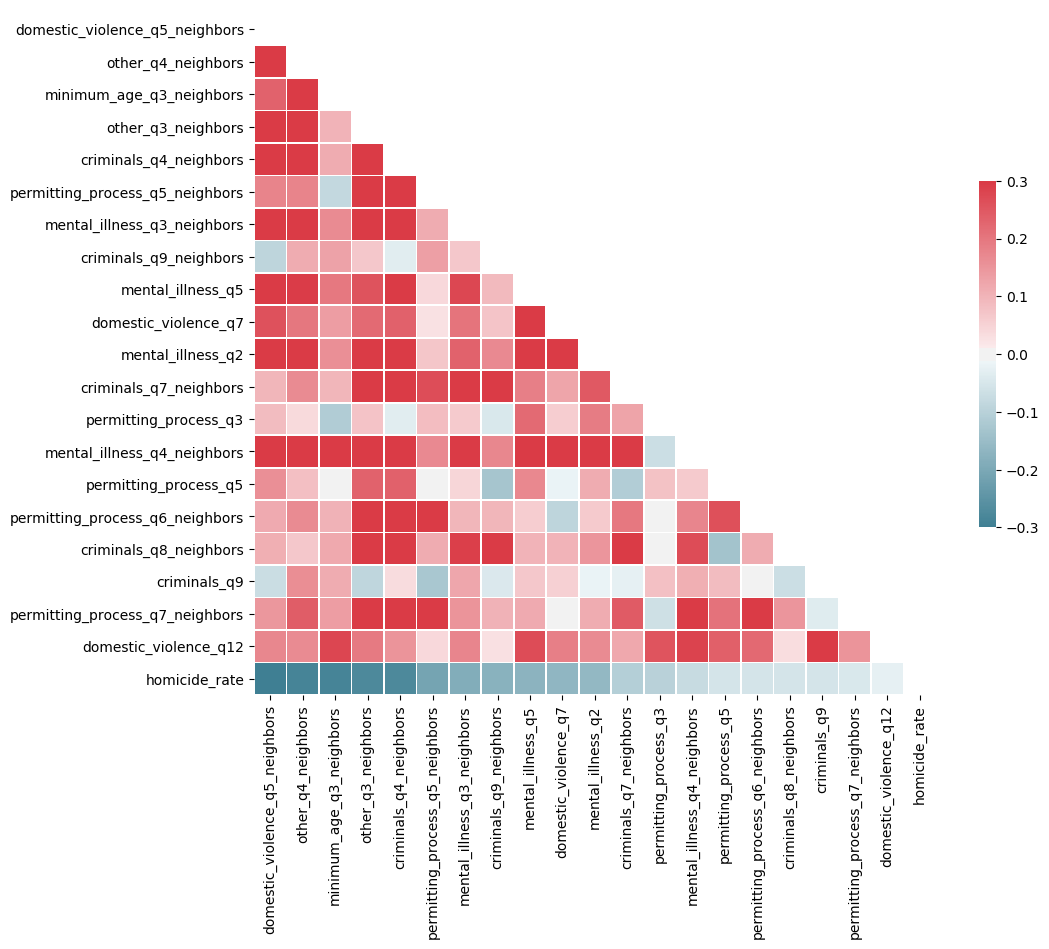

In [119]:
significant_features, top_features, questions = get_top_features(target, features, df_all_scaled, n_feats=20, win=.3)

A majority of the questions found to be statistically significant relate to neighboring states. This is consistent with earlier observations using the grade. Though some collinearity does seem to be present throughout, there are no variables that are glaringly collineated with all of the others. However, only a small subset of the variables seem to have a significant, negative impact on homicide rates. At this point, there is no clear need to drop any particular variable.

### Visualize 2016 Responses
For each relevant question identified, it would be good to know the breakdown of how many states responded one way or another. However, though most questions are phrased as yes/no, the applicability may vary. If a state answered in the affirmative on any level, it will be counted as a yes response.

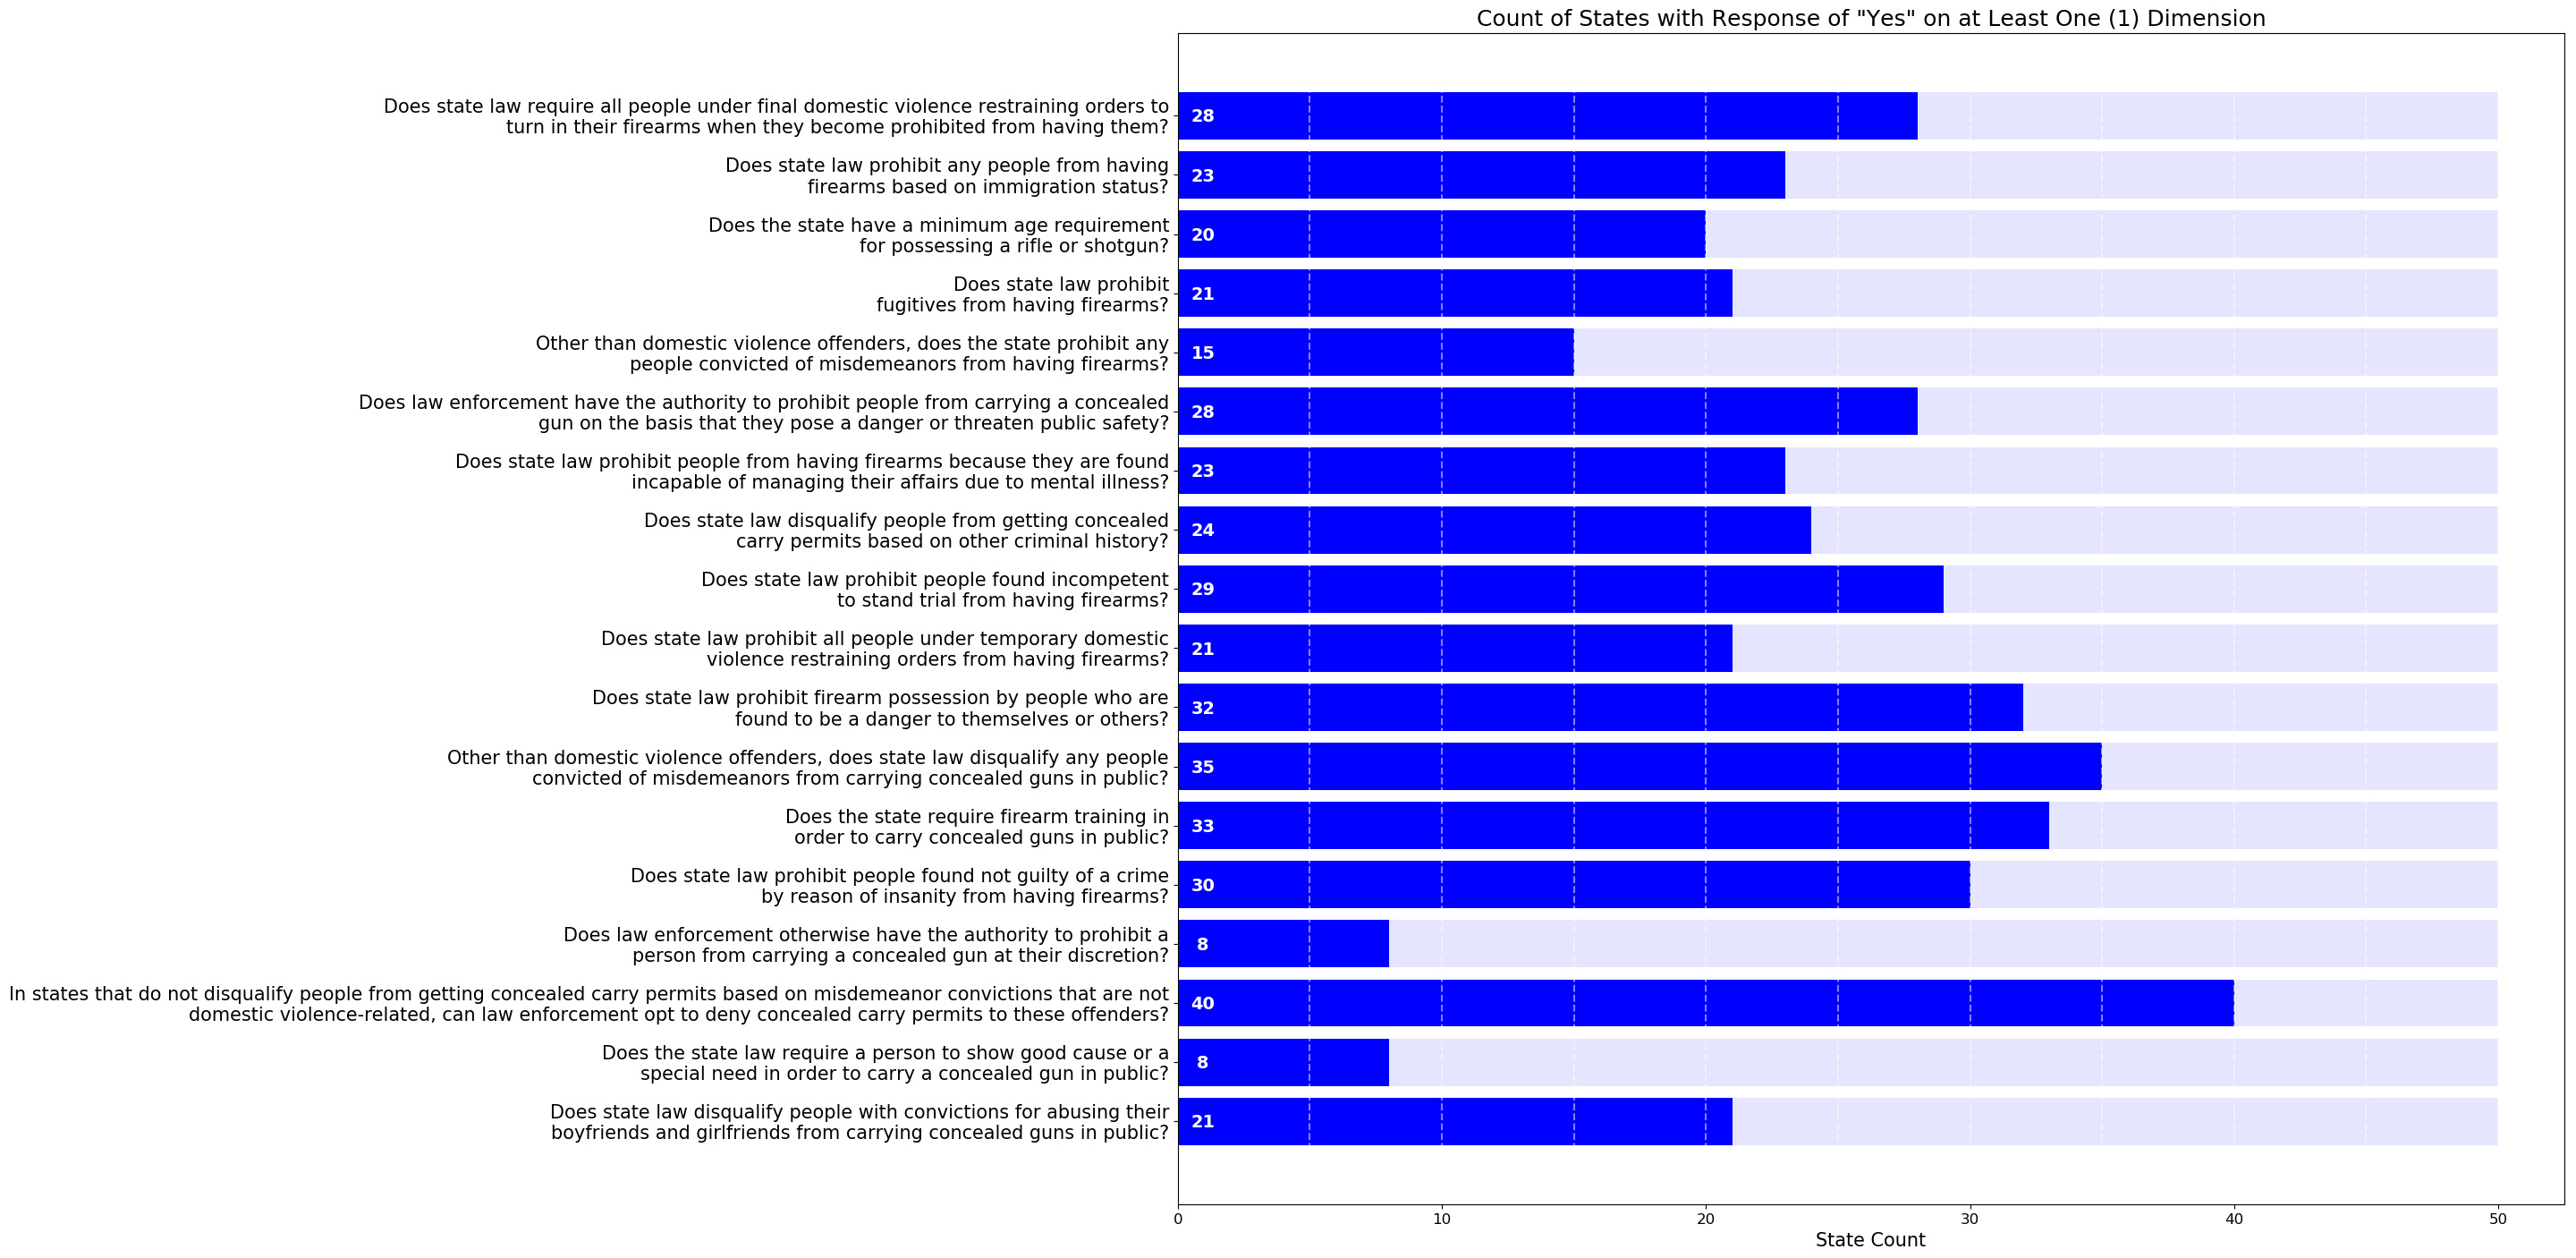

In [120]:
from textwrap import wrap

# Remove duplicate questions when appeared for neighbors and target state
top_q = [feat.replace('_neighbors', '') for feat in top_features]
top_q = list(dict.fromkeys(top_q))

# Get question text
top_q_text = []
for q in top_q:
    q_id = q.split('_')[-1]
    topic = q.split('_q')[0]
    top_q_text.append(question_index[topic][q_id])

# Wrap question text into two lines for display purposes
labels = ['\n'.join(wrap(l, len(l)/1.75)) for l in top_q_text]

# Sum responses and append to scores list
scores = []
for ques in top_q:
    responses = df_all_scaled[df_all_scaled.index.str.contains('2016')][ques]
    score = np.sum([np.ceil(resp) for resp in responses])
    scores.append(int(score))

# Plot results on horizontal bar chart
plt.figure(figsize=(20, 17))
p1 = plt.barh(top_q, 50, label='Yes', color='b', alpha=.1)
p2 = plt.barh(top_q, scores, label='No', color='b')

# Display values on chart
for i, v in enumerate(scores):
    pos = .7 if v<10 else .5
    plt.text(pos, i+.1, str(v), color='white', fontweight='bold', size=14)

# Add vertical dotted lines at every 5 state mark
for i in range(0, 50, 5):
    plt.vlines(i, -.5, len(top_q_text)-.5, color='white', linestyles='--', alpha=.5)
plt.vlines(50, -.5, len(top_q_text)-.5, color='white', alpha = .5)

# Set question text as lables on y-axis
plt.yticks(range(len(top_q_text)), labels, size=15)

# Set x-axis ticks
plt.xticks([i for i in range(0, 51, 10)], 
           [i for i in range(0, 51, 10)], 
           size=12)
plt.xlabel('State Count', size=15)

plt.title(f'Count of States with Response of "Yes" on at Least One (1) Dimension', size=18)

# Invert y-axis to display most significant questions at the top
plt.gca().invert_yaxis()
plt.show()

Though above chart provides some interesting insights (such as the fact that only 21 of 50 states actually prohibit fugitives from having firearms), we will want to create more context around the results. As of right now, questions are orderd by significance results from linear regression, but we haven't yet determined the significance of those results. 

## Testing Predictability of Model
With the significant and top features identified, we want to see how effectively these features can predict homicide rates in given states. Several models will be tested using a grid search, and the change in homicide rates will be measured for the top performing model by calculating the percentage difference between homicide rates when all answers are yes and when all are no.

### Simple Linear Regression
To establish a baseline, a mutliple linear regression will be performed for all features, significant features, and top features. In addition, one model will be run to test the top 20 in-state features only.

In [121]:
# Create dictionary to store all relevant feature combinations
ind_vars = {'All Features': features, 
            'Significant Features': significant_features, 
            'Top Features': top_features}

ind_vars['Target State Features'] = []
for feat in ind_vars['Significant Features']:
    if 'neighbors' not in feat:
        ind_vars['Target State Features'].append(feat)
        
ind_vars['Target State Features'] = ind_vars['Target State Features'][:20]

0.6728029612945674


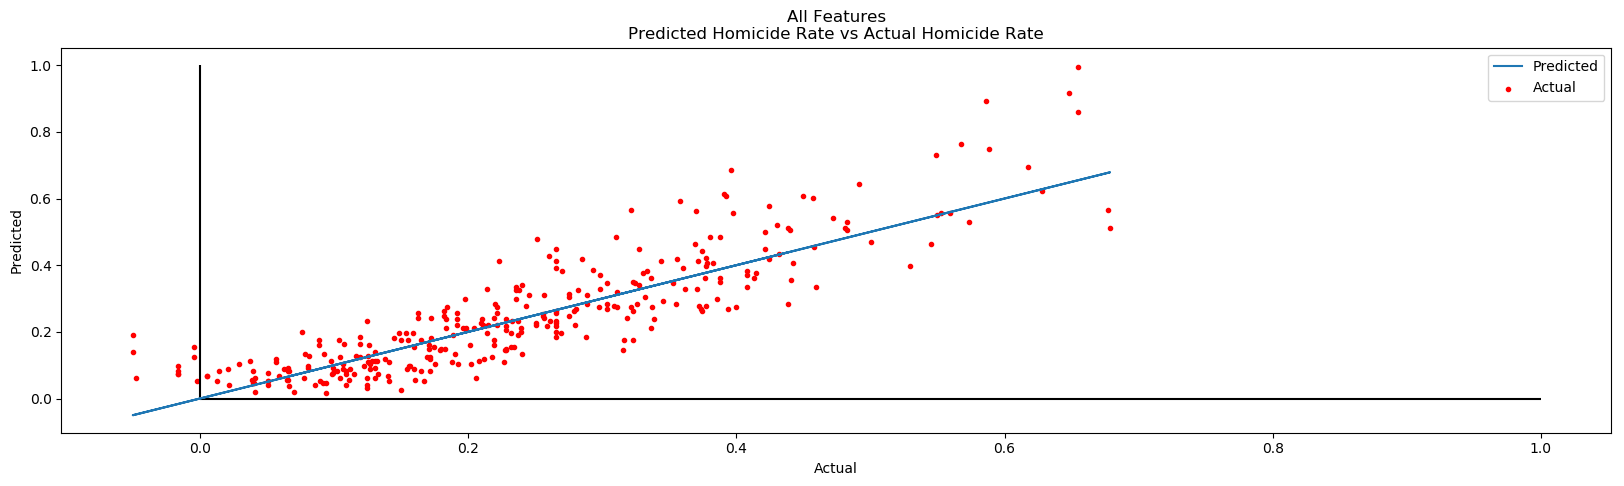

0.6632163908145554


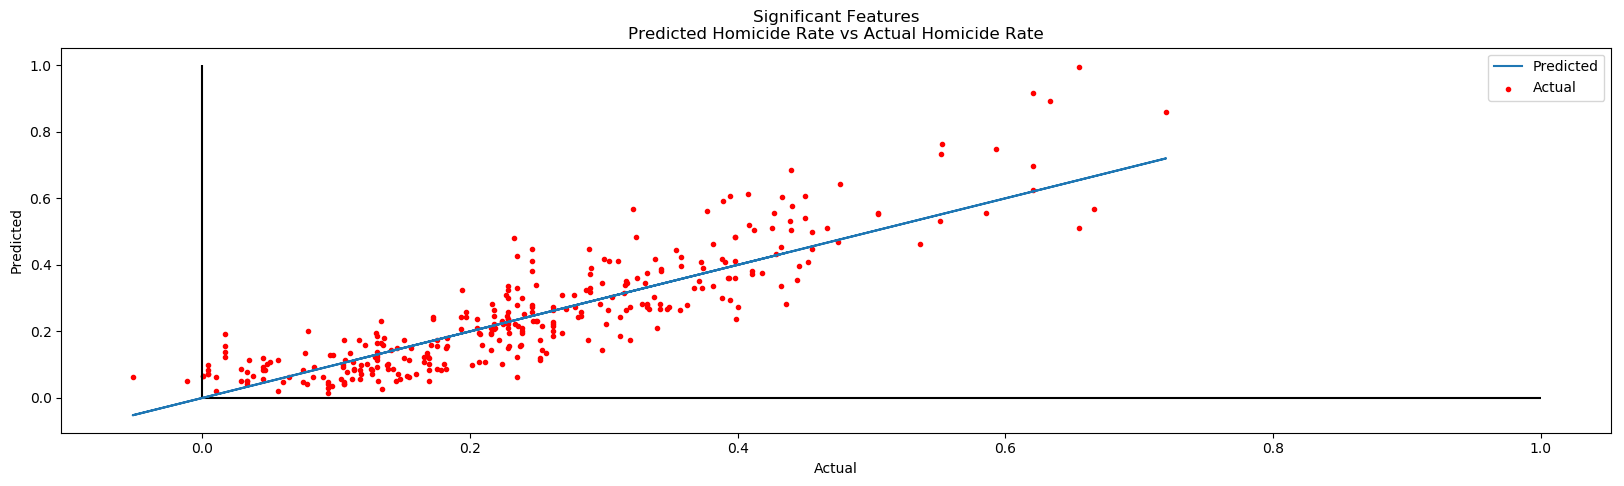

-0.16224382102798063


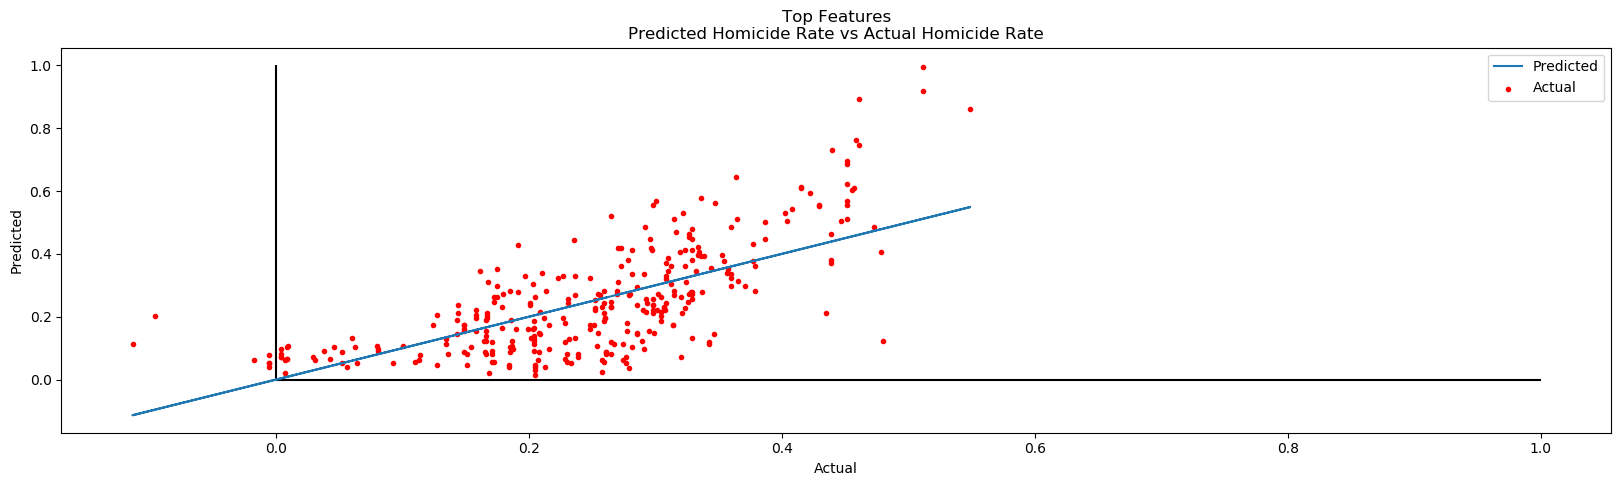

-1.469820272166766


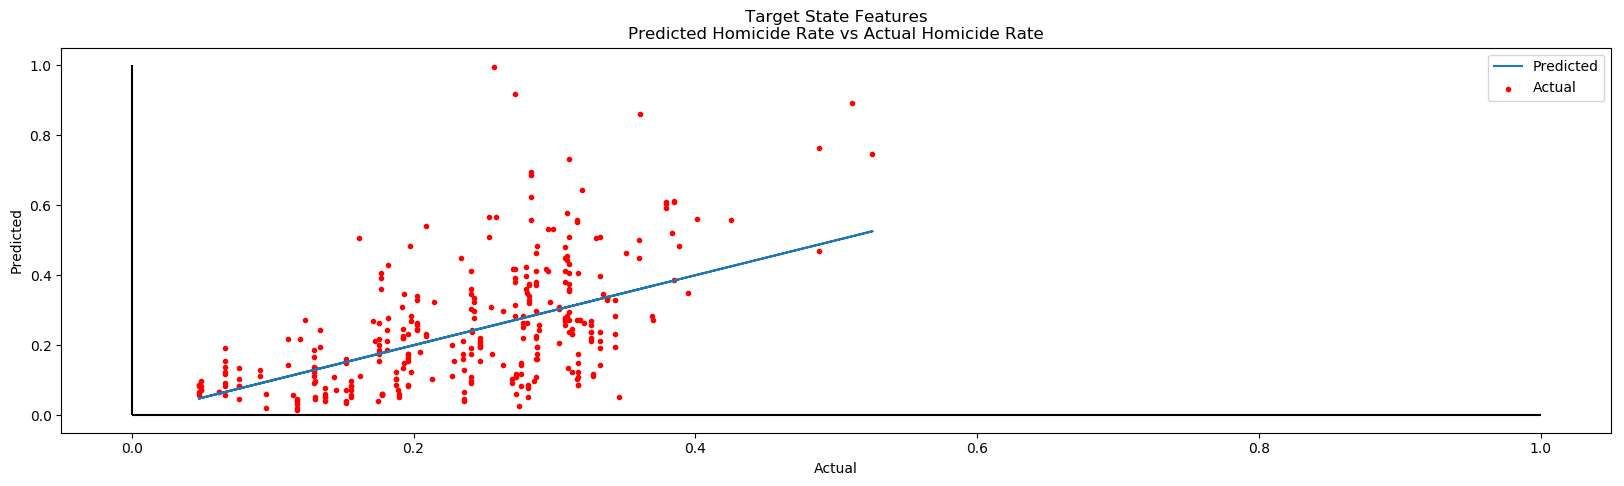

In [122]:
from sklearn.metrics import explained_variance_score

def best_ind_variables(df, features, target, title=None):
    # This function will take in a data with a list of features and target variable name
    # A train/test split will be performed on data so that predictions can be made
    # Predictions will be plotted against actual values, and results will be displayed
    
    # Set X & y variables
    X = df[features]
    y = df[target]
    
    # Set naming convention for display on charts
    Target = target.replace('_', ' ').title()
    
    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.25, 
                                                        random_state=123)

    
    # Create model
    linreg = LinearRegression(fit_intercept=True)
    linreg.fit(X_train, y_train)
    
    # Make predictions
    y_hat_test = linreg.predict(X_test)
    
    # Calculate explained variance
    explained_var = explained_variance_score(y_hat_test, y_test)

    # predictions_df['Predicted'] = np.round(y_hat_test, 1)
    # predictions_df['Actual'] = y_test
    # predictions_df = predictions_df.set_index('State-Year')

    print(explained_var)
    
    # Plot predictions against actual values
    plt.figure(figsize=(20, 5))
    plt.plot(y_hat_test, y_hat_test, label='Predicted')
    plt.scatter(y_hat_test, y_test, color='r', marker='.', label='Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    if title:
        plt.title(f'{title}\nPredicted {Target} vs Actual {Target}')
    else:
        plt.title(f'Predicted {Target} vs Actual {Target}')
    
    plt.hlines(0, 0, 1)
    plt.vlines(0, 0, 1)
    plt.legend()
    plt.show()

for k, v in ind_vars.items():
    best_ind_variables(df_all_scaled, v, 'homicide_rate', k)

Initial results are pretty horrible for the top and in-state features. However, a 66% explained variance score for all significant variables isn't terrible, but it isn't promising either. Moreover, using 45 different predictors does not provide the level of insight desired. It is clear that a linear regression is not appropriate for this data, so we will try a few other approaches.

### Dimensionality Reduction with Primary Component Analysis (PCA)
Earlier versions of the analysis utilized PCA to improve the efficiency of model building, but accuracy scores suffered too greatly. Code has been retained in case anyone wants to attempt analysis with aditional variables, though the code has been commented out.

In [123]:
# from sklearn.decomposition import PCA

# # X = df_all_scaled[most_important_features['Specs']]
# X = df_all_scaled[predictors]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=2)


# pca = PCA(n_components=.99, random_state=123)
# feat_pca = pca.fit_transform(X_train)
# n_feat = feat_pca.shape[1]

# print(f'\nNumber of Features: {n_feat}')
# print(f'Cumulative Sum Variance:\n{np.cumsum(pca.explained_variance_ratio_)}')

### Create Function to Plot Results

In [124]:
def plot_predictions(y_test, y_hat_test, k, Target):
    plt.figure(figsize=(20, 5))
    plt.plot(y_hat_test, y_hat_test, label='Predicted')
    plt.scatter(y_hat_test, y_test, color='r', marker='.', label='Actual')
    plt.title(f'{k}\nPredicted {Target} vs Actual {Target}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    plt.show()

## Machine Learning Regressors
Multiple models will be applied with a grid search in an attempt to find the top performer. Though we will continue to look at the impact from all sets of predictors, the primary interest will be on the "Top 20 Features" unless another mix of predictors provide compelling results.

In addition to tracking accuracy, predicted results for all affirmative responses and all negative responses will be compared. This will tell us how much of a reduction in homicide rates can be expected when a state moves from one extreme to the other, and the results should be considered in the context of the earlier benchmark established, wherein it was observed that gun homicides represent ~67.3% of all homicides.

### Decision Tree Regressor

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 1250 out of 1250 | elapsed:    4.0s finished




Best Decision Tree Pipeline Training Score:	 73.44%
Best Decision Tree Pipeline Test Score:	 76.51%

Best Parameters:
  criterion: mse
  max_depth: 9
  min_samples_leaf: 7
  min_samples_split: 0.05

Potential Decrease in Homicide Rate: -149.59%


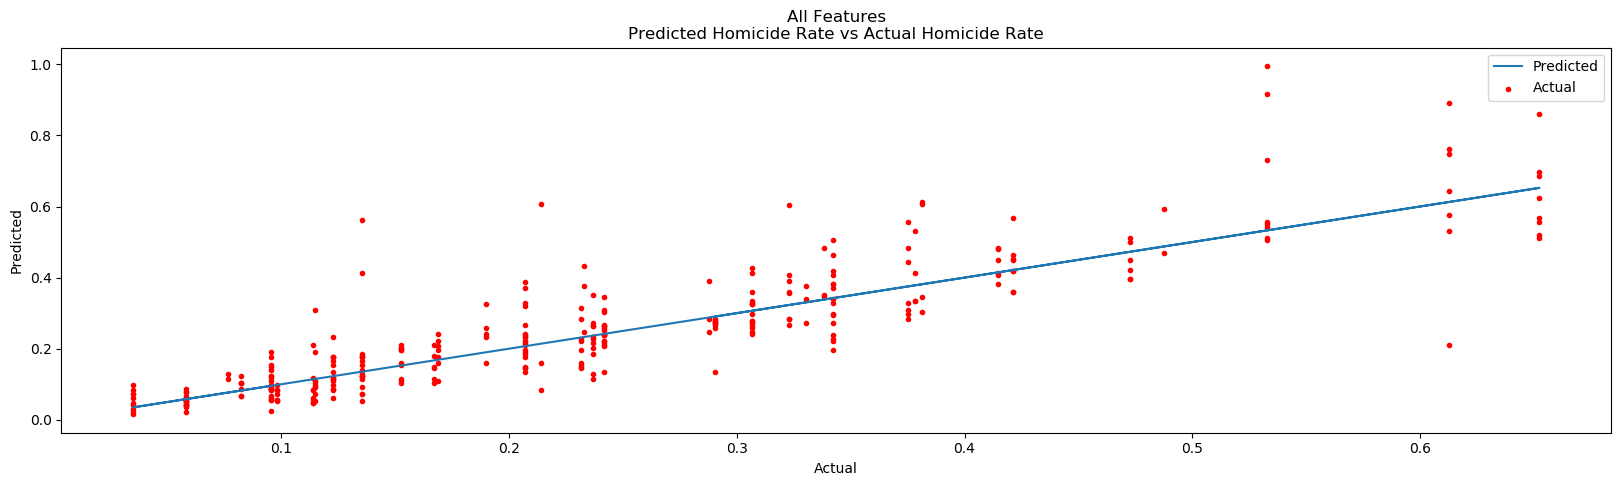

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 520 tasks      | elapsed:    0.7s




Best Decision Tree Pipeline Training Score:	 72.19%
Best Decision Tree Pipeline Test Score:	 73.15%

Best Parameters:
  criterion: mse
  max_depth: 9
  min_samples_leaf: 1
  min_samples_split: 0.05

Potential Decrease in Homicide Rate: -145.62%


[Parallel(n_jobs=8)]: Done 1250 out of 1250 | elapsed:    1.2s finished


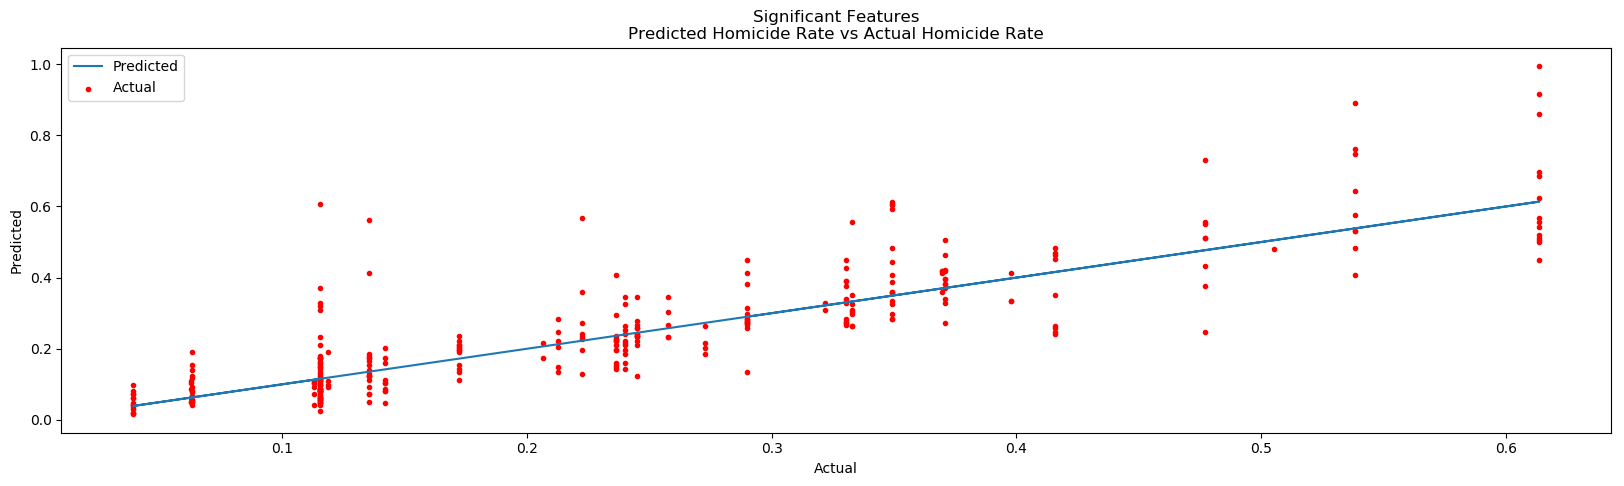

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=8)]: Done 520 tasks      | elapsed:    0.6s




Best Decision Tree Pipeline Training Score:	 65.79%
Best Decision Tree Pipeline Test Score:	 70.98%

Best Parameters:
  criterion: mse
  max_depth: 9
  min_samples_leaf: 5
  min_samples_split: 0.05

Potential Decrease in Homicide Rate: 2.82%


[Parallel(n_jobs=8)]: Done 1250 out of 1250 | elapsed:    1.1s finished


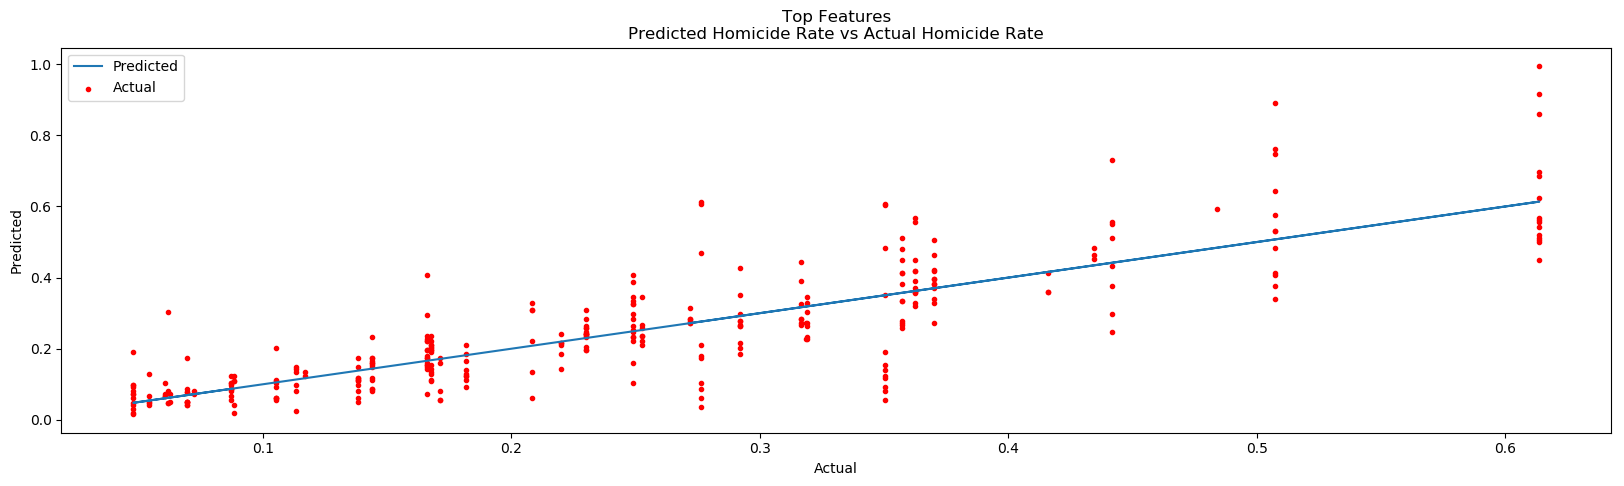

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=8)]: Done 520 tasks      | elapsed:    0.6s




Best Decision Tree Pipeline Training Score:	 58.46%
Best Decision Tree Pipeline Test Score:	 52.80%

Best Parameters:
  criterion: mse
  max_depth: 9
  min_samples_leaf: 5
  min_samples_split: 0.05

Potential Decrease in Homicide Rate: -87.80%


[Parallel(n_jobs=8)]: Done 1250 out of 1250 | elapsed:    1.0s finished


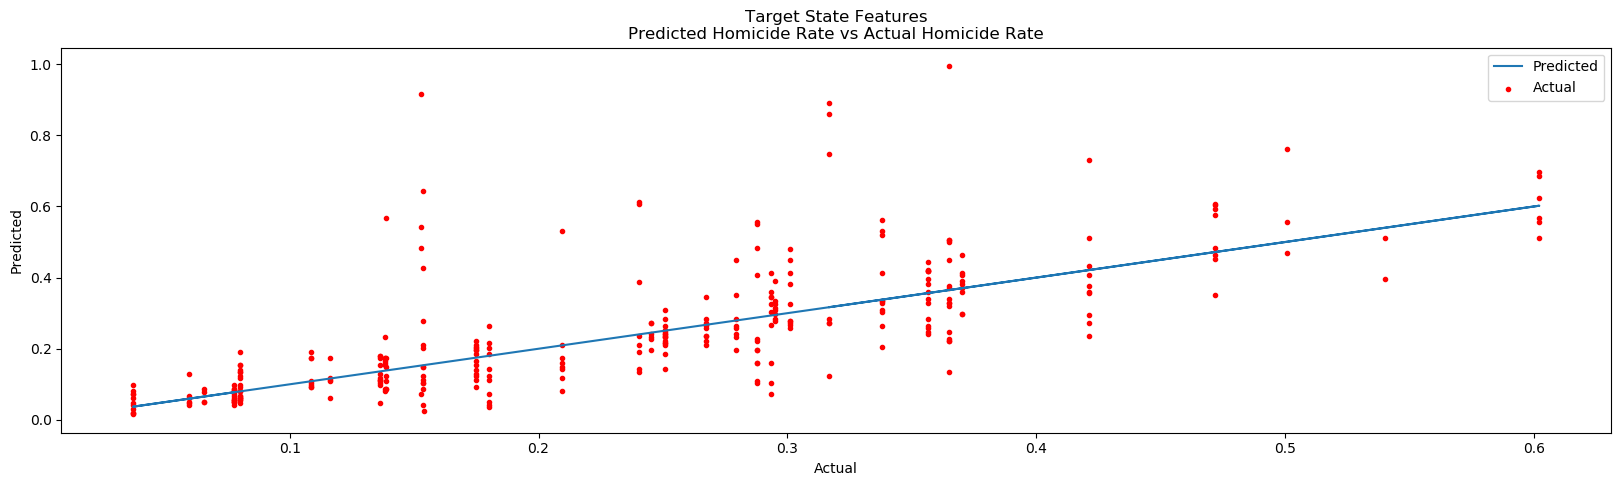

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

target = 'homicide_rate'
Target = target.replace('_', ' ').title()
    
for k, v in ind_vars.items():
    # Define X & y variables
    X = df_all_scaled[v]
    y = df_all_scaled[target]
    
    # Train / Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    
    # Set accuracy measure
    acc_meas = 'explained_variance'
    
    # Create pipeline (PCA found to hinder results too much)
    tree_pipe = Pipeline([#('pca', PCA(n_components=n_feat, random_state=123)), 
                         ('treereg', DecisionTreeRegressor(random_state=123))])
    
    # Create search grid
    tree_grid = [{'treereg__criterion': ['mse'],
                  'treereg__max_depth': list(range(1, 11, 2)), 
                  'treereg__min_samples_split': [i/100 for i in range(5, 96, 10)], 
                  'treereg__min_samples_leaf': list(range(1, 11, 2))}]
    
    # Use gridsearch across 5 crossfolds of data for each test set
    tree_gridsearch = GridSearchCV(estimator = tree_pipe, 
                                   param_grid = tree_grid, 
                                   scoring = acc_meas, 
                                   cv = 5, verbose = 1,
                                   n_jobs=8,
                                   return_train_score = True)
    
    # Fit model to train set
    tree_gridsearch.fit(X_train, y_train)
    
    # Make predictions for test set
    y_hat_test = tree_gridsearch.predict(X_test)
    
    # Measure difference between all "no" and all "yes" responses
    min_max_df = pd.DataFrame([[0 for i in range(len(X_test.columns))], 
                               [1 for i in range(len(X_test.columns))]], columns=X_test.columns)
    min_max_preds = tree_gridsearch.predict(min_max_df)
    min_max_pct_diff = (min_max_preds[0] - min_max_preds[1]) / min_max_preds[0]
    
    # Display results
    print(f'\n\nBest Decision Tree Pipeline Training Score:\t{100 * tree_gridsearch.best_score_: .2f}%')
    print(f'Best Decision Tree Pipeline Test Score:\t{100 * explained_variance_score(y_test, y_hat_test): .2f}%\n\nBest Parameters:')
    for param in tree_gridsearch.best_params_.keys():
        print(f'  {param.split("__")[1]}: {tree_gridsearch.best_params_[param]}')

    print(f'\nPotential Decrease in {Target}: {min_max_pct_diff*100:.2f}%')
    
    # Plot predicted values against actual values
    plot_predictions(y_test, y_hat_test, k, Target)

**Explained Variance:** 70.98%<br>
**Potential Reduction in Homicide Rates:** 2.82%

### Support Vector Regressor

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done 266 tasks      | elapsed:    8.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    8.3s finished




Best SVR Pipeline Training Score:	 77.21%
Best SVR Pipeline Test Score:	 83.36%

Best Parameters:
  C: 10
  degree: 1
  gamma: 0.01
  kernel: rbf

Potential Decrease in Homicide Rate: 33.77%


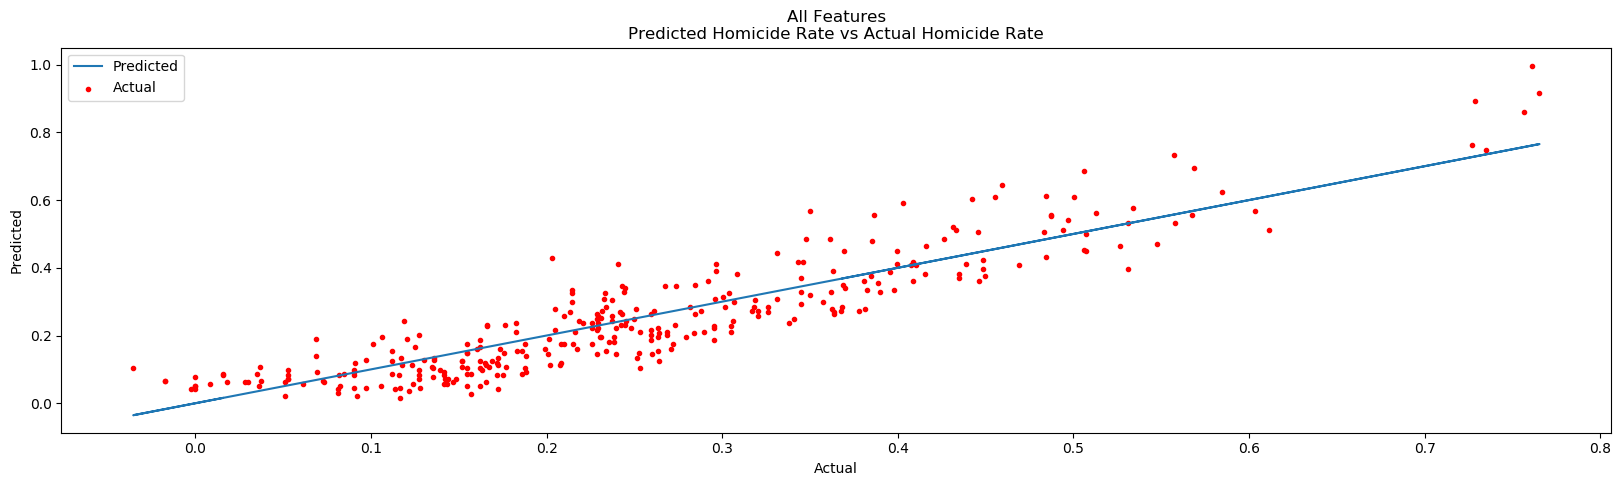

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    3.8s finished




Best SVR Pipeline Training Score:	 79.03%
Best SVR Pipeline Test Score:	 85.28%

Best Parameters:
  C: 10
  degree: 1
  gamma: auto
  kernel: rbf

Potential Decrease in Homicide Rate: 44.88%


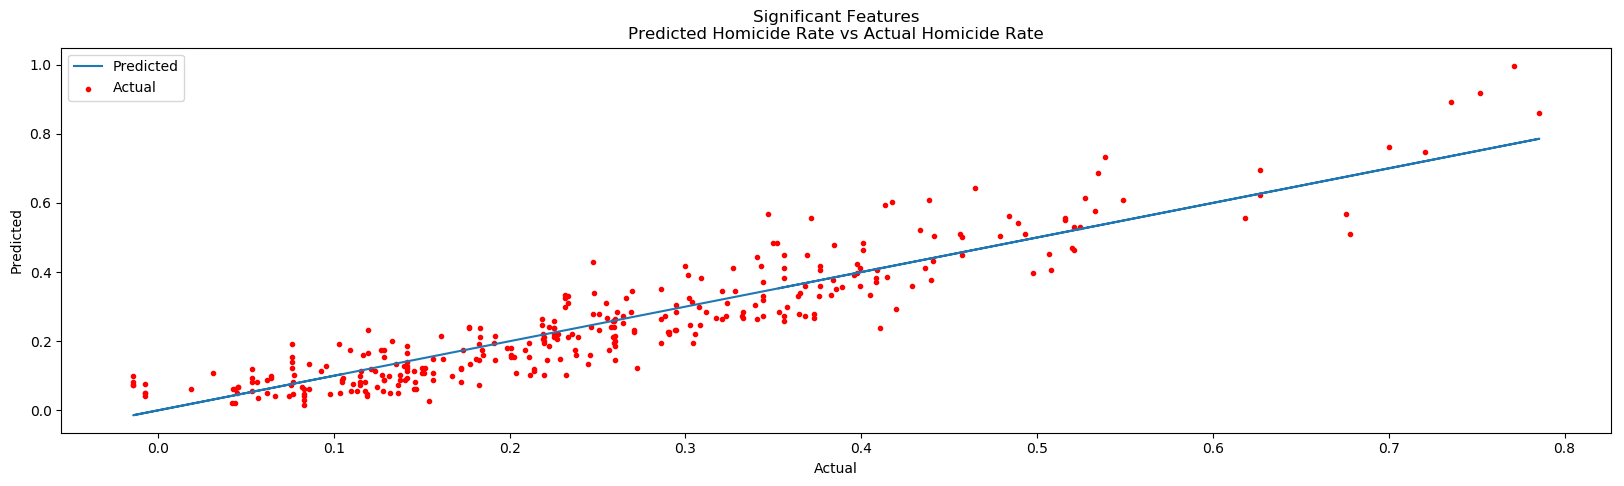

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    2.4s finished




Best SVR Pipeline Training Score:	 68.82%
Best SVR Pipeline Test Score:	 75.70%

Best Parameters:
  C: 10
  degree: 1
  gamma: auto
  kernel: rbf

Potential Decrease in Homicide Rate: 70.79%


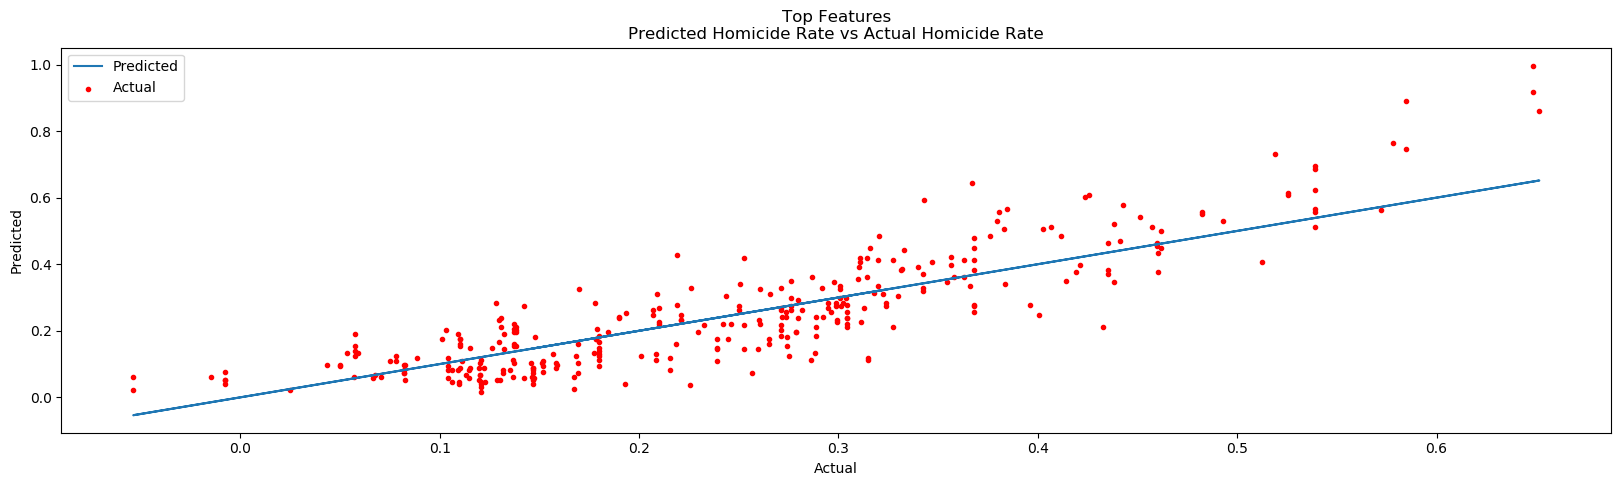

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    3.6s finished




Best SVR Pipeline Training Score:	 69.71%
Best SVR Pipeline Test Score:	 75.88%

Best Parameters:
  C: 10
  degree: 1
  gamma: auto
  kernel: rbf

Potential Decrease in Homicide Rate: -32.07%


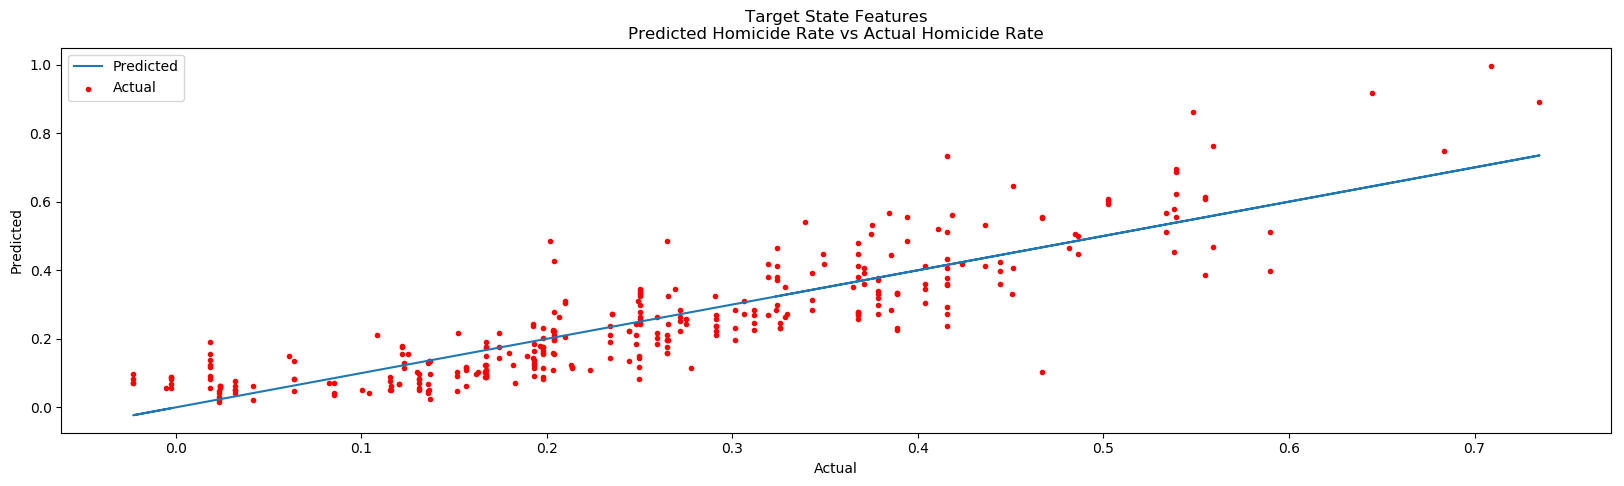

In [126]:
from sklearn.svm import SVR

for k, v in ind_vars.items():
    # Define X & y variables
    X = df_all_scaled[v]
    y = df_all_scaled[target]
    
    # Train / Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    
    # Set accuracy measure
    acc_meas = 'explained_variance'
    
    # Create pipeline (PCA found to hinder results too much)
    svr_pipe = Pipeline([#('pca', PCA(n_components=n_feat, random_state=123)), 
                         ('svr', SVR())])
    
    # Create search grid
    svr_grid = [{'svr__kernel': ['linear'],
                 'svr__C': [.1, 1, 10], 
                 'svr__degree': list(range(1, 11, 2))}, 
                
                {'svr__kernel': ['rbf'],
                 'svr__C': [.1, 1, 10],
                 'svr__degree': list(range(1, 11, 2)),
                 'svr__gamma': [0.001, .01, 'auto']}
               ]
    
    # Use gridsearch across 5 crossfolds of data for each test set
    svr_gridsearch = GridSearchCV(estimator = svr_pipe, 
                                  param_grid = svr_grid, 
                                  scoring = acc_meas, 
                                  cv = 5, verbose = 1,
                                  n_jobs=8,
                                  return_train_score = True)
    
    # Fit model to train set
    svr_gridsearch.fit(X_train, y_train)
    
    # Make predictions for test set
    y_hat_test = svr_gridsearch.predict(X_test)
    
    # Measure difference between all "no" and all "yes" responses
    min_max_df = pd.DataFrame([[0 for i in range(len(X_test.columns))], 
                               [1 for i in range(len(X_test.columns))]], columns=X_test.columns)
    min_max_preds = svr_gridsearch.predict(min_max_df)
    min_max_pct_diff = (min_max_preds[0] - min_max_preds[1]) / min_max_preds[0]
    
    # Display results
    print(f'\n\nBest SVR Pipeline Training Score:\t{100 * svr_gridsearch.best_score_: .2f}%')
    print(f'Best SVR Pipeline Test Score:\t{100 * explained_variance_score(y_test, y_hat_test): .2f}%\n\nBest Parameters:')
    for param in svr_gridsearch.best_params_.keys():
        print(f'  {param.split("__")[1]}: {svr_gridsearch.best_params_[param]}')

    print(f'\nPotential Decrease in {Target}: {min_max_pct_diff*100:.2f}%')
    
    # Plot predicted values against actual values
    plot_predictions(y_test, y_hat_test, k, Target)

**Explained Variance:** 75.70%<br>
**Potential Reduction in Homicide Rates:** 70.79%

This model significantly outperforms the decision tree, but still does not reach the desired level. It also suggests that strong gun laws can reduce homicide rates by other means as well. Though it is possible this is the case, we would want to see a much higher confidence level before making any such assertion.

### Random Forest Regressor

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 160 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 1250 out of 1250 | elapsed:    5.3s finished




Best Random Forest Pipeline Training Score:	 73.70%
Best Random Forest Pipeline Test Score:	 73.41%

Best Parameters:
  criterion: mse
  max_depth: 9
  min_samples_leaf: 1
  min_samples_split: 0.05

Potential Decrease in Homicide Rate: -46.36%


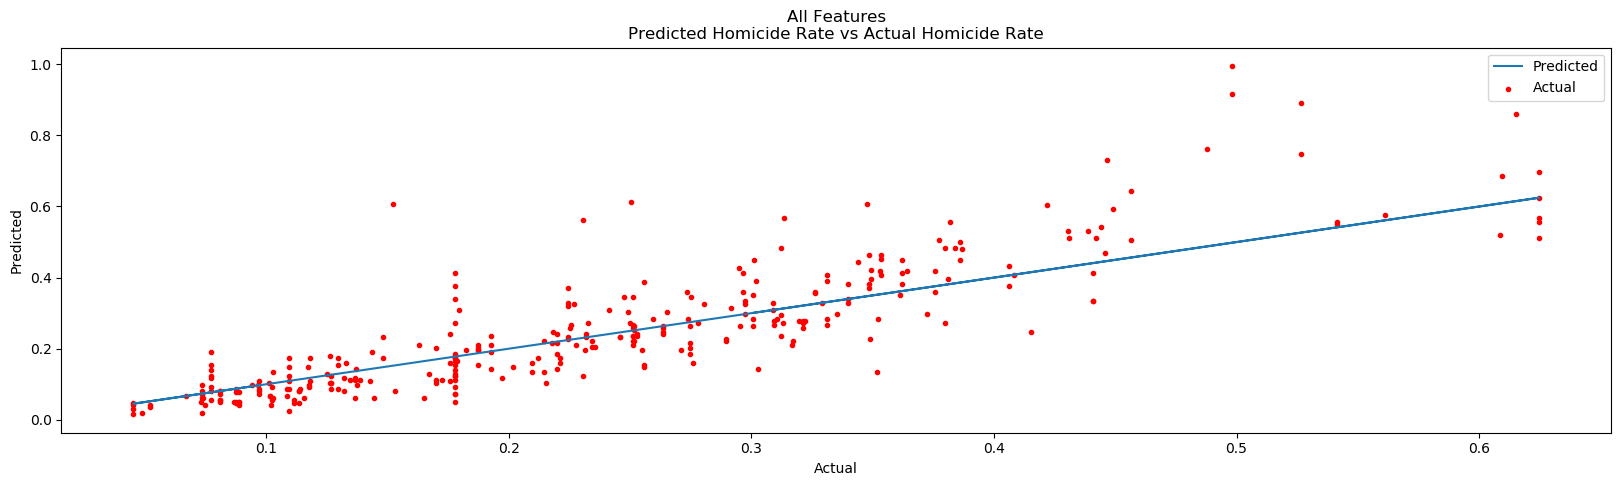

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 304 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 1250 out of 1250 | elapsed:    4.8s finished




Best Random Forest Pipeline Training Score:	 71.69%
Best Random Forest Pipeline Test Score:	 73.33%

Best Parameters:
  criterion: mse
  max_depth: 9
  min_samples_leaf: 1
  min_samples_split: 0.05

Potential Decrease in Homicide Rate: -4.58%


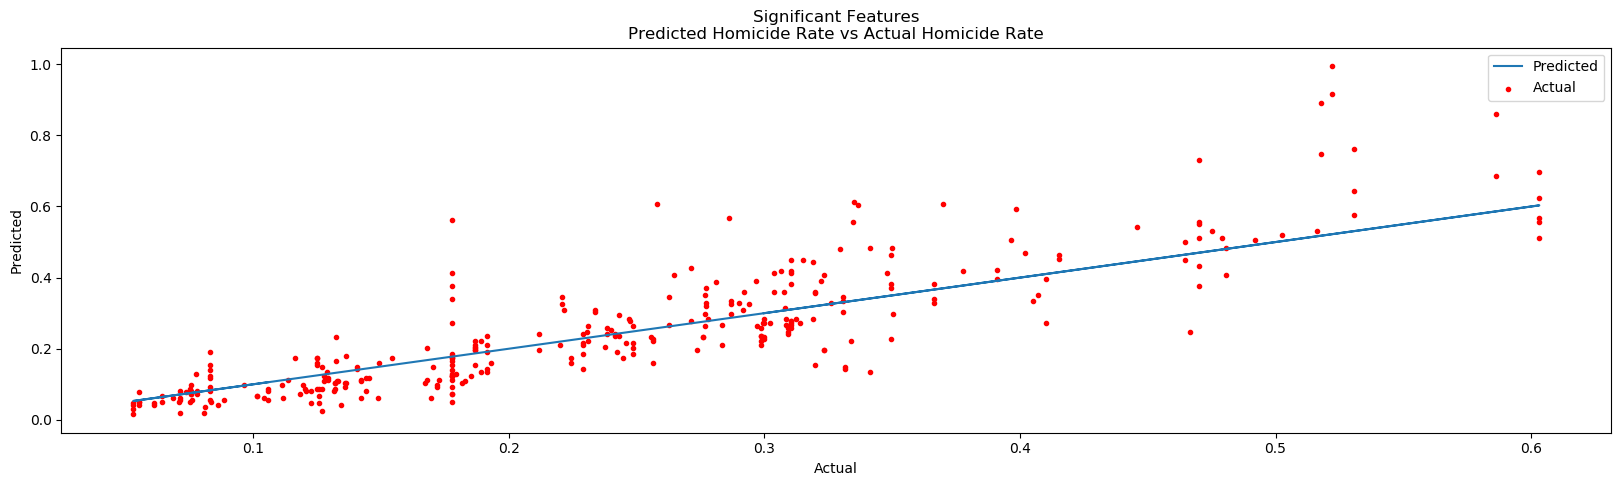

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  64 tasks      | elapsed:    0.5s




Best Random Forest Pipeline Training Score:	 71.33%
Best Random Forest Pipeline Test Score:	 72.93%

Best Parameters:
  criterion: mse
  max_depth: 9
  min_samples_leaf: 1
  min_samples_split: 0.05

Potential Decrease in Homicide Rate: 49.86%


[Parallel(n_jobs=8)]: Done 1250 out of 1250 | elapsed:    5.2s finished


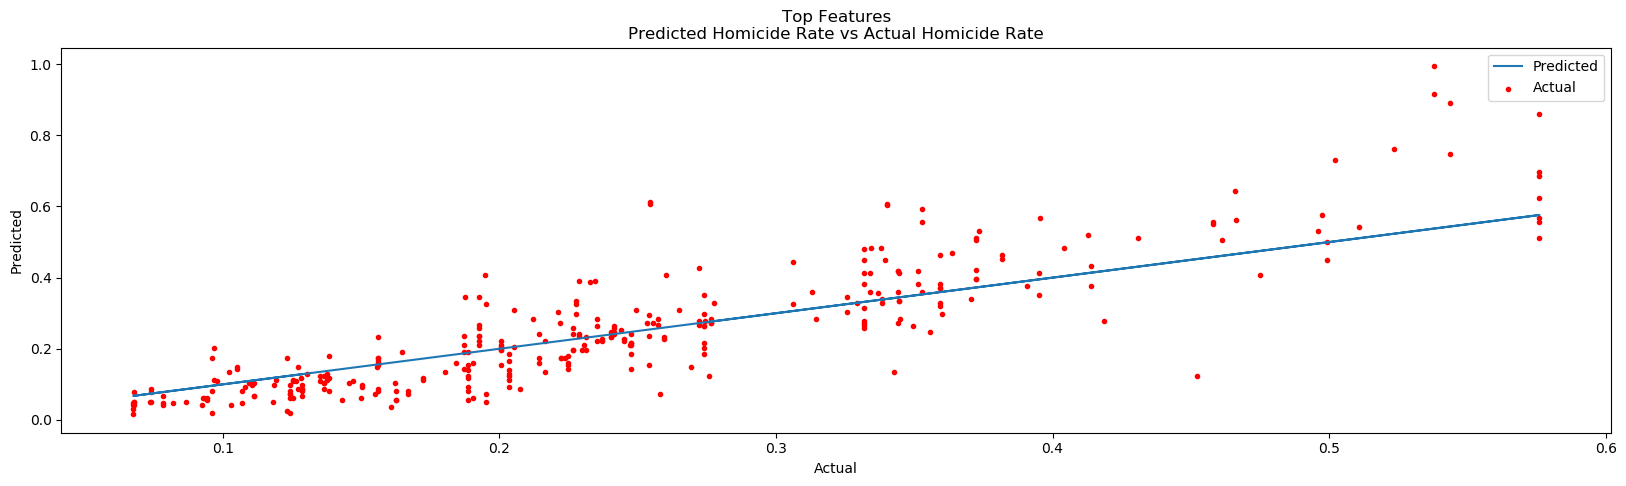

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=8)]: Done 412 tasks      | elapsed:    2.6s




Best Random Forest Pipeline Training Score:	 59.65%
Best Random Forest Pipeline Test Score:	 54.09%

Best Parameters:
  criterion: mse
  max_depth: 9
  min_samples_leaf: 1
  min_samples_split: 0.05

Potential Decrease in Homicide Rate: -153.31%


[Parallel(n_jobs=8)]: Done 1250 out of 1250 | elapsed:    6.3s finished


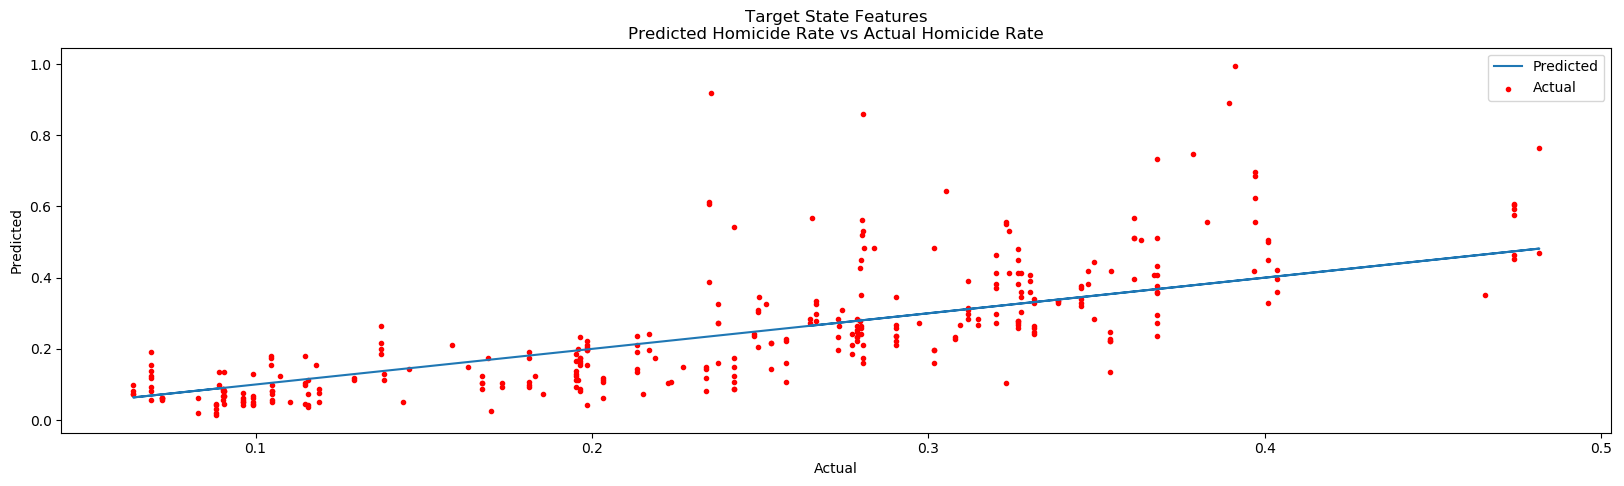

In [127]:
from sklearn.ensemble import RandomForestRegressor

for k, v in ind_vars.items():
    # Define X & y variables
    X = df_all_scaled[v]
    y = df_all_scaled[target]
    
    # Train / Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    
    # Set accuracy measure
    acc_meas = 'explained_variance'
    
    # Create pipeline (PCA found to hinder results too much)
    rf_pipe = Pipeline([#('pca', PCA(n_components=n_feat, random_state=123)), 
                        ('rf', RandomForestRegressor(random_state=123))])
    
    # Create search grid
    rf_grid = [{'rf__criterion': ['mse'],
                'rf__max_depth': list(range(1, 11, 2)), 
                'rf__min_samples_split': [i/100 for i in range(5, 96, 10)], 
                'rf__min_samples_leaf': list(range(1, 11, 2))}]
    
    # Use gridsearch across 5 crossfolds of data for each test set
    rf_gridsearch = GridSearchCV(estimator = rf_pipe, 
                                 param_grid = rf_grid, 
                                 scoring = acc_meas, 
                                 cv = 5, verbose = 1,
                                 n_jobs=8,
                                 return_train_score = True)
    
    # Fit model to train set
    rf_gridsearch.fit(X_train, y_train)
    
    # Make predictions for test set
    y_hat_test = rf_gridsearch.predict(X_test)
    
    # Measure difference between all "no" and all "yes" responses
    min_max_df = pd.DataFrame([[0 for i in range(len(X_test.columns))], 
                               [1 for i in range(len(X_test.columns))]], columns=X_test.columns)
    min_max_preds = rf_gridsearch.predict(min_max_df)
    min_max_pct_diff = (min_max_preds[0] - min_max_preds[1]) / min_max_preds[0]
    
    # Display results
    print(f'\n\nBest Random Forest Pipeline Training Score:\t{100 * rf_gridsearch.best_score_: .2f}%')
    print(f'Best Random Forest Pipeline Test Score:\t{100 * explained_variance_score(y_test, y_hat_test): .2f}%\n\nBest Parameters:')
    for param in rf_gridsearch.best_params_.keys():
        print(f'  {param.split("__")[1]}: {rf_gridsearch.best_params_[param]}')

    print(f'\nPotential Decrease in {Target}: {min_max_pct_diff*100:.2f}%')
    
    # Plot predicted values against actual values
    plot_predictions(y_test, y_hat_test, k, Target)

**Explained Variance:** 72.93%<br>
**Potential Reduction in Homicide Rates:** 49.86%

### AdaBoost Regressor

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.8s finished




Best Adaboost Pipeline Training Score:	 74.07%
Best Adaboost Pipeline Test Score:	 78.91%

Best Parameters:
  learning_rate: 0.96

Potential Decrease in Homicide Rate: -61.72%


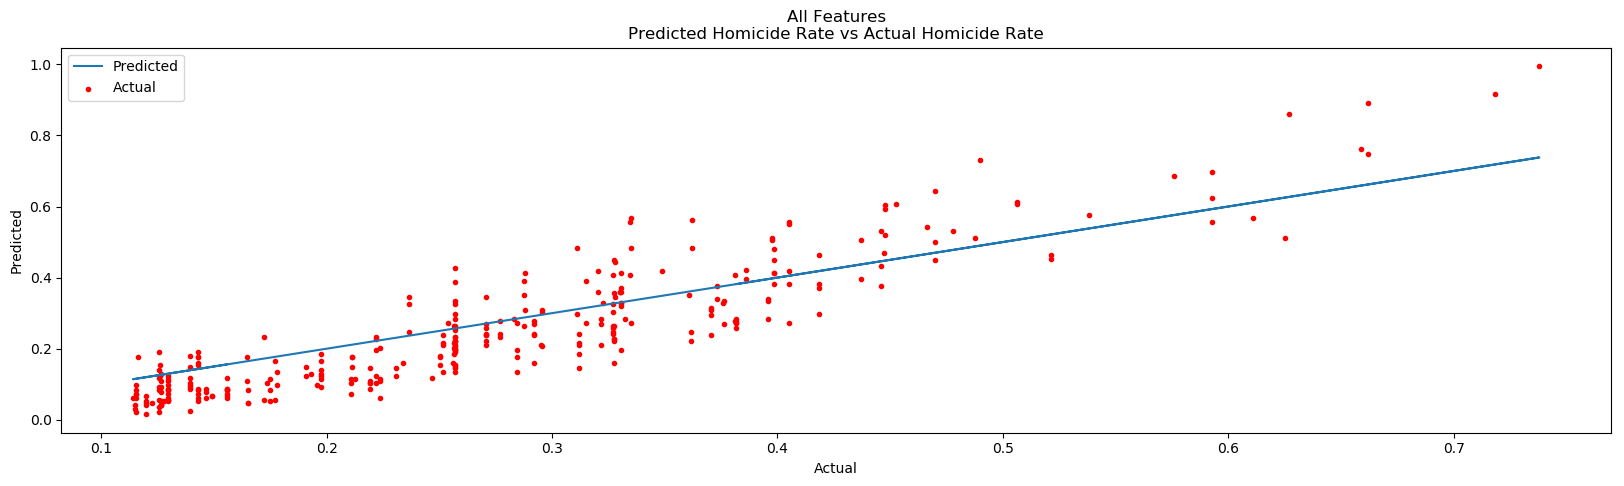

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.3s finished




Best Adaboost Pipeline Training Score:	 71.17%
Best Adaboost Pipeline Test Score:	 76.07%

Best Parameters:
  learning_rate: 0.76

Potential Decrease in Homicide Rate: -41.70%


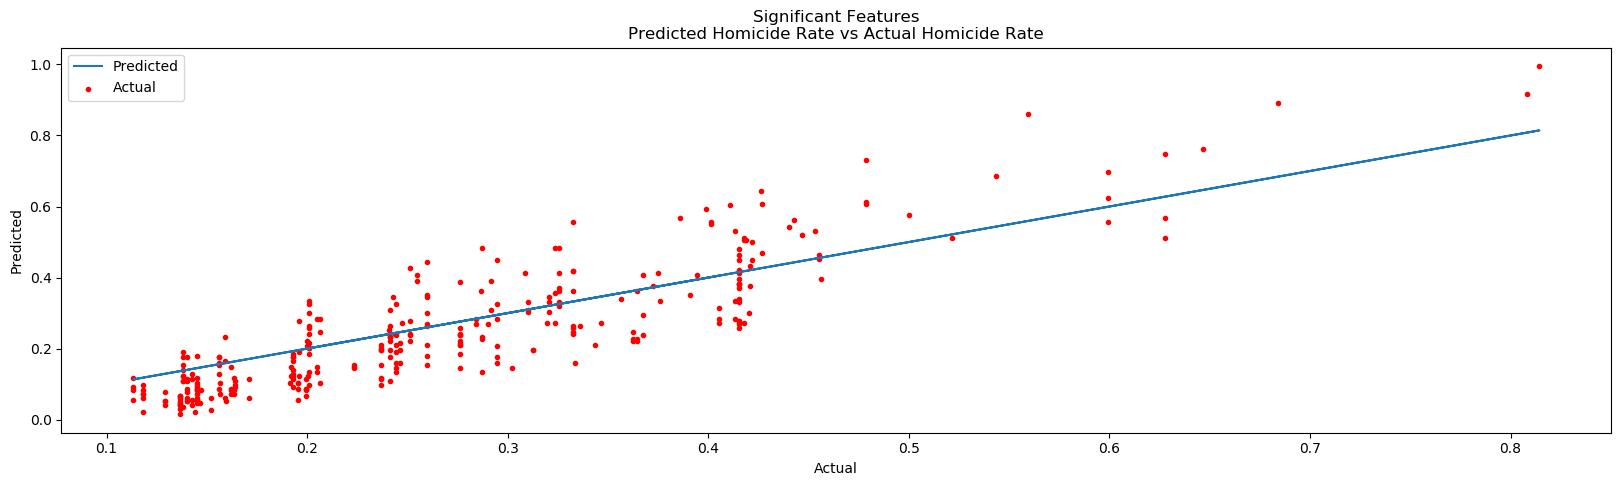

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.6s finished




Best Adaboost Pipeline Training Score:	 62.33%
Best Adaboost Pipeline Test Score:	 68.25%

Best Parameters:
  learning_rate: 0.86

Potential Decrease in Homicide Rate: 61.24%


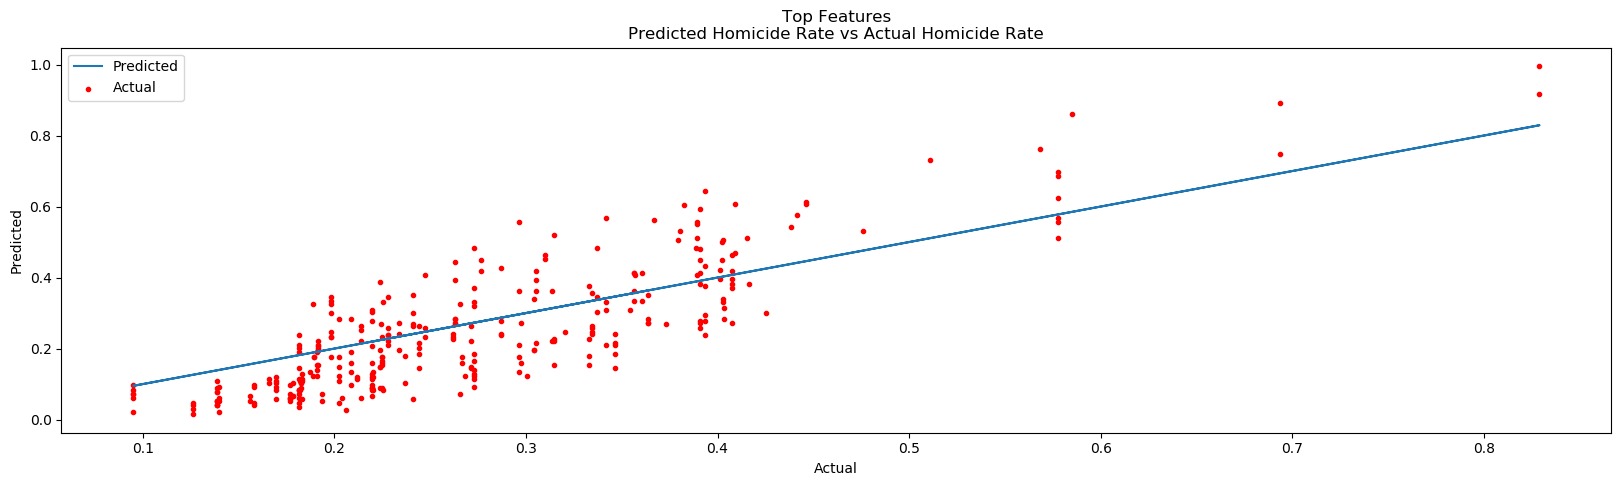

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished




Best Adaboost Pipeline Training Score:	 39.58%
Best Adaboost Pipeline Test Score:	 46.89%

Best Parameters:
  learning_rate: 0.36

Potential Decrease in Homicide Rate: -60.86%


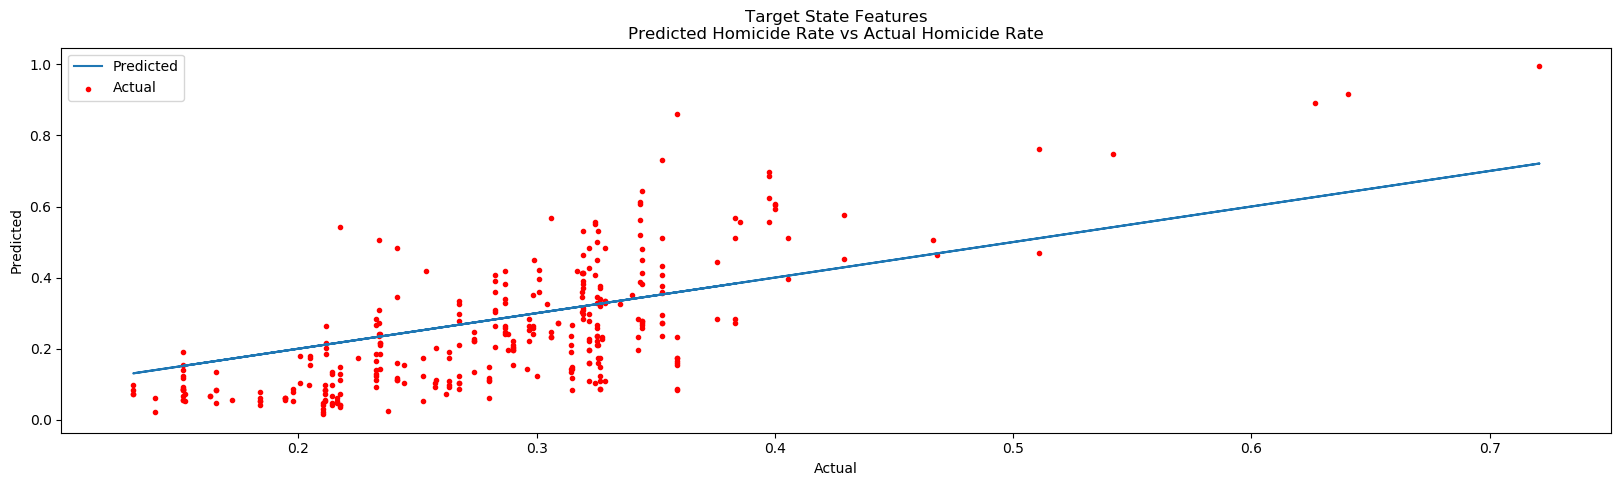

In [128]:
from sklearn.ensemble import AdaBoostRegressor

for k, v in ind_vars.items():
    # Define X & y variables
    X = df_all_scaled[v]
    y = df_all_scaled[target]
    
    # Train / Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    
    # Set accuracy measure
    acc_meas = 'explained_variance'
    
    # Create pipeline (PCA found to hinder results too much)
    ada_pipe = Pipeline([#('pca', PCA(n_components=n_feat, random_state=123)), 
                         ('ada', AdaBoostRegressor(random_state=123))])
    
    # Create search grid
    ada_grid = [{'ada__learning_rate': [i/100 for i in range(1, 101, 5)]}]
    
    # Use gridsearch across 5 crossfolds of data for each test set
    ada_gridsearch = GridSearchCV(estimator = ada_pipe, 
                                  param_grid = ada_grid, 
                                  scoring = acc_meas, 
                                  cv = 5, verbose = 1,
                                  n_jobs=8,
                                  return_train_score = True)
    
    # Fit model to train set
    ada_gridsearch.fit(X_train, y_train)
    
    # Make predictions for test set
    y_hat_test = ada_gridsearch.predict(X_test)
    
    # Measure difference between all "no" and all "yes" responses
    min_max_df = pd.DataFrame([[0 for i in range(len(X_test.columns))], 
                               [1 for i in range(len(X_test.columns))]], columns=X_test.columns)
    min_max_preds = ada_gridsearch.predict(min_max_df)
    min_max_pct_diff = (min_max_preds[0] - min_max_preds[1]) / min_max_preds[0]
    
    # Display results
    print(f'\n\nBest Adaboost Pipeline Training Score:\t{100 * ada_gridsearch.best_score_: .2f}%')
    print(f'Best Adaboost Pipeline Test Score:\t{100 * explained_variance_score(y_test, y_hat_test): .2f}%\n\nBest Parameters:')
    for param in ada_gridsearch.best_params_.keys():
        print(f'  {param.split("__")[1]}: {ada_gridsearch.best_params_[param]}')

    print(f'\nPotential Decrease in {Target}: {min_max_pct_diff*100:.2f}%')
    
    # Plot predicted values against actual values
    plot_predictions(y_test, y_hat_test, k, Target)

**Explained Variance:** 68.25%<br>
**Potential Reduction in Homicide Rates:** 61.24%

### XGB Regressor

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 135 out of 135 | elapsed:   15.7s finished




Best XGBoost Pipeline Training Score:	 88.35%
Best XGBoost Pipeline Test Score:	 92.33%

Best Parameters:
  colsample_bytree: 1
  gamma: 0.0005
  learning_rate: 0.1
  max_depth: 9
  n_estimators: 100
  subsample: 0.25

Potential Decrease in Homicide Rate: -65.02%


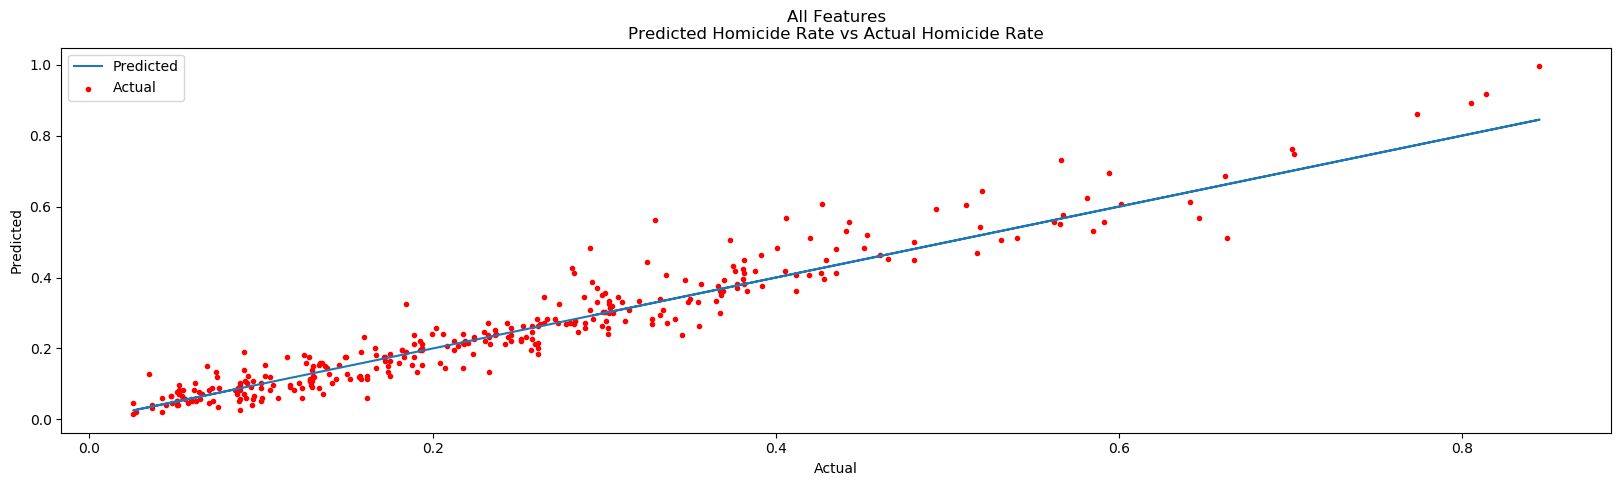

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 135 out of 135 | elapsed:    7.8s finished




Best XGBoost Pipeline Training Score:	 88.31%
Best XGBoost Pipeline Test Score:	 92.29%

Best Parameters:
  colsample_bytree: 0.75
  gamma: 0.0005
  learning_rate: 0.1
  max_depth: 7
  n_estimators: 100
  subsample: 0.5

Potential Decrease in Homicide Rate: -151.94%


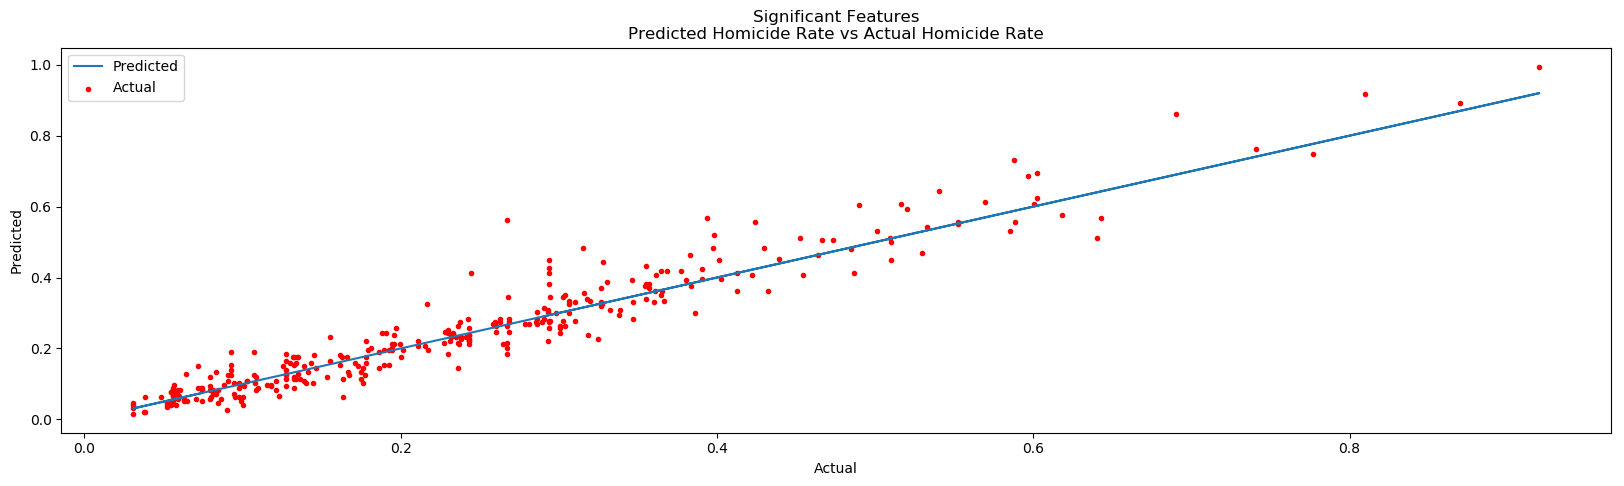

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 120 out of 135 | elapsed:    4.6s remaining:    0.6s
[Parallel(n_jobs=8)]: Done 135 out of 135 | elapsed:    5.2s finished




Best XGBoost Pipeline Training Score:	 87.35%
Best XGBoost Pipeline Test Score:	 91.72%

Best Parameters:
  colsample_bytree: 0.75
  gamma: 0.0005
  learning_rate: 0.1
  max_depth: 7
  n_estimators: 100
  subsample: 0.5

Potential Decrease in Homicide Rate: 67.44%


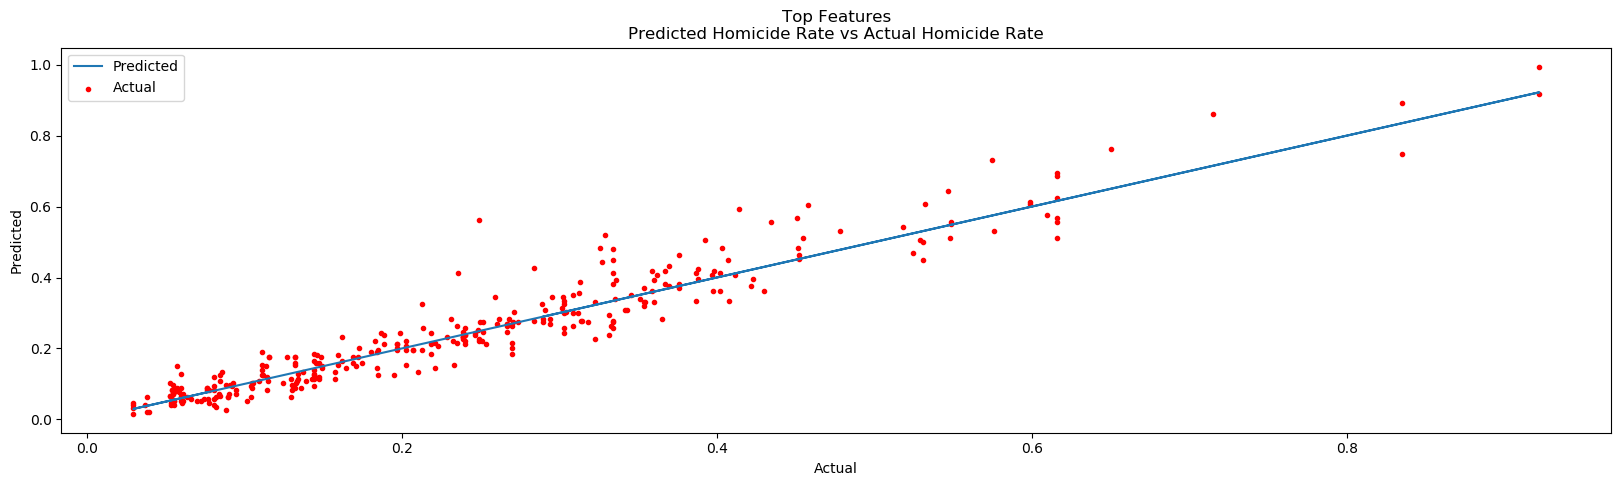

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 120 out of 135 | elapsed:    3.6s remaining:    0.4s
[Parallel(n_jobs=8)]: Done 135 out of 135 | elapsed:    4.1s finished




Best XGBoost Pipeline Training Score:	 79.57%
Best XGBoost Pipeline Test Score:	 82.21%

Best Parameters:
  colsample_bytree: 0.5
  gamma: 0.0005
  learning_rate: 0.1
  max_depth: 9
  n_estimators: 100
  subsample: 0.75

Potential Decrease in Homicide Rate: -77.14%


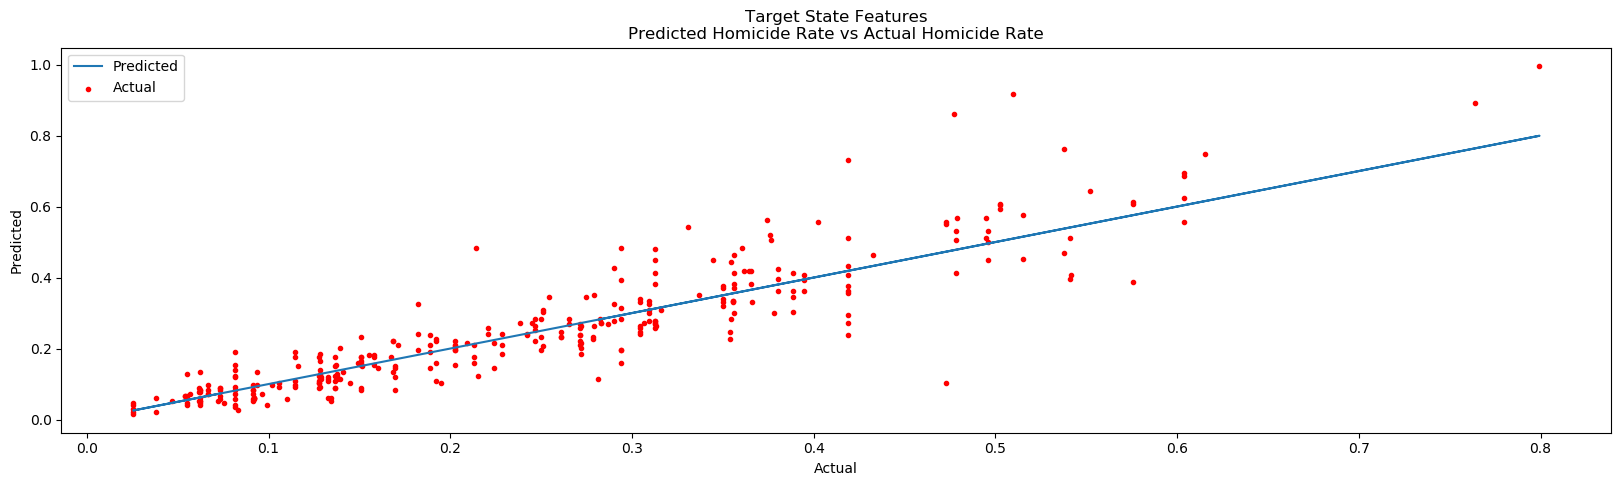

In [129]:
import xgboost as xgb

target = 'homicide_rate'
Target = target.replace('_', ' ').title()
    
for k, v in ind_vars.items():
    # Define X & y variables
    X = df_all_scaled[v]
    y = df_all_scaled[target]
    
    # Train / Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    
    # Set accuracy measure
    acc_meas = 'explained_variance'
    
    # Create pipeline (PCA found to hinder results too much)
    xgb_pipe = Pipeline([#('pca', PCA(n_components=n_feat, random_state=123)), 
                         ('xgbreg', xgb.XGBRegressor(random_state=123))])
    
    # Create search grid
    xgb_grid = {'xgbreg__learning_rate': [.1],
                'xgbreg__max_depth': [5, 7, 9],
                'xgbreg__gamma': [.0005],
                'xgbreg__subsample': [.25, .5, .75], 
                'xgbreg__colsample_bytree': [.5, .75, 1],
                'xgbreg__n_estimators': [100]}
    
    # Use gridsearch across 5 crossfolds of data for each test set
    xgb_gridsearch = GridSearchCV(estimator = xgb_pipe, 
                                  param_grid = xgb_grid, 
                                  scoring = acc_meas, 
                                  cv = 5, verbose = 1,
                                  n_jobs=8,
                                  return_train_score = True)
    
    # Fit model to data
    xgb_gridsearch.fit(X_train, y_train)
    
    # Make predictions for test set
    y_hat_test = xgb_gridsearch.predict(X_test)
    
    # Measure difference between all "no" and all "yes" responses
    min_max_df = pd.DataFrame([[0 for i in range(len(X_test.columns))], 
                               [1 for i in range(len(X_test.columns))]], columns=X_test.columns)
    min_max_preds = xgb_gridsearch.predict(min_max_df)
    min_max_pct_diff = (min_max_preds[0] - min_max_preds[1]) / min_max_preds[0]
    
    # Display results
    print(f'\n\nBest XGBoost Pipeline Training Score:\t{100 * xgb_gridsearch.best_score_: .2f}%')
    print(f'Best XGBoost Pipeline Test Score:\t{100 * explained_variance_score(y_test, y_hat_test): .2f}%\n\nBest Parameters:')
    for param in xgb_gridsearch.best_params_.keys():
        print(f'  {param.split("__")[1]}: {xgb_gridsearch.best_params_[param]}')

    print(f'\nPotential Decrease in {Target}: {min_max_pct_diff*100:.2f}%')
       
    # Plot predicted values against actual values
    plot_predictions(y_test, y_hat_test, k, Target)

### Observations
The XGBoost Regressor provides by far the best explained variance score at for top features at 91.72%. It reflects a potential reduction in homicide rates of 67.44%. The alignment with the benchmark is almost uncanny, suggesting that strong gun laws can effectively reduce gun-related homicide rates without resulting in spikes in other areas. 

### Test Best Model
We will iterate through 1,000 random splits of the data using parameters of the top performing XGB Regressor, and track the results of each iteration to verify their consistency. Explained variance and differences in homicide scores will be tracked and plotted.

In [130]:
import time

target = 'homicide_rate'
Target = target.replace('_', ' ').title()

# Create variables to track min/max differences in homicide rates & p-values
diffs = []
test_scores = []

X = df_all_scaled[ind_vars['Top Features']]
y = df_all_scaled[target]

# Define number of iterations
n=1000

t0 = time.time()
for i in range(n):
    # Display estimated and actual times to complete
    if i==2:
        t1 = time.time()
        print(f'Estimated Time to Complete: {(n * (t1-t0))/60:.2f} mins')
    elif i==(n-1):
        t2 = time.time()
        print(f'Actual Time to Complete: {(t2-t0)/60:.2f} mins') 
        
    # Split data using random state based on interval
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    
    # Set accuracy measure
    acc_meas = 'explained_variance'
    
    # Create pipeline
    xgb_pipe = Pipeline([#('pca', PCA(n_components=n_feat, random_state=123)), 
                         ('xgbreg', xgb.XGBRegressor(random_state=i))])
    
    # Implement grid search using parameters of best model
    xgb_grid = {'xgbreg__learning_rate': [.1],
                'xgbreg__max_depth': [9],
                'xgbreg__gamma': [.0005],
                'xgbreg__subsample': [.75], 
                'xgbreg__colsample_bytree': [.5],
                'xgbreg__n_estimators': [100]}
    
    # Use gridsearch across 5 crossfolds of data for each test set
    xgb_gridsearch = GridSearchCV(estimator = xgb_pipe, 
                                  param_grid = xgb_grid, 
                                  scoring = acc_meas, 
                                  cv = 5, verbose = 0,
                                  n_jobs=8,
                                  return_train_score = True)
    
    # Fit model on training data
    xgb_gridsearch.fit(X_train, y_train)
    
    # Make predicitions and measure accuracy on test data and add to test_scores
    y_hat_test = xgb_gridsearch.predict(X_test)
    score = explained_variance_score(y_test, y_hat_test)
    test_scores.append(score)
    
    # Measure difference between all "no" and all "yes" responses and add to diffs list
    min_max_df = pd.DataFrame([[0 for i in range(len(X_test.columns))], 
                               [1 for i in range(len(X_test.columns))]], columns=X_test.columns)
    min_max_preds = xgb_gridsearch.predict(min_max_df)
    min_max_pct_diff = (min_max_preds[0] - min_max_preds[1]) / min_max_preds[0]
    diffs.append(min_max_pct_diff)
    
xgbreg = xgb.XGBRegressor(learning_rate=.1, 
                          max_depth=9, 
                          gamma=.0005, 
                          subsample=.75, 
                          colsample_bytree=.5, 
                          n_estimators=100)

Estimated Time to Complete: 12.90 mins
Actual Time to Complete: 6.75 mins


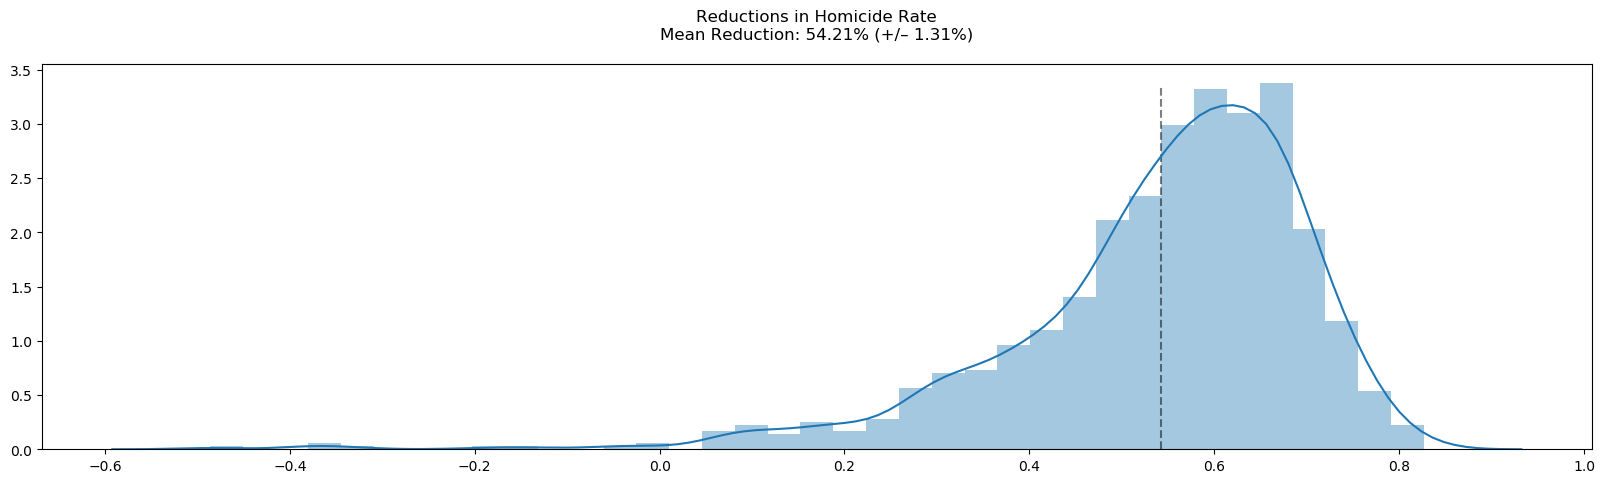

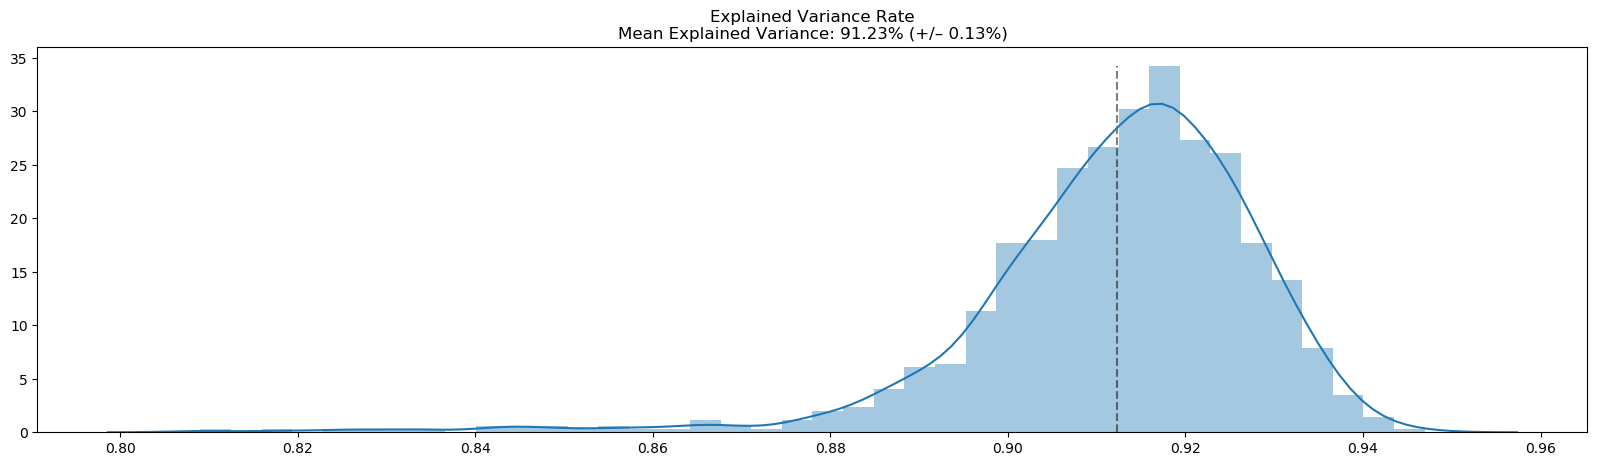

In [131]:
# Create histogram displaying reductions in homicide rate
plt.figure(figsize=(20, 5))
sns.distplot(diffs)
plt.title(f'Reductions in Homicide Rate\n'
          f'Mean Reduction: {100*np.mean(diffs):.2f}%'
          f' (+/– {100*mean_confidence_interval(diffs, .99)[1]:.2f}%)\n')
plt.vlines(np.mean(diffs), 0, 3.35, linestyles='--', alpha=.5)
plt.show()

# Create histogram displaying accuracy scores
plt.figure(figsize=(20, 5))
sns.distplot(test_scores)
plt.title(f'Explained Variance Rate\n'
          f'Mean Explained Variance: {100*np.mean(test_scores):.2f}%'
          f' (+/– {100*mean_confidence_interval(test_scores, .99)[1]:.2f}%)')
plt.vlines(np.mean(test_scores), 0, 34.25, linestyles='--', alpha=.5)
plt.show()

We can be confident to the 99% level that homicide rates can be predicted using these features with this model with 91.10% accuracy. In addition, we can be 99% confident that the difference in homicide rates between states that answer "no" to all questions and those that answer "yes" to all questions will result in a difference in homicide rates of 52.9%. 

### 2019 Predictions
Based on these results, let's see if we can make some predictions for homicide rates in years where data has not yet been published (2017-2019). To accomplish this, the model will be re-trained on all data from 1991-2016.

In [132]:
# Build & train model on 
xgbreg = xgb.XGBRegressor(learning_rate=.1, 
                          max_depth=9, 
                          gamma=.0005, 
                          subsample=.75, 
                          colsample_bytree=.5, 
                          n_estimators=100)

xgbreg.fit(df_all_scaled[top_features], df_all_scaled['homicide_rate'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0.0005, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.75)

### Create Dataframe of Predictions

In [133]:
# Create dataframe structure from question responses
preds_df = questions_df[questions_df.columns[2:]].join(neighbors_df[neighbors_df.columns[2:]])

# Apply minmax scaling to response data
preds_df_scaled = pd.DataFrame(scaler.fit_transform(preds_df.values), 
                               columns=preds_df.columns, 
                               index=preds_df.index)

# Use responses for 2017-2019 data only
preds_df_scaled['Year'] = questions_df['Year']
preds_df_scaled = preds_df_scaled[preds_df_scaled.Year > 2016].drop('Year', axis=1)

# Make predictions
predictions = xgbreg.predict(preds_df_scaled[top_features])

# Convert predictions to original units
y_min = df_all['homicide_rate'].min()
y_max = df_all['homicide_rate'].max()
preds_df_scaled['Predicted Homicide Rate'] = [pred * (y_max-y_min) + y_min for pred in predictions]

# Add year and state columns
preds_df_scaled['Year'] = questions_df[questions_df.Year>2016].Year
preds_df_scaled['State'] = questions_df[questions_df.Year>2016].State

# Display subset of results
preds_df_scaled[['State', 'Year', 'Predicted Homicide Rate']][preds_df_scaled.State=='Wyoming']

State  Year  Predicted Homicide Rate
State-Year                                          
Wyoming 2017  Wyoming  2017                 2.947084
Wyoming 2018  Wyoming  2018                 2.947084
Wyoming 2019  Wyoming  2019                 3.800068

### Identify Most Important Features
Measure homicide rate when all responses are no, then calculate rate when each variable is independently set to yes with all others as no. Sort values in descending order, with the top variable being the one that results in the greatest reduction in homicide rate. Threshold set at a minimum 10% reduction in rate.

In [134]:
# Create set of x-values for predictions, starting with all 0's as a baseline
preds_x = [[0 for i in range(len(X_test.columns))]]
for i in range(20):
    pred = []
    for j in range(20):
        if j==i:
            pred.append(1)
        else:
            pred.append(0)
    preds_x.append(pred)

# Create set of x-values for case where all responses are yes
preds_x.append([1 for i in range(20)])

# Create dataframe and add column for predictions
all_preds = pd.DataFrame(preds_x, columns=top_features)
all_preds['predicted_rate'] = xgbreg.predict(all_preds)

all_no_pred = list(all_preds['predicted_rate'])[0]
all_yes_pred = list(all_preds['predicted_rate'])[-1]

# Create dataframe to identify features resulting in greatest reduction in homicide rate
diffs = {}
for i in range(20):
    # Calculate percentage difference between prediction and all no's prediction
    pred = all_preds.iloc[i+1][all_preds.columns[-1]]
    diff = (all_no_pred-pred) / all_no_pred
    
    # Append value to dictionary, using question id as key
    diffs[all_preds.columns[i]] = [diff]
    
# Create dataframe of top features
top_features_sorted = pd.DataFrame.from_dict(diffs).T.sort_values(by=0, ascending=False)
top_features_sorted = top_features_sorted[top_features_sorted[0]>.1]

top_features_sorted

0
permitting_process_q5_neighbors  0.366476
domestic_violence_q5_neighbors   0.352903
domestic_violence_q7             0.317799
permitting_process_q3            0.207661
permitting_process_q6_neighbors  0.196134
other_q3_neighbors               0.180138
criminals_q9_neighbors           0.175980
permitting_process_q5            0.150755

### Display Associated Question Text

In [135]:
i=1
top_questions = []
for feat in top_features_sorted.index:
    if 'neighbors' in feat:
        clean_feat = feat.replace('_neighbors', '')
        topic = clean_feat.split('_q')[0]
        q_num = clean_feat.split('_')[-1]
        question=question_index[topic][q_num]
        question_text = question.replace('?', ' (neighbor states)?')
        print(f"{i}. {question_text} {100*top_features_sorted[0][i-1]:.2f}%")
        top_questions.append(question_text)
    else:
        topic = feat.split('_q')[0]
        q_num = feat.split('_')[-1]
        question=question_index[topic][q_num]
        question_text = question.replace("?", " (target state)?")
        print(f'{i}. {question_text} {100*top_features_sorted[0][i-1]:.2f}%')
        top_questions.append(question_text)
    i+=1

1. Does law enforcement have the authority to prohibit people from carrying a concealed gun on the basis that they pose a danger or threaten public safety (neighbor states)? 36.65%
2. Does state law require all people under final domestic violence restraining orders to turn in their firearms when they become prohibited from having them (neighbor states)? 35.29%
3. Does state law prohibit all people under temporary domestic violence restraining orders from having firearms (target state)? 31.78%
4. Does the state require firearm training in order to carry concealed guns in public (target state)? 20.77%
5. Does law enforcement otherwise have the authority to prohibit a person from carrying a concealed gun at their discretion (neighbor states)? 19.61%
6. Does state law prohibit fugitives from having firearms (neighbor states)? 18.01%
7. Does state law disqualify people from getting concealed carry permits based on other criminal history (neighbor states)? 17.60%
8. Does law enforcement hav

### Display 2019 Count of Responses for Each Question

In [136]:
# Look up question text in question index
q_ids = []
for feat in top_features_sorted.index:
    q_id = feat.replace('_neighbors', '')
    q_ids.append(q_id)

# First and last question are the same (one for neighbors, and one for target state)
top_feats_2019_data = questions_df[questions_df.Year==2019][q_ids[:-1]]

# Get count of affirmative responses (minimum response > 0)
resp_counts = []
for col in top_feats_2019_data.columns:
    count = np.sum([1 if resp > 0 else 0 for resp in top_feats_2019_data[col]])
    resp_counts.append(count)

# Display counts
resp_counts.append(resp_counts[0])
resp_counts

[23, 31, 22, 29, 8, 23, 25, 23]

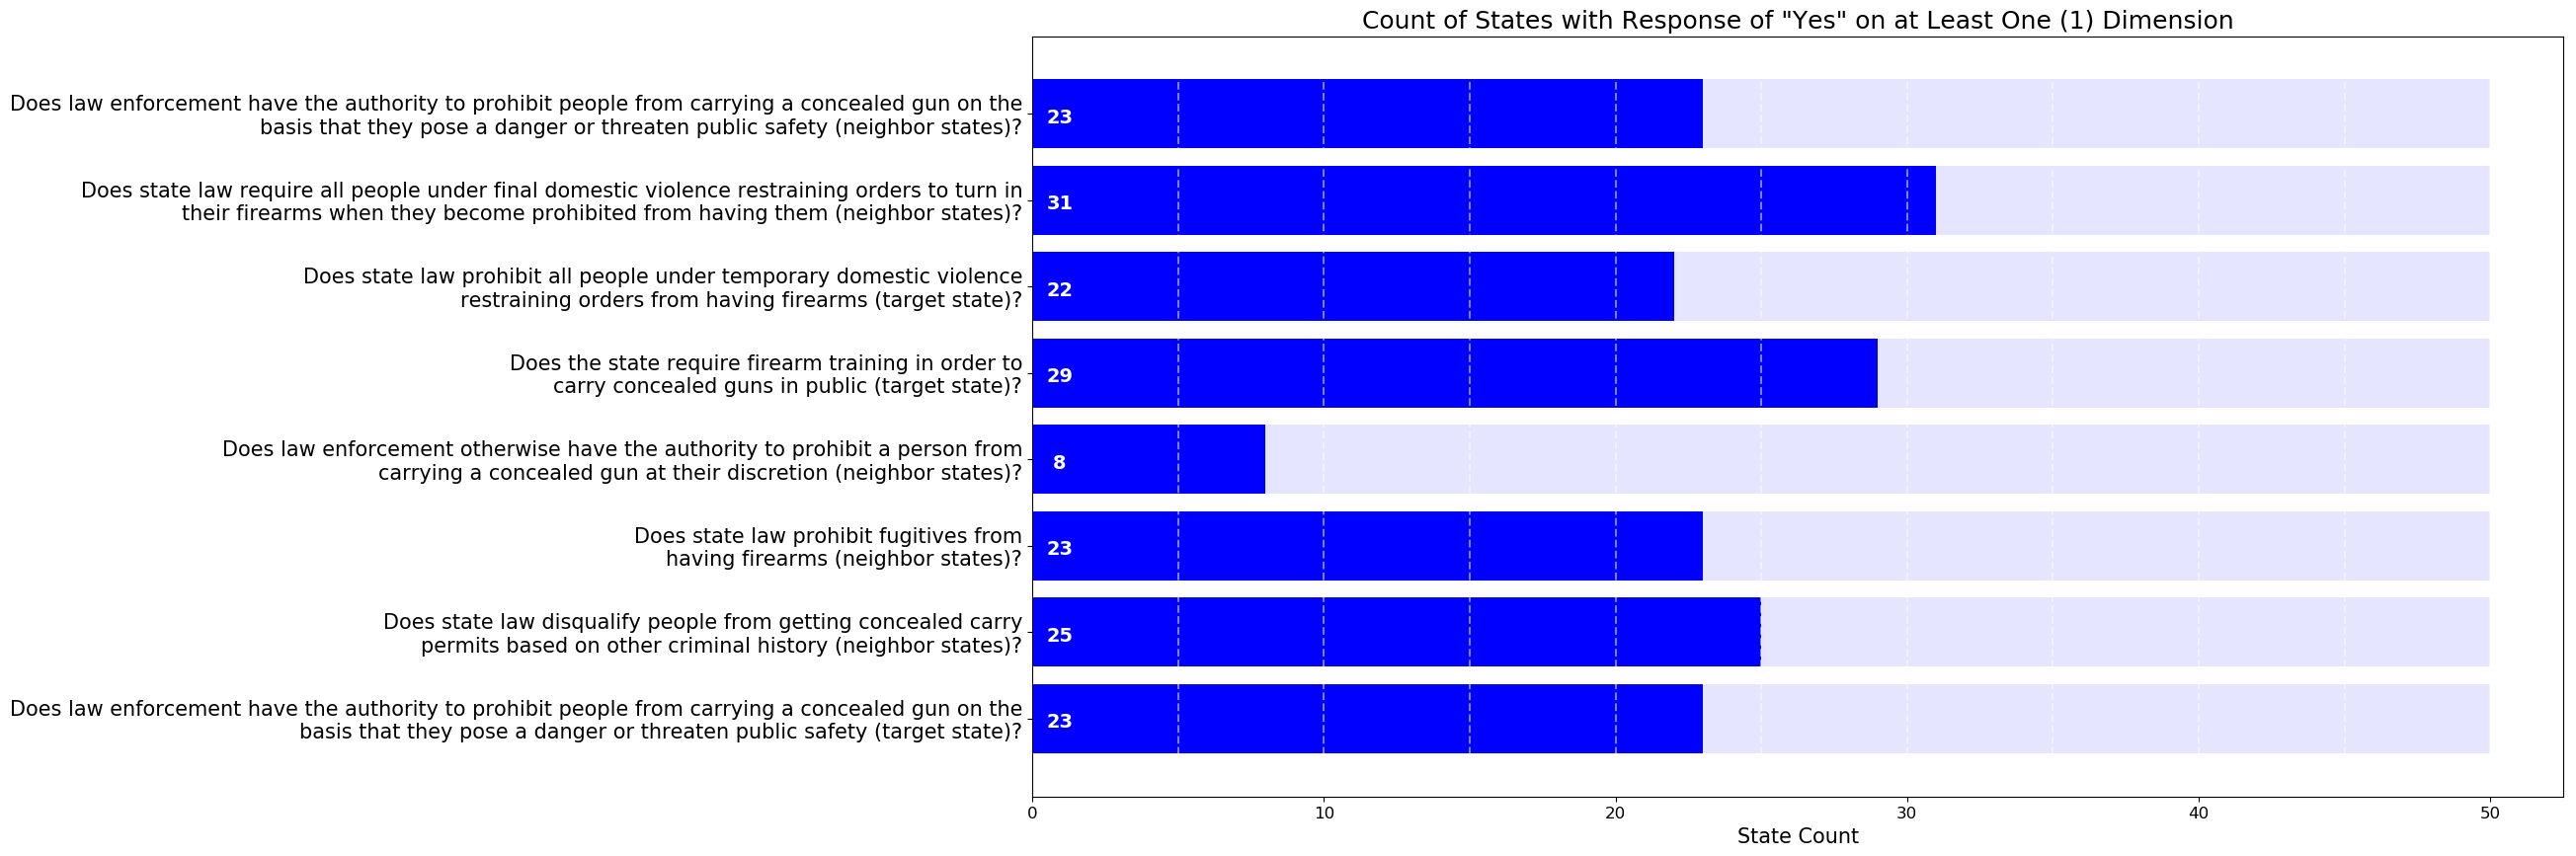

In [137]:
# Plot results on horizontal bar chart
plt.figure(figsize=(20, 10))
p1 = plt.barh(top_questions, 50, color='b', alpha=.1)
p2 = plt.barh(top_questions, resp_counts, color='b')

labels = ['\n'.join(wrap(l, len(l)/1.75)) for l in top_questions]

# Display values on chart
for i, v in enumerate(resp_counts):
    pos = .7 if v<10 else .5
    plt.text(pos, i+.1, str(v), color='white', fontweight='bold', size=14)

# Add vertical dotted lines at every 5 state mark
for i in range(0, 50, 5):
    plt.vlines(i, -.5, len(top_questions)-.5, color='white', linestyles='--', alpha=.5)
plt.vlines(50, -.5, len(top_questions)-.5, color='white', alpha = .5)

# Set question text as lables on y-axis
plt.yticks(range(len(top_questions)), labels, size=15)

# Set x-axis ticks
plt.xticks([i for i in range(0, 51, 10)], 
           [i for i in range(0, 51, 10)], 
           size=12)
plt.xlabel('State Count', size=15)

plt.title(f'Count of States with Response of "Yes" on at Least One (1) Dimension', size=18)

# Invert y-axis to display most significant questions at the top
plt.gca().invert_yaxis()
plt.show()

### Observations
Four of the several unique questions are related to **concealed carry**. Two of those questions relate to the empowerment of police officers to exercise judgment in removing such weapons at their discretion and/or when individuals are deemed to pose a danger or threaten public safetly. The latter question was found to be significant both for the target state and neighbor states.

The second most common theme relates to **domestic violence**. Specifically, restrictions on individuals with domestic violence restraining orders can play a major role in reducing homicide rates in a state.

Finally, there is a question relating to prohibition of fugitives from having firearms. The fact that only 23 states have any such prohibitions is deeply troubling. However, such prohibitions already exist at the federal level, which would prevent fugitives from getting firearms from licensed sellers in the first place. Furthermore, such restrictions would hardly do much to prevent purchases from unlicensed sellers. This suggests one of two potential possibilities:

1. When fugitives are caught with firearms, longer prison sentences prevent them from causing more harm in the future.
2. Such laws are correlated with other restrictive features of law, reflecting broader strategies/approaches to firearm regulations.

Though there could certainly be other explanations, determing the true nature of the effect will require additional research. Still, it is surprising to see that less than half of the states in the US have any such restrictions.

## Neural Networks
We will attempt to perform a similar analysis above, this time using neural networks instead. Assuming such networks are able to achieve results at least as strong as the XBG Regressor, we can compare the results to see if the same conclusions hold. This is not a necessary step, but it has the potential to make the findings more robust.

### Keras Gridsearch
A Keras regressor builder will be created for use in a SciKit Learn gridsearch, but rather than simply passing standard parameters, the grid search will also be able to make modifications to the network architecture. A sequential dense network will be used in all instances.

In [138]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout

# define base model
def build_regressor(input_dim=20, hidden_layers=5, init_nodes=512, activation='relu',
                    node_reduce=3, drops=[2, .5], 
                    optimizer='adam', loss='mean_squared_error', metrics=['mse']):
    
    # Instantiate sequential model
    model = Sequential()
    model.add(Dense(init_nodes, activation=activation, input_dim=input_dim))
    
    # Create index positions and values for dropout layers
    # drops[0] represents total number of dropouts, drops[1] represents dropout percentage
    dropout_vals = [int(i*hidden_layers / drops[0])+drops[0] for i in range(drops[0])]
    
    # Create index positions for reducing the number of neurons in the layer
    # node_reduce indicates the number of times a reduction should occur
    node_reds = [int(i*hidden_layers / node_reduce)+node_reduce for i in range(node_reduce)]
    
    # Create hidden layers of network based on function parameters
    # hidden_layers indicates the total number of hidden layers to be added to network
    for i in range(hidden_layers):
        model.add(Dense(init_nodes, activation=activation))
        
        # Reduce node count
        if i in node_reds:
            init_nodes = int(init_nodes/2)
        
        # Add dropout layer
        if i in dropout_vals:
            model.add(Dropout(drops[1]))
    
    # Add final output layer
    model.add(Dense(units=1))
    
    # Build model
    model.compile(optimizer=optimizer, 
                      loss=loss,  
                      metrics=metrics)
    
    return model

Using TensorFlow backend.


### Grid Search
As before, we will run a grid search and analyze results for each predictor sets, using various hyperparameters and network architectures. All networks are set to train for 100 epochs with Early Stopping enabled if results don't improve after 5 epochs.

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  6.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 17.1min


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


[Parallel(n_jobs=8)]: Done 480 out of 480 | elapsed: 18.6min finished


Epoch 1/100
975/975 [==============================] - 1s 524us/step - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 2/100
975/975 [==============================] - 0s 113us/step - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 3/100
975/975 [==============================] - 0s 109us/step - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 4/100
975/975 [==============================] - 0s 110us/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 5/100
975/975 [==============================] - 0s 109us/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 6/100
975/975 [==============================] - 0s 111us/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 7/100
975/975 [==============================] - 0s 111us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 8/100
975/975 [==============================] - 0s 112us/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 9/100
975/975 [==============================] - 0s 111us/step - loss: 0.0025 - mean_squar

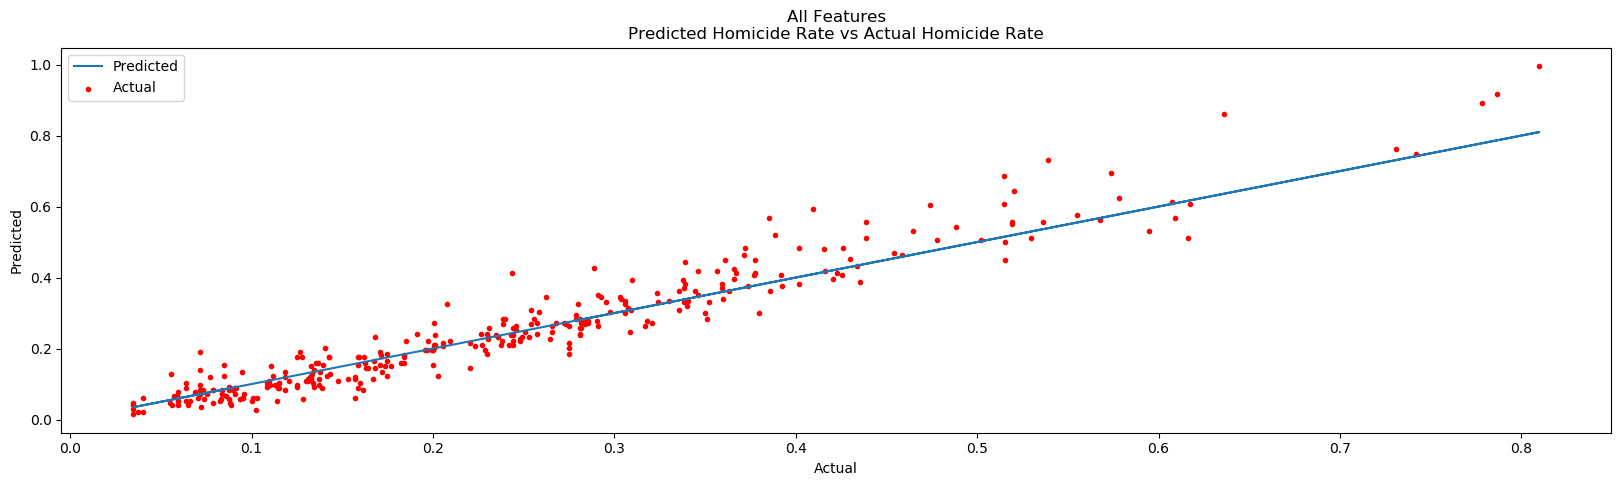

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  6.4min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 18.6min
[Parallel(n_jobs=8)]: Done 480 out of 480 | elapsed: 20.5min finished


Epoch 1/100
975/975 [==============================] - 1s 835us/step - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 2/100
975/975 [==============================] - 0s 112us/step - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 3/100
975/975 [==============================] - 0s 112us/step - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 4/100
975/975 [==============================] - 0s 110us/step - loss: 0.0074 - mean_squared_error: 0.0074
Epoch 5/100
975/975 [==============================] - 0s 107us/step - loss: 0.0058 - mean_squared_error: 0.0058
Epoch 6/100
975/975 [==============================] - 0s 104us/step - loss: 0.0046 - mean_squared_error: 0.0046
Epoch 7/100
975/975 [==============================] - 0s 121us/step - loss: 0.0034 - mean_squared_error: 0.0034
Epoch 8/100
975/975 [==============================] - 0s 108us/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 9/100
975/975 [==============================] - 0s 104us/step - loss: 0.0024 - mean_squar

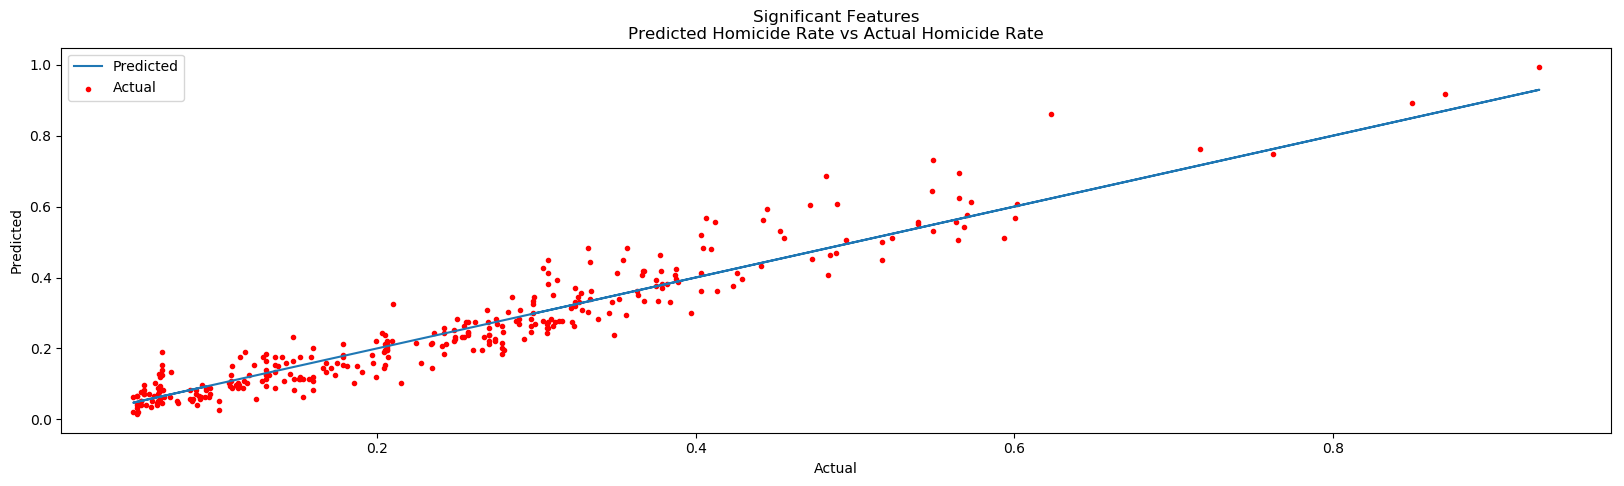

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  6.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 18.0min
[Parallel(n_jobs=8)]: Done 480 out of 480 | elapsed: 19.7min finished


Epoch 1/100
975/975 [==============================] - 1s 600us/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 2/100
975/975 [==============================] - 0s 176us/step - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 3/100
975/975 [==============================] - 0s 136us/step - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 4/100
975/975 [==============================] - 0s 170us/step - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 5/100
975/975 [==============================] - 0s 160us/step - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 6/100
975/975 [==============================] - 0s 162us/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 7/100
975/975 [==============================] - 0s 161us/step - loss: 0.0064 - mean_squared_error: 0.0064
Epoch 8/100
975/975 [==============================] - 0s 149us/step - loss: 0.0059 - mean_squared_error: 0.0059
Epoch 9/100
975/975 [==============================] - 0s 157us/step - loss: 0.0048 - mean_squar

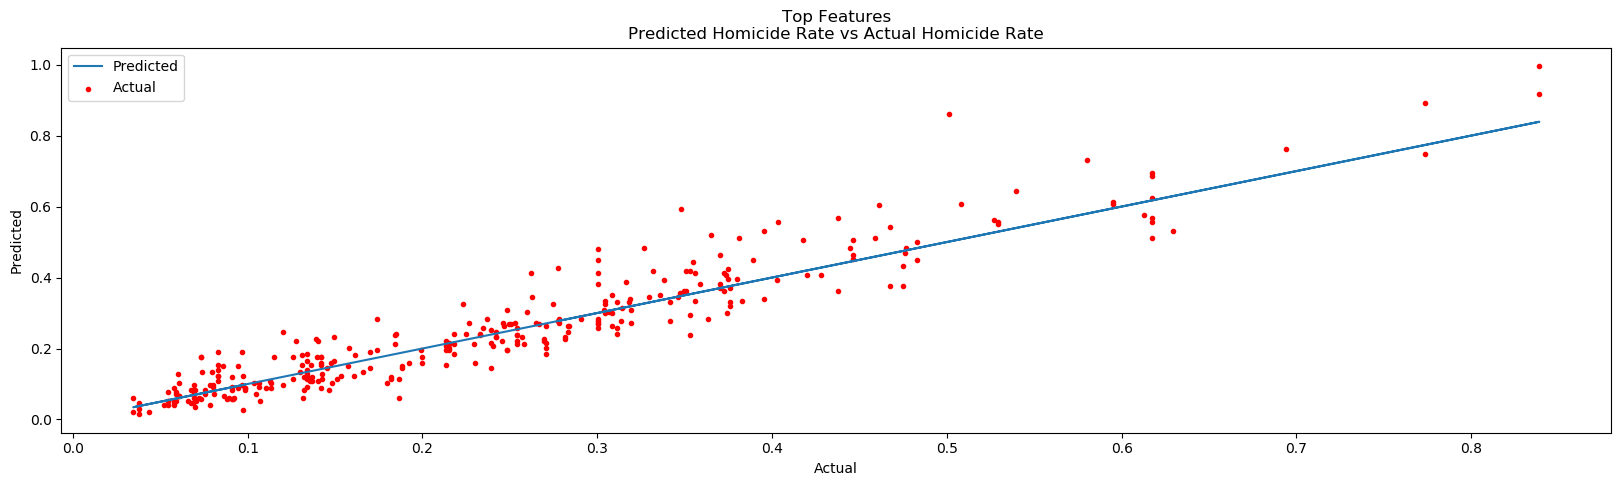

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  6.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 17.3min
[Parallel(n_jobs=8)]: Done 480 out of 480 | elapsed: 19.2min finished


Epoch 1/100
975/975 [==============================] - 1s 612us/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 2/100
975/975 [==============================] - 0s 97us/step - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 3/100
975/975 [==============================] - 0s 104us/step - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 4/100
975/975 [==============================] - 0s 99us/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 5/100
975/975 [==============================] - 0s 107us/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 6/100
975/975 [==============================] - 0s 106us/step - loss: 0.0067 - mean_squared_error: 0.0067
Epoch 7/100
975/975 [==============================] - 0s 99us/step - loss: 0.0054 - mean_squared_error: 0.0054
Epoch 8/100
975/975 [==============================] - 0s 101us/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 9/100
975/975 [==============================] - 0s 97us/step - loss: 0.0053 - mean_squared_e

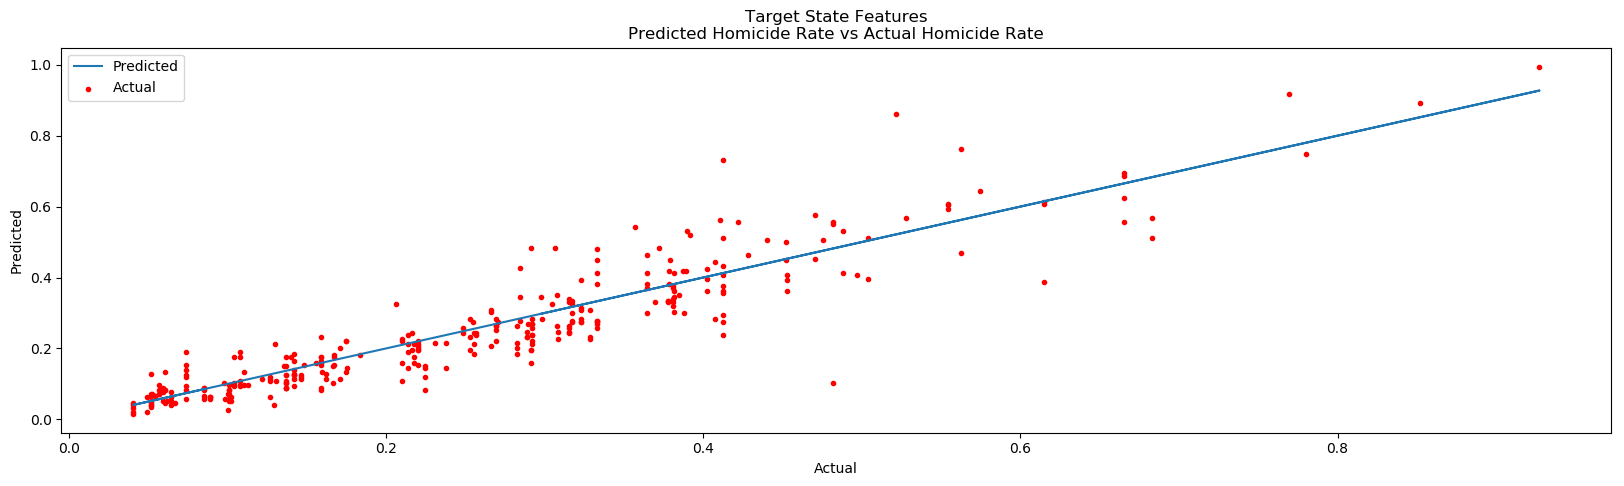

In [139]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K
from keras.callbacks import EarlyStopping

target = 'homicide_rate'
Target = target.replace('_', ' ').title()

early_stopping = EarlyStopping(monitor='loss', patience=5)
callbacks=[early_stopping]

for k, v in ind_vars.items():
    # Define X & y variables
    X = df_all_scaled[v]
    y = df_all_scaled[target]
    
    # Train / Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
    
    # Set accuracy measure
    acc_meas = 'explained_variance'
    
    ker_estimator = KerasRegressor(build_fn=build_regressor, verbose=1)
    
    # Create pipeline (PCA found to hinder results too much)
    ker_pipe = Pipeline([#('pca', PCA(n_components=n_feat, random_state=123)), 
                         ('kerreg', ker_estimator)])
    
    # Create search grid
    ker_grid = {'kerreg__input_dim': [len(v)],
                'kerreg__hidden_layers': [8, 6, 8],
                'kerreg__activation': ['relu', 'tanh'],
                'kerreg__node_reduce': [2, 4],
                'kerreg__drops': [[2, .25], [2, .5], [3, .25], [3, .5]], 
                'kerreg__epochs': [100], 
                'kerreg__batch_size': [128, 256], 
                'kerreg__callbacks': [callbacks]}
    
    # Use gridsearch across 5 crossfolds of data for each test set
    ker_gridsearch = GridSearchCV(estimator = ker_pipe, 
                                  param_grid = ker_grid, 
                                  scoring = acc_meas, 
                                  cv = 5, verbose = 1,
                                  n_jobs=8,
                                  return_train_score = True)
    
    # Fit model to data
    ker_gridsearch.fit(X_train, y_train)
    
    # Make predictions for test set
    y_hat_test = ker_gridsearch.predict(X_test)
    
    # Measure difference between all "no" and all "yes" responses
    min_max_df = pd.DataFrame([[0 for i in range(len(X_test.columns))], 
                               [1 for i in range(len(X_test.columns))]], columns=X_test.columns)
    min_max_preds = ker_gridsearch.predict(min_max_df)
    min_max_pct_diff = (min_max_preds[0] - min_max_preds[1]) / min_max_preds[0]
    
    # Display results
    print(f'\n\nBest Keras Pipeline Training Score:\t{100 * ker_gridsearch.best_score_: .2f}%')
    print(f'Best Keras Pipeline Test Score:\t{100 * explained_variance_score(y_test, y_hat_test): .2f}%\n\nBest Parameters:')
    for param in ker_gridsearch.best_params_.keys():
        print(f'  {param.split("__")[1]}: {ker_gridsearch.best_params_[param]}')

    print(f'\nPotential Decrease in {Target}: {min_max_pct_diff*100:.2f}%')
       
    # Plot predicted values against actual values
    plot_predictions(y_test, y_hat_test, k, Target)
    
    K.clear_session()

The top performing neural network was unable to outperform the XGBoost regressor model, achieving an explained variance score of 87%. Given that there are only 1,300 samples, this isn't a big surprise, as neural networks are known to perform better when they have volumes of data that would be prohibitively large in most other circumstances. Though it would likely be possible to build a network with greater levels of accuracy, the room for additional value is not worth the added time and effort.

## Predicting Mass Shootings
Using the same approach as above, we will see if any significant relationships can be identified between state laws and mass shootings. The Global Terrorism Database provided limited data, so we will grab information from another source. [Mother Jones](https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/) maintains a database of mass shootings in the United States that is consistently updated whenever new incidents occur. The points of interest in this data will be location, date, and number of fatalities/injuries. The final point is of more interest from the standpoint of determining whether or not an incident should truly qualify as a mass shooting.

In [140]:
# f = str('https://docs.google.com/spreadsheets/d/e/'
#         '2PACX-1vQBEbQoWMn_P81DuwmlQC0_jr2sJDzkkC0mvF6WLcM53ZYXi8RMfUlunvP1B5W0jRrJvH'
#         '-wc-WGjDB1/pub?gid=0&single=true&output=csv')

# mass_shooting_df = pd.read_csv(f)
# mass_shooting_df.to_csv('mass_shooting_data.csv')

In [141]:
mass_shooting_df = pd.read_csv('mass_shooting_data.csv')
mass_shooting_df = mass_shooting_df[['location', 'date', 'fatalities', 'injured']]
mass_shooting_df.head()

location     date  fatalities  injured
0          Odessa, TX  8/31/19           7       25
1          Dayton, OH   8/4/19           9       27
2         El Paso, TX   8/3/19          22       26
3          Gilroy, CA  7/28/19           3       12
4  Virginia Beach, VA  5/31/19          12        4

In [142]:
mass_shooting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
location      115 non-null object
date          115 non-null object
fatalities    115 non-null int64
injured       115 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.7+ KB


In [143]:
mass_shooting_df.describe()

fatalities     injured
count  115.000000  115.000000
mean     8.182609   12.443478
std      8.018162   51.316047
min      3.000000    0.000000
25%      5.000000    1.000000
50%      6.000000    4.000000
75%      9.000000   11.500000
max     58.000000  546.000000

### Cleaning
Data will be merged with question/response data, but in order to do so, mass shooting data will have to be properly indexed to match. Rather than try to predict a count of mass shootings, we will convert the results into a binary response indicating whether a state had any mass shootings in a given year.

In [144]:
# Extract state from location column, and convert to full name if shown as abbreviation
mass_shooting_df['State'] = [loc.split(', ')[1] for loc in mass_shooting_df['location']]
mass_shooting_df['State'] = [st if len(st)>2 else state_abbrs[st] for st in mass_shooting_df['State']]

# Extract year from date column
mass_shooting_df['Year'] = [int(date.split('/')[2]) for date in mass_shooting_df['date']]

# Convert year to YYYY format
clean_years = []
for yr in mass_shooting_df.Year:
    if yr < 20:
        clean_years.append(2000+yr)
    elif yr <= 99:
        clean_years.append(1999+yr)
    else:
        clean_years.append(yr)
mass_shooting_df['Year']=clean_years

# Create state-year column for 1991-2019
mass_shooting_df['State-Year'] = [f'{st} {yr}' for st, yr in zip(mass_shooting_df['State'], mass_shooting_df['Year'])]
mass_shooting_df = mass_shooting_df[mass_shooting_df.Year>=1991]

# Group by state-year and set all mass_shooting results to 1
mass_shootings = mass_shooting_df.groupby(by='State-Year').sum().drop('Year', axis=1)
mass_shootings['mass_shooting'] = [1 for i in range(mass_shootings.shape[0])]
mass_shootings.head()

fatalities  injured  mass_shooting
State-Year                                         
Arizona 2011              6       13              1
Arkansas 1998             5       10              1
California 1992           4       10              1
California 1993           9        6              1
California 1997           5        2              1

### Merge Shooting Data with Question/Response Data

In [145]:
# Import question responses and join with neighbor results
questions = questions_df.join(neighbors_df[neighbors_df.columns[2:]])

# Join mass shootings data
mass_shooting_questions = questions.join(mass_shootings['mass_shooting']).fillna(0)

mass_shooting_questions = mass_shooting_questions.drop(['State', 'Year'], axis=1)
mass_shooting_questions.head()

background_checks_q2  criminals_q2  criminals_q3  \
State-Year                                                          
Alabama 1991                        0             1             0   
Alaska 1991                         0             2             0   
Arizona 1991                        0             4             0   
Arkansas 1991                       0             8             0   
California 1991                     2             8             0   

                 criminals_q4  criminals_q5  criminals_q7  criminals_q8  \
State-Year                                                                
Alabama 1991                1             0             4             8   
Alaska 1991                 0             0             4             8   
Arizona 1991                0             0             4             8   
Arkansas 1991               0             0             4             8   
California 1991             4             0             4             8   

                 criminals_q9  domestic_violence_q1  domestic_violence_q2  \
State-Year                                                                  
Alabama 1991                0                     0                     0   
Alaska 1991                 1                     0                     0   
Arizona 1991                1                     0                     0   
Arkansas 1991               1                     0                     0   
California 1991             0                     4                     0   

                     ...        other_q1_neighbors  other_q2_neighbors  \
State-Year           ...                                                 
Alabama 1991         ...                       0.0                 0.0   
Alaska 1991          ...                       0.0                 0.0   
Arizona 1991         ...                       0.0                 0.0   
Arkansas 1991        ...                       0.0                 0.0   
California 1991      ...                       0.0                 0.0   

                 other_q3_neighbors  other_q4_neighbors  other_q5_neighbors  \
State-Year                                                                    
Alabama 1991               0.000000                 0.0                 0.0   
Alaska 1991                0.000000                 0.0                 0.0   
Arizona 1991               0.000000                 0.0                 0.0   
Arkansas 1991              0.666667                 0.0                 0.0   
California 1991            0.000000                 0.0                 0.0   

                 other_q6_neighbors  other_q7_neighbors  other_q8_neighbors  \
State-Year                                                                    
Alabama 1991                    0.0                 0.0            0.000000   
Alaska 1991                     0.0                 0.0            4.000000   
Arizona 1991                    0.0                 0.0            0.800000   
Arkansas 1991                   0.0                 0.0            2.000000   
California 1991                 0.0                 0.0            1.333333   

                 other_q9_neighbors  mass_shooting  
State-Year                                          
Alabama 1991               2.000000            0.0  
Alaska 1991                2.000000            0.0  
Arizona 1991               0.400000            0.0  
Arkansas 1991              1.666667            0.0  
California 1991            0.666667            0.0  

[5 rows x 135 columns]

### Data Transformation

In [146]:
# Minmax scale df
scaler = MinMaxScaler()
mass_shooting_scaled = pd.DataFrame(scaler.fit_transform(mass_shooting_questions.values), 
                                    columns=mass_shooting_questions.columns, 
                                    index=mass_shooting_questions.index)


mass_shooting_scaled.head()

background_checks_q2  criminals_q2  criminals_q3  \
State-Year                                                          
Alabama 1991                      0.0         0.125           0.0   
Alaska 1991                       0.0         0.250           0.0   
Arizona 1991                      0.0         0.500           0.0   
Arkansas 1991                     0.0         1.000           0.0   
California 1991                   1.0         1.000           0.0   

                 criminals_q4  criminals_q5  criminals_q7  criminals_q8  \
State-Year                                                                
Alabama 1991             0.25           0.0           1.0           1.0   
Alaska 1991              0.00           0.0           1.0           1.0   
Arizona 1991             0.00           0.0           1.0           1.0   
Arkansas 1991            0.00           0.0           1.0           1.0   
California 1991          1.00           0.0           1.0           1.0   

                 criminals_q9  domestic_violence_q1  domestic_violence_q2  \
State-Year                                                                  
Alabama 1991              0.0                   0.0                   0.0   
Alaska 1991               1.0                   0.0                   0.0   
Arizona 1991              1.0                   0.0                   0.0   
Arkansas 1991             1.0                   0.0                   0.0   
California 1991           0.0                   1.0                   0.0   

                     ...        other_q1_neighbors  other_q2_neighbors  \
State-Year           ...                                                 
Alabama 1991         ...                       0.0                 0.0   
Alaska 1991          ...                       0.0                 0.0   
Arizona 1991         ...                       0.0                 0.0   
Arkansas 1991        ...                       0.0                 0.0   
California 1991      ...                       0.0                 0.0   

                 other_q3_neighbors  other_q4_neighbors  other_q5_neighbors  \
State-Year                                                                    
Alabama 1991               0.000000                 0.0                 0.0   
Alaska 1991                0.000000                 0.0                 0.0   
Arizona 1991               0.000000                 0.0                 0.0   
Arkansas 1991              0.166667                 0.0                 0.0   
California 1991            0.000000                 0.0                 0.0   

                 other_q6_neighbors  other_q7_neighbors  other_q8_neighbors  \
State-Year                                                                    
Alabama 1991                    0.0                 0.0            0.000000   
Alaska 1991                     0.0                 0.0            1.000000   
Arizona 1991                    0.0                 0.0            0.200000   
Arkansas 1991                   0.0                 0.0            0.500000   
California 1991                 0.0                 0.0            0.333333   

                 other_q9_neighbors  mass_shooting  
State-Year                                          
Alabama 1991               0.500000            0.0  
Alaska 1991                0.500000            0.0  
Arizona 1991               0.100000            0.0  
Arkansas 1991              0.416667            0.0  
California 1991            0.166667            0.0  

[5 rows x 135 columns]

### SMOTE
Mass shootings represent extremely rare events; generate synthetic data to prevent data imbalance from yielding misleading results.

In [147]:
from imblearn.over_sampling import SMOTE

# Set target & independent variables
X = np.array(mass_shooting_scaled.ix[:, mass_shooting_scaled.columns != 'mass_shooting'])
y = np.array(mass_shooting_scaled.ix[:, mass_shooting_scaled.columns == 'mass_shooting'])

# Split data & display shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Sample Count of X_train dataset: ", X_train.shape)
print("Sample Count of y_train dataset: ", y_train.shape)
print("Sample Count of X_test dataset: ", X_test.shape)
print("Sample Count of y_test dataset: ", y_test.shape)

Sample Count of X_train dataset:  (1015, 134)
Sample Count of y_train dataset:  (1015, 1)
Sample Count of X_test dataset:  (435, 134)
Sample Count of y_test dataset:  (435, 1)


In [148]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Implement SMOTE
sm = SMOTE(random_state=123)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [63]
Before OverSampling, counts of label '0': [952] 

After OverSampling, the shape of train_X: (1904, 134)
After OverSampling, the shape of train_y: (1904,) 

After OverSampling, counts of label '1': 952
After OverSampling, counts of label '0': 952


## Machine Learning Classifiers
As with homicide rates, we will look for a relationship between mass shootings and gun laws using a gridsearch. However, we will start by looking at all laws before attempting to whiddle down to top features. In this case, however, we will be using classification models rather than regression models. 

The cost of missing a mass shooting is much greater than predicting there will be one and there isn't one. Therefore, recall will be used as the primary metric used. However, the grid search will be set to optimize the f1 score to ensure it does not simply predict that there will be a mass shooting in all intances.

### Conusion Matrix
To start, we will create a confusion matrix display function to show predictions for each model.

In [149]:
from sklearn.metrics import confusion_matrix, f1_score
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(7, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Decision Tree

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 108 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 2208 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 2500 out of 2500 | elapsed:    8.8s finished


Confusion matrix, without normalization
Recall Score: 45.16%


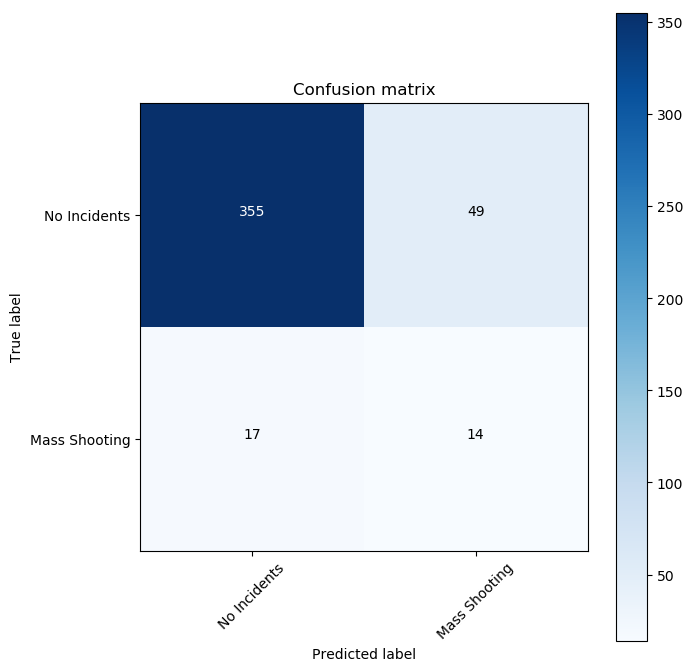

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score

# Initiate decision tree model
tree_pipe = Pipeline([('clf', DecisionTreeClassifier(random_state=123))])

# Create search grid
tree_grid = [{'clf__criterion': ['gini', 'entropy'],
              'clf__max_depth': list(range(1, 11, 2)), 
              'clf__min_samples_split': [i/100 for i in range(5, 96, 10)], 
              'clf__min_samples_leaf': list(range(1, 11, 2))}]

# Set accuracy measure
acc_meas = 'f1'

# Implement gridsearch
tree_gridsearch = GridSearchCV(estimator = tree_pipe, 
                               param_grid = tree_grid, 
                               scoring = acc_meas,
                               n_jobs=8,
                               cv=5, verbose = 1, return_train_score = True)

# Fit to training set with synthetic data
tree_gridsearch.fit(X_train_res, y_train_res)

# Predict new data & measure results
y_hat_test = tree_gridsearch.predict(X_test)
score = recall_score(y_test, y_hat_test)
prec_score = precision_score(y_test, y_hat_test)
f1 = f1_score(y_test, y_hat_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
cm_plot_labels = ['No Incidents', 'Mass Shooting']

plot_confusion_matrix(cm, cm_plot_labels, normalize=False)

print(f'Recall Score: {score*100:.2f}%')

# Save results
results = {'Pipeline': ['Decision Tree'], 
           'Recall Score': [score], 
           'Precision Score': [prec_score], 
           'F1 Score': [f1],
           'Parameters': [tree_gridsearch.best_params_]}

### Random Forest

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 124 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 1024 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done 2500 out of 2500 | elapsed:   12.3s finished


Confusion matrix, without normalization
Recall Score: 32.26%


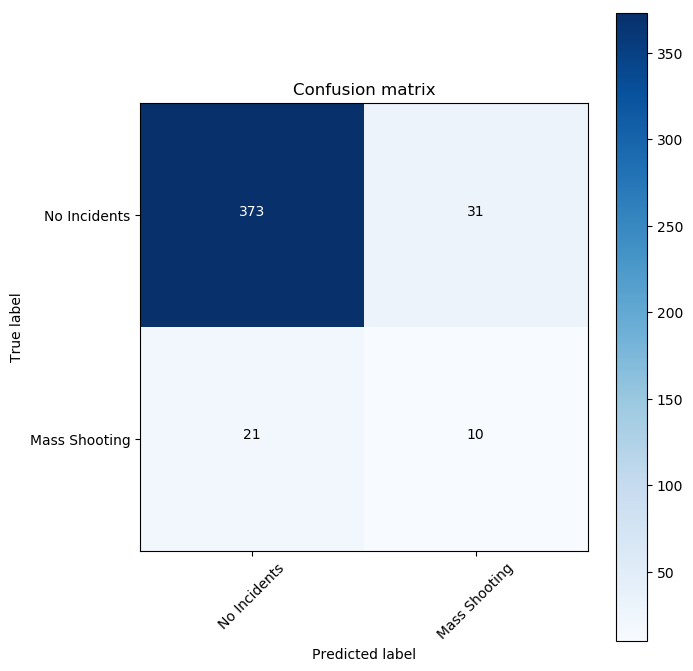

In [151]:
from sklearn.ensemble import RandomForestClassifier

# Initiate random forest model
rf_pipe = Pipeline([('rf', RandomForestClassifier(random_state=123))])

# Create search grid
rf_grid = [{'rf__criterion': ['gini', 'entropy'],
            'rf__max_depth': list(range(1, 11, 2)), 
            'rf__min_samples_split': [i/100 for i in range(5, 96, 10)], 
            'rf__min_samples_leaf': list(range(1, 11, 2))}]

# Implement grid search
rf_gridsearch = GridSearchCV(estimator = rf_pipe, 
                             param_grid = rf_grid, 
                             scoring = 'f1', 
                             n_jobs=8, 
                             cv = 5, verbose = 1, return_train_score = True)

# Fit to training set with synthetic data
rf_gridsearch.fit(X_train_res, y_train_res)

# Predict new data & measure results
y_hat_test = rf_gridsearch.predict(X_test)
score = recall_score(y_test, y_hat_test)
prec_score = precision_score(y_test, y_hat_test)
f1 = f1_score(y_test, y_hat_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
cm_plot_labels = ['No Incidents', 'Mass Shooting']

plot_confusion_matrix(cm, cm_plot_labels, normalize=False)

print(f'Recall Score: {score*100:.2f}%')

# Save results
results['Pipeline'].append('Random Forest')
results['Recall Score'].append(score)
results['Precision Score'].append(prec_score)
results['F1 Score'].append(f1)
results['Parameters'].append(rf_gridsearch.best_params_)

### Logistic Regression

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:  1.0min finished


Confusion matrix, without normalization
Recall Score: 25.81%


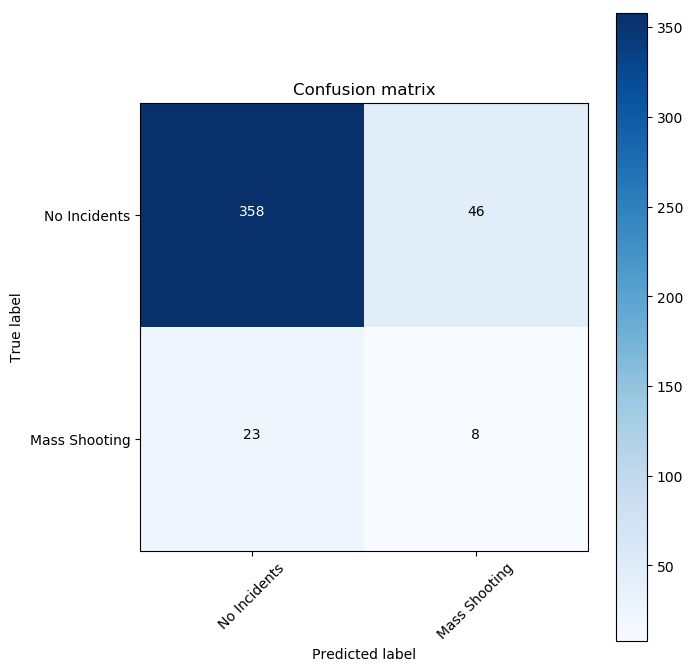

In [152]:
from sklearn.linear_model import LogisticRegression

# Initiate logistic regression pipeline
logreg_pipe = Pipeline([('logreg', LogisticRegression(random_state=123))])

# Create search grid
logreg_grid = [{'logreg__C': [.001, 0.01, 0.1, 1, 10, 100, 1000], 
                'logreg__penalty': ['l1', 'l2']}]

# Implement grid search
logreg_gridsearch = GridSearchCV(estimator = logreg_pipe, 
                                 param_grid = logreg_grid, 
                                 scoring = acc_meas, 
                                 n_jobs=8,
                                 cv = 5, verbose = 1, return_train_score = True)

# Fit on training set with synthetic data
logreg_gridsearch.fit(X_train_res, y_train_res)

# Predict new data & measure results
y_hat_test = logreg_gridsearch.predict(X_test)
score = recall_score(y_test, y_hat_test)
prec_score = precision_score(y_test, y_hat_test)
f1 = f1_score(y_test, y_hat_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
cm_plot_labels = ['No Incidents', 'Mass Shooting']

plot_confusion_matrix(cm, cm_plot_labels, normalize=False)

print(f'Recall Score: {score*100:.2f}%')

# Save results
results['Pipeline'].append('Logistic Regression')
results['Recall Score'].append(score)
results['Precision Score'].append(prec_score)
results['F1 Score'].append(f1)
results['Parameters'].append(logreg_gridsearch.best_params_)

### Support Vector Machine

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   22.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:   31.0s finished


Confusion matrix, without normalization
Recall Score: 48.39%


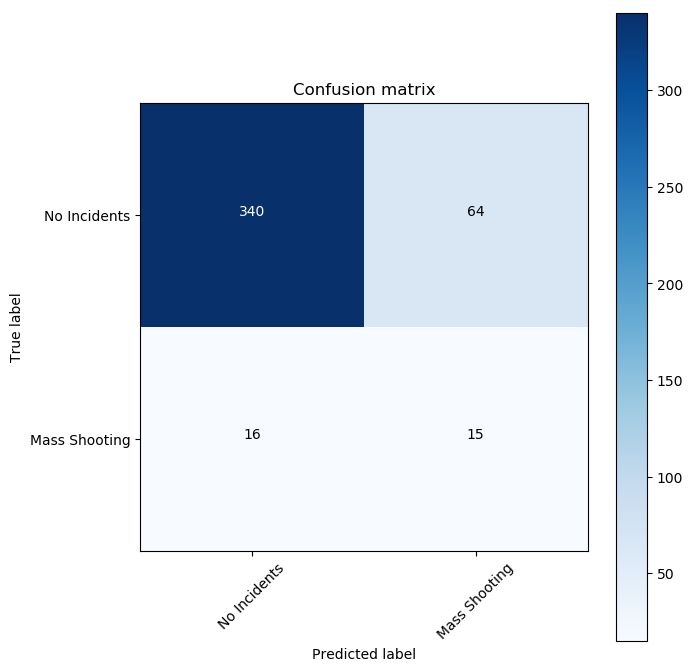

In [153]:
from sklearn.svm import SVC

# Initiate SVM pipeline
svm_pipe = Pipeline([('svm', SVC(random_state=123))])

# Create search grid
svm_grid = [{'svm__kernel': ['linear'],
             'svm__C': [.1, 1, 10], 
             'svm__degree': list(range(1, 11, 2))}, 
            
            {'svm__kernel': ['rbf'],
             'svm__C': [.1, 1, 10],
             'svm__degree': list(range(1, 11, 2)),
             'svm__gamma': [0.001, .01, 'auto']}
           ]

# Implement grid search
svm_gridsearch = GridSearchCV(estimator = svm_pipe, 
                              param_grid = svm_grid, 
                              scoring = acc_meas, 
                              n_jobs=8, 
                              cv = 5, verbose = 1, return_train_score = True)

# Fit to training set with synthetic data
svm_gridsearch.fit(X_train_res, y_train_res)

# Predict new data & measure results
y_hat_test = svm_gridsearch.predict(X_test)
score = recall_score(y_test, y_hat_test)
prec_score = precision_score(y_test, y_hat_test)
f1 = f1_score(y_test, y_hat_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
cm_plot_labels = ['No Incidents', 'Mass Shooting']

plot_confusion_matrix(cm, cm_plot_labels, normalize=False)

print(f'Recall Score: {score*100:.2f}%')

# Save results
results['Pipeline'].append('Support Vector Machine')
results['Recall Score'].append(score)
results['Precision Score'].append(prec_score)
results['F1 Score'].append(f1)
results['Parameters'].append(svm_gridsearch.best_params_)

### Adaboost Classifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    8.0s finished


Confusion matrix, without normalization
Recall Score: 35.48%


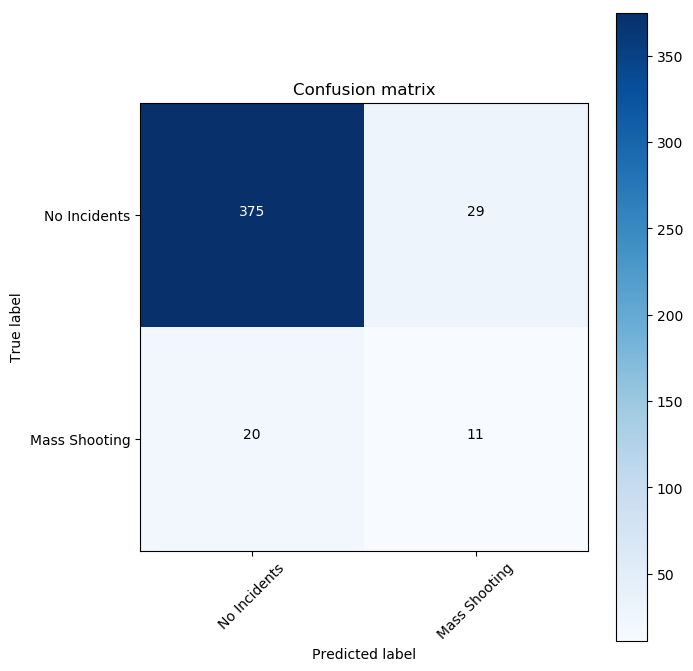

In [154]:
from sklearn.ensemble import AdaBoostClassifier

# Initiate adaboost pipeline model
ada_pipe = Pipeline([('ada', AdaBoostClassifier(random_state=123))])

# Create search grid
ada_grid = [{'ada__learning_rate': [i/100 for i in range(1, 100, 5)]}]

# Implement grid search
ada_gridsearch = GridSearchCV(estimator = ada_pipe, 
                              param_grid = ada_grid, 
                              scoring = acc_meas, 
                              n_jobs = 8,
                              cv = 5, verbose = 1, return_train_score = True)

# Fit to training set with synthetic data
ada_gridsearch.fit(X_train_res, y_train_res)

# Predict new data and measure results
y_hat_test = ada_gridsearch.predict(X_test)
score = recall_score(y_test, y_hat_test)
prec_score = precision_score(y_test, y_hat_test)
f1 = f1_score(y_test, y_hat_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
cm_plot_labels = ['No Incidents', 'Mass Shooting']

plot_confusion_matrix(cm, cm_plot_labels, normalize=False)

print(f'Recall Score: {score*100:.2f}%')

# Save results
results['Pipeline'].append('Adaboost')
results['Recall Score'].append(score)
results['Precision Score'].append(prec_score)
results['F1 Score'].append(f1)
results['Parameters'].append(ada_gridsearch.best_params_)

### XGBoost Classifier

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   56.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=8)]: Done 450 out of 450 | elapsed:  2.3min finished


Confusion matrix, without normalization
Recall Score: 35.48%


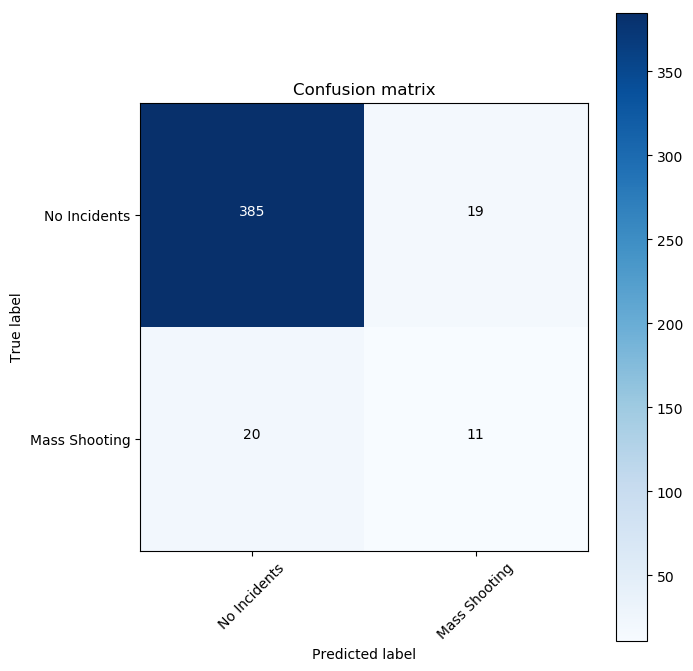

In [155]:
import xgboost as xgb

# Initiate xgb classifier
xgb_pipe = Pipeline([('xgb', xgb.XGBClassifier())])

# Create search grid
xgb_grid = {'xgb__learning_rate': [.01, .001, .0001],
            'xgb__max_depth': [9],
            'xgb__min_child_weight': [2],
            'xgb__subsample': [i/100 for i in range(5, 100, 10)],
            'xgb__n_estimators': [75, 90, 100]}

# Implement grid search
xgb_gridsearch = GridSearchCV(estimator = xgb_pipe, 
                              param_grid = xgb_grid, 
                              scoring = acc_meas, 
                              n_jobs = 8,
                              cv = 5, verbose = 1, return_train_score = True)

# Fit to training set with synthetic data
xgb_gridsearch.fit(X_train_res, y_train_res)

# Predict new data & measure results
y_hat_test = xgb_gridsearch.predict(X_test)
score = recall_score(y_test, y_hat_test)
prec_score = precision_score(y_test, y_hat_test)
f1 = f1_score(y_test, y_hat_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
cm_plot_labels = ['No Incidents', 'Mass Shooting']

plot_confusion_matrix(cm, cm_plot_labels, normalize=False)

print(f'Recall Score: {score*100:.2f}%')

# Save results
results['Pipeline'].append('XGBoost')
results['Recall Score'].append(score)
results['Precision Score'].append(prec_score)
results['F1 Score'].append(f1)
results['Parameters'].append(xgb_gridsearch.best_params_)

### Show Results for All Models

In [156]:
pd.DataFrame.from_dict(results)

Pipeline  Recall Score  Precision Score  F1 Score  \
0           Decision Tree      0.451613         0.222222  0.297872   
1           Random Forest      0.322581         0.243902  0.277778   
2     Logistic Regression      0.258065         0.148148  0.188235   
3  Support Vector Machine      0.483871         0.189873  0.272727   
4                Adaboost      0.354839         0.275000  0.309859   
5                 XGBoost      0.354839         0.366667  0.360656   

                                                                                                                        Parameters  
0                      {'clf__criterion': 'gini', 'clf__max_depth': 9, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.05}  
1                       {'rf__criterion': 'entropy', 'rf__max_depth': 7, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 0.05}  
2                                                                                     {'logreg__C': 1000, 'logreg__penalty': 'l1'}  
3                                                                        {'svm__C': 10, 'svm__degree': 1, 'svm__kernel': 'linear'}  
4                                                                                                     {'ada__learning_rate': 0.96}  
5  {'xgb__learning_rate': 0.01, 'xgb__max_depth': 9, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 100, 'xgb__subsample': 0.85}

### Random Chance Model
To get a clear picture of how well the model performed, we want to compare it to randome chance. If guessing whether or not a state has a mass shooting in any given year, the probability of guessing correctly is 50%. We will create predictions that perfectly mimic this behavior (50% accuracy when predicting when mass shootings actually occur, and 50% when they don't), and calculate the results. 

In [158]:
true1 = mass_shooting_scaled.mass_shooting.value_counts()[1]
true0 = mass_shooting_scaled.mass_shooting.value_counts()[0]
true_tot = true1+true0

true_vals = [1 for i in range(true1)] + [0 for i in range(true0)]
pred_vals = [i%2 for i in range(true_tot)]

print(f'Random Chance F1-Score: {100*f1_score(true_vals, pred_vals):.2f}%')
print(f'Random Chance Recall Score: {100*recall_score(true_vals, pred_vals):.2f}%')
print(f'Random Chance Precision Score: {100*precision_score(true_vals, pred_vals):.2f}%')
print(f'Probability of Shooting: {100*true1/true_tot:.2f}%')

Random Chance F1-Score: 11.48%
Random Chance Recall Score: 50.00%
Random Chance Precision Score: 6.48%
Probability of Shooting: 6.48%


### Observations
The top performing model was initially able to achieve a recall score of 100.%, though the model cheated by simply predicting all states to have a mass shooting in all years. This is completely useless, so to correct for it, the offending model (random forest) was trained to optimize the f1-score. In the end, decision tree and support vector machine models were able to achieve the highest recall scores of 48.39%. The decision tree model would be preferred because it was able to get a higher precision score, but neither is particularly useful because no model is able to improve the recall score. 

At least one attempt was made to optimize for f1-score across the board, but recall scores suffered even more. In the end, models were able to improve f1-scores by improving precision accuracy, but recall accuracy suffered as a result. We cannot find any evidence that gun laws have a meaningful impact on reducing the likelihood that a mass shooting event occurs.

## Neural Network Classification
A similar approach and gridsearch will be implemented as before. The primary differences will be the output layer and loss function, as well as difference in sklearn wrapper, using KerasClassifier instead of KerasRegressor.

In [159]:
def build_classifier(input_dim=20, hidden_layers=5, init_nodes=512, activation='relu',
                     node_reduce=3, drops=[2, .5], 
                     optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']):
    
    model = Sequential()
    model.add(Dense(init_nodes, activation=activation, input_dim=input_dim))
    
    dropout_vals = [int(i*hidden_layers / drops[0])+drops[0] for i in range(drops[0])]
    node_reds = [int(i*hidden_layers / node_reduce)+node_reduce for i in range(node_reduce)]
                    
    for i in range(hidden_layers):
        model.add(Dense(init_nodes, activation=activation))
        
        # Reduce node count
        if i in node_reds:
            init_nodes = int(init_nodes/2)
        
        # Add dropout layer
        if i in dropout_vals:
            model.add(Dropout(drops[1]))
        
    model.add(Dense(units=2, activation='softmax'))
    
    model.compile(optimizer=optimizer, 
                      loss=loss,  
                      metrics=metrics)
    
    return model

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:  4.1min finished


Epoch 1/100
1904/1904 [==============================] - 1s 393us/step - loss: 0.6687 - acc: 0.5741
Epoch 2/100
1904/1904 [==============================] - 0s 83us/step - loss: 0.6112 - acc: 0.6928
Epoch 3/100
1904/1904 [==============================] - 0s 79us/step - loss: 0.5110 - acc: 0.7889
Epoch 4/100
1904/1904 [==============================] - 0s 79us/step - loss: 0.4144 - acc: 0.8241
Epoch 5/100
1904/1904 [==============================] - 0s 83us/step - loss: 0.3932 - acc: 0.8424
Epoch 6/100
1904/1904 [==============================] - 0s 82us/step - loss: 0.3414 - acc: 0.8692
Epoch 7/100
1904/1904 [==============================] - 0s 80us/step - loss: 0.2770 - acc: 0.8897
Epoch 8/100
1904/1904 [==============================] - 0s 82us/step - loss: 0.2447 - acc: 0.9039
Epoch 9/100
1904/1904 [==============================] - 0s 81us/step - loss: 0.2570 - acc: 0.8955
Epoch 10/100
1904/1904 [==============================] - 0s 84us/step - loss: 0.2103 - acc: 0.9170
Epoch 11

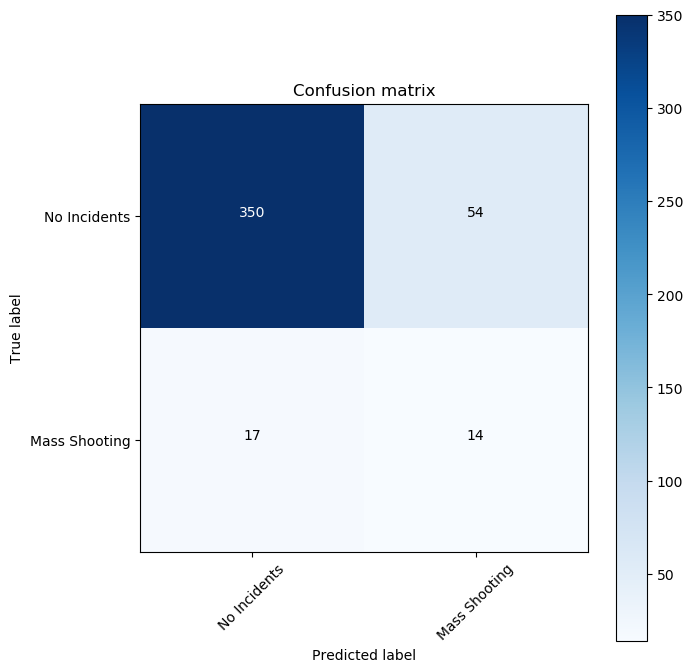

In [160]:
from keras.wrappers.scikit_learn import KerasClassifier

early_stopping = EarlyStopping(monitor='loss', patience=5)
callbacks=[early_stopping]


ker_estimator = KerasClassifier(build_fn=build_classifier, verbose=1)

# Create pipeline (PCA found to hinder results too much)
ker_pipe = Pipeline([('kerclf', ker_estimator)])

# Create search grid
ker_grid = {'kerclf__input_dim': [len(mass_shooting_scaled.columns[:-1])],
            'kerclf__hidden_layers': [4, 8],
            'kerclf__activation': ['relu', 'tanh'],
            'kerclf__node_reduce': [2, 4],
            'kerclf__drops': [[2, .5], [3, .25]], 
            'kerclf__epochs': [100], 
            'kerclf__batch_size': [256], 
            'kerclf__callbacks': [callbacks]}

# Use gridsearch across 5 crossfolds of data for each test set
ker_gridsearch = GridSearchCV(estimator = ker_pipe, 
                              param_grid = ker_grid, 
                              scoring = 'f1', 
                              cv = 5, verbose = 1,
                              n_jobs=8,
                              return_train_score = True)

# Fit model to data
ker_gridsearch.fit(X_train_res, y_train_res)

# Make predictions for test set
y_hat_test = ker_gridsearch.predict(X_test)
score = recall_score(y_test, y_hat_test)
prec_score = precision_score(y_test, y_hat_test)
f1 = f1_score(y_test, y_hat_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
cm_plot_labels = ['No Incidents', 'Mass Shooting']

plot_confusion_matrix(cm, cm_plot_labels, normalize=False)

print(f'Recall Score: {score*100:.2f}%')

# Save results
results['Pipeline'].append('Keras')
results['Recall Score'].append(score)
results['Precision Score'].append(prec_score)
results['F1 Score'].append(f1)
results['Parameters'].append(ker_gridsearch.best_params_)

### Display All Results

In [161]:
pd.DataFrame.from_dict(results)

Pipeline  Recall Score  Precision Score  F1 Score  \
0           Decision Tree      0.451613         0.222222  0.297872   
1           Random Forest      0.322581         0.243902  0.277778   
2     Logistic Regression      0.258065         0.148148  0.188235   
3  Support Vector Machine      0.483871         0.189873  0.272727   
4                Adaboost      0.354839         0.275000  0.309859   
5                 XGBoost      0.354839         0.366667  0.360656   
6                   Keras      0.451613         0.205882  0.282828   

                                                                                                                                                                                                                                                                   Parameters  
0                                                                                                                                                                 {'clf__criterion': 'gini', 'clf__max_depth': 9, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 0.05}  
1                                                                                                                                                                  {'rf__criterion': 'entropy', 'rf__max_depth': 7, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 0.05}  
2                                                                                                                                                                                                                                {'logreg__C': 1000, 'logreg__penalty': 'l1'}  
3                                                                                                                                                                                                                   {'svm__C': 10, 'svm__degree': 1, 'svm__kernel': 'linear'}  
4                                                                                                                                                                                                                                                {'ada__learning_rate': 0.96}  
5                                                                                                                                             {'xgb__learning_rate': 0.01, 'xgb__max_depth': 9, 'xgb__min_child_weight': 2, 'xgb__n_estimators': 100, 'xgb__subsample': 0.85}  
6  {'kerclf__activation': 'relu', 'kerclf__batch_size': 256, 'kerclf__callbacks': [<keras.callbacks.EarlyStopping object at 0x1a36b845f8>], 'kerclf__drops': [2, 0.5], 'kerclf__epochs': 100, 'kerclf__hidden_layers': 8, 'kerclf__input_dim': 134, 'kerclf__node_reduce': 2}

The neural network was initially optimized for maximizing recall score, but it was found to perform better when optimizing the f1-score. In either case, the network failed to outperform traditional machine learning models. Though it may be possible to improve scores with a more sophisticated network, it seems more likely that no current laws have proven significantly effective at predicting states most susceptible to mass shootings.

## Assault Weapons Ban
Though variations in state law fail to provide any meaningful results with regard to mass shootings, let's have one last look at the impact of a national law that was in place from Sept 1994 through Sept 2004: The Federal Assault Weapons Ban. In this instance, we'll look at mass shooting data from 1982 through 2019, applying the presence of the ban from 1995-2003 (the only shootings that occurred in 1994 and 2004 were during time periods where the law was not in place).

In [162]:
# Get shooting data
mass_shooting_df = pd.read_csv('mass_shooting_data.csv')
mass_shooting_df = mass_shooting_df[['location', 'date', 'fatalities', 'injured']]

# Extract state from location column, and convert to full name if shown as abbreviation
mass_shooting_df['State'] = [loc.split(', ')[1] for loc in mass_shooting_df['location']]
mass_shooting_df['State'] = [st if len(st)>2 else state_abbrs[st] for st in mass_shooting_df['State']]

# Extract year from date column
mass_shooting_df['Year'] = [int(date.split('/')[2]) for date in mass_shooting_df['date']]

# Convert year to YYYY format
clean_years = []
for yr in mass_shooting_df.Year:
    if yr < 20:
        clean_years.append(2000+yr)
    elif yr <= 99:
        clean_years.append(1900+yr)
    else:
        clean_years.append(yr)
mass_shooting_df['Year']=clean_years

# Create state-year column for 1991-2019
mass_shooting_df['State-Year'] = [f'{st} {yr}' for st, yr in zip(mass_shooting_df['State'], mass_shooting_df['Year'])]

# Group by state-year and reset values in year column since they will be summed as well
mass_shootings = mass_shooting_df.groupby(by='State-Year').sum()
mass_shootings['Year'] = [int(ix[-4:]) for ix in mass_shootings.index]

# Apply indication for presence of assault weapons ban
assault_weap = []
for yr in mass_shootings.Year:
    if (yr >=2004) or (yr<=1994):
        assault_weap.append(0)
    else:
        assault_weap.append(1)

mass_shootings['assault_weapons_ban'] = assault_weap
mass_shootings['incidents'] = [1 for i in range(len(mass_shootings.index))]

mass_shootings.head()

fatalities  injured  Year  assault_weapons_ban  incidents
State-Year                                                                
Arizona 2011              6       13  2011                    0          1
Arkansas 1998             5       10  1998                    1          1
California 1984          22       19  1984                    0          1
California 1988           7        4  1988                    0          1
California 1989           6       29  1989                    0          1

In [163]:
# Group values by year to view data on annual, nationalized basis
annual_mass_shootings = mass_shootings.groupby(by='Year').sum()

# Add years where no incidents occurred
safe_years = {}
for col in annual_mass_shootings.columns:
    safe_years[col] = []

safe_years['Year'] = []
for i in range(1982, 2020):
    if i not in annual_mass_shootings.index:
        safe_years['Year'].append(i)
        safe_years['fatalities'].append(0)
        safe_years['injured'].append(0)
        safe_years['incidents'].append(0)
        if (i>1994) and (i<2004):
            val = 1
        else:
            val = 0
        safe_years['assault_weapons_ban'].append(val)

# Add missing years to dataframe
missing_years = pd.DataFrame.from_dict(safe_years).set_index('Year', drop=True)
annual_mass_shootings = annual_mass_shootings.append(missing_years)

# Get average fatalities per incident
annual_mass_shootings['fatalities_per_incident'] = annual_mass_shootings['fatalities'] / annual_mass_shootings['incidents']
annual_mass_shootings = annual_mass_shootings.fillna(0).sort_index()
annual_mass_shootings

fatalities  injured  assault_weapons_ban  incidents  \
Year                                                        
1982           8        3                    0          1   
1983           0        0                    0          0   
1984          28       20                    0          2   
1985           0        0                    0          0   
1986          15        6                    0          1   
1987           6       14                    0          1   
1988           7        4                    0          1   
1989          15       41                    0          2   
1990          10        4                    0          1   
1991          35       26                    0          3   
1992           9       10                    0          2   
1993          23       34                    0          4   
1994           5       23                    0          1   
1995           6        0                    1          1   
1996           6        1                    1          1   
1997           9        5                    2          2   
1998          14       36                    3          3   
1999          42       47                    5          5   
2000           7        0                    1          1   
2001           5        4                    1          1   
2002           0        0                    1          0   
2003           7        8                    1          1   
2004           5        7                    0          1   
2005          17        9                    0          2   
2006          21        7                    0          3   
2007          53       32                    0          4   
2008          17       24                    0          3   
2009          39       38                    0          4   
2010           9        2                    0          1   
2011          19       21                    0          3   
2012          71       80                    0          7   
2013          35       13                    0          5   
2014          18       28                    0          3   
2015          46       43                    0          6   
2016          71       83                    0          6   
2017         117      587                    0          8   
2018          80       70                    0          8   
2019          66      101                    0          7   

      fatalities_per_incident  
Year                           
1982                 8.000000  
1983                 0.000000  
1984                14.000000  
1985                 0.000000  
1986                15.000000  
1987                 6.000000  
1988                 7.000000  
1989                 7.500000  
1990                10.000000  
1991                11.666667  
1992                 4.500000  
1993                 5.750000  
1994                 5.000000  
1995                 6.000000  
1996                 6.000000  
1997                 4.500000  
1998                 4.666667  
1999                 8.400000  
2000                 7.000000  
2001                 5.000000  
2002                 0.000000  
2003                 7.000000  
2004                 5.000000  
2005                 8.500000  
2006                 7.000000  
2007                13.250000  
2008                 5.666667  
2009                 9.750000  
2010                 9.000000  
2011                 6.333333  
2012                10.142857  
2013                 7.000000  
2014                 6.000000  
2015                 7.666667  
2016                11.833333  
2017                14.625000  
2018                10.000000  
2019                 9.428571

### Hypothesis Testing
We will examine the difference in population means for number of incidents and fatalities between years with the ban in place, and those without. Two functions will first be create for evaluating and visualizing the probability distribution functions of the data.

In [164]:
from __future__ import print_function, division
import scipy.stats

def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified 
    # interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values

In [165]:
def norm_dist(control, test, ctrl_label='Control Group', test_label='Test Group', title=None):
    # Evaluate the PDF's of control and test groups and generate 
    # normal distributions to visualize the mean and variance differences
    control_mean, control_std = np.mean(control), np.std(control)
    control_quant = scipy.stats.norm(control_mean, control_std)

    test_mean, test_std = np.mean(test), np.std(test)
    test_quant = scipy.stats.norm(test_mean, test_std)
    
    plt.figure(figsize=(8, 8))

    xs, ys = evaluate_PDF(control_quant)
    plt.plot(xs, ys, label=ctrl_label, linewidth=4, color='red')
    plt.axvline(x=control_mean, color='red', ls='-.', label=f'{ctrl_label} Mean: {np.round(control_mean, 2)}')

    xs, ys = evaluate_PDF(test_quant)
    plt.plot(xs, ys, label=test_label, linewidth=4, color='blue') 
    plt.axvline(x=test_mean, color='blue', ls='-.', label=f'{test_label} Mean: {np.round(test_mean, 2)}')

    plt.xlabel('Quantity')
    plt.title(title)
    plt.legend()
    plt.show()

In [166]:
def plot_time_dist(df, target, title=None):
    # Function to plot variable over time
    plt.figure(figsize=(8, 8))
    plt.plot(df.index, df[target])
    plt.vlines(1994.75, 0, df[target].max(), linestyles='--', alpha=.5, color='gray')
    plt.vlines(2004.75, 0, df[target].max(), linestyles='--', alpha=.5, color='gray')
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(f'Number of {title}')
    plt.show()


Average Fatalities with Ban:	10.67
Average Fatalities without Ban:	29.14
--------------------------------------
Difference:			173.17%
Confidence Level:		93.14%


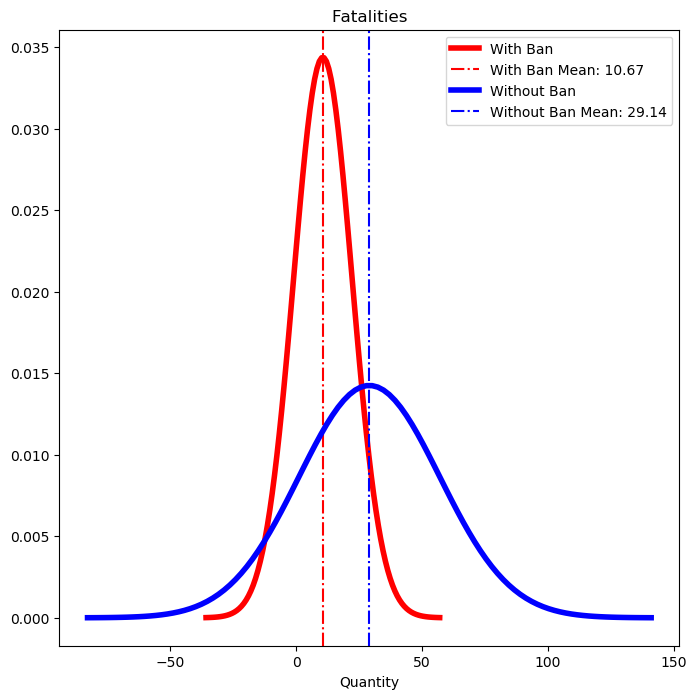

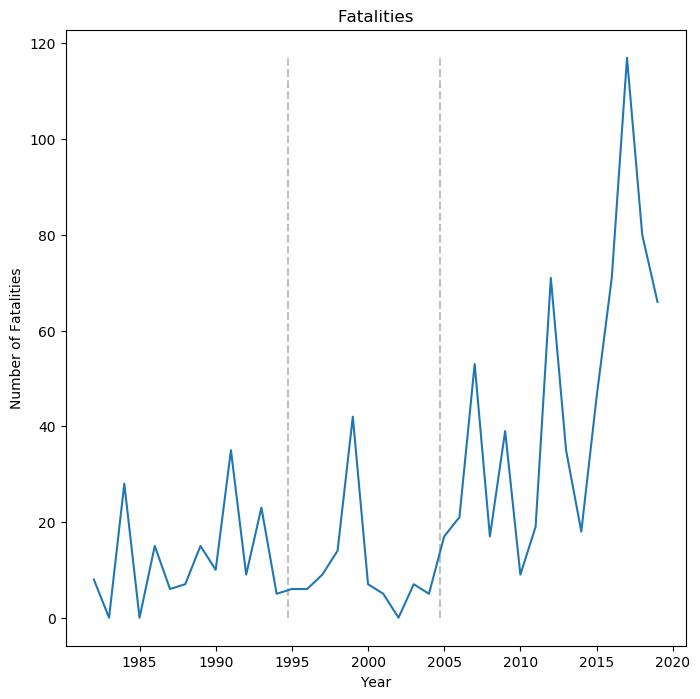


Average Incidents with Ban:	1.67
Average Incidents without Ban:	3.10
--------------------------------------
Difference:			86.21%
Confidence Level:		90.04%


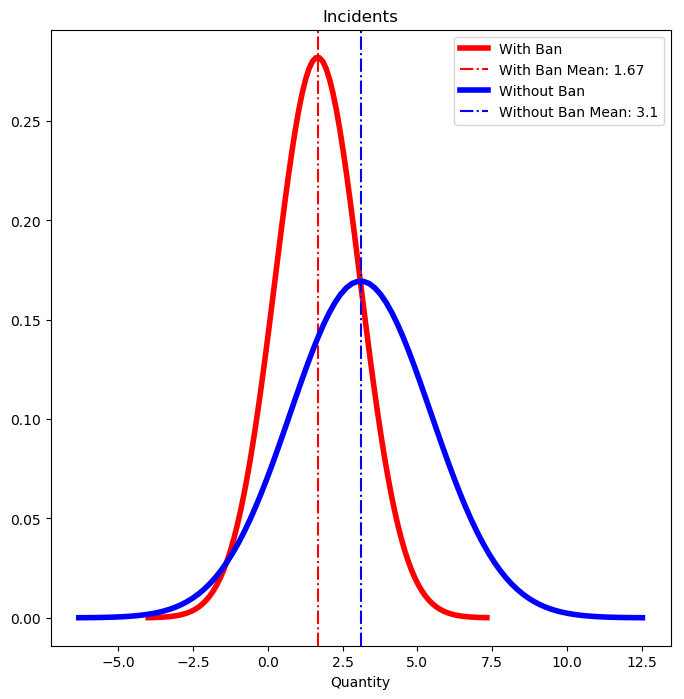

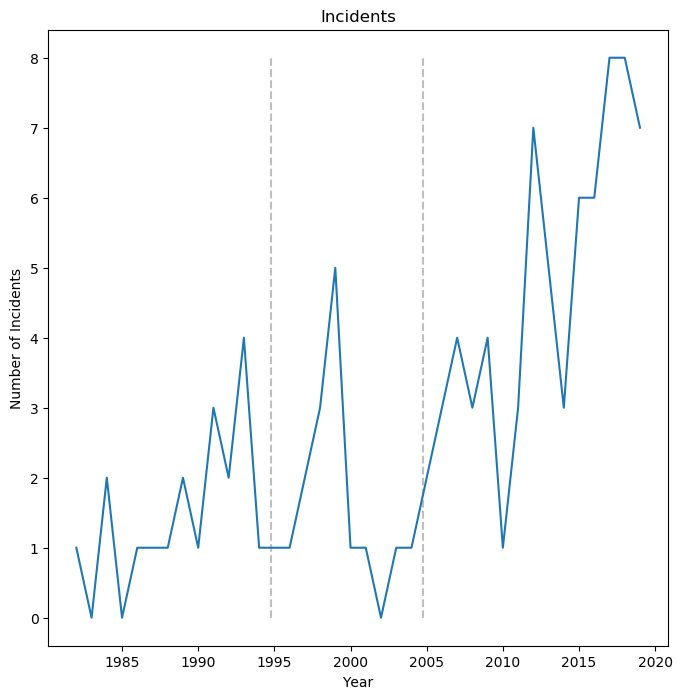


Average Fatalities Per Incident with Ban:	5.40
Average Fatalities Per Incident without Ban:	8.12
--------------------------------------
Difference:			50.56%
Confidence Level:		95.38%


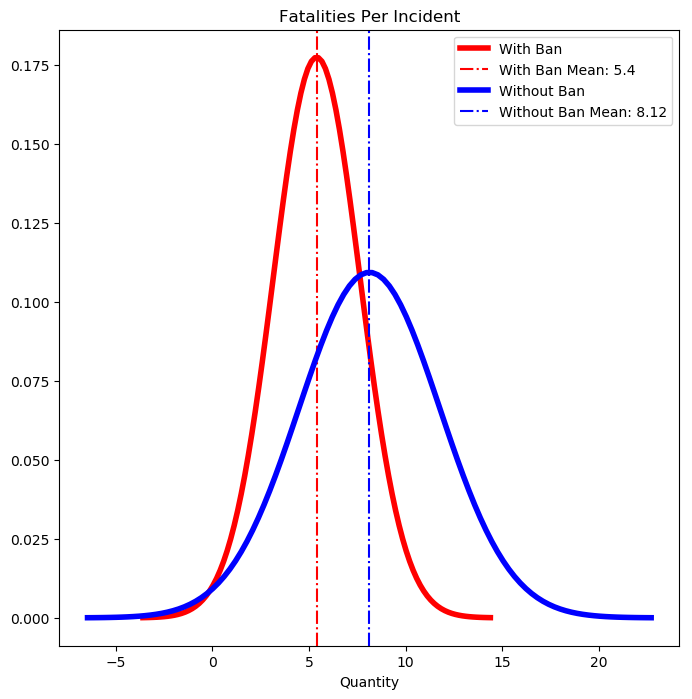

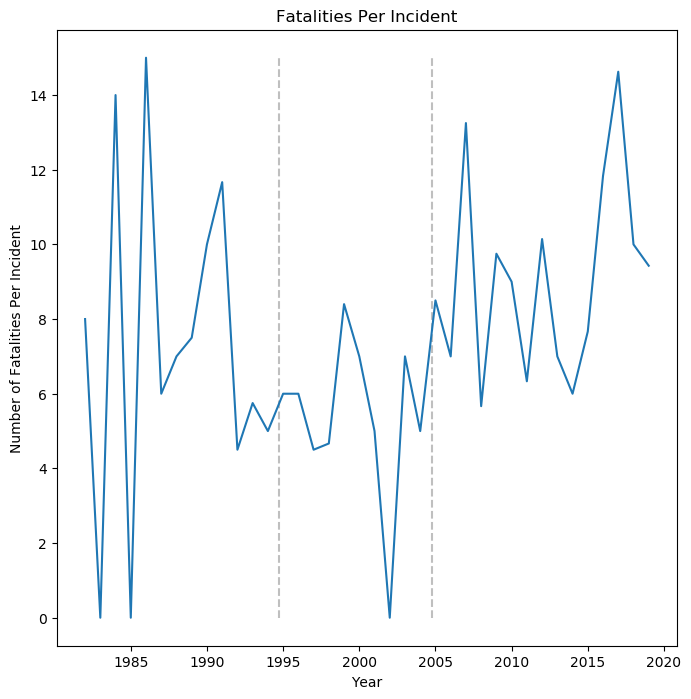

In [167]:
# Create control and test groups
ban = annual_mass_shootings[annual_mass_shootings.assault_weapons_ban>0]
no_ban = annual_mass_shootings[annual_mass_shootings.assault_weapons_ban==0]

# Set target variables and display results
targets = ['fatalities', 'incidents', 'fatalities_per_incident']
for target in targets:
    # Display results of t-test
    Target = target.replace('_', ' ').title()
    print(f'\nAverage {Target} with Ban:\t{ban[target].mean():.2f}')
    print(f'Average {Target} without Ban:\t{no_ban[target].mean():.2f}')
    print('--------------------------------------')
    print(f'Difference:\t\t\t{100*no_ban[target].mean() / ban[target].mean()-100:.2f}%')
    print(f'Confidence Level:\t\t{100-100*ttest_ind(ban[target], no_ban[target])[1]:.2f}%')
    
    # Create Visualization
    norm_dist(ban[target], no_ban[target], 'With Ban', 'Without Ban', Target)
    
    # Plot changes over time
    plot_time_dist(annual_mass_shootings, target, Target)


Average Fatalities with Ban:	10.67
Average Fatalities without Ban:	12.38
--------------------------------------
Difference:			16.11%
Confidence Level:		27.01%


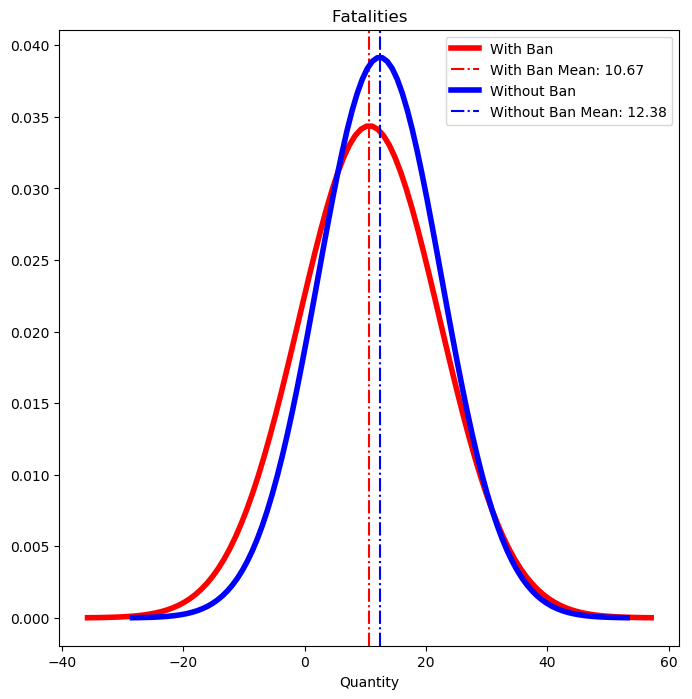


Average Incidents with Ban:	1.67
Average Incidents without Ban:	1.46
--------------------------------------
Difference:			-12.31%
Confidence Level:		28.25%


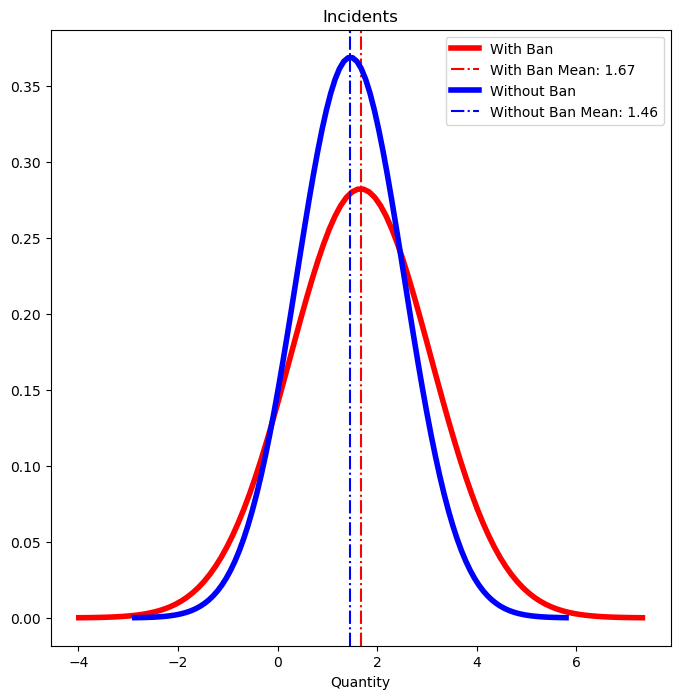


Average Fatalities Per Incident with Ban:	5.40
Average Fatalities Per Incident without Ban:	7.26
--------------------------------------
Difference:			34.59%
Confidence Level:		72.01%


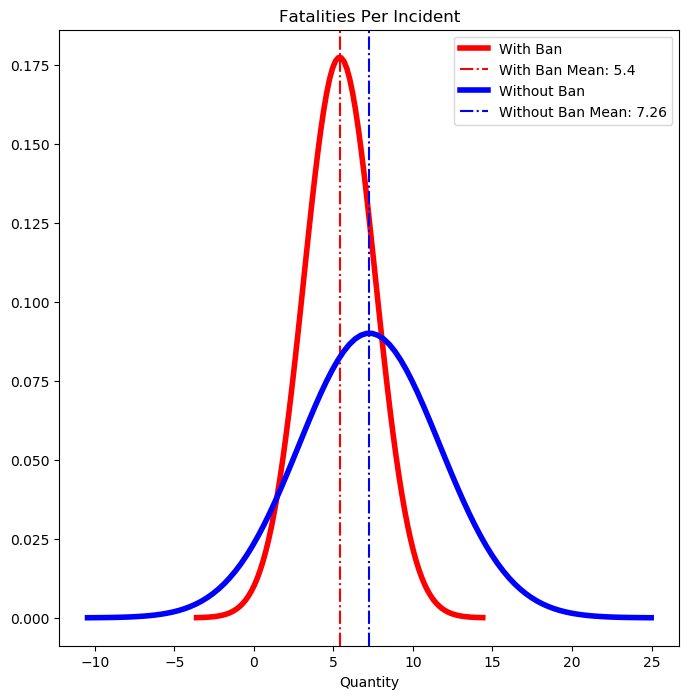

In [168]:
# Create control and test groups
ban = annual_mass_shootings[annual_mass_shootings.assault_weapons_ban>0]
no_ban = annual_mass_shootings[annual_mass_shootings.index<1995]

# Set target variables and display results
targets = ['fatalities', 'incidents', 'fatalities_per_incident']
for target in targets:
    # Display results of t-test
    Target = target.replace('_', ' ').title()
    print(f'\nAverage {Target} with Ban:\t{ban[target].mean():.2f}')
    print(f'Average {Target} without Ban:\t{no_ban[target].mean():.2f}')
    print('--------------------------------------')
    print(f'Difference:\t\t\t{100*no_ban[target].mean() / ban[target].mean()-100:.2f}%')
    print(f'Confidence Level:\t\t{100-100*ttest_ind(ban[target], no_ban[target])[1]:.2f}%')
    
    # Create Visualization
    norm_dist(ban[target], no_ban[target], 'With Ban', 'Without Ban', Target)

### Compare to Incidents without Firearms
We will run a query from the Global Terrorism Database from 1982-2017, focusing on attack types that would be viable alternatives to firearms. Specifically, the query deliberately excludes the following weapon types:

- Firearms
- Chemical, Biological, Nuclear (CBN)
- Explosives/Bombs/Dynamite
- Radioactive

Whether or not explosives should be excluded is subjective. Though it was excluded for this analysis, a strong argument could be made that it should be included. The decision to exclude here is based on the idea that easy access to firearms makes attacks more likely to be carried out. In the case of explosives and dynamite, the amount of research and planning involved creates high barriers to execution. Rather than speculate on individual instances where explosions might be a viable alternative, all attacks of this type were left out.

In addition, the 9/11 attacks are treated as an outlier event excluded from analysis.

In [169]:
# Query global terrorism database
url = str('https://www.start.umd.edu/gtd/search/ResultsCSV.aspx?csv=1&'
          'casualties_type=b&'
          'casualties_max=&'
          'start_yearonly=1982&'
          'end_yearonly=2017&'
          'dtp2=all&'
          'country=217'
          '&weapon=7,8,9,12,11,13,10')

no_firearms = pd.read_csv(url, usecols=np.arange(20))
no_firearms = no_firearms[no_firearms.columns[[1, 10]]]

# Exclude incidents without casualties; exclude 9/11 attacks as outlier
no_firearms['FATALITIES'] = no_firearms.FATALITIES.replace({'Unknown':0, 'Business':0, np.nan:0}).astype('int')
no_firearms = no_firearms[(no_firearms.FATALITIES > 0) & (no_firearms.DATE!='2001-09-11')]
no_firearms.head()

DATE  FATALITIES
2   2017-10-31           8
6   2017-08-12           1
14  2017-05-26           2
15  2017-05-20           1
23  2017-03-20           1

Mean Fatalities per Incident with Firarm:	8.37
Mean Fatalities per Incident without Firarm:	2.36
--------------------------------------
Difference:		255.02%
Confidence Level:	99.96%



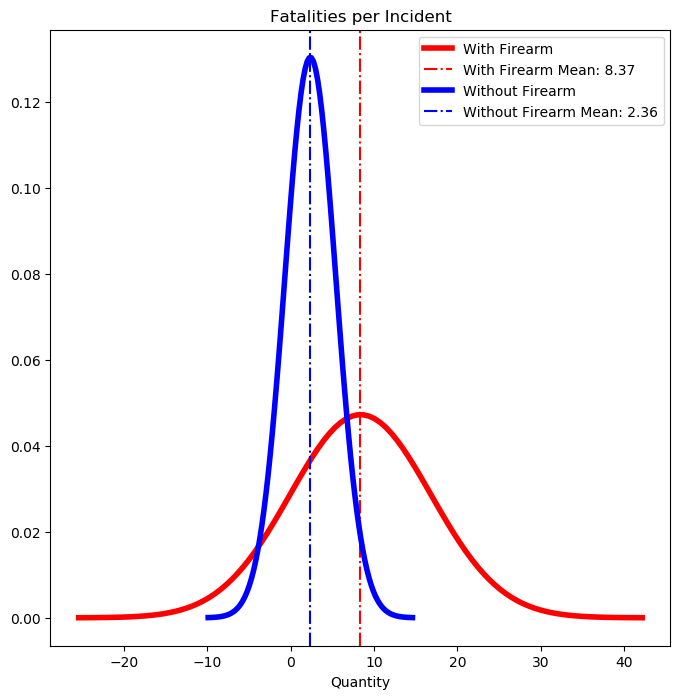

In [171]:
# Group 1 represents fatalities with firearms, group 2 is no firearms
group_1 = mass_shooting_df[(mass_shooting_df.Year>=1982) & (mass_shooting_df.Year<=2017)]['fatalities']
group_2 = no_firearms.FATALITIES

# Display means
print(f'Mean Fatalities per Incident with Firarm:\t{np.mean(group_1):.2f}')
print(f'Mean Fatalities per Incident without Firarm:\t{np.mean(group_2):.2f}')

#Calculate percent difference in means
diff = 100*np.mean(group_1) / np.mean(group_2) - 100

# T-test to determine if difference is statistically significant
pval = ttest_ind(group_1, group_2)[1]

# Display results
print('--------------------------------------')
print(f'Difference:\t\t{diff:.2f}%')
print(f'Confidence Level:\t{100*(1-pval):.2f}%\n')

# Visualize results
norm_dist(group_1, group_2, 'With Firearm', 'Without Firearm', 'Fatalities per Incident')

## Conclusions
### Homicide Rates
Certain types of laws have been shown to have significant correlation with lower homicide rates. Specifically, laws that give police the ability to use their discretion when deciding whether a person poses a risk or danger to public safety seem to have the greatest impact on homicide rates. In addition, laws that restrict gun ownership for those with domestic violence restraining orders are found to have a statistically signficant reduction in homicide rates.

### Mass Shootings
Though variance in state laws could not explain variance in occurrences of mass shootings, some evidence does seem to be emerging with regard to the effectiveness of national assault weapons bans. 

- **Fatalities per Incident:** Without the ban in place, the number of fatalities per incident increases by 50.6%, and we are confident of this to the 95% confidence level.<br>
- **Total Incidents:** Without the ban in place, the total number of incidents increases by 86.2%. Though a confidence level of 95% could not be established, we were able to reach the 90% confidence level.<br>
- **Total Fatalities per Incident:** Combining these two datapoints, we find that without the weapons ban in place, the total number of fatalities on an annualized basis increases by 173.2%, which we was found to be significant at the 90% confidence level.<br>

However, it should be noted that mass shooting data is highly imbalanced, with the majority of incidents and fatalities taking place in the 2000's. Indeed, when looking only at data in the years leading up to and including the weapons ban, the difference in population means loses all significance. However, the number of fatalities per incident is significantly lower with the weapons ban in place. Furthermore, incidents without firearms result in significantly fewer deaths than with any firearms at all. Though the solution to reducing frequency remains illusive, we can at least improve survivability.

## Recommendations
### Homicide
The biggest challenge here lays in the fact that laws regarding police discretion and empowerment, concealed carry permit issuance, as well as laws related to domestic violence, are all responsibilities of the state with limited federal jurisdiction. Even with stronger federal laws, practical enforcement efforts will be reliant on buy-in from local authorities. Therefore, it will be critical for state governors and legislators to work with their neighbors to create appropriates laws among broader regions.

However, empowerment of law enforement to disarm citizens based on their own discretion is likely to breed much distrust among citizens, and is unlikely to yield widespread adoption. But what about empowerment of family-members? Consider the following question/gun law feature:

- *"Does state law empower immediate family members or law enforcement to petition a court for temporary removal of guns from a person who poses a danger to self or others (sometimes called an "extreme risk protection order")?"*

In 2015, only 2 states answered yes, though the count increased to 4 in 2016, 13 in 2018, and 17 in 2019. These laws are often referred to as "red flag laws" and have been gaining traction in many states. Given their similarity in nature to law-enforcement discretion, such laws may provide a more transparent approach that can reduce homicides without yielding too much authority to enforcement agencies.

Combined with domestic violence restrictions, this might be the best approach to addressing the broader problem.

### Mass Shootings
To date, no clear set of laws has been found to reduce the frequency of mass shootings. Initial results seemed to imply that assault weapons bans might help, but since no clear disparity exists between rates during the ban and before, it would seem that something else is behind the current trend. However, it does seem that the number of fatalities per incident is greatly impacted by the availability of assault weapons. Though the difference is more pronounced in more recent years, the same trend over time does seem to be present. 

## Next Steps
While there are a number of directions one could pursue to further this analysis, the following are three recommendations that would make a lot of sense to pursue:

- **Time Series Analysis:** There is likely to be a time lag between the time that new laws are implemented and when final realization of homicide rate reductions take place. An analysis that takes into account homicide rates in prior years or looks at homicide rates in years after changes in law may reveal greater levels of clarity in the results.
- **Federal Laws:** This analysis had a strong focus on state laws, with the exception of the the section that accounted for the assault weapons ban. Such an analysis might reveal areas where strong federal laws exist but are not enforced at local levels.
- **Economic Factors:** It is likely that weak economic conditions can drive violent crime in a state. Normalizing for factors such as poverty rate may reduce noise in the data and produce stronger results.

In [4]:
homicide_df = get_cdc_data('homicide')
homicide_df.head()

State  Year  Homicide Rate  Gun Homicide Rate  Other Homicide  \
State-Year                                                                      
Alabama 1991  Alabama  1991           13.8               10.0             3.8   
Alabama 1992  Alabama  1992           12.7                9.1             3.6   
Alabama 1993  Alabama  1993           13.4                9.5             3.9   
Alabama 1994  Alabama  1994           13.7                9.9             3.8   
Alabama 1995  Alabama  1995           12.0                9.1             2.9   

              Homicide Pct Difference  
State-Year                             
Alabama 1991                 0.380000  
Alabama 1992                 0.395604  
Alabama 1993                 0.410526  
Alabama 1994                 0.383838  
Alabama 1995                 0.318681

In [5]:
homicide_df['Gun Homicide Rate'].sum() / homicide_df['Homicide Rate'].sum()

0.6718881842184055